# Projeto 2 – Predizendo Prognóstico de Mortalidade com Dados Sintéticos


---



## Apresentação


---



O presente projeto foi originado no contexto das atividades da disciplina de pós-graduação Ciência e Visualização de Dados em Saúde, oferecida no primeiro semestre de 2022, na Unicamp, e desenvolvido pelos alunos:

Nome                           | RA     | Especialização
-------------------------------|--------|------------
Matheus Papa de Almeida        | 183888 | Engenharia Agrícola
Sara Mirthis Dantas dos Santos | 224018 | Aluna Especial - Engenharia Elétrica


## Contextualização da Proposta


---



A Leucemia Mieloide Aguda (LMA) é um dos tipos mais comuns de câncer, e tem como principal característica a rápida produção de células doentes (células leucêmicas) na medula óssea, que substituem as células sanguíneas normais. Por ser bastante agressiva, a doença é agravada em pouco tempo e, caso não seja iniciado tratamento rapidamente, pode levar à morte em semanas ou até dias após o aparecimento dos primeiros sintomas. Entretanto, com o tratamento adequado, os pacientes podem viver anos. [3] 

Considerando a mortalidade desta doença, a proposta desse trabalho é treinar e testar modelos supervisionados de *Machine Leaning* (aprendizado de máquina) a fim de obter um prognóstico de morte para pacientes diagnosticados com Leucemia Mieloide Aguda.

Para isto, foi levado em consideração algumas janelas de tempo entre o diagnóstico no prontuário do paciente e data da morte:

*   Morte no mesmo dia do diagnóstico;
*   Morte entre 0 e 30 dias (0 dias - 1 mês);
*   Morte entre 30 e 360 dias (1 mês - 1 ano);
*   Morte entre 360 e 540 dias (1 ano - 1,5 anos);
*   Morte entre 540 e 1440 dias (1,5 anos - 4 anos);
*   Morte após 1440 dias (4 anos).

Como estaremos lidando com variáveis de interesse categóticas (janela de tempo de morte), com valores de 0 (vivo) ou 1 (morto), usaremos modelos de classificação.


Duas bases de dados serão usadas para treinar e testar os modelos de *Machine Leaning*, uma com menos dados e outra com mais, a fim de analisar qual obterá o melhor resultado nas predições.


De forma geral, esse trabalho busca responder as seguintes perguntas de pesquisa:
*   Qual modelo de classificação tem o melhor desempenho em predizer mortes para pacientes diagnosticados com Leucemia Mieloide Aguda (LMA)?
*   Qual janela de tempo após o diagnóstico obtém melhor resultado? Varia entre modelos?
*   Qual dos conjuntos de dados testados forceceu melhor resultado e por quê? 

### Ferramentas


---



Este trabalho foi desenvolvido utilizando a linguagem de programação Python, em um documento do tipo notebook Jupyter, que permite a execução de códigos juntamente com blocos de textos. Ele está disponível na plataforma do GitHub, no repositório da disciplina (https://github.com/saramirthis/2022.1-CienciaVisualizacaoDeDadosEmSaude).


## Metodologia


---



Como o problema enfrentado é de classificação, os seguintes algoritmos de aprendizado de máquina serão implementados através da biblioteca ``scikit-learn``:

*   **Regressão Logística:** classificador binário (0 ou 1) comumente usado para estimar a probabilidade de uma instância pertencer a uma determinada classe.

*   **Árvore de Decisão:** algoritmo que estabelece nós (pontos de decisão) baseados no peso que cada atributo de entrada tem sobre a saída.

*   **Aprendizagem baseada em instâncias, do inglês *k-Nearest Neighbors* (kNN):** algoritmo de classificação que se baseia nos "k" dados mais próximos (menor distância) para definir a classe de um dado ainda não classificado.

*  **Máquina de Vetores de Suporte, do inglês *Support Vectors Machine* (SVM):** algoritmo que classifica os dados a partir da utilização de um hiperplano que separa os dados em dois grupos distintos (classes).

*  **Floresta Aleatória, do inglês *Random Forest*:** algoritmo que baseia-se na criação aleatória de diferentes árvores de decisão, formando uma "floresta". A resposta mais frequente para todas as árvores será o retorno da classificação de um dado.



### Método de avaliação dos modelos

---




Para a avaliação dos modelos de aprendizado de máquina serão feitas as seguintes análises:

* **Acurácia:** número de predições corretas divido pelo total da amostra;

* **Precisão:** quantas das amostras previstas como positivas são realmente positivas. É usado como métrica de desempenho quando o objetivo é limitar o número de falso-positivo;

* **Revocação (*Recall*):** qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra. É utilizado quando é necessário identificar todas as amostras positivas, evitando falso-negativos;

* **F1-Score:** média harmônica entre precisão e revocação. Quanto mais perto de 1, melhor o modelo;


* **Área Abaixo da Curva ROC (AUCROC, do inglês):** área do gráfico que fica sob a curva ROC (gráfico da taxa de verdadeiros positivos vs. a taxa de falsos positivos). Este valor varia de 0 a 1, ou de 0% a 100%, e quanto maior o AUCROC, melhor o modelo;

* **Validação cruzada:**  técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Será usado nos casos onde os conjuntos de treino e teste pertencem à mesma base de dados.

### Bases Adotadas para o Estudo


---



Para este estudo, a partir das bases de dados fornecidas para este trabalho, foram utilizadas:

*   scenario01: cenário com dados de 1174 pacientes.
*   scenario02: cenário com dados de 1121 pacientes.
*   scenario03: cenário com dados de 11573 pacientes.

Por causa da pouca quantidade de dados de pacientes com Leucemia Mieloide Aguda, os conjuntos de dados scenario01 e scenario02 foram concatenados em um único dataset.


## Resultados Obtidos

---



Nesta etapa será descrita a parte de pré processamento, seguindo da aplicação dos modelos classificadores em 5 casos:


1.   Modelos treinados e testados no dataset resultante da concatenação do scenario01 e scenario02;
2.   Modelos treinados com o dataset resultante da concatenação do scenario01 e scenario02 e testado no scenario03;
3.   Modelos treinados e testados no dataset scenario03;
4.   Modelos treinados com o dataset scenario03 e testado no dataset resultante da concatenação do scenario01 e scenario02;
5.   Modelos treinados e testados no dataset scenario03, alterando variáveis de entrada.



No bloco abaixo, será feita a importação de todas as biblotecas, módulos e funções necessárias para as análises:


1.   **Os**: comandos do sistema operacional;
2.   **Pytz**: módulo utilizado para a definição de fuso-horário;
3.   **Pandas**: análise de dados;
4.   **PyPlot**: é um módulo da biblioteca Matplotlib e é utilizado para geração de plots;
5.   **NumPy**: significa *Numerical Python* e é usada para se trabalhar com computação numérica;
6.   **Seaborn**: visualização de dados baseada em matplotlib;
7.   **Drive**: módulo para acesso de arquivos no Google Drive;
8.   **ZipFile**: biblioteca utilizada para a manipulação de arquivos `.zip`;
9.   **Datetime**:  biblioteca utilizada para a manipulação de datas e horas;
10.  **Sklearn**: biblioteca responsável pela aplicação de técnicas de aprendizado de máquina (*Machine Learning*).

In [1]:
import os
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
from zipfile import ZipFile
from datetime import datetime, timezone, date
from sklearn.metrics import (confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
                             accuracy_score, classification_report)
from sklearn.model_selection import cross_val_score

Os dados do cenário 1 e 2 estão armazenados na pasta `data/raw` no repositório da disciplina [`2022.1-CienciaVisualizacaoDeDadosEmSaude`](https://github.com/saramirthis/2022.1-CienciaVisualizacaoDeDadosEmSaude)
, já os dados do cenário 3 não foram suportados pelo GitHub e por isso estão disponíveis no Google Drive, na pasta do projeto [`CVDS_P2_prognostico_mortalidade`](https://drive.google.com/drive/folders/1pG2pZ2d_QFFqNydbrHPa8EVIENJfRG7D?usp=sharing).

No bloco abaixo, os caminhos da pasta `CVDS_P2_prognostico_mortalidade` e dos dados do cenário 3 (localizados na pasta `synthea/scenario03`) são alocados nas variáveis `folder_path` e `scenario_03`, respectivamente.

In [2]:
drive.mount("/gdrive", force_remount=True)
folder_path = os.path.join("/gdrive", "My Drive", "CVDS_P2_prognostico_mortalidade")
scenario_03 = os.path.join(folder_path, "synthea/scenario03")

Mounted at /gdrive


No bloco abaixo acessamos os dados referentes ao cenário 3, que estão salvos na pasta `synthea/scenario03`. Para utilizá-los, foi necessário realizar a extração do arquivo `csv.zip` para a pasta `scenario03/`, que encontra-se na pasta geral do projeto..

In [3]:
if (os.path.isdir(folder_path+'/scenario03') == False):
  with ZipFile(scenario_03+'/csv.zip', 'r') as zipObj:
    zipObj.extractall(folder_path+'/scenario03')

### Pré processamento de dados


---



Para acessar remotamente os dados dos cenários 1 e 2 no GitHub, é necessário acessar o link da pasta `data/raw/` para cada um deles. A coleta dos dados do cenário 3 é realizada a partir do acesso a pasta no Drive na qual os dados foram extraídos no bloco anterior (`scenario03/`).

As features que serão utilizadas para realizar a predição de mortalidade dos pacientes diagnosticados com Leucemia Mieloide Aguda (LMA) são:

* Gênero;
* Raça;
* Quantidade de procedimentos realizados;
* Quantidade de internações em UTI (Unidade de Terapia Intensiva);
* Quantidade de condições registradas;

As features foram escolhidas por fazerem parte dos fatores de risco da LMA. Tal doença é mais comum em adultos e afeta o sistema imunológico dos pacientes de forma agressiva, o que pode ocasionar mais internações em UTI, procedimentos médicos e desencadear outras doenças [3]. 

Esses dados são coletados a partir dos datasets abaixo:
* `patients.csv`: dados demográficos dos pacientes;
* `conditions.csv`: condições ou diagnósticos dos pacientes;
* `encounters.csv`: dados de encontros (contato de cuidados de saúde entre o paciente e o médico);
* `procedures.csv`: dados dos procedimentos dos pacientes, incluindo cirurgias.

Eles estão presentes em todos os cenários a serem analisados, como demonstra o bloco abaixo.


In [4]:
# get csv data from github for scenario 01
csv_folder = "https://raw.githubusercontent.com/saramirthis/2022.1-CienciaVisualizacaoDeDadosEmSaude/main/data/raw/scenario01/"
patients = pd.read_csv(os.path.join(csv_folder, "patients.csv"))
conditions = pd.read_csv(os.path.join(csv_folder, "conditions.csv"))
encounters = pd.read_csv(os.path.join(csv_folder, "encounters.csv"))
procedures = pd.read_csv(os.path.join(csv_folder, "procedures.csv"))

#get csv data from github for scenario02
csv_folder_02 = "https://raw.githubusercontent.com/saramirthis/2022.1-CienciaVisualizacaoDeDadosEmSaude/main/data/raw/scenario02"
patients_02 = pd.read_csv(os.path.join(csv_folder_02, "patients.csv"))
conditions_02 = pd.read_csv(os.path.join(csv_folder_02, "conditions.csv"))
encounters_02 = pd.read_csv(os.path.join(csv_folder_02, "encounters.csv"))
procedures_02 = pd.read_csv(os.path.join(csv_folder_02, "procedures.csv"))

#get csv data from scenario03
patients_03 = pd.read_csv(os.path.join(folder_path+'/scenario03/csv', "patients.csv"))
conditions_03 = pd.read_csv(os.path.join(folder_path+'/scenario03/csv', "conditions.csv"))
encounters_03 = pd.read_csv(os.path.join(folder_path+'/scenario03/csv', "encounters.csv"))
procedures_03 = pd.read_csv(os.path.join(folder_path+'/scenario03/csv', "procedures.csv"))

Em seguida visualizamos os cabeçalhos de cada um dos arquivos, a fim de selecionarmos as colunas necessárias para a análise.

In [5]:
# get headers scenario 01
patients_headers = list(patients.columns.values)
conditions_headers = list(conditions.columns.values)
encounters_headers = list(encounters.columns.values)
procedures_headers = list(procedures.columns.values)

# get headers scenario 02
patients_headers_02 = list(patients_02.columns.values)
conditions_headers_02 = list(conditions_02.columns.values)
encounters_headers_02 = list(encounters_02.columns.values)
procedures_headers_02 = list(procedures_02.columns.values)

# get headers scenario 03
patients_headers_03 = list(patients_03.columns.values)
conditions_headers_03 = list(conditions_03.columns.values)
encounters_headers_03 = list(encounters_03.columns.values)
procedures_headers_03 = list(procedures_03.columns.values)

# print headers scenario 01
print("SCENARIO 01:\n")
print("patients headers:\n\t", patients_headers)
print("conditions_headers:\n\t", conditions_headers)
print("encounters_headers:\n\t", encounters_headers)
print("procedures_headers:\n\t", procedures_headers)

print("\n#################################################\n")

# print headers scenario 02
print("SCENARIO 02:\n")
print("patients headers:\n\t", patients_headers_02)
print("conditions_headers:\n\t", conditions_headers_02)
print("encounters_headers:\n\t", encounters_headers_02)
print("procedures_headers:\n\t", procedures_headers_02)

print("\n#################################################\n")

# print headers scenario 03
print("SCENARIO 03:\n")
print("patients headers:\n\t", patients_headers_03)
print("conditions_headers:\n\t", conditions_headers_03)
print("encounters_headers:\n\t", encounters_headers_03)
print("procedures_headers:\n\t", procedures_headers_03)

SCENARIO 01:

patients headers:
	 ['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']
conditions_headers:
	 ['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']
encounters_headers:
	 ['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION']
procedures_headers:
	 ['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'BASE_COST', 'REASONCODE', 'REASONDESCRIPTION']

#################################################

SCENARIO 02:

patients headers:
	 ['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIR

Após a identificação das colunas, realizamos um filtro para definirmos apenas as que são de interesse em cada um dos arquivos. Além disso, analisamos a quantidade de pacientes de cada gênero e raça, os tipos das colunas e a quantidade de valores nulos em cada uma delas. Tais análises foram feitas em todos os cenários (1, 2 e 3), e a partir dela concluímos que:


* Existem 6 raças registradas nos três cenários: branco (`white`), preto (`black`), asiático (`asian`), nativo (`native`), havaiano (`hawaiian`) e outros (`other`);
* Todas as colunas são do tipo `object`, que nos indica a necessidade de conversão das features de `BIRTHDATE` e `DEATHDATE` para que seja feito o cálculo da idade;
* Existem valores nulos apenas para a coluna `DEATHDATE` e tais registros indicam que o paciente em questão está vivo. Portanto, não removemos nenhuma linha ou coluna.


In [6]:
# create new dataset for patients using only the necessary features
patients_dataset = patients[["Id", "GENDER", "RACE", "BIRTHDATE", "DEATHDATE"]]
patients_dataset_02 = patients_02[["Id", "GENDER", "RACE", "BIRTHDATE", "DEATHDATE"]]
patients_dataset_03 = patients_03[["Id", "GENDER", "RACE", "BIRTHDATE", "DEATHDATE"]]

print("SCENARIO 01:\n")
print("Gender:")
print(patients_dataset.GENDER.value_counts())
print("\nRace:")
print(patients_dataset.RACE.value_counts())
print("\nFeatures type:")
print(patients_dataset.dtypes)
print("\nEmpty values:")
print(patients_dataset.isnull().sum())

print("\n#################################################\n")

print("SCENARIO 02:\n")
print("Gender:")
print(patients_dataset_02.GENDER.value_counts())
print("\nRace:")
print(patients_dataset_02.RACE.value_counts())
print("\nFeatures type:")
print(patients_dataset_02.dtypes)
print("\nEmpty values:")
print(patients_dataset_02.isnull().sum())

print("\n#################################################\n")

print("SCENARIO 03:\n")
print("Gender:")
print(patients_dataset_03.GENDER.value_counts())
print("\nRace:")
print(patients_dataset_03.RACE.value_counts())
print("\nFeatures type:")
print(patients_dataset_03.dtypes)
print("\nEmpty values:")
print(patients_dataset_03.isnull().sum())

SCENARIO 01:

Gender:
M    610
F    564
Name: GENDER, dtype: int64

Race:
white       979
black        83
asian        71
other        19
native       11
hawaiian     11
Name: RACE, dtype: int64

Features type:
Id           object
GENDER       object
RACE         object
BIRTHDATE    object
DEATHDATE    object
dtype: object

Empty values:
Id              0
GENDER          0
RACE            0
BIRTHDATE       0
DEATHDATE    1000
dtype: int64

#################################################

SCENARIO 02:

Gender:
M    567
F    554
Name: GENDER, dtype: int64

Race:
white       786
native      138
asian        83
hawaiian     48
other        48
black        18
Name: RACE, dtype: int64

Features type:
Id           object
GENDER       object
RACE         object
BIRTHDATE    object
DEATHDATE    object
dtype: object

Empty values:
Id              0
GENDER          0
RACE            0
BIRTHDATE       0
DEATHDATE    1000
dtype: int64

#################################################

SCENARIO 0

A partir da análise feita pelas colunas, vimos a necessidade de tratar os dados referentes ao gênero, raça, data de nascimento e data de morte (quando existir). Foram realizadas as seguintes operações:

* Os gênero foram codificados: 

  * 0 para o gênero masculino (`M`);
  * 1 para o gênero feminino (`F`).

* As raças também foram codificadas: 

  * 0 para branco (`white`);
  * 1 para negro (`black`);
  * 2 para asiático (`asian`);
  * 3 para nativo (`native`);
  * 4 para havaiano (`hawaiian`);
  * 5 para outros (`other`).

Os dados referentes às datas de nascimento e morte (quando existir) foram convertidos para o formato `datetime`. Valores nulos na coluna `DEATHDATE` foram substituídos por `None`.

In [7]:
# encoding categotical data
gender_mapping = {"M": 0, "F": 1}
patients_dataset = patients_dataset.replace({"GENDER": gender_mapping})
patients_dataset_02 = patients_dataset_02.replace({"GENDER": gender_mapping})
patients_dataset_03 = patients_dataset_03.replace({"GENDER": gender_mapping})

race_mapping = {"white": 0, "black": 1, "asian": 2, "native": 3, "hawaiian": 4, "other": 5}
patients_dataset = patients_dataset.replace({"RACE": race_mapping})
patients_dataset_02 = patients_dataset_02.replace({"RACE": race_mapping})
patients_dataset_03 = patients_dataset_03.replace({"RACE": race_mapping})

# converting birth date string to datetime
patients_dataset["BIRTHDATE"] = pd.to_datetime(patients_dataset["BIRTHDATE"], errors="coerce")
patients_dataset_02["BIRTHDATE"] = pd.to_datetime(patients_dataset_02["BIRTHDATE"], errors="coerce")
patients_dataset_03["BIRTHDATE"] = pd.to_datetime(patients_dataset_03["BIRTHDATE"], errors="coerce")

# converting death date string to datetime (empty values will be pd.NaT type)
patients_dataset["DEATHDATE"] = pd.to_datetime(patients_dataset["DEATHDATE"], errors="coerce")
patients_dataset_02["DEATHDATE"] = pd.to_datetime(patients_dataset_02["DEATHDATE"], errors="coerce")
patients_dataset_03["DEATHDATE"] = pd.to_datetime(patients_dataset_03["DEATHDATE"], errors="coerce")

# convert NaT to None
patients_dataset["DEATHDATE"].replace({pd.NaT: None}, inplace=True)
patients_dataset_02["DEATHDATE"].replace({pd.NaT: None}, inplace=True)
patients_dataset_03["DEATHDATE"].replace({pd.NaT: None}, inplace=True)

No bloco abaixo é feita a definição da função `calculate_age`, responsável por realizar o cálculo da idade para cada um dos pacientes.

In [8]:
def calculate_age(birth_date, death_date):
  """ Calculate patient age for current year. In case of death, the date of death will be considered instead. """
  today = datetime.now().astimezone(pytz.timezone("Brazil/East"))
  if death_date:
    age = death_date.year - birth_date.year - ((death_date.month, death_date.day) < (birth_date.month, birth_date.day))
  else:
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
  return age

Após sua definição, a função `calculate_age` é utilizada nas bases de dados dos três cenários. Seu retorno é armazenado na coluna `AGE`.

In [9]:
# create feature age, considering if patient is alive or not
patients_dataset["AGE"] = patients_dataset.apply(lambda x: calculate_age(x.BIRTHDATE, x.DEATHDATE), axis=1)
patients_dataset_02["AGE"] = patients_dataset_02.apply(lambda x: calculate_age(x.BIRTHDATE, x.DEATHDATE), axis=1)
patients_dataset_03["AGE"] = patients_dataset_03.apply(lambda x: calculate_age(x.BIRTHDATE, x.DEATHDATE), axis=1)

Após o tratamento realizado nas colunas de interesse, visualizamos o resultado de cada base de dados, bem como o tipo de cada uma das colunas.

In [10]:
print("SCENARIO 01:")
print(patients_dataset.dtypes)
display(patients_dataset)

print("\n#################################################\n")

print("SCENARIO 02:")
print(patients_dataset_02.dtypes)
display(patients_dataset_02)

print("\n#################################################\n")

print("SCENARIO 03:")
print(patients_dataset_03.dtypes)
display(patients_dataset_03)

SCENARIO 01:
Id                   object
GENDER                int64
RACE                  int64
BIRTHDATE    datetime64[ns]
DEATHDATE            object
AGE                   int64
dtype: object


Id  GENDER  RACE  BIRTHDATE  \
0     7b3c738d-3f86-58e3-450e-4018521d192f       1     0 2021-08-11   
1     c40c2c75-13c9-8e4a-047f-573ae1330157       1     0 2020-03-03   
2     39e76039-522c-61f1-d961-e03dce5f0bb2       1     0 1998-11-21   
3     ff981e00-4004-44b4-48ba-0bfa62440bb3       0     0 2009-07-29   
4     648dbf91-4334-a7e2-2cfe-72e88dbd4c15       0     0 2000-12-04   
...                                    ...     ...   ...        ...   
1169  c815ffa4-2917-2c09-1569-e90d5a89eeb2       0     0 1933-05-23   
1170  b7fda58e-8eb1-a2d0-8fbf-57afefce34c6       0     0 1933-05-23   
1171  1b46a593-3b14-53dd-1d2b-b59866e09a18       0     0 1933-05-23   
1172  5eeeb1e8-73c4-f7fa-cbb6-be359624f38e       0     0 1933-05-23   
1173  87770b59-ee92-450f-57fb-53fc8a07a0ef       0     0 1933-05-23   

                DEATHDATE  AGE  
0                    None    0  
1                    None    2  
2     2003-07-17 00:00:00    4  
3                    None   12  
4                    None   21  
...                   ...  ...  
1169  1948-05-19 00:00:00   14  
1170  2003-12-13 00:00:00   70  
1171  2021-08-23 00:00:00   88  
1172  1975-02-25 00:00:00   41  
1173                 None   89  

[1174 rows x 6 columns]


#################################################

SCENARIO 02:
Id                   object
GENDER                int64
RACE                  int64
BIRTHDATE    datetime64[ns]
DEATHDATE            object
AGE                   int64
dtype: object


Id  GENDER  RACE  BIRTHDATE  \
0     623336a5-3e7b-57c7-dbd3-b77434c1e1c7       0     0 2022-04-22   
1     bb37561b-ba65-7c47-db5b-0641bca883b4       0     0 2012-02-08   
2     62fc8f1c-cbca-4143-bcda-8075dd42eaf0       0     0 2009-09-07   
3     678fc07c-1cb1-acc6-3553-d848200626e9       1     0 2006-02-11   
4     f69179a2-a513-c31a-3756-42ebabd3e6b2       0     4 1995-11-20   
...                                    ...     ...   ...        ...   
1116  ad255ce3-cf57-9c47-fd63-616ec81d4fae       1     3 1938-07-27   
1117  11975412-4102-88c2-eb32-ea3c1b2c7234       1     0 1968-08-07   
1118  91b05a5d-9182-3e14-c343-12a8ba167012       0     0 1948-12-27   
1119  684d3fe7-39ec-20f2-1554-af111311e8e9       1     3 1938-07-27   
1120  a651d55c-bdb4-3786-8d1a-41b38e45a0ed       1     3 1938-07-27   

                DEATHDATE  AGE  
0                    None    0  
1                    None   10  
2                    None   12  
3                    None   16  
4                    None   26  
...                   ...  ...  
1116  2012-02-14 00:00:00   73  
1117                 None   53  
1118                 None   73  
1119  2019-05-11 00:00:00   80  
1120                 None   83  

[1121 rows x 6 columns]


#################################################

SCENARIO 03:
Id                   object
GENDER                int64
RACE                  int64
BIRTHDATE    datetime64[ns]
DEATHDATE            object
AGE                   int64
dtype: object


Id  GENDER  RACE  BIRTHDATE  \
0      52cd9de8-20ea-3573-a6cb-892e7654b286       0     0 1984-09-29   
1      b0bd7b3e-b8b0-9cb2-38e8-04679636e72d       0     0 1992-04-13   
2      e2edb41f-b3b9-3e59-58c3-b18fb2f439bd       0     0 1984-12-31   
3      4b434001-a788-3d75-ad68-06b598f12ff3       0     0 1965-11-13   
4      67d0f29d-b974-9269-2036-533b8c98d3e7       1     0 1968-03-18   
...                                     ...     ...   ...        ...   
11568  b08161f3-e9bb-f574-ff69-65c287db3350       0     1 1952-05-02   
11569  e2888925-8557-de8e-b157-352948a5a699       1     0 1961-09-15   
11570  9ac1fdf4-17ba-bae1-004e-ac4a1a01c362       1     0 1942-11-09   
11571  f8713a65-e3a3-2385-e078-d2aa4f337f4a       0     0 1942-10-29   
11572  b2c8ab12-f8b7-fff8-15d1-0c34b340fba0       1     0 1963-05-05   

      DEATHDATE  AGE  
0          None   37  
1          None   30  
2          None   37  
3          None   56  
4          None   54  
...         ...  ...  
11568      None   70  
11569      None   60  
11570      None   79  
11571      None   79  
11572      None   59  

[11573 rows x 6 columns]

Após o processamento de dados dos pacientes, analisamos os dados referentes às condições. Essa base de dados será tratada da seguinte forma:
* Seleção das colunas de interesse;
* Filtragem pela condição de Leucemia Mieloide Aguda, representada pelo código `91861009`, conforme o SNOMED CT.

Assim como foi feito com o dataset dos pacientes, visualizamos os tipos de cada coluna com o intuito de verificar um possível tratamento a ser realizado. Através dessa análise concluímos que:

* As colunas referentes às datas de início (`START`) e fim (`STOP`) são do tipo `object`, que nos indica a necessidade de conversão para o tipo `datetime`.



In [11]:
# create new dataset for conditions using only the necessary features
conditions_dataset = conditions[["START", "STOP", "PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"]]
conditions_dataset_02 = conditions_02[["START", "STOP", "PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"]]
conditions_dataset_03 = conditions_03[["START", "STOP", "PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"]]

# filter for Acute myeloid leukemia
conditions_leukemia = conditions_dataset[conditions_dataset.CODE == 91861009];
conditions_leukemia_02 = conditions_dataset_02[conditions_dataset_02.CODE == 91861009];
conditions_leukemia_03 = conditions_dataset_03[conditions_dataset_03.CODE == 91861009];

print("SCENARIO 01:\n")
print("\nFeatures type:")
print(conditions_leukemia.dtypes)
display(conditions_leukemia)

print("\n#################################################\n")

print("SCENARIO 02:\n")
print("\nFeatures type:")
print(conditions_leukemia_02.dtypes)
display(conditions_leukemia_02)

print("\n#################################################\n")

print("SCENARIO 03:\n")
print("\nFeatures type:")
print(conditions_leukemia_03.dtypes)
display(conditions_leukemia_03)

SCENARIO 01:


Features type:
START          object
STOP           object
PATIENT        object
ENCOUNTER      object
CODE            int64
DESCRIPTION    object
dtype: object


START        STOP                               PATIENT  \
63     2013-11-17  2013-11-17  c87c02ef-6b7a-224c-4513-1b85e19573b9   
155    2012-07-12  2012-07-12  4288f90b-4774-c329-3176-c1482e824c04   
296    2012-08-22  2012-08-22  019facaf-cd9d-5f39-f354-9097b3263dda   
313    2018-07-08  2018-07-08  f03f50be-20b1-3eae-2ed1-bb478bceb320   
319    2017-03-14  2017-03-14  bee50f70-32ff-1271-8104-5cd08a1da2e3   
...           ...         ...                                   ...   
33587  2013-06-16  2013-06-16  7d87bdff-2df1-8162-80e4-2e406304515d   
33697  2020-10-04  2020-10-04  d5c0cc48-5f8a-4533-325c-25a9c3284185   
33823  2020-09-20  2020-09-20  a4cabcbc-8282-5599-6b69-01e28e69c045   
35038  2020-03-02  2020-03-02  eca28495-500f-ab7e-356b-176f31382569   
36264  1948-05-19         NaN  c815ffa4-2917-2c09-1569-e90d5a89eeb2   

                                  ENCOUNTER      CODE  \
63     ce161d7c-2478-7b69-5931-3ec11ffb3485  91861009   
155    25284e90-6574-e762-47c4-d2598d301565  91861009   
296    809e0276-a7c7-6a25-f196-5cbaf1923813  91861009   
313    4a1374d4-2844-fb3d-81d6-76d41420a2cc  91861009   
319    1ec67515-e26b-d84a-c983-5bb09d8e903e  91861009   
...                                     ...       ...   
33587  4ee473fd-79b7-9ab1-da77-595df745fc18  91861009   
33697  b2b09a69-ca8b-b08a-b759-aac52c96f469  91861009   
33823  3a8226ab-4a94-d097-1d0a-15a3a7087b38  91861009   
35038  ded8e23d-decb-a029-e74d-e8fd54d2c7a0  91861009   
36264  755bf150-56be-50c2-b58e-ac0967d7870d  91861009   

                                      DESCRIPTION  
63     Acute myeloid leukemia  disease (disorder)  
155    Acute myeloid leukemia  disease (disorder)  
296    Acute myeloid leukemia  disease (disorder)  
313    Acute myeloid leukemia  disease (disorder)  
319    Acute myeloid leukemia  disease (disorder)  
...                                           ...  
33587  Acute myeloid leukemia  disease (disorder)  
33697  Acute myeloid leukemia  disease (disorder)  
33823  Acute myeloid leukemia  disease (disorder)  
35038  Acute myeloid leukemia  disease (disorder)  
36264  Acute myeloid leukemia  disease (disorder)  

[165 rows x 6 columns]


#################################################

SCENARIO 02:


Features type:
START          object
STOP           object
PATIENT        object
ENCOUNTER      object
CODE            int64
DESCRIPTION    object
dtype: object


START        STOP                               PATIENT  \
11     2015-02-07  2015-02-07  bb37561b-ba65-7c47-db5b-0641bca883b4   
27     2022-02-07  2022-02-07  678fc07c-1cb1-acc6-3553-d848200626e9   
406    2022-04-16  2022-04-16  04efa71e-b8ed-980b-94a1-cd25e94b6015   
422    2018-02-13  2018-02-13  1e466cbc-5018-4c1a-b132-cf8a4a4d87cf   
750    2016-03-02  2016-03-02  8e9d1dd0-085f-a629-3ea6-9033f330b383   
...           ...         ...                                   ...   
33272  1946-08-04         NaN  84c9e441-fa88-33c8-5d87-91b863998d26   
33507  2013-01-08  2013-01-08  7837ca92-1dc3-b3ef-a7f9-4207e439775c   
34054  1971-07-18         NaN  3f3ad6c2-337b-9d48-47b7-b2197a0a0500   
34076  2015-08-21  2015-08-21  32d8410a-cc4b-4d8b-601d-3ad2b8ef912b   
34133  2021-06-24  2021-06-24  2e3402a9-45ff-3558-8450-375f17107ca0   

                                  ENCOUNTER      CODE  \
11     fc36726b-85ad-6109-621d-bb74e5bf57d7  91861009   
27     62f08915-2b66-614f-c89d-f3490a60d5e6  91861009   
406    dad4ca02-660a-17a0-d8d1-74247c28e312  91861009   
422    528f2f47-6d1f-d3d8-c091-e5b1626390d3  91861009   
750    c3c93e49-c92b-8a8c-be81-274a7d862b6f  91861009   
...                                     ...       ...   
33272  b27502d0-d643-c0b0-efa0-af5932c297e3  91861009   
33507  aedafa80-a0e3-c5dc-364b-0e4a70304c67  91861009   
34054  5bd716e4-2d59-4912-7781-404d75982173  91861009   
34076  3b672ccb-2f91-b8be-1919-1cdf4464363a  91861009   
34133  add0a359-26a2-3ae1-d897-fadffb0c15e4  91861009   

                                      DESCRIPTION  
11     Acute myeloid leukemia  disease (disorder)  
27     Acute myeloid leukemia  disease (disorder)  
406    Acute myeloid leukemia  disease (disorder)  
422    Acute myeloid leukemia  disease (disorder)  
750    Acute myeloid leukemia  disease (disorder)  
...                                           ...  
33272  Acute myeloid leukemia  disease (disorder)  
33507  Acute myeloid leukemia  disease (disorder)  
34054  Acute myeloid leukemia  disease (disorder)  
34076  Acute myeloid leukemia  disease (disorder)  
34133  Acute myeloid leukemia  disease (disorder)  

[149 rows x 6 columns]


#################################################

SCENARIO 03:


Features type:
START          object
STOP           object
PATIENT        object
ENCOUNTER      object
CODE            int64
DESCRIPTION    object
dtype: object


START        STOP                               PATIENT  \
368     2017-06-09  2017-06-09  189861f9-9882-b9ac-b458-c2e3ad16582a   
374     2018-12-20  2018-12-20  c35d8820-2a27-cfb8-a3b6-ea8d7d5ff2b6   
1391    2013-09-26  2013-09-26  3aaf15ae-0740-83ad-df49-c4f358d65e5d   
2193    1948-07-23  1948-07-23  7cb9fc96-0f05-8c78-1e19-0849002bd80f   
2200    2012-07-18  2012-07-18  32f0fdf5-31c7-e03b-4ba2-dbc5019f3c64   
...            ...         ...                                   ...   
359950  2021-06-29  2021-06-29  a46d104f-a2a7-2d88-0315-0a5b946cce27   
360242  2018-08-26  2018-08-26  86461bb0-aff2-f6f4-ef71-4ccace037ccc   
360493  2021-06-27  2021-06-27  9747f018-7b99-ecb5-f4a7-a666eb5b3112   
360826  2013-12-17  2013-12-17  fca80dcc-be5e-8639-6165-14b718767cd7   
361548  2015-10-30  2015-10-30  147b4463-bb75-d3b1-9eb0-28250be2a345   

                                   ENCOUNTER      CODE  \
368     2f0e858d-b7e9-d316-e3d9-6ae715c13e2b  91861009   
374     e85c80bc-a0c5-0d52-90e5-479292f26478  91861009   
1391    d8cc228e-83e0-62f1-b27e-0a43f46e4d57  91861009   
2193    f546f501-e30c-25d5-fbe1-4512f6b952ba  91861009   
2200    a76f1461-debd-2e2f-2a85-696e24a0e7ff  91861009   
...                                      ...       ...   
359950  b9d18a4c-0f0b-2cb9-9b3f-df6603aecc2a  91861009   
360242  64ddf2e9-f633-f91b-dfdc-1ea6b9a0e991  91861009   
360493  8d6b9c68-c63a-c35e-2bd3-e0ddb59ba3da  91861009   
360826  807220f2-d61a-5704-5a29-baa500a37eec  91861009   
361548  469edb40-ae86-0a96-acf5-13a910c5521f  91861009   

                                       DESCRIPTION  
368     Acute myeloid leukemia  disease (disorder)  
374     Acute myeloid leukemia  disease (disorder)  
1391    Acute myeloid leukemia  disease (disorder)  
2193    Acute myeloid leukemia  disease (disorder)  
2200    Acute myeloid leukemia  disease (disorder)  
...                                            ...  
359950  Acute myeloid leukemia  disease (disorder)  
360242  Acute myeloid leukemia  disease (disorder)  
360493  Acute myeloid leukemia  disease (disorder)  
360826  Acute myeloid leukemia  disease (disorder)  
361548  Acute myeloid leukemia  disease (disorder)  

[1556 rows x 6 columns]

Depois da análise e filtragem das condições, realizamos o filtro nas bases de dados referentes aos pacientes, a fim de selecionar apenas os que foram diagnosticados com Leucemia Mieloide Aguda. Após o filtro, observamos que, em todos os cenários, não existiam identificadores duplicados de pacientes. 

In [12]:
# filter for patients diagnosed with leukemia
patients_leukemia = patients_dataset[patients_dataset.Id.isin(conditions_leukemia.PATIENT)]
patients_leukemia_02 = patients_dataset_02[patients_dataset_02.Id.isin(conditions_leukemia_02.PATIENT)]
patients_leukemia_03 = patients_dataset_03[patients_dataset_03.Id.isin(conditions_leukemia_03.PATIENT)]

print("SCENARIO 01:\n")
display(patients_leukemia)
id_duplicated = patients_leukemia["Id"].duplicated().any()
print("There are duplicate identifiers") if id_duplicated else print("There are no duplicate identifiers")

print("\n#################################################\n")

print("SCENARIO 02:\n")
display(patients_leukemia_02)
id_duplicated = patients_leukemia_02["Id"].duplicated().any()
print("There are duplicate identifiers") if id_duplicated else print("There are no duplicate identifiers")

print("\n#################################################\n")

print("SCENARIO 03:\n")
display(patients_leukemia_03)
id_duplicated = patients_leukemia_03["Id"].duplicated().any()
print("There are duplicate identifiers") if id_duplicated else print("There are no duplicate identifiers")

SCENARIO 01:



Id  GENDER  RACE  BIRTHDATE  \
7     c87c02ef-6b7a-224c-4513-1b85e19573b9       1     0 1998-11-21   
10    4288f90b-4774-c329-3176-c1482e824c04       0     0 2010-07-13   
15    f03f50be-20b1-3eae-2ed1-bb478bceb320       0     0 2002-07-12   
16    019facaf-cd9d-5f39-f354-9097b3263dda       1     0 1995-08-27   
17    bee50f70-32ff-1271-8104-5cd08a1da2e3       1     1 2002-03-18   
...                                    ...     ...   ...        ...   
1101  7d87bdff-2df1-8162-80e4-2e406304515d       0     0 2011-06-17   
1104  d5c0cc48-5f8a-4533-325c-25a9c3284185       1     5 2017-10-05   
1107  a4cabcbc-8282-5599-6b69-01e28e69c045       0     1 2004-09-24   
1139  eca28495-500f-ab7e-356b-176f31382569       1     0 2017-03-03   
1169  c815ffa4-2917-2c09-1569-e90d5a89eeb2       0     0 1933-05-23   

                DEATHDATE  AGE  
7                    None   23  
10                   None   11  
15                   None   19  
16                   None   26  
17                   None   20  
...                   ...  ...  
1101                 None   10  
1104                 None    4  
1107                 None   17  
1139                 None    5  
1169  1948-05-19 00:00:00   14  

[165 rows x 6 columns]

There are no duplicate identifiers

#################################################

SCENARIO 02:



Id  GENDER  RACE  BIRTHDATE  \
1     bb37561b-ba65-7c47-db5b-0641bca883b4       0     0 2012-02-08   
3     678fc07c-1cb1-acc6-3553-d848200626e9       1     0 2006-02-11   
16    04efa71e-b8ed-980b-94a1-cd25e94b6015       1     5 2018-04-17   
18    1e466cbc-5018-4c1a-b132-cf8a4a4d87cf       1     0 1997-02-18   
32    8e9d1dd0-085f-a629-3ea6-9033f330b383       1     0 1996-03-07   
...                                    ...     ...   ...        ...   
1072  84c9e441-fa88-33c8-5d87-91b863998d26       1     0 1944-08-04   
1078  7837ca92-1dc3-b3ef-a7f9-4207e439775c       0     0 1996-01-13   
1099  3f3ad6c2-337b-9d48-47b7-b2197a0a0500       1     0 1969-07-18   
1100  32d8410a-cc4b-4d8b-601d-3ad2b8ef912b       0     0 2006-08-23   
1102  2e3402a9-45ff-3558-8450-375f17107ca0       0     0 2016-06-25   

                DEATHDATE  AGE  
1                    None   10  
3                    None   16  
16                   None    4  
18                   None   25  
32                   None   26  
...                   ...  ...  
1072  1946-08-04 00:00:00    2  
1078                 None   26  
1099  1971-07-18 00:00:00    2  
1100                 None   15  
1102                 None    5  

[149 rows x 6 columns]

There are no duplicate identifiers

#################################################

SCENARIO 03:



Id  GENDER  RACE  BIRTHDATE  \
13     189861f9-9882-b9ac-b458-c2e3ad16582a       1     0 2016-06-09   
14     c35d8820-2a27-cfb8-a3b6-ea8d7d5ff2b6       1     1 2017-12-20   
51     3aaf15ae-0740-83ad-df49-c4f358d65e5d       1     2 2000-09-29   
71     7cb9fc96-0f05-8c78-1e19-0849002bd80f       0     0 1937-07-26   
72     32f0fdf5-31c7-e03b-4ba2-dbc5019f3c64       1     0 2000-07-21   
...                                     ...     ...   ...        ...   
11505  a46d104f-a2a7-2d88-0315-0a5b946cce27       1     0 2003-07-04   
11513  86461bb0-aff2-f6f4-ef71-4ccace037ccc       0     1 2015-08-27   
11524  9747f018-7b99-ecb5-f4a7-a666eb5b3112       0     1 2018-06-28   
11534  fca80dcc-be5e-8639-6165-14b718767cd7       0     0 2011-12-18   
11560  147b4463-bb75-d3b1-9eb0-28250be2a345       1     0 1995-11-04   

                 DEATHDATE  AGE  
13                    None    5  
14                    None    4  
51                    None   21  
71     1950-06-02 00:00:00   12  
72                    None   21  
...                    ...  ...  
11505                 None   18  
11513                 None    6  
11524                 None    3  
11534                 None   10  
11560                 None   26  

[1556 rows x 6 columns]

There are no duplicate identifiers


No bloco abaixo fazemos a conversão das datas de início da condição (`START`) e da data de morte (`DEATHDATE`) de cada paciente (quando existe), alterando de `object` para `datetime`. 

In [13]:
conditions_leukemia.START = pd.to_datetime(conditions_leukemia["START"], errors="coerce")
conditions_leukemia_02.START = pd.to_datetime(conditions_leukemia_02["START"], errors="coerce")
conditions_leukemia_03.START = pd.to_datetime(conditions_leukemia_03["START"], errors="coerce")

patients_leukemia.DEATHDATE = pd.to_datetime(patients_leukemia["DEATHDATE"], errors="coerce")
patients_leukemia_02.DEATHDATE = pd.to_datetime(patients_leukemia_02["DEATHDATE"], errors="coerce")
patients_leukemia_03.DEATHDATE = pd.to_datetime(patients_leukemia_03["DEATHDATE"], errors="coerce")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No bloco abaixo criamos duas novas colunas para as bases de dados de pacientes:

* `LIVED_DAYS_COND`: referente ao número de dias que pacientes com morte registrada viveram com a Leucemia Mieloide Aguda.
* `DIAGNOSIS_DATE`: representa a data na qual o paciente foi diagnosticado com a condição de Leucemia Mieloide Aguda.



In [14]:
patients_leukemia = patients_leukemia.sort_values(by=["Id"]).reset_index(drop=True)
patients_leukemia_02 = patients_leukemia_02.sort_values(by=["Id"]).reset_index(drop=True)
patients_leukemia_03 = patients_leukemia_03.sort_values(by=["Id"]).reset_index(drop=True)

conditions_leukemia = conditions_leukemia.sort_values(by=["PATIENT"]).reset_index(drop=True)
conditions_leukemia_02 = conditions_leukemia_02.sort_values(by=["PATIENT"]).reset_index(drop=True)
conditions_leukemia_03 = conditions_leukemia_03.sort_values(by=["PATIENT"]).reset_index(drop=True)

# how many days dead patients lived with the condition
patients_leukemia["LIVED_DAYS_COND"] = (patients_leukemia.DEATHDATE - conditions_leukemia.START).dt.days
patients_leukemia_02["LIVED_DAYS_COND"] = (patients_leukemia_02.DEATHDATE - conditions_leukemia_02.START).dt.days
patients_leukemia_03["LIVED_DAYS_COND"] = (patients_leukemia_03.DEATHDATE - conditions_leukemia_03.START).dt.days

patients_leukemia.insert(4, "DIAGNOSIS_DATE", conditions_leukemia.START)
patients_leukemia_02.insert(4, "DIAGNOSIS_DATE", conditions_leukemia_02.START)
patients_leukemia_03.insert(4, "DIAGNOSIS_DATE", conditions_leukemia_03.START)

print("SCENARIO 01:\n")
display(patients_leukemia)

print("\n#################################################\n")

print("SCENARIO 02:\n")
display(patients_leukemia_02)

print("\n#################################################\n")

print("SCENARIO 03:\n")
display(patients_leukemia_03)

SCENARIO 01:



Id  GENDER  RACE  BIRTHDATE  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0 2001-07-04   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0 1995-08-27   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0 1994-07-05   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1 2017-11-22   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2 2007-08-16   
..                                    ...     ...   ...        ...   
160  f6dea2c4-1620-05f5-bca3-429de52f9ebe       1     0 2016-07-13   
161  fa2fe2d8-24df-4eea-bc57-1e7515f66bce       0     0 2000-11-03   
162  fb8eef39-714f-9910-7d26-6f777b9e805e       0     0 2009-07-17   
163  fbb23e67-a3a6-1662-ab90-e9f717c61a97       0     0 2012-02-12   
164  fcacc452-c0ff-6fbe-c8b7-4b77e3807232       0     0 2003-08-20   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  
0       2019-06-30       NaT   20              NaN  
1       2012-08-22       NaT   26              NaN  
2       2012-06-30       NaT   27              NaN  
3       2019-11-22       NaT    4              NaN  
4       2016-08-13       NaT   14              NaN  
..             ...       ...  ...              ...  
160     2018-07-13       NaT    5              NaN  
161     2014-10-31       NaT   21              NaN  
162     2019-07-15       NaT   12              NaN  
163     2021-02-09       NaT   10              NaN  
164     2015-08-17       NaT   18              NaN  

[165 rows x 8 columns]


#################################################

SCENARIO 02:



Id  GENDER  RACE  BIRTHDATE  \
0    028062c4-4a54-dd30-b166-51641d3ec9fc       0     5 1996-03-15   
1    02ad7d05-1836-3305-e941-c94e79d4283b       0     5 2013-01-26   
2    03228b6a-edef-2a78-e3b7-bc3d34d04217       1     5 2008-08-28   
3    03edc846-5e5d-00d6-e7a5-7e687f084b40       1     5 1997-08-24   
4    04efa71e-b8ed-980b-94a1-cd25e94b6015       1     5 2018-04-17   
..                                    ...     ...   ...        ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4 2013-01-01   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4 2011-10-07   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4 1995-07-05   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4 2004-11-12   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4 2009-07-06   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  
0       2013-03-11       NaT   26              NaN  
1       2018-01-25       NaT    9              NaN  
2       2018-08-26       NaT   13              NaN  
3       2015-08-20       NaT   24              NaN  
4       2022-04-16       NaT    4              NaN  
..             ...       ...  ...              ...  
144     2016-01-01       NaT    9              NaN  
145     2012-10-06       NaT   10              NaN  
146     2012-06-30       NaT   26              NaN  
147     2017-11-09       NaT   17              NaN  
148     2021-07-03       NaT   12              NaN  

[149 rows x 8 columns]


#################################################

SCENARIO 03:



Id  GENDER  RACE  BIRTHDATE  \
0     00005935-d107-352c-a74b-6e3dc8109d8d       0     0 2003-07-07   
1     00135fc7-767b-1d39-d373-fd157a14e2b6       1     0 2016-01-25   
2     00204499-952b-a92a-d50f-5908da042cdb       0     3 2016-05-10   
3     005a112d-b848-8d7c-c353-2e4e6ba3fde0       0     0 1993-02-25   
4     0093dc9c-ed4f-a409-a631-91568e4fd238       1     0 2001-06-10   
...                                    ...     ...   ...        ...   
1551  ff4d44b9-5190-cef0-6106-95e8eaaab764       0     0 1983-01-05   
1552  ff713930-2b97-4078-3a69-0fe35ee6967e       1     2 2018-12-30   
1553  ff855726-2cce-c586-894a-b46bb5f4abed       0     0 1999-01-25   
1554  ffda5b47-4e1a-94c7-c455-b048556c3168       0     0 2015-03-14   
1555  fff2d79b-200b-2468-4a85-8267a415a354       1     0 2009-04-14   

     DIAGNOSIS_DATE  DEATHDATE  AGE  LIVED_DAYS_COND  
0        2012-07-04        NaT   18              NaN  
1        2018-01-24        NaT    6              NaN  
2        2019-05-10        NaT    6              NaN  
3        2006-02-22 2006-02-22   12              0.0  
4        2016-06-06        NaT   20              NaN  
...             ...        ...  ...              ...  
1551     1992-01-03 1999-12-21   16           2909.0  
1552     2018-12-30        NaT    3              NaN  
1553     2012-01-22 2013-03-04   14            407.0  
1554     2020-03-12        NaT    7              NaN  
1555     2018-04-12        NaT   13              NaN  

[1556 rows x 8 columns]

Após tratarmos os dados de condições, analisamos os dados de encontros médicos da seguinte maneira:


* Selecionando as colunas de interesse;
* Filtrando apenas por encontros relacionados à Leucemia Mieloide Aguda.



In [15]:
# create new dataset for conditions using only the necessary features
encounters_dataset = encounters[["Id","START", "STOP", "PATIENT", "CODE", "DESCRIPTION", "REASONCODE", "REASONDESCRIPTION"]]
encounters_dataset_02 = encounters_02[["Id","START", "STOP", "PATIENT", "CODE", "DESCRIPTION", "REASONCODE", "REASONDESCRIPTION"]]
encounters_dataset_03 = encounters_03[["Id","START", "STOP", "PATIENT", "CODE", "DESCRIPTION", "REASONCODE", "REASONDESCRIPTION"]]

# filter encounters for Acute myeloid leukemia
leukemia_encounters_dataset = encounters_dataset[encounters_dataset.REASONCODE == 91861009];
leukemia_encounters_dataset_02 = encounters_dataset_02[encounters_dataset_02.REASONCODE == 91861009];
leukemia_encounters_dataset_03 = encounters_dataset_03[encounters_dataset_03.REASONCODE == 91861009];

leukemia_encounters_dataset.sort_values(by=["PATIENT"]).reset_index(drop=True)
leukemia_encounters_dataset_02.sort_values(by=["PATIENT"]).reset_index(drop=True)
leukemia_encounters_dataset_03.sort_values(by=["PATIENT"]).reset_index(drop=True)

print("SCENARIO 01:\n")
display(leukemia_encounters_dataset)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(leukemia_encounters_dataset_02)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(leukemia_encounters_dataset_03)

SCENARIO 01:



Id                 START  \
173    333db27b-dc33-3c1e-5858-f2c5381dd124  2013-11-17T21:12:49Z   
295    7478a188-6e9b-6e3b-6f6c-b4f761647917  2012-07-12T14:07:25Z   
526    bf16e198-ae8b-24f6-f24a-d9064a0c1987  2012-08-22T14:01:21Z   
592    3952605e-1f86-c0ca-2cd4-526690fa035e  2018-07-08T12:23:28Z   
611    ff382215-0063-5014-91e5-adb22a1f44c5  2017-03-14T17:56:46Z   
...                                     ...                   ...   
55364  159e09f4-e928-9b74-046a-c7a05e56e404  2020-10-04T15:22:45Z   
55529  10cd460d-c8fe-415e-53c8-d4474b6a3b2e  2020-09-21T00:28:41Z   
57235  5989068e-8c3b-61a3-acb8-49773e26e4bc  2020-03-02T12:59:56Z   
59155  6f119a9d-c2cb-97b3-4233-0fcee24f6bc5  1948-05-19T12:03:18Z   
59156  61ee7886-a5aa-480a-111b-932335a67cb6  1948-06-01T12:03:18Z   

                       STOP                               PATIENT       CODE  \
173    2013-11-18T21:12:49Z  c87c02ef-6b7a-224c-4513-1b85e19573b9  185347001   
295    2012-07-13T14:07:25Z  4288f90b-4774-c329-3176-c1482e824c04  185347001   
526    2012-08-23T14:01:21Z  019facaf-cd9d-5f39-f354-9097b3263dda  185347001   
592    2018-07-09T12:23:28Z  f03f50be-20b1-3eae-2ed1-bb478bceb320  185347001   
611    2017-03-15T17:56:46Z  bee50f70-32ff-1271-8104-5cd08a1da2e3  185347001   
...                     ...                                   ...        ...   
55364  2020-10-05T15:22:45Z  d5c0cc48-5f8a-4533-325c-25a9c3284185  185347001   
55529  2020-09-22T00:28:41Z  a4cabcbc-8282-5599-6b69-01e28e69c045  185347001   
57235  2020-03-03T12:59:56Z  eca28495-500f-ab7e-356b-176f31382569  185347001   
59155  1948-05-20T12:03:18Z  c815ffa4-2917-2c09-1569-e90d5a89eeb2  185347001   
59156  1948-06-01T12:18:18Z  c815ffa4-2917-2c09-1569-e90d5a89eeb2  308646001   

                             DESCRIPTION  REASONCODE  \
173    Encounter for problem (procedure)  91861009.0   
295    Encounter for problem (procedure)  91861009.0   
526    Encounter for problem (procedure)  91861009.0   
592    Encounter for problem (procedure)  91861009.0   
611    Encounter for problem (procedure)  91861009.0   
...                                  ...         ...   
55364  Encounter for problem (procedure)  91861009.0   
55529  Encounter for problem (procedure)  91861009.0   
57235  Encounter for problem (procedure)  91861009.0   
59155  Encounter for problem (procedure)  91861009.0   
59156                Death Certification  91861009.0   

                                REASONDESCRIPTION  
173    Acute myeloid leukemia  disease (disorder)  
295    Acute myeloid leukemia  disease (disorder)  
526    Acute myeloid leukemia  disease (disorder)  
592    Acute myeloid leukemia  disease (disorder)  
611    Acute myeloid leukemia  disease (disorder)  
...                                           ...  
55364  Acute myeloid leukemia  disease (disorder)  
55529  Acute myeloid leukemia  disease (disorder)  
57235  Acute myeloid leukemia  disease (disorder)  
59155  Acute myeloid leukemia  disease (disorder)  
59156  Acute myeloid leukemia  disease (disorder)  

[194 rows x 8 columns]


#################################################

SCENARIO 02:



Id                 START  \
45     2628ed4a-c240-0c28-0462-84c39c3f1dad  2015-02-07T23:05:43Z   
92     398930ec-d19a-7ac2-5524-673994779f88  2022-02-07T20:26:28Z   
814    324892c0-ec71-bce5-2128-77987ec564be  2022-04-16T06:53:25Z   
849    8c7ab1db-1c49-1274-e079-6fcdde5c3419  2018-02-13T11:56:50Z   
1388   d1dd8300-d657-0c65-c8d7-444e8da4339c  2016-03-03T01:53:57Z   
...                                     ...                   ...   
53026  3e67f888-861d-6103-c4fe-9eef191b06b1  2013-01-08T05:00:15Z   
53912  ae91d7a2-204f-62c3-eecc-a13353a190ba  1971-07-18T18:45:52Z   
53913  fe1576ba-2e53-e0fe-3f1d-77a514780636  1971-07-30T18:45:52Z   
53953  dacf6281-6ef4-52f6-de6a-dd7c8271a4a0  2015-08-22T01:13:34Z   
54039  cbaa7912-afba-603a-b66a-5e69d44f2216  2021-06-24T22:09:51Z   

                       STOP                               PATIENT       CODE  \
45     2015-02-08T23:05:43Z  bb37561b-ba65-7c47-db5b-0641bca883b4  185347001   
92     2022-02-08T20:26:28Z  678fc07c-1cb1-acc6-3553-d848200626e9  185347001   
814    2022-04-17T06:53:25Z  04efa71e-b8ed-980b-94a1-cd25e94b6015  185347001   
849    2018-02-14T11:56:50Z  1e466cbc-5018-4c1a-b132-cf8a4a4d87cf  185347001   
1388   2016-03-04T01:53:57Z  8e9d1dd0-085f-a629-3ea6-9033f330b383  185347001   
...                     ...                                   ...        ...   
53026  2013-01-09T05:00:15Z  7837ca92-1dc3-b3ef-a7f9-4207e439775c  185347001   
53912  1971-07-19T18:45:52Z  3f3ad6c2-337b-9d48-47b7-b2197a0a0500  185347001   
53913  1971-07-30T19:00:52Z  3f3ad6c2-337b-9d48-47b7-b2197a0a0500  308646001   
53953  2015-08-23T01:13:34Z  32d8410a-cc4b-4d8b-601d-3ad2b8ef912b  185347001   
54039  2021-06-25T22:09:51Z  2e3402a9-45ff-3558-8450-375f17107ca0  185347001   

                             DESCRIPTION  REASONCODE  \
45     Encounter for problem (procedure)  91861009.0   
92     Encounter for problem (procedure)  91861009.0   
814    Encounter for problem (procedure)  91861009.0   
849    Encounter for problem (procedure)  91861009.0   
1388   Encounter for problem (procedure)  91861009.0   
...                                  ...         ...   
53026  Encounter for problem (procedure)  91861009.0   
53912  Encounter for problem (procedure)  91861009.0   
53913                Death Certification  91861009.0   
53953  Encounter for problem (procedure)  91861009.0   
54039  Encounter for problem (procedure)  91861009.0   

                                REASONDESCRIPTION  
45     Acute myeloid leukemia  disease (disorder)  
92     Acute myeloid leukemia  disease (disorder)  
814    Acute myeloid leukemia  disease (disorder)  
849    Acute myeloid leukemia  disease (disorder)  
1388   Acute myeloid leukemia  disease (disorder)  
...                                           ...  
53026  Acute myeloid leukemia  disease (disorder)  
53912  Acute myeloid leukemia  disease (disorder)  
53913  Acute myeloid leukemia  disease (disorder)  
53953  Acute myeloid leukemia  disease (disorder)  
54039  Acute myeloid leukemia  disease (disorder)  

[163 rows x 8 columns]


#################################################

SCENARIO 02:



Id                 START  \
501     5827c74b-652e-a374-4946-79d46e2fc72d  2017-06-09T04:01:25Z   
523     6d804a58-8fde-9ac8-0e6d-0f0cc0cfad7a  2018-12-20T13:50:15Z   
1950    bada9904-45c5-5b0a-1e13-6fb77dbf09ca  2013-09-26T14:29:52Z   
3123    a77a4835-f972-32f4-1099-32dd0ac8856c  1948-07-23T04:44:16Z   
3145    5e770c00-c38c-d1e1-364e-fceb2063a5bd  2012-07-18T08:16:46Z   
...                                      ...                   ...   
572191  9bb2fe38-1e54-73b6-a53e-8eedb5d88f42  2021-06-29T10:13:31Z   
572722  83f13660-7f07-ca43-5144-d5f465e01084  2018-08-27T00:01:22Z   
573186  fd833593-6efd-d472-25ca-ff21a0c25add  2021-06-27T23:16:50Z   
573600  f4e72944-c073-8283-a7a1-18845e9b8e36  2013-12-17T20:32:07Z   
574804  8f11ae06-f9c9-960f-39b9-182419981c23  2015-10-30T09:11:06Z   

                        STOP                               PATIENT       CODE  \
501     2017-06-10T04:01:25Z  189861f9-9882-b9ac-b458-c2e3ad16582a  185347001   
523     2018-12-21T13:50:15Z  c35d8820-2a27-cfb8-a3b6-ea8d7d5ff2b6  185347001   
1950    2013-09-27T14:29:52Z  3aaf15ae-0740-83ad-df49-c4f358d65e5d  185347001   
3123    1948-07-24T04:44:16Z  7cb9fc96-0f05-8c78-1e19-0849002bd80f  185347001   
3145    2012-07-19T08:16:46Z  32f0fdf5-31c7-e03b-4ba2-dbc5019f3c64  185347001   
...                      ...                                   ...        ...   
572191  2021-06-30T10:13:31Z  a46d104f-a2a7-2d88-0315-0a5b946cce27  185347001   
572722  2018-08-28T00:01:22Z  86461bb0-aff2-f6f4-ef71-4ccace037ccc  185347001   
573186  2021-06-28T23:16:50Z  9747f018-7b99-ecb5-f4a7-a666eb5b3112  185347001   
573600  2013-12-18T20:32:07Z  fca80dcc-be5e-8639-6165-14b718767cd7  185347001   
574804  2015-10-31T09:11:06Z  147b4463-bb75-d3b1-9eb0-28250be2a345  185347001   

                              DESCRIPTION  REASONCODE  \
501     Encounter for problem (procedure)  91861009.0   
523     Encounter for problem (procedure)  91861009.0   
1950    Encounter for problem (procedure)  91861009.0   
3123    Encounter for problem (procedure)  91861009.0   
3145    Encounter for problem (procedure)  91861009.0   
...                                   ...         ...   
572191  Encounter for problem (procedure)  91861009.0   
572722  Encounter for problem (procedure)  91861009.0   
573186  Encounter for problem (procedure)  91861009.0   
573600  Encounter for problem (procedure)  91861009.0   
574804  Encounter for problem (procedure)  91861009.0   

                                 REASONDESCRIPTION  
501     Acute myeloid leukemia  disease (disorder)  
523     Acute myeloid leukemia  disease (disorder)  
1950    Acute myeloid leukemia  disease (disorder)  
3123    Acute myeloid leukemia  disease (disorder)  
3145    Acute myeloid leukemia  disease (disorder)  
...                                            ...  
572191  Acute myeloid leukemia  disease (disorder)  
572722  Acute myeloid leukemia  disease (disorder)  
573186  Acute myeloid leukemia  disease (disorder)  
573600  Acute myeloid leukemia  disease (disorder)  
574804  Acute myeloid leukemia  disease (disorder)  

[1771 rows x 8 columns]

Posteriormente, observamos a coluna de descrição de encontros (`DESCRIPTION`), onde podemos ver que:

* No cenário 1 foram identificados 168 pacientes com LMA, tendo 26 mortes registradas;
* No cenário 2 foram identificados 150 pacientes com LMA, com 13 mortes registradas;
* No cenário 3 foram identificados 1586 pacientes com LMA, com 185 mortes registradas.



In [16]:
print("Encounter description for Acute Myeloid Leukemia patients:")
print("\nSCENARIO 01:\n")
print(leukemia_encounters_dataset.DESCRIPTION.value_counts())

print("\n#################################################\n")
print("SCENARIO 02:\n")
print(leukemia_encounters_dataset_02.DESCRIPTION.value_counts())

print("\n#################################################\n")
print("SCENARIO 03:\n")
print(leukemia_encounters_dataset_03.DESCRIPTION.value_counts())

Encounter description for Acute Myeloid Leukemia patients:

SCENARIO 01:

Encounter for problem (procedure)    168
Death Certification                   26
Name: DESCRIPTION, dtype: int64

#################################################

SCENARIO 02:

Encounter for problem (procedure)    150
Death Certification                   13
Name: DESCRIPTION, dtype: int64

#################################################

SCENARIO 03:

Encounter for problem (procedure)    1586
Death Certification                   185
Name: DESCRIPTION, dtype: int64


O próximo passo foi a verificação e análise dos dados de procedimentos realizados pelos pacientes. As bases de dados de procedimentos foram inicialmente processadas da seguinte forma:

* Seleção das colunas de interesse;
* Filtragem pelos procedimentos de pacientes diagnosticados com LMA.



In [17]:
procedures_dataset = procedures[["START", "STOP", "PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"]]
procedures_dataset_02 = procedures_02[["START", "STOP", "PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"]]
procedures_dataset_03 = procedures_03[["START", "STOP", "PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"]]

# filter for procedures performed on patients diagnosed with leukemia
procedures_leukemia = procedures_dataset[procedures_dataset.PATIENT.isin(conditions_leukemia.PATIENT)]
procedures_leukemia_02 = procedures_dataset_02[procedures_dataset_02.PATIENT.isin(conditions_leukemia_02.PATIENT)]
procedures_leukemia_03 = procedures_dataset_03[procedures_dataset_03.PATIENT.isin(conditions_leukemia_03.PATIENT)]

procedures_leukemia.sort_values(by=["PATIENT"]).reset_index(drop=True)
procedures_leukemia_02.sort_values(by=["PATIENT"]).reset_index(drop=True)
procedures_leukemia_03.sort_values(by=["PATIENT"]).reset_index(drop=True)

print("SCENARIO 01:\n")
display(procedures_leukemia)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(procedures_leukemia_02)

print("\n#################################################\n")
print("SCENARIO 03:\n")
display(procedures_leukemia_03)

SCENARIO 01:



START                  STOP  \
316     2012-12-22T21:12:49Z  2012-12-22T21:32:58Z   
317     2012-12-22T21:12:49Z  2012-12-22T21:27:49Z   
318     2012-12-22T21:32:58Z  2012-12-22T21:43:07Z   
319     2012-12-22T21:43:07Z  2012-12-22T22:08:01Z   
320     2012-12-22T22:08:01Z  2012-12-22T22:20:04Z   
...                      ...                   ...   
107572  1947-06-24T13:00:03Z  1947-06-24T13:14:30Z   
107573  1947-06-24T13:14:30Z  1947-06-24T13:24:53Z   
107574  1947-06-24T13:24:53Z  1947-06-24T13:31:43Z   
107575  1948-05-19T12:03:18Z  1948-05-19T12:33:18Z   
107576  1948-05-19T12:33:18Z  1948-05-19T13:03:18Z   

                                     PATIENT  \
316     c87c02ef-6b7a-224c-4513-1b85e19573b9   
317     c87c02ef-6b7a-224c-4513-1b85e19573b9   
318     c87c02ef-6b7a-224c-4513-1b85e19573b9   
319     c87c02ef-6b7a-224c-4513-1b85e19573b9   
320     c87c02ef-6b7a-224c-4513-1b85e19573b9   
...                                      ...   
107572  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
107573  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
107574  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
107575  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
107576  c815ffa4-2917-2c09-1569-e90d5a89eeb2   

                                   ENCOUNTER             CODE  \
316     ac383e26-2f50-2a09-849a-d4c047ce9b05        710841007   
317     ac383e26-2f50-2a09-849a-d4c047ce9b05        430193006   
318     ac383e26-2f50-2a09-849a-d4c047ce9b05        171207006   
319     ac383e26-2f50-2a09-849a-d4c047ce9b05        715252007   
320     ac383e26-2f50-2a09-849a-d4c047ce9b05  428211000124100   
...                                      ...              ...   
107572  755bf150-56be-50c2-b58e-ac0967d7870d  428211000124100   
107573  755bf150-56be-50c2-b58e-ac0967d7870d        868187001   
107574  755bf150-56be-50c2-b58e-ac0967d7870d        386516004   
107575  6f119a9d-c2cb-97b3-4233-0fcee24f6bc5        367336001   
107576  6f119a9d-c2cb-97b3-4233-0fcee24f6bc5         16983000   

                                              DESCRIPTION  
316                     Assessment of anxiety (procedure)  
317                 Medication Reconciliation (procedure)  
318                      Depression screening (procedure)  
319     Depression screening using Patient Health Ques...  
320               Assessment of substance use (procedure)  
...                                                   ...  
107572            Assessment of substance use (procedure)  
107573  Assessment using Car  Relax  Alone  Forget  Fr...  
107574                  Anticipatory guidance (procedure)  
107575                           Chemotherapy (procedure)  
107576                          Death in hospital (event)  

[8613 rows x 6 columns]


#################################################

SCENARIO 02:



START                  STOP  \
2      2012-05-16T23:05:43Z  2012-05-16T23:20:43Z   
5      2012-10-17T23:05:43Z  2012-10-17T23:20:43Z   
6      2013-04-11T23:05:43Z  2013-04-11T23:20:43Z   
11     2013-04-29T10:05:43Z  2013-04-29T10:30:54Z   
12     2014-07-16T23:05:43Z  2014-07-16T23:20:43Z   
...                     ...                   ...   
95451  2021-06-13T01:04:09Z  2021-06-13T01:34:09Z   
95452  2021-06-13T01:04:09Z  2021-06-13T01:37:57Z   
95453  2021-06-24T22:09:51Z  2021-06-24T22:39:51Z   
95454  2021-06-24T22:39:51Z  2021-06-24T23:09:51Z   
95455  2021-06-24T23:09:51Z  2021-06-24T23:39:51Z   

                                    PATIENT  \
2      bb37561b-ba65-7c47-db5b-0641bca883b4   
5      bb37561b-ba65-7c47-db5b-0641bca883b4   
6      bb37561b-ba65-7c47-db5b-0641bca883b4   
11     bb37561b-ba65-7c47-db5b-0641bca883b4   
12     bb37561b-ba65-7c47-db5b-0641bca883b4   
...                                     ...   
95451  2e3402a9-45ff-3558-8450-375f17107ca0   
95452  2e3402a9-45ff-3558-8450-375f17107ca0   
95453  2e3402a9-45ff-3558-8450-375f17107ca0   
95454  2e3402a9-45ff-3558-8450-375f17107ca0   
95455  2e3402a9-45ff-3558-8450-375f17107ca0   

                                  ENCOUNTER       CODE  \
2      22823b5b-82b5-f6e9-d254-b31bd665a408  430193006   
5      3cb1cca0-9928-6a0b-73bb-448cb25ff07c  430193006   
6      166ccc3e-ed17-9b09-ae58-7fa2fe95c4ff  313191000   
11     2b35ca8d-643a-f176-3fab-488e1ed4be4b  395142003   
12     164b09b6-6535-d8b4-c2cc-f0a0676480a7  430193006   
...                                     ...        ...   
95451  add0a359-26a2-3ae1-d897-fadffb0c15e4    1225002   
95452  add0a359-26a2-3ae1-d897-fadffb0c15e4  274474001   
95453  cbaa7912-afba-603a-b66a-5e69d44f2216  367336001   
95454  cbaa7912-afba-603a-b66a-5e69d44f2216  305351004   
95455  cbaa7912-afba-603a-b66a-5e69d44f2216  449214001   

                                 DESCRIPTION  
2      Medication Reconciliation (procedure)  
5      Medication Reconciliation (procedure)  
6                    Injection of adrenaline  
11                    Allergy screening test  
12     Medication Reconciliation (procedure)  
...                                      ...  
95451                        Upper arm X-ray  
95452                    Bone immobilization  
95453               Chemotherapy (procedure)  
95454     Admit to intensive care unit (ICU)  
95455                   Transfer to stepdown  

[5334 rows x 6 columns]


#################################################

SCENARIO 03:



START                  STOP  \
970      2016-06-09T04:01:25Z  2016-06-09T04:16:25Z   
976      2016-07-14T04:01:25Z  2016-07-14T04:16:25Z   
987      2016-09-15T04:01:25Z  2016-09-15T04:16:25Z   
988      2017-02-03T23:01:25Z  2017-02-03T23:41:04Z   
989      2017-02-16T04:01:25Z  2017-02-16T04:16:25Z   
...                       ...                   ...   
1058250  2022-02-12T09:11:06Z  2022-02-12T10:00:16Z   
1058251  2022-02-12T10:00:16Z  2022-02-12T10:42:03Z   
1058252  2022-02-12T10:42:03Z  2022-02-12T10:53:18Z   
1058253  2022-02-12T10:53:18Z  2022-02-12T11:18:27Z   
1058254  2022-04-23T09:11:06Z  2022-04-23T09:22:31Z   

                                      PATIENT  \
970      189861f9-9882-b9ac-b458-c2e3ad16582a   
976      189861f9-9882-b9ac-b458-c2e3ad16582a   
987      189861f9-9882-b9ac-b458-c2e3ad16582a   
988      189861f9-9882-b9ac-b458-c2e3ad16582a   
989      189861f9-9882-b9ac-b458-c2e3ad16582a   
...                                       ...   
1058250  147b4463-bb75-d3b1-9eb0-28250be2a345   
1058251  147b4463-bb75-d3b1-9eb0-28250be2a345   
1058252  147b4463-bb75-d3b1-9eb0-28250be2a345   
1058253  147b4463-bb75-d3b1-9eb0-28250be2a345   
1058254  147b4463-bb75-d3b1-9eb0-28250be2a345   

                                    ENCOUNTER             CODE  \
970      d93903cb-b5a5-8b12-befe-a74aceee70e1        430193006   
976      6cd4511b-e843-6358-ae99-bd54849dd3ca        430193006   
987      bc545ba0-3a0f-6552-5400-dcc7b1be33d2        430193006   
988      ce118045-ff18-456c-c5ee-d7677c3b73d4        395142003   
989      1947886c-2d10-eeaf-1ec7-d2a7d8b64970        430193006   
...                                       ...              ...   
1058250  eca61614-98ea-500e-6fd7-fd32e1cc85af        710824005   
1058251  eca61614-98ea-500e-6fd7-fd32e1cc85af        866148006   
1058252  eca61614-98ea-500e-6fd7-fd32e1cc85af  428211000124100   
1058253  eca61614-98ea-500e-6fd7-fd32e1cc85af        713106006   
1058254  6ca6f1df-9ffe-4237-2b45-efa6aee8b7fb         76601001   

                                               DESCRIPTION  
970                  Medication Reconciliation (procedure)  
976                  Medication Reconciliation (procedure)  
987                  Medication Reconciliation (procedure)  
988                                 Allergy screening test  
989                  Medication Reconciliation (procedure)  
...                                                    ...  
1058250  Assessment of health and social care needs (pr...  
1058251           Screening for domestic abuse (procedure)  
1058252            Assessment of substance use (procedure)  
1058253               Screening for drug abuse (procedure)  
1058254                            Intramuscular injection  

[68213 rows x 6 columns]

Após a filtragem, realizamos a contagem de procedimentos efetuados por cada paciente, salvando tal dado na coluna `PROCEDURES_QTY`.

Como todos os pacientes diagnósticados com LMA possuem registros de procedimentos, não foi necessário tratamentos adicionais.

In [18]:
procedures_leukemia_qty = procedures_leukemia.groupby(["PATIENT"], as_index=False).size()
procedures_leukemia_qty_02 = procedures_leukemia_02.groupby(["PATIENT"], as_index=False).size()
procedures_leukemia_qty_03 = procedures_leukemia_03.groupby(["PATIENT"], as_index=False).size()

# check if columns are equal
if procedures_leukemia_qty['PATIENT'].equals(patients_leukemia['Id']):
  print("Columns PATIENT (datase procedures) and Id (dataset patients) are equal")
else:
  print("Columns PATIENT (datase procedures) and Id (dataset patients) are diffent")
patients_leukemia["PROCEDURES_QTY"] = procedures_leukemia_qty["size"][procedures_leukemia_qty["PATIENT"] == patients_leukemia["Id"]]
patients_leukemia_02["PROCEDURES_QTY"] = procedures_leukemia_qty_02["size"][procedures_leukemia_qty_02["PATIENT"] == patients_leukemia_02["Id"]]
patients_leukemia_03["PROCEDURES_QTY"] = procedures_leukemia_qty_03["size"][procedures_leukemia_qty_03["PATIENT"] == patients_leukemia_03["Id"]]

print("SCENARIO 01:\n")
display(patients_leukemia)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(patients_leukemia_02)

print("\n#################################################\n")
print("SCENARIO 03:\n")
display(patients_leukemia_03)

Columns PATIENT (datase procedures) and Id (dataset patients) are equal
SCENARIO 01:



Id  GENDER  RACE  BIRTHDATE  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0 2001-07-04   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0 1995-08-27   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0 1994-07-05   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1 2017-11-22   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2 2007-08-16   
..                                    ...     ...   ...        ...   
160  f6dea2c4-1620-05f5-bca3-429de52f9ebe       1     0 2016-07-13   
161  fa2fe2d8-24df-4eea-bc57-1e7515f66bce       0     0 2000-11-03   
162  fb8eef39-714f-9910-7d26-6f777b9e805e       0     0 2009-07-17   
163  fbb23e67-a3a6-1662-ab90-e9f717c61a97       0     0 2012-02-12   
164  fcacc452-c0ff-6fbe-c8b7-4b77e3807232       0     0 2003-08-20   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  
0       2019-06-30       NaT   20              NaN              71  
1       2012-08-22       NaT   26              NaN              41  
2       2012-06-30       NaT   27              NaN             101  
3       2019-11-22       NaT    4              NaN               7  
4       2016-08-13       NaT   14              NaN              57  
..             ...       ...  ...              ...             ...  
160     2018-07-13       NaT    5              NaN              10  
161     2014-10-31       NaT   21              NaN              73  
162     2019-07-15       NaT   12              NaN               9  
163     2021-02-09       NaT   10              NaN              10  
164     2015-08-17       NaT   18              NaN             431  

[165 rows x 9 columns]


#################################################

SCENARIO 02:



Id  GENDER  RACE  BIRTHDATE  \
0    028062c4-4a54-dd30-b166-51641d3ec9fc       0     5 1996-03-15   
1    02ad7d05-1836-3305-e941-c94e79d4283b       0     5 2013-01-26   
2    03228b6a-edef-2a78-e3b7-bc3d34d04217       1     5 2008-08-28   
3    03edc846-5e5d-00d6-e7a5-7e687f084b40       1     5 1997-08-24   
4    04efa71e-b8ed-980b-94a1-cd25e94b6015       1     5 2018-04-17   
..                                    ...     ...   ...        ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4 2013-01-01   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4 2011-10-07   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4 1995-07-05   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4 2004-11-12   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4 2009-07-06   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  
0       2013-03-11       NaT   26              NaN              79  
1       2018-01-25       NaT    9              NaN              16  
2       2018-08-26       NaT   13              NaN              28  
3       2015-08-20       NaT   24              NaN              80  
4       2022-04-16       NaT    4              NaN              10  
..             ...       ...  ...              ...             ...  
144     2016-01-01       NaT    9              NaN              12  
145     2012-10-06       NaT   10              NaN              13  
146     2012-06-30       NaT   26              NaN              44  
147     2017-11-09       NaT   17              NaN              34  
148     2021-07-03       NaT   12              NaN              14  

[149 rows x 9 columns]


#################################################

SCENARIO 03:



Id  GENDER  RACE  BIRTHDATE  \
0     00005935-d107-352c-a74b-6e3dc8109d8d       0     0 2003-07-07   
1     00135fc7-767b-1d39-d373-fd157a14e2b6       1     0 2016-01-25   
2     00204499-952b-a92a-d50f-5908da042cdb       0     3 2016-05-10   
3     005a112d-b848-8d7c-c353-2e4e6ba3fde0       0     0 1993-02-25   
4     0093dc9c-ed4f-a409-a631-91568e4fd238       1     0 2001-06-10   
...                                    ...     ...   ...        ...   
1551  ff4d44b9-5190-cef0-6106-95e8eaaab764       0     0 1983-01-05   
1552  ff713930-2b97-4078-3a69-0fe35ee6967e       1     2 2018-12-30   
1553  ff855726-2cce-c586-894a-b46bb5f4abed       0     0 1999-01-25   
1554  ffda5b47-4e1a-94c7-c455-b048556c3168       0     0 2015-03-14   
1555  fff2d79b-200b-2468-4a85-8267a415a354       1     0 2009-04-14   

     DIAGNOSIS_DATE  DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  
0        2012-07-04        NaT   18              NaN              40  
1        2018-01-24        NaT    6              NaN               8  
2        2019-05-10        NaT    6              NaN               7  
3        2006-02-22 2006-02-22   12              0.0              14  
4        2016-06-06        NaT   20              NaN              59  
...             ...        ...  ...              ...             ...  
1551     1992-01-03 1999-12-21   16           2909.0              61  
1552     2018-12-30        NaT    3              NaN               7  
1553     2012-01-22 2013-03-04   14            407.0              28  
1554     2020-03-12        NaT    7              NaN              13  
1555     2018-04-12        NaT   13              NaN              10  

[1556 rows x 9 columns]

Com os dados de procedimentos, realizamos uma filtragem por admissões à UTI, a partir do código `305351004` do SNOMED CT.

In [19]:
# getting ICU adimitions by procedure code
ICU_admitions_leukemia = procedures_leukemia[procedures_leukemia.CODE == 305351004]
ICU_admitions_leukemia_02 = procedures_leukemia_02[procedures_leukemia_02.CODE == 305351004]
ICU_admitions_leukemia_03 = procedures_leukemia_03[procedures_leukemia_03.CODE == 305351004]

print("SCENARIO 01:\n")
display(ICU_admitions_leukemia)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(ICU_admitions_leukemia_02)

print("\n#################################################\n")
print("SCENARIO 03:\n")
display(ICU_admitions_leukemia_03)

SCENARIO 01:



START                  STOP  \
1297   2018-07-08T12:53:28Z  2018-07-08T13:23:28Z   
13347  2016-03-03T22:36:40Z  2016-03-03T23:06:40Z   
14560  2014-06-17T17:56:58Z  2014-06-17T18:26:58Z   
24621  2013-07-07T18:49:06Z  2013-07-07T19:19:06Z   
29517  1943-10-13T09:00:37Z  1943-10-13T09:30:37Z   
43998  1961-05-05T16:42:03Z  1961-05-05T17:12:03Z   
54683  2005-07-08T11:47:58Z  2005-07-08T12:17:58Z   
58585  1960-02-22T08:21:13Z  1960-02-22T08:51:13Z   
62556  2007-01-07T09:54:07Z  2007-01-07T10:24:07Z   
64364  2014-04-01T08:51:35Z  2014-04-01T09:21:35Z   
65657  1969-01-01T02:41:00Z  1969-01-01T03:11:00Z   
85800  2014-07-14T13:45:44Z  2014-07-14T14:15:44Z   
86871  2019-01-07T19:51:59Z  2019-01-07T20:21:59Z   

                                    PATIENT  \
1297   f03f50be-20b1-3eae-2ed1-bb478bceb320   
13347  659eac70-eee6-e516-e203-51ad92734512   
14560  61c56ab4-d429-19d3-6eb8-be4021a8f96f   
24621  2dfb6d26-2f71-ecc5-6b9d-ea20dc1ae490   
29517  8a9517bb-bd45-da96-f962-668c905ceecb   
43998  4b115fe6-e241-6571-e959-e9340b298d75   
54683  dd902384-4955-83d4-4b52-7909f0f91e51   
58585  c9e0aadd-a5b9-e1d2-eb34-2d9bdb872a73   
62556  ac3634cb-cfcd-6cf8-26c2-3e6436a0504a   
64364  49bd843b-b75e-ac60-a452-605e324c9df2   
65657  eabfa666-29b5-64f3-105a-e8ea7653ae70   
85800  a0a39700-f3b2-a365-b6e2-4f41cd34a706   
86871  70a574b3-eddf-abcb-9a64-1e6e27d13f02   

                                  ENCOUNTER       CODE  \
1297   3952605e-1f86-c0ca-2cd4-526690fa035e  305351004   
13347  993f71f5-d1aa-2fca-4c20-d2521f379c9e  305351004   
14560  d7d84900-076f-7623-81a7-77ecdb67a165  305351004   
24621  9376f96b-489d-cb8a-e531-d80193b75ceb  305351004   
29517  f3e90b02-7b6d-6664-7df2-b9af62f40f64  305351004   
43998  b0a29281-ab82-bace-b3f5-c817e0f5f5c1  305351004   
54683  36504f2f-75de-77dd-d15d-7edbba4e0b67  305351004   
58585  a128b8c6-9da0-616b-7e48-e686c3427fb6  305351004   
62556  51e568b5-e413-7525-1d45-b633fdcba92a  305351004   
64364  d2657b42-6613-592b-60e7-a212d2cde730  305351004   
65657  ec30f432-108f-0a27-52b2-47e6ba83e0fa  305351004   
85800  5cc32598-7779-c1ad-b018-8ed1affb352e  305351004   
86871  844b5f1b-b1a8-3607-3509-4a6017f1854b  305351004   

                              DESCRIPTION  
1297   Admit to intensive care unit (ICU)  
13347  Admit to intensive care unit (ICU)  
14560  Admit to intensive care unit (ICU)  
24621  Admit to intensive care unit (ICU)  
29517  Admit to intensive care unit (ICU)  
43998  Admit to intensive care unit (ICU)  
54683  Admit to intensive care unit (ICU)  
58585  Admit to intensive care unit (ICU)  
62556  Admit to intensive care unit (ICU)  
64364  Admit to intensive care unit (ICU)  
65657  Admit to intensive care unit (ICU)  
85800  Admit to intensive care unit (ICU)  
86871  Admit to intensive care unit (ICU)


#################################################

SCENARIO 02:



START                  STOP  \
4256   2014-09-30T04:25:47Z  2014-09-30T04:55:47Z   
16972  2020-05-27T05:54:30Z  2020-05-27T06:24:30Z   
28333  1980-08-09T16:47:11Z  1980-08-09T17:17:11Z   
28834  2019-04-02T19:15:36Z  2019-04-02T19:45:36Z   
44151  2012-07-24T13:39:17Z  2012-07-24T14:09:17Z   
47311  1990-02-14T12:39:16Z  1990-02-14T13:09:16Z   
51013  2014-04-08T03:54:50Z  2014-04-08T04:24:50Z   
95071  1971-07-18T19:15:52Z  1971-07-18T19:45:52Z   
95454  2021-06-24T22:39:51Z  2021-06-24T23:09:51Z   

                                    PATIENT  \
4256   0b33cdec-f69f-d533-1841-cff1c3cc17dc   
16972  4638c14d-45e5-0834-8783-fd8971080b9b   
28333  33469efc-5b9a-e5fe-a3be-b99e946395d3   
28834  81865e6e-7ce5-f2a9-202f-220bf23a3947   
44151  abe694ea-3597-56a0-df2c-ce8ec0252de4   
47311  7e92403c-9dbe-241d-45fe-829d15a284bb   
51013  7d7283df-7ed5-3b10-ab28-ef79ab14d120   
95071  3f3ad6c2-337b-9d48-47b7-b2197a0a0500   
95454  2e3402a9-45ff-3558-8450-375f17107ca0   

                                  ENCOUNTER       CODE  \
4256   50117496-0886-0298-71b9-13098dd1f2e3  305351004   
16972  00d81799-fe4e-34ab-7062-3cfd6a4e3b4f  305351004   
28333  c108b4ab-940c-04ed-c8a5-5c2f4717fe4c  305351004   
28834  cabaa232-6e5b-fcfe-4d50-6a275c668b3c  305351004   
44151  c89316da-e368-376d-600a-f0076aade770  305351004   
47311  ed9cb503-cb6f-8329-95f1-b5e21a4affd2  305351004   
51013  c3fcbcc1-f595-3695-e1e6-864b2a1fa7dc  305351004   
95071  ae91d7a2-204f-62c3-eecc-a13353a190ba  305351004   
95454  cbaa7912-afba-603a-b66a-5e69d44f2216  305351004   

                              DESCRIPTION  
4256   Admit to intensive care unit (ICU)  
16972  Admit to intensive care unit (ICU)  
28333  Admit to intensive care unit (ICU)  
28834  Admit to intensive care unit (ICU)  
44151  Admit to intensive care unit (ICU)  
47311  Admit to intensive care unit (ICU)  
51013  Admit to intensive care unit (ICU)  
95071  Admit to intensive care unit (ICU)  
95454  Admit to intensive care unit (ICU)


#################################################

SCENARIO 03:



START                  STOP  \
36382   2017-09-06T06:09:01Z  2017-09-06T06:39:01Z   
39162   2019-06-02T19:20:22Z  2019-06-02T19:50:22Z   
44525   1992-09-27T22:10:23Z  1992-09-27T22:40:23Z   
51695   2016-11-07T07:55:54Z  2016-11-07T08:25:54Z   
69822   2003-09-18T11:01:39Z  2003-09-18T11:31:39Z   
...                      ...                   ...   
969038  2007-07-13T08:07:49Z  2007-07-13T08:37:49Z   
972269  2021-03-27T20:42:49Z  2021-03-27T21:12:49Z   
975497  1996-10-12T00:06:14Z  1996-10-12T00:36:14Z   
984685  1993-01-20T04:48:25Z  1993-01-20T05:18:25Z   
998853  2018-10-09T12:32:25Z  2018-10-09T13:02:25Z   

                                     PATIENT  \
36382   63674d40-4288-15ba-6fc7-af1fd2d5caa9   
39162   407a9739-65d8-0454-f769-0cd6bf59dfc7   
44525   1bd82d13-6794-e542-2936-5ec5a1f434aa   
51695   ee9e6cfa-918b-2a91-7e90-c78254c500ce   
69822   51a30109-6b3b-4e49-8ceb-91a3139c86f4   
...                                      ...   
969038  fcb6742c-e528-90c1-dd47-e4eb5b5a710c   
972269  98563f73-c44d-d16e-d79e-1edbf2e8624a   
975497  bd50c10e-1cfb-a8f5-7e72-47f501952123   
984685  1bb64657-433e-4a38-9f09-910ea1aa7817   
998853  8ab2337a-7b77-328a-853e-55f915dbdf2e   

                                   ENCOUNTER       CODE  \
36382   3686d714-8e7d-310c-5b71-6e162c769451  305351004   
39162   0b2d2e80-97a8-57d8-618b-4657d150356b  305351004   
44525   d732e139-5e90-472a-a36d-a0081d8d4056  305351004   
51695   aa25433d-b938-7554-5b46-6d3be00a6fe2  305351004   
69822   0be81606-c1ee-ddd8-3abf-0a1c4e334fc3  305351004   
...                                      ...        ...   
969038  0d793e0c-13de-b1c2-ba20-e81330b86892  305351004   
972269  3fbd0a56-d3b9-bbec-a412-475f31aad7a0  305351004   
975497  b22a4141-5d4e-d76f-8747-1fab62985d22  305351004   
984685  62de53c0-3523-321e-fd66-0595498a1e70  305351004   
998853  767acfd7-3b5d-be83-d293-281d49e375ca  305351004   

                               DESCRIPTION  
36382   Admit to intensive care unit (ICU)  
39162   Admit to intensive care unit (ICU)  
44525   Admit to intensive care unit (ICU)  
51695   Admit to intensive care unit (ICU)  
69822   Admit to intensive care unit (ICU)  
...                                    ...  
969038  Admit to intensive care unit (ICU)  
972269  Admit to intensive care unit (ICU)  
975497  Admit to intensive care unit (ICU)  
984685            Admit to ICU (procedure)  
998853  Admit to intensive care unit (ICU)  

[97 rows x 6 columns]

Depois da filtragem, fazemos a contagem de admissões à UTI para cada um dos pacientes diagnosticados com LMA. Essa contagem é registrada na coluna `ICU_QTY`.

Como alguns pacientes não possuem registro de admissões à UTI, preenchemos os valores nulos com 0.

In [20]:
ICU_leukemia_qty = ICU_admitions_leukemia.groupby(["PATIENT"], as_index=False).size()
ICU_leukemia_qty_02 = ICU_admitions_leukemia_02.groupby(["PATIENT"], as_index=False).size()
ICU_leukemia_qty_03 = ICU_admitions_leukemia_03.groupby(["PATIENT"], as_index=False).size()

#print(ICU_leukemia_qty)
ICU_leukemia_patients = (patients_leukemia.merge(ICU_leukemia_qty, left_on='Id', right_on='PATIENT', how="left"))[["Id", "size"]]
ICU_leukemia_patients_02 = (patients_leukemia_02.merge(ICU_leukemia_qty_02, left_on='Id', right_on='PATIENT', how="left"))[["Id", "size"]]
ICU_leukemia_patients_03 = (patients_leukemia_03.merge(ICU_leukemia_qty_03, left_on='Id', right_on='PATIENT', how="left"))[["Id", "size"]]

ICU_leukemia_patients["size"] = ICU_leukemia_patients["size"].fillna(0)
ICU_leukemia_patients_02["size"] = ICU_leukemia_patients_02["size"].fillna(0)
ICU_leukemia_patients_03["size"] = ICU_leukemia_patients_03["size"].fillna(0)

patients_leukemia["ICU_QTY"] = ICU_leukemia_patients["size"][ICU_leukemia_patients["Id"] == patients_leukemia["Id"]]
patients_leukemia_02["ICU_QTY"] = ICU_leukemia_patients_02["size"][ICU_leukemia_patients_02["Id"] == patients_leukemia_02["Id"]]
patients_leukemia_03["ICU_QTY"] = ICU_leukemia_patients_03["size"][ICU_leukemia_patients_03["Id"] == patients_leukemia_03["Id"]]

patients_leukemia["ICU_QTY"] = patients_leukemia["ICU_QTY"].astype(int)
patients_leukemia_02["ICU_QTY"] = patients_leukemia_02["ICU_QTY"].astype(int)
patients_leukemia_03["ICU_QTY"] = patients_leukemia_03["ICU_QTY"].astype(int)

print("SCENARIO 01:\n")
display(patients_leukemia)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(patients_leukemia_02)

print("\n#################################################\n")
print("SCENARIO 03:\n")
display(patients_leukemia_03)

SCENARIO 01:



Id  GENDER  RACE  BIRTHDATE  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0 2001-07-04   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0 1995-08-27   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0 1994-07-05   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1 2017-11-22   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2 2007-08-16   
..                                    ...     ...   ...        ...   
160  f6dea2c4-1620-05f5-bca3-429de52f9ebe       1     0 2016-07-13   
161  fa2fe2d8-24df-4eea-bc57-1e7515f66bce       0     0 2000-11-03   
162  fb8eef39-714f-9910-7d26-6f777b9e805e       0     0 2009-07-17   
163  fbb23e67-a3a6-1662-ab90-e9f717c61a97       0     0 2012-02-12   
164  fcacc452-c0ff-6fbe-c8b7-4b77e3807232       0     0 2003-08-20   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  
0       2019-06-30       NaT   20              NaN              71        0  
1       2012-08-22       NaT   26              NaN              41        0  
2       2012-06-30       NaT   27              NaN             101        0  
3       2019-11-22       NaT    4              NaN               7        0  
4       2016-08-13       NaT   14              NaN              57        0  
..             ...       ...  ...              ...             ...      ...  
160     2018-07-13       NaT    5              NaN              10        0  
161     2014-10-31       NaT   21              NaN              73        0  
162     2019-07-15       NaT   12              NaN               9        0  
163     2021-02-09       NaT   10              NaN              10        0  
164     2015-08-17       NaT   18              NaN             431        0  

[165 rows x 10 columns]


#################################################

SCENARIO 02:



Id  GENDER  RACE  BIRTHDATE  \
0    028062c4-4a54-dd30-b166-51641d3ec9fc       0     5 1996-03-15   
1    02ad7d05-1836-3305-e941-c94e79d4283b       0     5 2013-01-26   
2    03228b6a-edef-2a78-e3b7-bc3d34d04217       1     5 2008-08-28   
3    03edc846-5e5d-00d6-e7a5-7e687f084b40       1     5 1997-08-24   
4    04efa71e-b8ed-980b-94a1-cd25e94b6015       1     5 2018-04-17   
..                                    ...     ...   ...        ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4 2013-01-01   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4 2011-10-07   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4 1995-07-05   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4 2004-11-12   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4 2009-07-06   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  
0       2013-03-11       NaT   26              NaN              79        0  
1       2018-01-25       NaT    9              NaN              16        0  
2       2018-08-26       NaT   13              NaN              28        0  
3       2015-08-20       NaT   24              NaN              80        0  
4       2022-04-16       NaT    4              NaN              10        0  
..             ...       ...  ...              ...             ...      ...  
144     2016-01-01       NaT    9              NaN              12        0  
145     2012-10-06       NaT   10              NaN              13        0  
146     2012-06-30       NaT   26              NaN              44        0  
147     2017-11-09       NaT   17              NaN              34        0  
148     2021-07-03       NaT   12              NaN              14        0  

[149 rows x 10 columns]


#################################################

SCENARIO 03:



Id  GENDER  RACE  BIRTHDATE  \
0     00005935-d107-352c-a74b-6e3dc8109d8d       0     0 2003-07-07   
1     00135fc7-767b-1d39-d373-fd157a14e2b6       1     0 2016-01-25   
2     00204499-952b-a92a-d50f-5908da042cdb       0     3 2016-05-10   
3     005a112d-b848-8d7c-c353-2e4e6ba3fde0       0     0 1993-02-25   
4     0093dc9c-ed4f-a409-a631-91568e4fd238       1     0 2001-06-10   
...                                    ...     ...   ...        ...   
1551  ff4d44b9-5190-cef0-6106-95e8eaaab764       0     0 1983-01-05   
1552  ff713930-2b97-4078-3a69-0fe35ee6967e       1     2 2018-12-30   
1553  ff855726-2cce-c586-894a-b46bb5f4abed       0     0 1999-01-25   
1554  ffda5b47-4e1a-94c7-c455-b048556c3168       0     0 2015-03-14   
1555  fff2d79b-200b-2468-4a85-8267a415a354       1     0 2009-04-14   

     DIAGNOSIS_DATE  DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  
0        2012-07-04        NaT   18              NaN              40        0  
1        2018-01-24        NaT    6              NaN               8        0  
2        2019-05-10        NaT    6              NaN               7        0  
3        2006-02-22 2006-02-22   12              0.0              14        0  
4        2016-06-06        NaT   20              NaN              59        0  
...             ...        ...  ...              ...             ...      ...  
1551     1992-01-03 1999-12-21   16           2909.0              61        0  
1552     2018-12-30        NaT    3              NaN               7        0  
1553     2012-01-22 2013-03-04   14            407.0              28        1  
1554     2020-03-12        NaT    7              NaN              13        0  
1555     2018-04-12        NaT   13              NaN              10        0  

[1556 rows x 10 columns]

Além disso, analisamos as outras condições registradas por pacientes diagnosticados com LMA, como demonstrado no bloco abaixo.

In [21]:
outher_conditions = conditions_dataset[conditions_dataset['PATIENT'].isin(patients_leukemia.Id)]
outher_conditions_02 = conditions_dataset_02[conditions_dataset_02['PATIENT'].isin(patients_leukemia_02.Id)]
outher_conditions_03 = conditions_dataset_03[conditions_dataset_03['PATIENT'].isin(patients_leukemia_03.Id)]

print("SCENARIO 01:\n")
display(outher_conditions)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(outher_conditions_02)

print("\n#################################################\n")
print("SCENARIO 03:\n")
display(outher_conditions_03)

SCENARIO 01:



START        STOP                               PATIENT  \
50     2002-05-18         NaN  c87c02ef-6b7a-224c-4513-1b85e19573b9   
51     2002-05-18         NaN  c87c02ef-6b7a-224c-4513-1b85e19573b9   
52     2002-05-18         NaN  c87c02ef-6b7a-224c-4513-1b85e19573b9   
53     2010-12-11  2012-12-22  c87c02ef-6b7a-224c-4513-1b85e19573b9   
62     2013-09-17  2013-09-25  c87c02ef-6b7a-224c-4513-1b85e19573b9   
...           ...         ...                                   ...   
36261  1944-04-18  1944-05-10  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
36262  1946-04-12  1946-04-22  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
36263  1947-06-01  1947-06-13  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
36264  1948-05-19         NaN  c815ffa4-2917-2c09-1569-e90d5a89eeb2   
36265  1948-05-19         NaN  c815ffa4-2917-2c09-1569-e90d5a89eeb2   

                                  ENCOUNTER       CODE  \
50     6cbac6ae-b77a-5806-df7f-75d006ba4bbf  128613002   
51     6cbac6ae-b77a-5806-df7f-75d006ba4bbf  703151001   
52     6cbac6ae-b77a-5806-df7f-75d006ba4bbf   84757009   
53     3b1ee507-ba05-c892-b503-a6430b49d559  160968000   
62     ce161d7c-2478-7b69-5931-3ec11ffb3485   43878008   
...                                     ...        ...   
36261  9969568f-b1a5-2f9f-92eb-f717ef649622  444814009   
36262  8bdcc608-35d0-6545-6791-f44564a0a999   43878008   
36263  3074a60d-7ca6-6815-888f-42b8cce8e890  444814009   
36264  755bf150-56be-50c2-b58e-ac0967d7870d   91861009   
36265  6f119a9d-c2cb-97b3-4233-0fcee24f6bc5  409089005   

                                      DESCRIPTION  
50                               Seizure disorder  
51          History of single seizure (situation)  
52                                       Epilepsy  
53            Risk activity involvement (finding)  
62           Streptococcal sore throat (disorder)  
...                                           ...  
36261                  Viral sinusitis (disorder)  
36262        Streptococcal sore throat (disorder)  
36263                  Viral sinusitis (disorder)  
36264  Acute myeloid leukemia  disease (disorder)  
36265              Febrile neutropenia (disorder)  

[1713 rows x 6 columns]


#################################################

SCENARIO 02:



START        STOP                               PATIENT  \
2      2013-02-08  2013-02-15  bb37561b-ba65-7c47-db5b-0641bca883b4   
3      2013-04-11  2013-04-11  bb37561b-ba65-7c47-db5b-0641bca883b4   
9      2014-10-25  2015-01-14  bb37561b-ba65-7c47-db5b-0641bca883b4   
10     2014-12-19  2015-01-22  bb37561b-ba65-7c47-db5b-0641bca883b4   
11     2015-02-07  2015-02-07  bb37561b-ba65-7c47-db5b-0641bca883b4   
...           ...         ...                                   ...   
34131  2020-05-28  2020-07-26  2e3402a9-45ff-3558-8450-375f17107ca0   
34132  2021-06-12  2021-08-22  2e3402a9-45ff-3558-8450-375f17107ca0   
34133  2021-06-24  2021-06-24  2e3402a9-45ff-3558-8450-375f17107ca0   
34134  2021-06-24  2021-06-24  2e3402a9-45ff-3558-8450-375f17107ca0   
34135  2021-06-24  2021-06-24  2e3402a9-45ff-3558-8450-375f17107ca0   

                                  ENCOUNTER       CODE  \
2      c9e395f0-b9f5-5b3d-77a1-87a8129132dd  444814009   
3      166ccc3e-ed17-9b09-ae58-7fa2fe95c4ff  241929008   
9      f300c0e0-1ee0-27e1-c7e9-b4a6c1893a62   65363002   
10     6e07750a-8d49-aa3a-1342-384f71e02085   16114001   
11     fc36726b-85ad-6109-621d-bb74e5bf57d7   91861009   
...                                     ...        ...   
34131  0c6ec2d9-f685-c3b6-b731-a517c199a138  263102004   
34132  add0a359-26a2-3ae1-d897-fadffb0c15e4   65966004   
34133  add0a359-26a2-3ae1-d897-fadffb0c15e4   91861009   
34134  cbaa7912-afba-603a-b66a-5e69d44f2216  409089005   
34135  cbaa7912-afba-603a-b66a-5e69d44f2216    5758002   

                                      DESCRIPTION  
2                      Viral sinusitis (disorder)  
3                         Acute allergic reaction  
9                                    Otitis media  
10                              Fracture of ankle  
11     Acute myeloid leukemia  disease (disorder)  
...                                           ...  
34131               Fracture subluxation of wrist  
34132                         Fracture of forearm  
34133  Acute myeloid leukemia  disease (disorder)  
34134              Febrile neutropenia (disorder)  
34135                        Bacteremia (finding)  

[1440 rows x 6 columns]


#################################################

SCENARIO 03:



START        STOP                               PATIENT  \
368     2017-06-09  2017-06-09  189861f9-9882-b9ac-b458-c2e3ad16582a   
369     2017-06-09  2017-06-09  189861f9-9882-b9ac-b458-c2e3ad16582a   
370     2019-06-27  2019-07-06  189861f9-9882-b9ac-b458-c2e3ad16582a   
371     2020-07-01  2020-07-12  189861f9-9882-b9ac-b458-c2e3ad16582a   
372     2020-07-29  2020-10-05  189861f9-9882-b9ac-b458-c2e3ad16582a   
...            ...         ...                                   ...   
361594  2021-02-06  2022-02-12  147b4463-bb75-d3b1-9eb0-28250be2a345   
361595  2021-02-06  2022-02-12  147b4463-bb75-d3b1-9eb0-28250be2a345   
361597  2021-10-23  2021-11-03  147b4463-bb75-d3b1-9eb0-28250be2a345   
361598  2021-10-23  2021-11-03  147b4463-bb75-d3b1-9eb0-28250be2a345   
361603  2022-02-12         NaN  147b4463-bb75-d3b1-9eb0-28250be2a345   

                                   ENCOUNTER       CODE  \
368     2f0e858d-b7e9-d316-e3d9-6ae715c13e2b   91861009   
369     5827c74b-652e-a374-4946-79d46e2fc72d  409089005   
370     bcaa92a1-3364-9645-6b01-4c00e6e732cb  195662009   
371     c3f51fda-b976-7234-142f-efce65e2c059  195662009   
372     6532db1b-f99e-f64a-08a0-fc32266ae517   62564004   
...                                      ...        ...   
361594  e7847b99-a302-02d9-cc46-795281ab51f1  160903007   
361595  e7847b99-a302-02d9-cc46-795281ab51f1  423315002   
361597  a683fd42-565e-8290-d8dd-3a342a67aef9   72892002   
361598  a683fd42-565e-8290-d8dd-3a342a67aef9  156073000   
361603  eca61614-98ea-500e-6fd7-fd32e1cc85af  160904001   

                                       DESCRIPTION  
368     Acute myeloid leukemia  disease (disorder)  
369                 Febrile neutropenia (disorder)  
370             Acute viral pharyngitis (disorder)  
371             Acute viral pharyngitis (disorder)  
372          Concussion with loss of consciousness  
...                                            ...  
361594              Full-time employment (finding)  
361595            Limited social contact (finding)  
361597                            Normal pregnancy  
361598             Fetus with unknown complication  
361603              Part-time employment (finding)  

[15320 rows x 6 columns]

Assim como fizemos com as admissões à UTI, realizamos a contagem do número de outras condições identificadas para pacientes com LMA. Essa quantidade é registrada na coluna `COND_QTY`.

Os valores ausentes de pacientes que não tiveram outras condições diagnosticadas são substituidos por 0.

In [22]:
condition_qty = outher_conditions.groupby(["PATIENT"], as_index=False).size()
condition_qty_02 = outher_conditions_02.groupby(["PATIENT"], as_index=False).size()
condition_qty_03 = outher_conditions_03.groupby(["PATIENT"], as_index=False).size()

condition_patients = (patients_leukemia.merge(condition_qty, left_on='Id', right_on='PATIENT', how="left"))[["Id", "size"]]
condition_patients_02 = (patients_leukemia_02.merge(condition_qty_02, left_on='Id', right_on='PATIENT', how="left"))[["Id", "size"]]
condition_patients_03 = (patients_leukemia_03.merge(condition_qty_03, left_on='Id', right_on='PATIENT', how="left"))[["Id", "size"]]

condition_patients["size"] = condition_patients["size"].fillna(0)
condition_patients_02["size"] = condition_patients_02["size"].fillna(0)
condition_patients_03["size"] = condition_patients_03["size"].fillna(0)

patients_leukemia["COND_QTY"] = condition_patients["size"][condition_patients["Id"] == patients_leukemia["Id"]]
patients_leukemia_02["COND_QTY"] = condition_patients_02["size"][condition_patients_02["Id"] == patients_leukemia_02["Id"]]
patients_leukemia_03["COND_QTY"] = condition_patients_03["size"][condition_patients_03["Id"] == patients_leukemia_03["Id"]]

patients_leukemia["COND_QTY"] = patients_leukemia["COND_QTY"].astype(int)
patients_leukemia_02["COND_QTY"] = patients_leukemia_02["COND_QTY"].astype(int)
patients_leukemia_03["COND_QTY"] = patients_leukemia_03["COND_QTY"].astype(int)

print("SCENARIO 01:\n")
display(patients_leukemia)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(patients_leukemia_02)

print("\n#################################################\n")
print("SCENARIO 03:\n")
display(patients_leukemia_03)

SCENARIO 01:



Id  GENDER  RACE  BIRTHDATE  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0 2001-07-04   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0 1995-08-27   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0 1994-07-05   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1 2017-11-22   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2 2007-08-16   
..                                    ...     ...   ...        ...   
160  f6dea2c4-1620-05f5-bca3-429de52f9ebe       1     0 2016-07-13   
161  fa2fe2d8-24df-4eea-bc57-1e7515f66bce       0     0 2000-11-03   
162  fb8eef39-714f-9910-7d26-6f777b9e805e       0     0 2009-07-17   
163  fbb23e67-a3a6-1662-ab90-e9f717c61a97       0     0 2012-02-12   
164  fcacc452-c0ff-6fbe-c8b7-4b77e3807232       0     0 2003-08-20   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  \
0       2019-06-30       NaT   20              NaN              71        0   
1       2012-08-22       NaT   26              NaN              41        0   
2       2012-06-30       NaT   27              NaN             101        0   
3       2019-11-22       NaT    4              NaN               7        0   
4       2016-08-13       NaT   14              NaN              57        0   
..             ...       ...  ...              ...             ...      ...   
160     2018-07-13       NaT    5              NaN              10        0   
161     2014-10-31       NaT   21              NaN              73        0   
162     2019-07-15       NaT   12              NaN               9        0   
163     2021-02-09       NaT   10              NaN              10        0   
164     2015-08-17       NaT   18              NaN             431        0   

     COND_QTY  
0          17  
1          13  
2          29  
3           4  
4          14  
..        ...  
160         6  
161        28  
162        10  
163         7  
164        12  

[165 rows x 11 columns]


#################################################

SCENARIO 02:



Id  GENDER  RACE  BIRTHDATE  \
0    028062c4-4a54-dd30-b166-51641d3ec9fc       0     5 1996-03-15   
1    02ad7d05-1836-3305-e941-c94e79d4283b       0     5 2013-01-26   
2    03228b6a-edef-2a78-e3b7-bc3d34d04217       1     5 2008-08-28   
3    03edc846-5e5d-00d6-e7a5-7e687f084b40       1     5 1997-08-24   
4    04efa71e-b8ed-980b-94a1-cd25e94b6015       1     5 2018-04-17   
..                                    ...     ...   ...        ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4 2013-01-01   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4 2011-10-07   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4 1995-07-05   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4 2004-11-12   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4 2009-07-06   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  \
0       2013-03-11       NaT   26              NaN              79        0   
1       2018-01-25       NaT    9              NaN              16        0   
2       2018-08-26       NaT   13              NaN              28        0   
3       2015-08-20       NaT   24              NaN              80        0   
4       2022-04-16       NaT    4              NaN              10        0   
..             ...       ...  ...              ...             ...      ...   
144     2016-01-01       NaT    9              NaN              12        0   
145     2012-10-06       NaT   10              NaN              13        0   
146     2012-06-30       NaT   26              NaN              44        0   
147     2017-11-09       NaT   17              NaN              34        0   
148     2021-07-03       NaT   12              NaN              14        0   

     COND_QTY  
0          26  
1          14  
2          15  
3          15  
4           4  
..        ...  
144         6  
145        15  
146        21  
147         5  
148         8  

[149 rows x 11 columns]


#################################################

SCENARIO 03:



Id  GENDER  RACE  BIRTHDATE  \
0     00005935-d107-352c-a74b-6e3dc8109d8d       0     0 2003-07-07   
1     00135fc7-767b-1d39-d373-fd157a14e2b6       1     0 2016-01-25   
2     00204499-952b-a92a-d50f-5908da042cdb       0     3 2016-05-10   
3     005a112d-b848-8d7c-c353-2e4e6ba3fde0       0     0 1993-02-25   
4     0093dc9c-ed4f-a409-a631-91568e4fd238       1     0 2001-06-10   
...                                    ...     ...   ...        ...   
1551  ff4d44b9-5190-cef0-6106-95e8eaaab764       0     0 1983-01-05   
1552  ff713930-2b97-4078-3a69-0fe35ee6967e       1     2 2018-12-30   
1553  ff855726-2cce-c586-894a-b46bb5f4abed       0     0 1999-01-25   
1554  ffda5b47-4e1a-94c7-c455-b048556c3168       0     0 2015-03-14   
1555  fff2d79b-200b-2468-4a85-8267a415a354       1     0 2009-04-14   

     DIAGNOSIS_DATE  DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  \
0        2012-07-04        NaT   18              NaN              40        0   
1        2018-01-24        NaT    6              NaN               8        0   
2        2019-05-10        NaT    6              NaN               7        0   
3        2006-02-22 2006-02-22   12              0.0              14        0   
4        2016-06-06        NaT   20              NaN              59        0   
...             ...        ...  ...              ...             ...      ...   
1551     1992-01-03 1999-12-21   16           2909.0              61        0   
1552     2018-12-30        NaT    3              NaN               7        0   
1553     2012-01-22 2013-03-04   14            407.0              28        1   
1554     2020-03-12        NaT    7              NaN              13        0   
1555     2018-04-12        NaT   13              NaN              10        0   

      COND_QTY  
0           12  
1            8  
2            6  
3            6  
4           17  
...        ...  
1551         8  
1552         3  
1553         8  
1554         8  
1555         8  

[1556 rows x 11 columns]

No bloco abaixo, fazemos a definição e separação dos dados nas janelas de tempo estipuladas para análise. Para esse cálculo utilizamos a coluna `LIVED_DAYS_COND`. Foram criadas cinco novas colunas:

* `DEATH_0D`: falecimento no dia do registro do diagnóstico;
* `DEATH_0D_30D`: falecimento entre 0 e 30 dias após o registro do diagnóstico;
* `DEATH_30D_360D`: falecimento entre 30 e 360 dias após o registro do diagnóstico;
* `DEATH_540D_1440D`: falecimento entre 540 e 1440 dias após o registro do diagnóstico;
* `DEATH_AFTER_1440D`: falecimento após 1440 dias após o registro do diagnóstico.

Cada uma delas indica se o paciente faleceu naquela respectiva faixa de tempo. Com a análise dos valores da coluna `LIVED_DAYS_COND`, percebemos que a maioria dos pacientes que morreram tiveram o diagnóstico registrado no mesmo dia do falecimento.  

In [23]:
print("SCENARIO 01:\n")
print(patients_leukemia.LIVED_DAYS_COND.value_counts())

print("\n#################################################\n")
print("SCENARIO 02:\n")
print(patients_leukemia_02.LIVED_DAYS_COND.value_counts())

print("\n#################################################\n")
print("SCENARIO 03:\n")
print(patients_leukemia_03.LIVED_DAYS_COND.value_counts())

patients_leukemia["DEATH_0D"] = (patients_leukemia.LIVED_DAYS_COND == 0).astype(int)
patients_leukemia["DEATH_0D_30D"] = patients_leukemia.LIVED_DAYS_COND[(0<patients_leukemia["LIVED_DAYS_COND"]) & (patients_leukemia["LIVED_DAYS_COND"]<=30)].astype(bool)
patients_leukemia["DEATH_30D_360D"] = patients_leukemia.LIVED_DAYS_COND[(180<patients_leukemia["LIVED_DAYS_COND"]) & (patients_leukemia["LIVED_DAYS_COND"]<=360)].astype(bool)
patients_leukemia["DEATH_360D_540D"] = patients_leukemia.LIVED_DAYS_COND[(360<patients_leukemia["LIVED_DAYS_COND"]) & (patients_leukemia["LIVED_DAYS_COND"]<=540)].astype(bool)
patients_leukemia["DEATH_540D_1440D"] = patients_leukemia.LIVED_DAYS_COND[(540<patients_leukemia["LIVED_DAYS_COND"]) & (patients_leukemia["LIVED_DAYS_COND"]<=1440)].astype(bool)
patients_leukemia["DEATH_AFTER_1440D"] = (patients_leukemia.LIVED_DAYS_COND>1440).astype(int)

patients_leukemia_02["DEATH_0D"] = (patients_leukemia_02.LIVED_DAYS_COND == 0).astype(int)
patients_leukemia_02["DEATH_0D_30D"] = patients_leukemia_02.LIVED_DAYS_COND[(0<patients_leukemia_02["LIVED_DAYS_COND"]) & (patients_leukemia_02["LIVED_DAYS_COND"]<=30)].astype(bool)
patients_leukemia_02["DEATH_30D_360D"] = patients_leukemia_02.LIVED_DAYS_COND[(180<patients_leukemia_02["LIVED_DAYS_COND"]) & (patients_leukemia_02["LIVED_DAYS_COND"]<=360)].astype(bool)
patients_leukemia_02["DEATH_360D_540D"] = patients_leukemia_02.LIVED_DAYS_COND[(360<patients_leukemia_02["LIVED_DAYS_COND"]) & (patients_leukemia_02["LIVED_DAYS_COND"]<=540)].astype(bool)
patients_leukemia_02["DEATH_540D_1440D"] = patients_leukemia_02.LIVED_DAYS_COND[(540<patients_leukemia_02["LIVED_DAYS_COND"]) & (patients_leukemia_02["LIVED_DAYS_COND"]<=1440)].astype(bool)
patients_leukemia_02["DEATH_AFTER_1440D"] = (patients_leukemia_02.LIVED_DAYS_COND>1440).astype(int)

patients_leukemia_03["DEATH_0D"] = (patients_leukemia_03.LIVED_DAYS_COND == 0).astype(int)
patients_leukemia_03["DEATH_0D_30D"] = patients_leukemia_03.LIVED_DAYS_COND[(0<patients_leukemia_03["LIVED_DAYS_COND"]) & (patients_leukemia_03["LIVED_DAYS_COND"]<=30)].astype(bool)
patients_leukemia_03["DEATH_30D_360D"] = patients_leukemia_03.LIVED_DAYS_COND[(180<patients_leukemia_03["LIVED_DAYS_COND"]) & (patients_leukemia_03["LIVED_DAYS_COND"]<=360)].astype(bool)
patients_leukemia_03["DEATH_360D_540D"] = patients_leukemia_03.LIVED_DAYS_COND[(360<patients_leukemia_03["LIVED_DAYS_COND"]) & (patients_leukemia_03["LIVED_DAYS_COND"]<=540)].astype(bool)
patients_leukemia_03["DEATH_540D_1440D"] = patients_leukemia_03.LIVED_DAYS_COND[(540<patients_leukemia_03["LIVED_DAYS_COND"]) & (patients_leukemia_03["LIVED_DAYS_COND"]<=1440)].astype(bool)
patients_leukemia_03["DEATH_AFTER_1440D"] = (patients_leukemia_03.LIVED_DAYS_COND>1440).astype(int)


patients_leukemia["DEATH_0D_30D"] = patients_leukemia["DEATH_0D_30D"].fillna(0).astype(int)
patients_leukemia["DEATH_30D_360D"] = patients_leukemia["DEATH_30D_360D"].fillna(0).astype(int)
patients_leukemia["DEATH_360D_540D"] = patients_leukemia["DEATH_360D_540D"].fillna(0).astype(int)
patients_leukemia["DEATH_540D_1440D"] = patients_leukemia["DEATH_540D_1440D"].fillna(0).astype(int)
patients_leukemia["DEATH_AFTER_1440D"] = patients_leukemia["DEATH_AFTER_1440D"].fillna(0).astype(int)


patients_leukemia_02["DEATH_0D_30D"] = patients_leukemia_02["DEATH_0D_30D"].fillna(0).astype(int)
patients_leukemia_02["DEATH_30D_360D"] = patients_leukemia_02["DEATH_30D_360D"].fillna(0).astype(int)
patients_leukemia_02["DEATH_360D_540D"] = patients_leukemia_02["DEATH_360D_540D"].fillna(0).astype(int)
patients_leukemia_02["DEATH_540D_1440D"] = patients_leukemia_02["DEATH_540D_1440D"].fillna(0).astype(int)
patients_leukemia_02["DEATH_AFTER_1440D"] = patients_leukemia_02["DEATH_AFTER_1440D"].fillna(0).astype(int)

patients_leukemia_03["DEATH_0D_30D"] = patients_leukemia_03["DEATH_0D_30D"].fillna(0).astype(int)
patients_leukemia_03["DEATH_30D_360D"] = patients_leukemia_03["DEATH_30D_360D"].fillna(0).astype(int)
patients_leukemia_03["DEATH_360D_540D"] = patients_leukemia_03["DEATH_360D_540D"].fillna(0).astype(int)
patients_leukemia_03["DEATH_540D_1440D"] = patients_leukemia_03["DEATH_540D_1440D"].fillna(0).astype(int)
patients_leukemia_03["DEATH_AFTER_1440D"] = patients_leukemia_03["DEATH_AFTER_1440D"].fillna(0).astype(int)


SCENARIO 01:

0.0       23
3294.0     2
1.0        2
456.0      1
464.0      1
1082.0     1
2561.0     1
Name: LIVED_DAYS_COND, dtype: int64

#################################################

SCENARIO 02:

0.0       13
1534.0     1
2744.0     1
202.0      1
2813.0     1
1701.0     1
1104.0     1
1543.0     1
1356.0     1
3213.0     1
2054.0     1
Name: LIVED_DAYS_COND, dtype: int64

#################################################

SCENARIO 03:

0.0       167
1.0         7
3368.0      2
276.0       2
2047.0      1
         ... 
3355.0      1
369.0       1
183.0       1
442.0       1
407.0       1
Name: LIVED_DAYS_COND, Length: 89, dtype: int64


Tendo em vista a baixa quantidade de dados nos cenários 1 e 2, fizemos a concatenação desses dois cenários em apenas uma base de dados, após a verificação da não existência de repetição de identificadores de pacientes.

In [24]:
patients_leukemia_concat = pd.concat([patients_leukemia,patients_leukemia_02])
id_duplicated = patients_leukemia["Id"].duplicated().any()
print("There are duplicate identifiers") if id_duplicated else print("There are no duplicate identifiers")

print("\nLIVED_DAYS_COND FOR SCENARIO 01 AND 02 CONCAT:\n")
print(patients_leukemia_concat.LIVED_DAYS_COND.value_counts())

display(patients_leukemia_concat)

There are no duplicate identifiers

LIVED_DAYS_COND FOR SCENARIO 01 AND 02 CONCAT:

0.0       36
3294.0     2
1.0        2
2813.0     1
3213.0     1
1356.0     1
1543.0     1
1104.0     1
1701.0     1
2744.0     1
202.0      1
456.0      1
1534.0     1
2561.0     1
1082.0     1
464.0      1
2054.0     1
Name: LIVED_DAYS_COND, dtype: int64


Id  GENDER  RACE  BIRTHDATE  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0 2001-07-04   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0 1995-08-27   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0 1994-07-05   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1 2017-11-22   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2 2007-08-16   
..                                    ...     ...   ...        ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4 2013-01-01   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4 2011-10-07   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4 1995-07-05   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4 2004-11-12   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4 2009-07-06   

    DIAGNOSIS_DATE DEATHDATE  AGE  LIVED_DAYS_COND  PROCEDURES_QTY  ICU_QTY  \
0       2019-06-30       NaT   20              NaN              71        0   
1       2012-08-22       NaT   26              NaN              41        0   
2       2012-06-30       NaT   27              NaN             101        0   
3       2019-11-22       NaT    4              NaN               7        0   
4       2016-08-13       NaT   14              NaN              57        0   
..             ...       ...  ...              ...             ...      ...   
144     2016-01-01       NaT    9              NaN              12        0   
145     2012-10-06       NaT   10              NaN              13        0   
146     2012-06-30       NaT   26              NaN              44        0   
147     2017-11-09       NaT   17              NaN              34        0   
148     2021-07-03       NaT   12              NaN              14        0   

     COND_QTY  DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  DEATH_360D_540D  \
0          17         0             0               0                0   
1          13         0             0               0                0   
2          29         0             0               0                0   
3           4         0             0               0                0   
4          14         0             0               0                0   
..        ...       ...           ...             ...              ...   
144         6         0             0               0                0   
145        15         0             0               0                0   
146        21         0             0               0                0   
147         5         0             0               0                0   
148         8         0             0               0                0   

     DEATH_540D_1440D  DEATH_AFTER_1440D  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0                  0  
4                   0                  0  
..                ...                ...  
144                 0                  0  
145                 0                  0  
146                 0                  0  
147                 0                  0  
148                 0                  0  

[314 rows x 17 columns]

Com os dados dos dois primeiros cenários concatenados, verificamos que a faixa de tempo com maior registro de mortes continua sendo a de 0 dias, ou seja, diagnóstico registrado no mesmo dia de falecimento.

In [25]:
print(patients_leukemia_concat.DEATH_0D.value_counts(), "\n")
print(patients_leukemia_concat.DEATH_0D_30D.value_counts(),"\n")
print(patients_leukemia_concat.DEATH_30D_360D.value_counts(),"\n")
print(patients_leukemia_concat.DEATH_360D_540D.value_counts(),"\n")
print(patients_leukemia_concat.DEATH_540D_1440D.value_counts(),"\n")
print(patients_leukemia_concat.DEATH_AFTER_1440D.value_counts(),"\n")

0    278
1     36
Name: DEATH_0D, dtype: int64 

0    312
1      2
Name: DEATH_0D_30D, dtype: int64 

0    313
1      1
Name: DEATH_30D_360D, dtype: int64 

0    312
1      2
Name: DEATH_360D_540D, dtype: int64 

0    311
1      3
Name: DEATH_540D_1440D, dtype: int64 

0    304
1     10
Name: DEATH_AFTER_1440D, dtype: int64 



Verificamos o mesmo padrão nos dados do cenário 3, com maior número de mortes na primeira faixa de tempo definida (0 dias).

In [26]:
print(patients_leukemia_03.DEATH_0D.value_counts(), "\n")
print(patients_leukemia_03.DEATH_0D_30D.value_counts(),"\n")
print(patients_leukemia_03.DEATH_30D_360D.value_counts(),"\n")
print(patients_leukemia_03.DEATH_360D_540D.value_counts(),"\n")
print(patients_leukemia_03.DEATH_540D_1440D.value_counts(),"\n")
print(patients_leukemia_03.DEATH_AFTER_1440D.value_counts(),"\n")

0    1389
1     167
Name: DEATH_0D, dtype: int64 

0    1546
1      10
Name: DEATH_0D_30D, dtype: int64 

0    1549
1       7
Name: DEATH_30D_360D, dtype: int64 

0    1548
1       8
Name: DEATH_360D_540D, dtype: int64 

0    1537
1      19
Name: DEATH_540D_1440D, dtype: int64 

0    1504
1      52
Name: DEATH_AFTER_1440D, dtype: int64 



Após todos os processamentos realizados nos três cenários, fazemos a exclusão das colunas que não serão utilizadas nos modelos de aprendizado de máquina, deixando apenas as colunas de interesse. Depois do término da filtragem, criamos 4 arquivos `.csv` com os dados prontos para a testagem nos modelos de aprendizado de máquina:

* `patients_leukemia_dataset.csv`: com os dados dos pacientes do cenário 1; 
* `patients_leukemia_dataset_02.csv`: com os dados dos pacientes do cenário 2;
* `patients_leukemia_dataset_concat_01_02.csv`: com dados dos pacientes dos cenários 1 e 2;
* `patients_leukemia_dataset_03.csv`: com dados dos pacientes do cenário 3.

Esses arquivos foram salvos na pasta geral do projeto `CVDS_P2_prognostico_mortalidade` e disponibilizados na pasta `/data/processed/` no repositório do GitHub.

In [27]:
patients_leukemia_final_dataset = patients_leukemia.copy()
patients_leukemia_final_dataset_02 = patients_leukemia_02.copy()
patients_leukemia_final_dataset_03 = patients_leukemia_03.copy()
patients_leukemia_final_dataset_concat = patients_leukemia_concat.copy()

patients_leukemia_final_dataset.drop(["BIRTHDATE", "DIAGNOSIS_DATE", "DEATHDATE", "LIVED_DAYS_COND"], axis=1, inplace=True)
patients_leukemia_final_dataset_02.drop(["BIRTHDATE", "DIAGNOSIS_DATE", "DEATHDATE", "LIVED_DAYS_COND"], axis=1, inplace=True)
patients_leukemia_final_dataset_03.drop(["BIRTHDATE", "DIAGNOSIS_DATE", "DEATHDATE", "LIVED_DAYS_COND"], axis=1, inplace=True)
patients_leukemia_final_dataset_concat.drop(["BIRTHDATE", "DIAGNOSIS_DATE", "DEATHDATE", "LIVED_DAYS_COND"], axis=1, inplace=True)

print("SCENARIO 01:\n")
display(patients_leukemia_final_dataset)

print("\n#################################################\n")
print("SCENARIO 02:\n")
display(patients_leukemia_final_dataset_02)


print("\n#################################################\n")
print("SCENARIO 01 AND SCENARIO 02 CONCAT:\n")
display(patients_leukemia_final_dataset_concat)


print("\n#################################################\n")
print("SCENARIO 03:\n")
display(patients_leukemia_final_dataset_03)

# generate csv files
patients_leukemia_final_dataset.to_csv(os.path.join(folder_path, "patients_leukemia_dataset.csv"), index=False)
patients_leukemia_final_dataset_02.to_csv(os.path.join(folder_path, "patients_leukemia_dataset_02.csv"), index=False)
patients_leukemia_final_dataset_concat.to_csv(os.path.join(folder_path, "patients_leukemia_dataset_concat_01_02.csv"), index=False)
patients_leukemia_final_dataset_03.to_csv(os.path.join(folder_path, "patients_leukemia_dataset_03.csv"), index=False)

SCENARIO 01:



Id  GENDER  RACE  AGE  PROCEDURES_QTY  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0   20              71   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0   26              41   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0   27             101   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1    4               7   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2   14              57   
..                                    ...     ...   ...  ...             ...   
160  f6dea2c4-1620-05f5-bca3-429de52f9ebe       1     0    5              10   
161  fa2fe2d8-24df-4eea-bc57-1e7515f66bce       0     0   21              73   
162  fb8eef39-714f-9910-7d26-6f777b9e805e       0     0   12               9   
163  fbb23e67-a3a6-1662-ab90-e9f717c61a97       0     0   10              10   
164  fcacc452-c0ff-6fbe-c8b7-4b77e3807232       0     0   18             431   

     ICU_QTY  COND_QTY  DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  \
0          0        17         0             0               0   
1          0        13         0             0               0   
2          0        29         0             0               0   
3          0         4         0             0               0   
4          0        14         0             0               0   
..       ...       ...       ...           ...             ...   
160        0         6         0             0               0   
161        0        28         0             0               0   
162        0        10         0             0               0   
163        0         7         0             0               0   
164        0        12         0             0               0   

     DEATH_360D_540D  DEATH_540D_1440D  DEATH_AFTER_1440D  
0                  0                 0                  0  
1                  0                 0                  0  
2                  0                 0                  0  
3                  0                 0                  0  
4                  0                 0                  0  
..               ...               ...                ...  
160                0                 0                  0  
161                0                 0                  0  
162                0                 0                  0  
163                0                 0                  0  
164                0                 0                  0  

[165 rows x 13 columns]


#################################################

SCENARIO 02:



Id  GENDER  RACE  AGE  PROCEDURES_QTY  \
0    028062c4-4a54-dd30-b166-51641d3ec9fc       0     5   26              79   
1    02ad7d05-1836-3305-e941-c94e79d4283b       0     5    9              16   
2    03228b6a-edef-2a78-e3b7-bc3d34d04217       1     5   13              28   
3    03edc846-5e5d-00d6-e7a5-7e687f084b40       1     5   24              80   
4    04efa71e-b8ed-980b-94a1-cd25e94b6015       1     5    4              10   
..                                    ...     ...   ...  ...             ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4    9              12   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4   10              13   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4   26              44   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4   17              34   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4   12              14   

     ICU_QTY  COND_QTY  DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  \
0          0        26         0             0               0   
1          0        14         0             0               0   
2          0        15         0             0               0   
3          0        15         0             0               0   
4          0         4         0             0               0   
..       ...       ...       ...           ...             ...   
144        0         6         0             0               0   
145        0        15         0             0               0   
146        0        21         0             0               0   
147        0         5         0             0               0   
148        0         8         0             0               0   

     DEATH_360D_540D  DEATH_540D_1440D  DEATH_AFTER_1440D  
0                  0                 0                  0  
1                  0                 0                  0  
2                  0                 0                  0  
3                  0                 0                  0  
4                  0                 0                  0  
..               ...               ...                ...  
144                0                 0                  0  
145                0                 0                  0  
146                0                 0                  0  
147                0                 0                  0  
148                0                 0                  0  

[149 rows x 13 columns]


#################################################

SCENARIO 01 AND SCENARIO 02 CONCAT:



Id  GENDER  RACE  AGE  PROCEDURES_QTY  \
0    009c30e1-5fa4-f50c-dfa5-bf3092116bbb       1     0   20              71   
1    019facaf-cd9d-5f39-f354-9097b3263dda       1     0   26              41   
2    03ecc624-4fba-ad89-6a8c-5f197dd1a9fc       1     0   27             101   
3    05313452-3962-82d9-60a2-cd79e464cc80       0     1    4               7   
4    09761537-fd74-1423-fe71-7c855df0c341       0     2   14              57   
..                                    ...     ...   ...  ...             ...   
144  f6b21339-90ed-dd78-a879-a813e40470c9       1     4    9              12   
145  f889ed71-2cd9-25c0-e8f3-45e5cc2d23b2       1     4   10              13   
146  fd8fcc36-68e9-c3ae-9e6b-f0e023cfac27       1     4   26              44   
147  fe4a9a3a-206c-048a-94ff-5c15a2ce745a       0     4   17              34   
148  fe9e8ecf-79e1-545d-a28b-26274781bd97       0     4   12              14   

     ICU_QTY  COND_QTY  DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  \
0          0        17         0             0               0   
1          0        13         0             0               0   
2          0        29         0             0               0   
3          0         4         0             0               0   
4          0        14         0             0               0   
..       ...       ...       ...           ...             ...   
144        0         6         0             0               0   
145        0        15         0             0               0   
146        0        21         0             0               0   
147        0         5         0             0               0   
148        0         8         0             0               0   

     DEATH_360D_540D  DEATH_540D_1440D  DEATH_AFTER_1440D  
0                  0                 0                  0  
1                  0                 0                  0  
2                  0                 0                  0  
3                  0                 0                  0  
4                  0                 0                  0  
..               ...               ...                ...  
144                0                 0                  0  
145                0                 0                  0  
146                0                 0                  0  
147                0                 0                  0  
148                0                 0                  0  

[314 rows x 13 columns]


#################################################

SCENARIO 03:



Id  GENDER  RACE  AGE  PROCEDURES_QTY  \
0     00005935-d107-352c-a74b-6e3dc8109d8d       0     0   18              40   
1     00135fc7-767b-1d39-d373-fd157a14e2b6       1     0    6               8   
2     00204499-952b-a92a-d50f-5908da042cdb       0     3    6               7   
3     005a112d-b848-8d7c-c353-2e4e6ba3fde0       0     0   12              14   
4     0093dc9c-ed4f-a409-a631-91568e4fd238       1     0   20              59   
...                                    ...     ...   ...  ...             ...   
1551  ff4d44b9-5190-cef0-6106-95e8eaaab764       0     0   16              61   
1552  ff713930-2b97-4078-3a69-0fe35ee6967e       1     2    3               7   
1553  ff855726-2cce-c586-894a-b46bb5f4abed       0     0   14              28   
1554  ffda5b47-4e1a-94c7-c455-b048556c3168       0     0    7              13   
1555  fff2d79b-200b-2468-4a85-8267a415a354       1     0   13              10   

      ICU_QTY  COND_QTY  DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  \
0           0        12         0             0               0   
1           0         8         0             0               0   
2           0         6         0             0               0   
3           0         6         1             0               0   
4           0        17         0             0               0   
...       ...       ...       ...           ...             ...   
1551        0         8         0             0               0   
1552        0         3         0             0               0   
1553        1         8         0             0               0   
1554        0         8         0             0               0   
1555        0         8         0             0               0   

      DEATH_360D_540D  DEATH_540D_1440D  DEATH_AFTER_1440D  
0                   0                 0                  0  
1                   0                 0                  0  
2                   0                 0                  0  
3                   0                 0                  0  
4                   0                 0                  0  
...               ...               ...                ...  
1551                0                 0                  1  
1552                0                 0                  0  
1553                1                 0                  0  
1554                0                 0                  0  
1555                0                 0                  0  

[1556 rows x 13 columns]

Como parte do pré-processamento, será analisado a correlação entre as variáveis do dataset do cenário 1 e 2 concatenados e cenário 3.

Com a imagem abaixo, podemos concluir que:

* A correlação positiva mais forte em ambos os cenários foi entre as colunas de idade do paciente (`AGE`) e a quantidade de outras condições (`COND_QTY`);
* A idade do paciente (`AGE`) e a ocorrência de morte no dia do diagnóstico possuem a maior correlação negativa;
* Nenhuma feature possui uma correlação positiva ou negativa acima de 0.8 com outra.
'


In [28]:
corr_sc01_sc02 = patients_leukemia_final_dataset_concat.corr()
corr_sc03 = patients_leukemia_final_dataset_03.corr()

fig_corr, ax_corr = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)
fig_corr.suptitle("Correlation Matrices", fontsize=20)

sns.heatmap(corr_sc01_sc02, annot=True, fmt=".3f", linewidths=.5, ax=ax_corr[0])
ax_corr[0].set_title("Scenario 01 concat with 02", fontsize= 20)

sns.heatmap(corr_sc03, annot=True, fmt=".3f", linewidths=.5, ax=ax_corr[1])
ax_corr[1].set_title("Scenario 03", fontsize= 20);

### 1º caso: treino e teste no dataset dos cenários 1 e 2 concatenados

---





Neste primeiro caso, será usado o dataset dos cenários 1 e 2 concatenados a fim de treinar e testar os modelos.

#### Separando os dataset em conjunto de treinamento e teste

---



As features foram separadas em variáveis de entrada (``x_data``) e variáveis de saída (``y_data``) e, em seguida, foi destinado 70% do dataset para treino (``X_train`` e ``y_train``) e 30% para teste (``X_test`` e ``y_test``).


Para isto, foi utilizada a função ``train_test_split``, da biblioteca scikit-learn. A fim de obtermos resultados reprodutíveis, o valor do parâmetro ``random_state`` foi fixado em 0.

In [29]:
from sklearn.model_selection import train_test_split
time_window_qty = 6
x_data = patients_leukemia_final_dataset_concat.iloc[:,1:-time_window_qty]
y_data = patients_leukemia_final_dataset_concat.iloc[:,-time_window_qty:]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

In [30]:
display(X_train)
display(y_train)

GENDER  RACE  AGE  PROCEDURES_QTY  ICU_QTY  COND_QTY
107       0     0   19              47        0        15
37        1     0    0               5        0         2
140       0     4   10              12        0         7
19        0     0   11              14        0        14
89        1     0    8              11        0        12
..      ...   ...  ...             ...      ...       ...
86        1     0   11              11        1         7
27        1     0   16              25        0         4
117       0     1   10              16        0        11
47        1     0   22              96        0        20
7         0     5   18              53        0        13

[219 rows x 6 columns]

DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  DEATH_360D_540D  \
107         0             0               0                0   
37          1             0               0                0   
140         0             0               0                0   
19          0             0               0                0   
89          0             0               0                0   
..        ...           ...             ...              ...   
86          0             0               0                0   
27          0             0               0                0   
117         0             0               0                0   
47          0             0               0                0   
7           0             0               0                0   

     DEATH_540D_1440D  DEATH_AFTER_1440D  
107                 0                  0  
37                  0                  0  
140                 0                  0  
19                  0                  0  
89                  0                  0  
..                ...                ...  
86                  0                  0  
27                  0                  0  
117                 0                  0  
47                  0                  0  
7                   0                  0  

[219 rows x 6 columns]

Como as variáveis de entrada estão em escalas diferentes, usaremos ``StandardScaler`` para padronizar as features para uma unidade de variância (var = 1). Esta etapa será feita a fim de evitar que alguma feature seja dominada por outra.


O valor padronizado é calculado pela fórmula abaixo, em que o valor de $x$ subtraído pela média é dividindo pelo desvio padrão.

$x_{padronizado} = \frac{x - media(x)}{desvio\;padrao(x)}$


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

Visto que os modelos serão testados e treinados em diferentes janelas de tempo, é necessário selecionar a feature correspondente a esta janela nas variáveis de saída ``y_data``, dataset de treino ``y_train`` e de teste ``y_test``.


In [32]:
y_data_0d = y_data.DEATH_0D
y_data_0d_30d = y_data.DEATH_0D_30D
y_data_30d_360d = y_data.DEATH_30D_360D
y_data_360d_540d = y_data.DEATH_360D_540D
y_data_540d_1440d = y_data.DEATH_540D_1440D
y_data_after_1440d = y_data.DEATH_AFTER_1440D

y_train_0d = y_train.DEATH_0D
y_train_0d_30d = y_train.DEATH_0D_30D
y_train_30d_360d = y_train.DEATH_30D_360D
y_train_360d_540d = y_train.DEATH_360D_540D
y_train_540d_1440d = y_train.DEATH_540D_1440D
y_train_after_1440d = y_train.DEATH_AFTER_1440D

y_test_0d = y_test.DEATH_0D
y_test_0d_30d = y_test.DEATH_0D_30D
y_test_30d_360d = y_test.DEATH_30D_360D
y_test_360d_540d = y_test.DEATH_360D_540D
y_test_540d_1440d = y_test.DEATH_540D_1440D
y_test_after_1440d = y_test.DEATH_AFTER_1440D

Verificaremos o número de ocorrências de cada instância (vivo 0, morto 1) para cada intervalo de tempo no dataset de treino.

Podemos perceber que os intervalos de 0 - 30 dias, 360 - 540 dias, 540 - 1440 dias possuem apenas **2 registros de morte**, enquanto entre 30 - 360 dias possui **apenas 1**. 


Devido à falta de registros de óbitos no conjunto de dados de treinamento, espera-se que qualquer modelo treinado nesses intervalos de tempo **não tenha um bom desempenho.**

In [33]:
print("Number of occurrences (alive 0, dead 1) in each time window in the train dataset\n")
print(y_train_0d.value_counts(), "\n")
print(y_train_0d_30d.value_counts(), "\n")
print(y_train_30d_360d.value_counts(), "\n")
print(y_train_360d_540d.value_counts(), "\n")
print(y_train_540d_1440d.value_counts(), "\n")
print(y_train_after_1440d.value_counts(), "\n")

Number of occurrences (alive 0, dead 1) in each time window in the train dataset

0    196
1     23
Name: DEATH_0D, dtype: int64 

0    217
1      2
Name: DEATH_0D_30D, dtype: int64 

0    218
1      1
Name: DEATH_30D_360D, dtype: int64 

0    217
1      2
Name: DEATH_360D_540D, dtype: int64 

0    217
1      2
Name: DEATH_540D_1440D, dtype: int64 

0    213
1      6
Name: DEATH_AFTER_1440D, dtype: int64 



#### Modelos de Machine Learning

---

Nesta etapa, faremos o treino e teste dos modelos de regressão logística, árvore de decisão, aprendizado baseado em instâncias, máquina de vetores de suporte e *random forest*.

##### Regressão Logística

---



Instanciaremos o classificador de regressão logística com a função `LogisticRegression` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [34]:
from sklearn.linear_model import LogisticRegression

logistic_regression_0d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_0d.fit(x_train, y_train_0d)
y_pred_log_reg_0d = logistic_regression_0d.predict(x_test)

logistic_regression_0d_30d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_0d_30d.fit(x_train, y_train_0d_30d)
y_pred_log_reg_0d_30d = logistic_regression_0d_30d.predict(x_test)

logistic_regression_30d_360d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_30d_360d.fit(x_train, y_train_30d_360d)
y_pred_log_reg_30d_360d = logistic_regression_30d_360d.predict(x_test)

logistic_regression_360d_540d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_360d_540d.fit(x_train, y_train_360d_540d)
y_pred_log_reg_360d_540d = logistic_regression_360d_540d.predict(x_test)

logistic_regression_540d_1440d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_540d_1440d.fit(x_train, y_train_540d_1440d)
y_pred_log_reg_540d_1440d = logistic_regression_540d_1440d.predict(x_test)

logistic_regression_after_1440d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_after_1440d.fit(x_train, y_train_after_1440d)
y_pred_log_reg_after_1440d = logistic_regression_after_1440d.predict(x_test)

##### Árvore de Decisão (Decision Tree)

---



Será instaciado o classificador de árvore de decisão com a função `DecisionTreeClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [35]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_0d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_0d.fit(x_train, y_train_0d)
y_pred_decision_tree_0d = decision_tree_0d.predict(x_test)

decision_tree_0d_30d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_0d_30d.fit(x_train, y_train_0d_30d)
y_pred_decision_tree_0d_30d = decision_tree_0d_30d.predict(x_test)

decision_tree_30d_360d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_30d_360d.fit(x_train, y_train_30d_360d)
y_pred_decision_tree_30d_360d = decision_tree_30d_360d.predict(x_test)

decision_tree_360d_540d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_360d_540d.fit(x_train, y_train_360d_540d)
y_pred_decision_tree_360d_540d = decision_tree_360d_540d.predict(x_test)

decision_tree_540d_1440d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_540d_1440d.fit(x_train, y_train_540d_1440d)
y_pred_decision_tree_540d_1440d = decision_tree_540d_1440d.predict(x_test)

decision_tree_after_1440d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_after_1440d.fit(x_train, y_train_after_1440d)
y_pred_decision_tree_after_1440d = decision_tree_after_1440d.predict(x_test)


##### Aprendizagem baseada em instâncias (k-Nearest Neighbors) - kNN

---



Instanciaremos o classificador de kNN com a função `KNeighborsClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_prognosis_0d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_0d.fit(x_train, y_train_0d)
y_pred_knn_0d = knn_prognosis_0d.predict(x_test)

knn_prognosis_0d_30d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_0d_30d.fit(x_train, y_train_0d_30d)
y_pred_knn_0d_30d = knn_prognosis_0d_30d.predict(x_test)

knn_prognosis_30d_360d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_30d_360d.fit(x_train, y_train_30d_360d)
y_pred_knn_30d_360d = knn_prognosis_30d_360d.predict(x_test)

knn_prognosis_360d_540d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_360d_540d.fit(x_train, y_train_360d_540d)
y_pred_knn_360d_540d = knn_prognosis_360d_540d.predict(x_test)

knn_prognosis_540d_1440d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_540d_1440d.fit(x_train, y_train_540d_1440d)
y_pred_knn_540d_1440d = knn_prognosis_540d_1440d.predict(x_test)

knn_prognosis_after_1440d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_after_1440d.fit(x_train, y_train_after_1440d)
y_pred_knn_after_1440d = knn_prognosis_after_1440d.predict(x_test)


##### Máquina de Vetor de Suporte (Support Vector Machine) - SVM

---



Instanciaremos o classificador de SVM com a função `SVC` (*C-Support Vector Classification*) e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente. A flag booleana `probability` foi setada `True` para habilitar estimativas de probabilidade, algo que será necessário para a avaliação do modelo.

In [37]:
from sklearn.svm import SVC

svm_prognosis_0d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_0d.fit(x_train, y_train_0d)
y_pred_svm_0d = svm_prognosis_0d.predict(x_test)

svm_prognosis_0d_30d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_0d_30d.fit(x_train, y_train_0d_30d)
y_pred_svm_0d_30d = svm_prognosis_0d_30d.predict(x_test)

svm_prognosis_30d_360d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_30d_360d.fit(x_train, y_train_30d_360d)
y_pred_svm_30d_360d = svm_prognosis_30d_360d.predict(x_test)

svm_prognosis_360d_540d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_360d_540d.fit(x_train, y_train_360d_540d)
y_pred_svm_360d_540d = svm_prognosis_360d_540d.predict(x_test)

svm_prognosis_540d_1440d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_540d_1440d.fit(x_train, y_train_540d_1440d)
y_pred_svm_540d_1440d = svm_prognosis_540d_1440d.predict(x_test)

svm_prognosis_after_1440d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_after_1440d.fit(x_train, y_train_after_1440d)
y_pred_svm_after_1440d = svm_prognosis_after_1440d.predict(x_test)


##### Random Forest

---



Instanciaremos o classificador de *random forest* com a função `RandomForestClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest_prognosis_0d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_0d.fit(x_train, y_train_0d)
y_pred_random_forest_0d = random_forest_prognosis_0d.predict(x_test)

random_forest_prognosis_0d_30d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_0d_30d.fit(x_train, y_train_0d_30d)
y_pred_random_forest_0d_30d = random_forest_prognosis_0d_30d.predict(x_test)

random_forest_prognosis_30d_360d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_30d_360d.fit(x_train, y_train_30d_360d)
y_pred_random_forest_30d_360d = random_forest_prognosis_30d_360d.predict(x_test)

random_forest_prognosis_360d_540d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_360d_540d.fit(x_train, y_train_360d_540d)
y_pred_random_forest_360d_540d = random_forest_prognosis_360d_540d.predict(x_test)

random_forest_prognosis_540d_1440d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_540d_1440d.fit(x_train, y_train_540d_1440d)
y_pred_random_forest_540d_1440d = random_forest_prognosis_540d_1440d.predict(x_test)

random_forest_prognosis_after_1440d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_after_1440d.fit(x_train, y_train_after_1440d)
y_pred_random_forest_after_1440d = random_forest_prognosis_after_1440d.predict(x_test)

#### Avaliação dos modelos

---


Para avaliação dos modelos em cada uma das faixas de tempo estipuladas utilizamos:
* Matriz de confusão;
* Acurácia;
* Precisão;
* Revocação;
* F1-Score;
* Curva ROC e AUC;
* Validação cruzada (cross-validation).

##### Matriz de confusão

---


A matriz de confusão para o caso de morte no mesmo dia do diagnóstico pode ser interpretada da seguinte forma, onde classe 0 representa pacientes vivos e classe 1 pacientes mortos:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 82 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 2 casos e incorretamente 11 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 81 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu corretamente 5 casos e incorretamente 8 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 81 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu corretamente 3 casos e incorretamente 10 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 82 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 1 caso e incorretamente 12 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 81 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu corretamente 5 casos e incorretamente 8 casos.

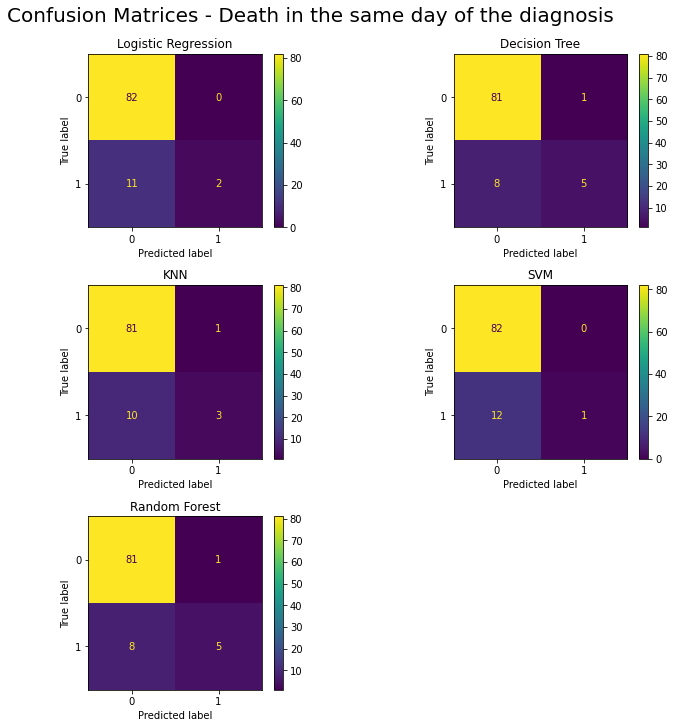

In [39]:
fig6, ax6 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig6.suptitle("Confusion Matrices - Death in the same day of the diagnosis", fontsize=20)

cm_logistic_regression_0d = confusion_matrix(y_test_0d, y_pred_log_reg_0d)
ConfusionMatrixDisplay(cm_logistic_regression_0d).plot(ax=ax6[0, 0])
ax6[0, 0].set_title("Logistic Regression")
ax6[0, 0].grid(False)

cm_decision_tree_0d = confusion_matrix(y_test_0d, y_pred_decision_tree_0d)
ConfusionMatrixDisplay(cm_decision_tree_0d).plot(ax=ax6[0, 1])
ax6[0, 1].set_title("Decision Tree")
ax6[0, 1].grid(False)

cm_knn_0d = confusion_matrix(y_test_0d, y_pred_knn_0d)
ConfusionMatrixDisplay(cm_knn_0d).plot(ax=ax6[1, 0])
ax6[1, 0].set_title("KNN")
ax6[1, 0].grid(False)

cm_svm_0d = confusion_matrix(y_test_0d, y_pred_svm_0d)
ConfusionMatrixDisplay(cm_svm_0d).plot(ax=ax6[1, 1])
ax6[1, 1].set_title("SVM")
ax6[1, 1].grid(False)

cm_random_forest_0d = confusion_matrix(y_test_0d, y_pred_random_forest_0d)
ConfusionMatrixDisplay(cm_random_forest_0d).plot(ax=ax6[2, 0])
ax6[2, 0].set_title("Random Forest")
ax6[2, 0].grid(False)

ax6[2, 1].set_visible(False)

Na faixa de 0 a 30 dias, o conjunto de teste não nos permite analisar o desempenho dos modelos, como já foi explicado nas análises anteriores. Portanto, a matriz de confusão desse intervalo de tempo demonstra que:

* Regressão Logística, Árvore de Decisão, KNN e SVM
 * Todos esses modelos preveram corretamente os 95 casos da classe 0.

* Random Forest
 * Para a classe 0, o modelo preveu corretamente 94 casos e incorretamente 1 caso.

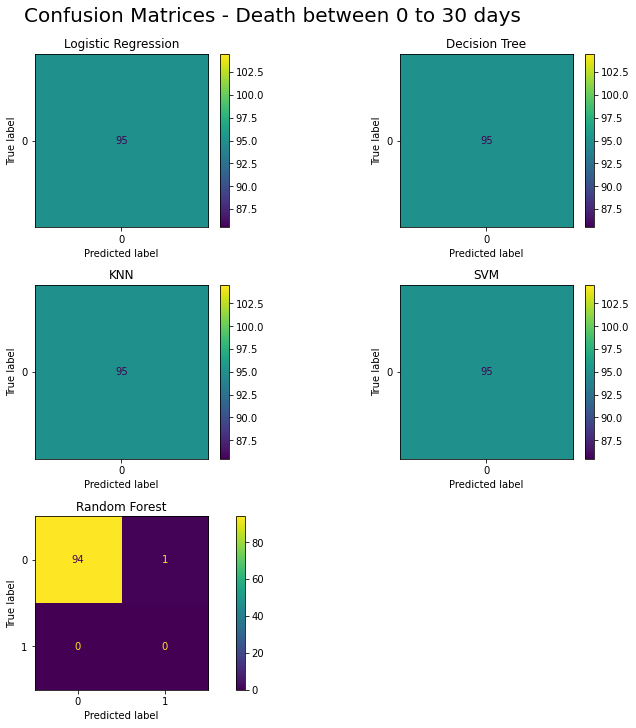

In [40]:
fig7, ax7 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig7.suptitle("Confusion Matrices - Death between 0 to 30 days", fontsize=20)

cm_logistic_regression_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_log_reg_0d_30d)
ConfusionMatrixDisplay(cm_logistic_regression_0d_30d).plot(ax=ax7[0, 0])
ax7[0, 0].set_title("Logistic Regression")
ax7[0, 0].grid(False)

cm_decision_tree_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_decision_tree_0d_30d)
ConfusionMatrixDisplay(cm_decision_tree_0d_30d).plot(ax=ax7[0, 1])
ax7[0, 1].set_title("Decision Tree")
ax7[0, 1].grid(False)

cm_knn_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_knn_0d_30d)
ConfusionMatrixDisplay(cm_knn_0d_30d).plot(ax=ax7[1, 0])
ax7[1, 0].set_title("KNN")
ax7[1, 0].grid(False)

cm_svm_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_svm_0d_30d)
ConfusionMatrixDisplay(cm_svm_0d_30d).plot(ax=ax7[1, 1])
ax7[1, 1].set_title("SVM")
ax7[1, 1].grid(False)

cm_random_forest_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_random_forest_0d_30d)
ConfusionMatrixDisplay(cm_random_forest_0d_30d).plot(ax=ax7[2, 0])
ax7[2, 0].set_title("Random Forest")
ax7[2, 0].grid(False)

ax7[2, 1].set_visible(False)

Assim como o intervalo anterior, na faixa de 30 a 360 dias o conjunto de teste não nos permite analisar o desempenho dos modelos. Portanto, a matriz de confusão demonstra que:

* Todos os modelos preveram corretamente os 95 casos da classe 0.

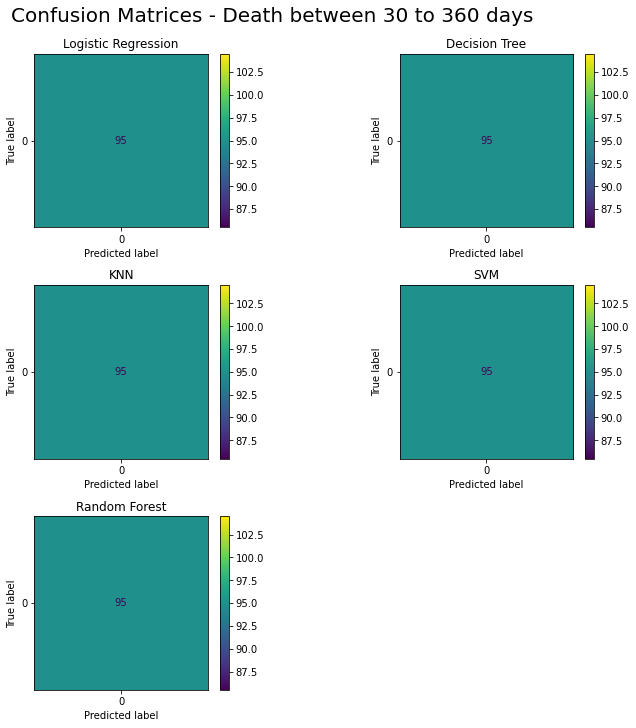

In [41]:
fig8, ax8 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig8.suptitle("Confusion Matrices - Death between 30 to 360 days", fontsize=20)

cm_logistic_regression_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_log_reg_30d_360d)
ConfusionMatrixDisplay(cm_logistic_regression_30d_360d).plot(ax=ax8[0, 0])
ax8[0, 0].set_title("Logistic Regression")
ax8[0, 0].grid(False)

cm_decision_tree_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_decision_tree_30d_360d)
ConfusionMatrixDisplay(cm_decision_tree_30d_360d).plot(ax=ax8[0, 1])
ax8[0, 1].set_title("Decision Tree")
ax8[0, 1].grid(False)

cm_knn_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_knn_30d_360d)
ConfusionMatrixDisplay(cm_knn_30d_360d).plot(ax=ax8[1, 0])
ax8[1, 0].set_title("KNN")
ax8[1, 0].grid(False)

cm_svm_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_svm_30d_360d)
ConfusionMatrixDisplay(cm_svm_30d_360d).plot(ax=ax8[1, 1])
ax8[1, 1].set_title("SVM")
ax8[1, 1].grid(False)

cm_random_forest_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_random_forest_30d_360d)
ConfusionMatrixDisplay(cm_random_forest_30d_360d).plot(ax=ax8[2, 0])
ax8[2, 0].set_title("Random Forest")
ax8[2, 0].grid(False)

ax8[2, 1].set_visible(False)

Na faixa de 360 a 540 dias, o conjunto de teste não nos permite analisar o desempenho dos modelos, como já foi explicado nas análises anteriores. Portanto, a matriz de confusão desse intervalo de tempo demonstra que:

Regressão Logística, Árvore de Decisão, KNN e SVM
* Todos esses modelos preveram corretamente os 95 casos da classe 0.

Random Forest
* Para a classe 0, o modelo preveu corretamente 93 casos e incorretamente 2 casos.

In [42]:
fig9, ax9 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig9.suptitle("Confusion Matrices - Death between 360 to 540 days", fontsize=20)

cm_logistic_regression_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_log_reg_360d_540d)
ConfusionMatrixDisplay(cm_logistic_regression_360d_540d).plot(ax=ax9[0, 0])
ax9[0, 0].set_title("Logistic Regression")
ax9[0, 0].grid(False)

cm_decision_tree_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_decision_tree_360d_540d)
ConfusionMatrixDisplay(cm_decision_tree_360d_540d).plot(ax=ax9[0, 1])
ax9[0, 1].set_title("Decision Tree")
ax9[0, 1].grid(False)

cm_knn_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_knn_360d_540d)
ConfusionMatrixDisplay(cm_knn_360d_540d).plot(ax=ax9[1, 0])
ax9[1, 0].set_title("KNN")
ax9[1, 0].grid(False)

cm_svm_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_svm_360d_540d)
ConfusionMatrixDisplay(cm_svm_360d_540d).plot(ax=ax9[1, 1])
ax9[1, 1].set_title("SVM")
ax9[1, 1].grid(False)

cm_random_forest_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_random_forest_360d_540d)
ConfusionMatrixDisplay(cm_random_forest_360d_540d).plot(ax=ax9[2, 0])
ax9[2, 0].set_title("Random Forest")
ax9[2, 0].grid(False)

ax9[2, 1].set_visible(False)

A matriz de confusão para o intervalo de 540 a 1440 dias pode ser entendida da seguinte maneira:

Regressão Logística
* Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
* Para os casos da classe 1, o modelo preveu incorretamente o único caso.

Árvore de Decisão
* Para os casos da classe 0, o modelo preveu corretamente 91 casos e incorretamente 3 casos;
* Para os casos da classe 1, o modelo preveu incorretamente o único caso.

KNN
* Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
* Para os casos da classe 1, o modelo preveu incorretamente o único caso.

SVM
* Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
* Para os casos da classe 1, o modelo preveu incorretamente o único caso.

Random Forest
* Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
* Para os casos da classe 1, o modelo preveu incorretamente o único caso.

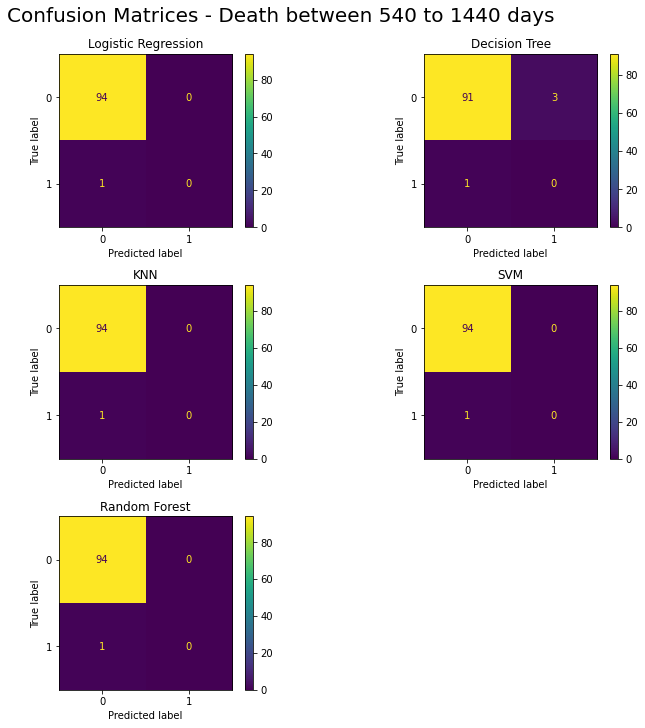

In [43]:
fig10, ax10 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig10.suptitle("Confusion Matrices - Death between 540 to 1440 days", fontsize=20)

cm_logistic_regression_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_log_reg_540d_1440d)
ConfusionMatrixDisplay(cm_logistic_regression_540d_1440d).plot(ax=ax10[0, 0])
ax10[0, 0].set_title("Logistic Regression")
ax10[0, 0].grid(False)

cm_decision_tree_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_decision_tree_540d_1440d)
ConfusionMatrixDisplay(cm_decision_tree_540d_1440d).plot(ax=ax10[0, 1])
ax10[0, 1].set_title("Decision Tree")
ax10[0, 1].grid(False)

cm_knn_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_knn_540d_1440d)
ConfusionMatrixDisplay(cm_knn_540d_1440d).plot(ax=ax10[1, 0])
ax10[1, 0].set_title("KNN")
ax10[1, 0].grid(False)

cm_svm_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_svm_540d_1440d)
ConfusionMatrixDisplay(cm_svm_540d_1440d).plot(ax=ax10[1, 1])
ax10[1, 1].set_title("SVM")
ax10[1, 1].grid(False)

cm_random_forest_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_random_forest_540d_1440d)
ConfusionMatrixDisplay(cm_random_forest_540d_1440d).plot(ax=ax10[2, 0])
ax10[2, 0].set_title("Random Forest")
ax10[2, 0].grid(False)

ax10[2, 1].set_visible(False)

A matriz de confusão para a faixa acima de 1440 dias pode ser entendida da seguinte forma:

Regressão Logística
* Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
* Para os casos da classe 1, o modelo preveu incorretamente todos os 4.

Árvore de Decisão
* Para os casos da classe 0, o modelo preveu corretamente 90 casos e incorretamente 1 caso;
* Para os casos da classe 1, o modelo preveu corretamente 2 casos e incorretamente 2 casos.

KNN
* Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
* Para os casos da classe 1, o modelo preveu incorretamente todos os 4.

SVM
* Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
* Para os casos da classe 1, o modelo preveu incorretamente todos os 4.

Random Forest
* Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
* Para os casos da classe 1, o modelo preveu corretamente 1 caso e incorretamente 3 casos.

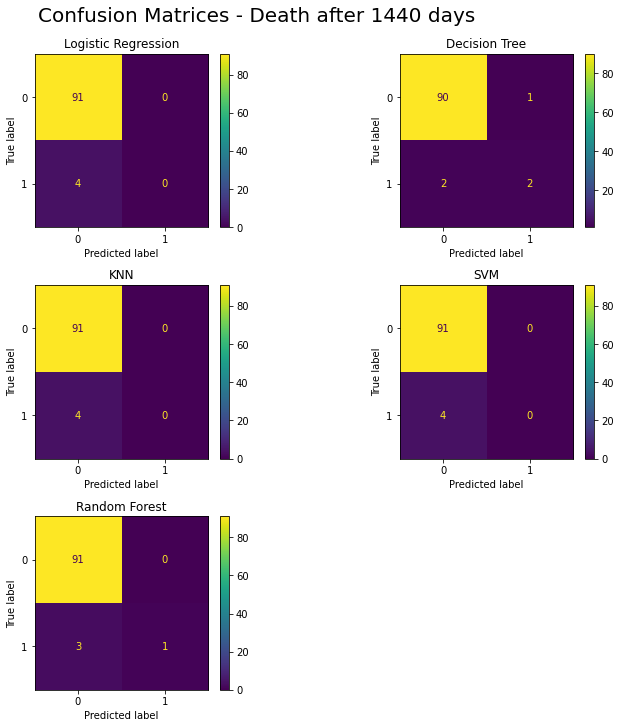

In [44]:
fig11, ax11 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig11.suptitle("Confusion Matrices - Death after 1440 days", fontsize=20)

cm_logistic_regression_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_log_reg_after_1440d)
ConfusionMatrixDisplay(cm_logistic_regression_after_1440d).plot(ax=ax11[0, 0])
ax11[0, 0].set_title("Logistic Regression")
ax11[0, 0].grid(False)

cm_decision_tree_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_decision_tree_after_1440d)
ConfusionMatrixDisplay(cm_decision_tree_after_1440d).plot(ax=ax11[0, 1])
ax11[0, 1].set_title("Decision Tree")
ax11[0, 1].grid(False)

cm_knn_after_1440d= confusion_matrix(y_test_after_1440d, y_pred_knn_after_1440d)
ConfusionMatrixDisplay(cm_knn_after_1440d).plot(ax=ax11[1, 0])
ax11[1, 0].set_title("KNN")
ax11[1, 0].grid(False)

cm_svm_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_svm_after_1440d)
ConfusionMatrixDisplay(cm_svm_after_1440d).plot(ax=ax11[1, 1])
ax11[1, 1].set_title("SVM")
ax11[1, 1].grid(False)

cm_random_forest_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_random_forest_after_1440d)
ConfusionMatrixDisplay(cm_random_forest_after_1440d).plot(ax=ax11[2, 0])
ax11[2, 0].set_title("Random Forest")
ax11[2, 0].grid(False)

ax11[2, 1].set_visible(False)

##### Acurácia, Precisão, Revocação e F1-Score

---



Analisando os dados do `classification_report` para a faixa do mesmo dia do diagnóstico podemos concluir que:

* Os modelos tiveram acurácia acima de 87%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Considerando a precisão dos modelos no caso de morte, ou seja, quantas das predições positivas realmente eram positivas, todas obtiveram valores acima de 75%, sendo os melhores a Regressão Logística e a SVM, ambos com 100%;
* Ao analisar a revocação para o caso de morte, ou seja, quantos casos positivos realmente foram predizidos como positivos, vemos que os modelos não performaram bem, com o melhor resultado de 38% para Árvore de Decisão e *Random Forest*;
* Avaliando o F1-score (média harmônica calculada com base na precisão e na revocação), temos que os melhores modelos foram a Árvore de Decisão e a *Random Forest*, obtendo 53%.



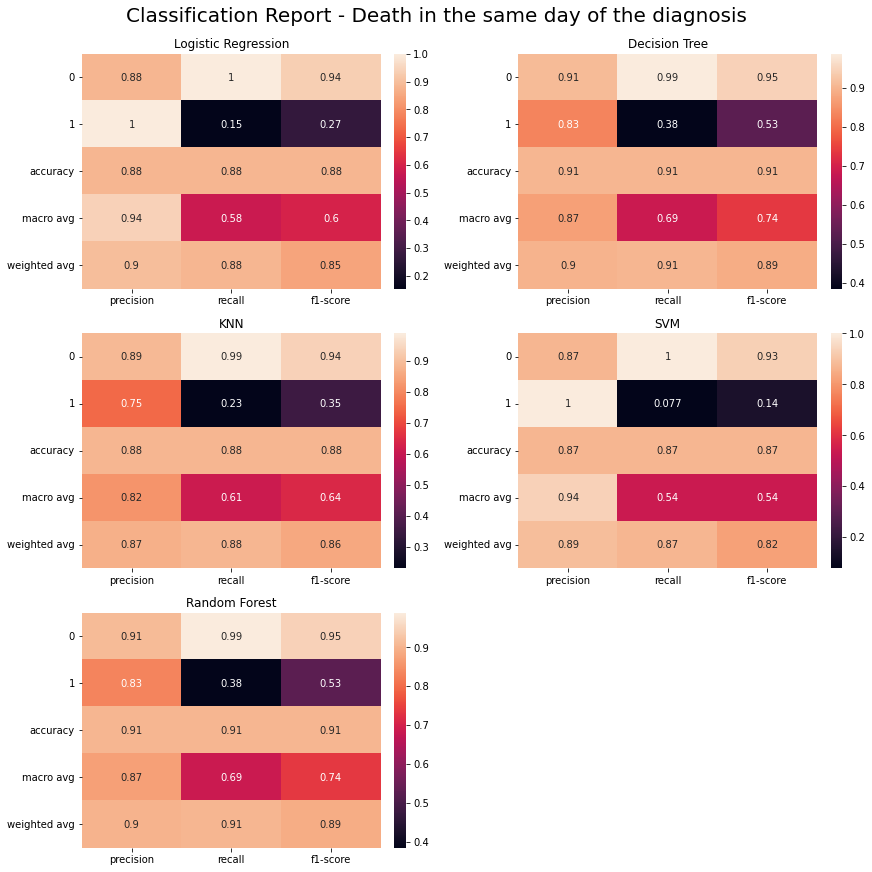

In [45]:
report_log_reg_0d = classification_report(y_test_0d, y_pred_log_reg_0d, zero_division=1, output_dict=True)
report_dec_tree_0d = classification_report(y_test_0d, y_pred_decision_tree_0d, zero_division=1, output_dict=True)
report_knn_0d = classification_report(y_test_0d, y_pred_knn_0d, zero_division=1, output_dict=True)
report_svm_0d = classification_report(y_test_0d, y_pred_svm_0d, zero_division=1, output_dict=True)
report_random_forest_0d = classification_report(y_test_0d, y_pred_random_forest_0d, zero_division=1, output_dict=True)

fig0, ax0 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig0.suptitle("Classification Report - Death in the same day of the diagnosis", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 0])
ax0[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 1])
ax0[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 0])
ax0[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 1])
ax0[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_0d).iloc[:-1, :].T, annot=True, ax=ax0[2, 0])
ax0[2, 0].set_title("Random Forest")

ax0[2, 1].set_visible(False)

As métricas para a faixa de tempo de 0 a 30 dias do registro do diagnóstico demonstram que:

* O desbalanceamento da base de dados gerou um conjunto de teste que possui apenas uma classe (0) para essa faixa de tempo, portanto não foi possível avaliar a eficácia dos modelos.


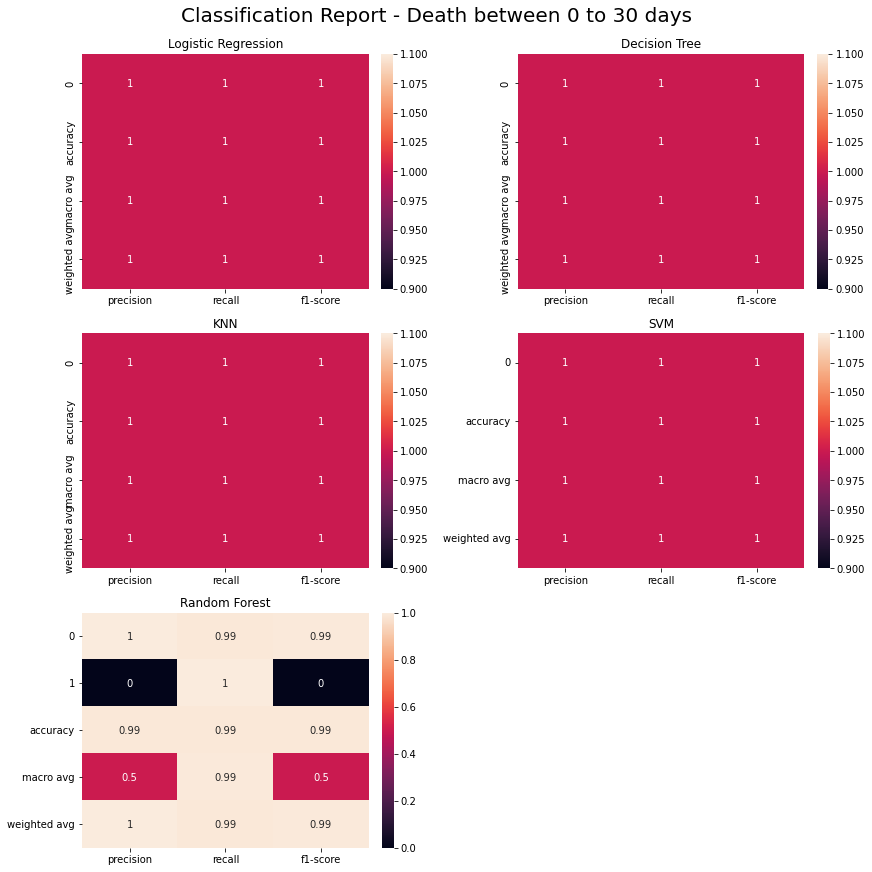

In [46]:
report_log_reg_0d_30d = classification_report(y_test_0d_30d, y_pred_log_reg_0d_30d, zero_division=1, output_dict=True)
report_dec_tree_0d_30d = classification_report(y_test_0d_30d, y_pred_decision_tree_0d_30d, zero_division=1, output_dict=True)
report_knn_0d_30d = classification_report(y_test_0d_30d, y_pred_knn_0d_30d, zero_division=1, output_dict=True)
report_svm_0d_30d = classification_report(y_test_0d_30d, y_pred_svm_0d_30d, zero_division=1, output_dict=True)
report_random_forest_0d_30d = classification_report(y_test_0d_30d, y_pred_random_forest_0d_30d, zero_division=1, output_dict=True)

fig1, ax1 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig1.suptitle("Classification Report - Death between 0 to 30 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 0])
ax1[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 1])
ax1[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 0])
ax1[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 1])
ax1[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[2, 0])
ax1[2, 0].set_title("Random Forest")

ax1[2, 1].set_visible(False)

O mesmo problema do intervalo anterior também ocorreu na faixa de 30 a 360 dias, onde o conjunto de teste possui apenas uma classe (0), impossibilitando a avaliação dos modelos.

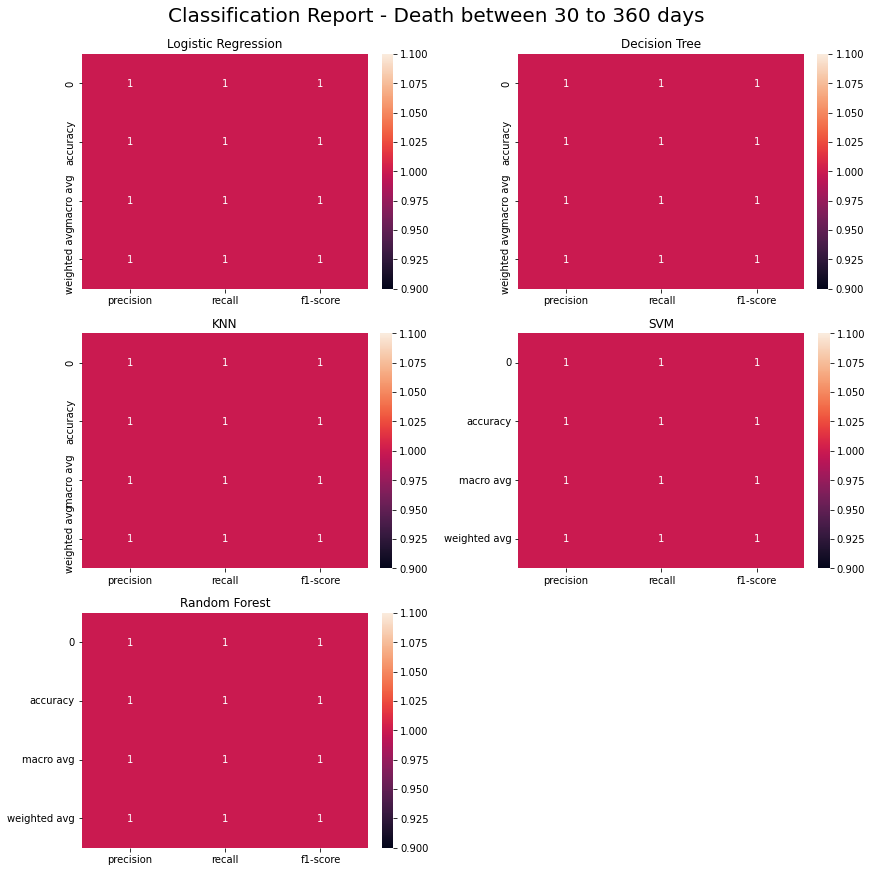

In [47]:
report_log_reg_30d_360d = classification_report(y_test_30d_360d, y_pred_log_reg_30d_360d, zero_division=1, output_dict=True)
report_dec_tree_30d_360d = classification_report(y_test_30d_360d, y_pred_decision_tree_30d_360d, zero_division=1, output_dict=True)
report_knn_30d_360d = classification_report(y_test_30d_360d, y_pred_knn_30d_360d, zero_division=1, output_dict=True)
report_svm_30d_360d = classification_report(y_test_30d_360d, y_pred_svm_30d_360d, zero_division=1, output_dict=True)
report_random_forest_30d_360d = classification_report(y_test_30d_360d, y_pred_random_forest_30d_360d, zero_division=1, output_dict=True)

fig2, ax2 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig2.suptitle("Classification Report - Death between 30 to 360 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 0])
ax2[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 1])
ax2[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 0])
ax2[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 1])
ax2[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[2, 0])
ax2[2, 0].set_title("Random Forest")

ax2[2, 1].set_visible(False)

Na faixa de 360 a 540 dias identificamos o mesmo problema das faixas anteriores que, novamente, impossibilita a avaliação dos modelos.

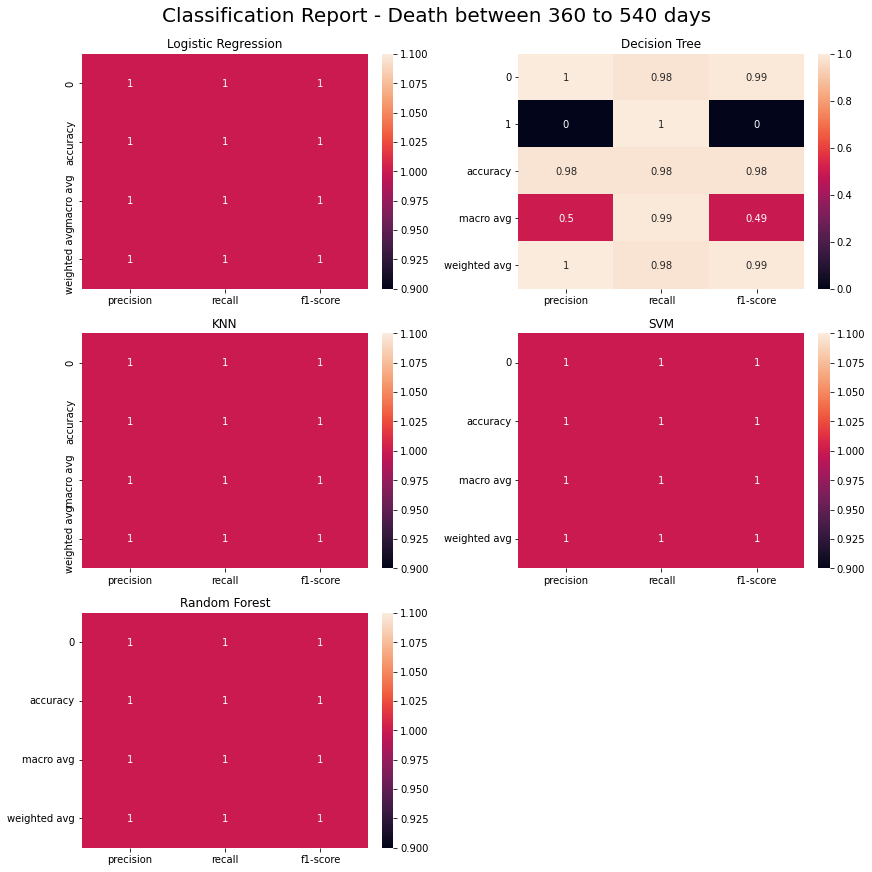

In [48]:
report_log_reg_360d_540d = classification_report(y_test_360d_540d, y_pred_log_reg_360d_540d, zero_division=1, output_dict=True)
report_dec_tree_360d_540d = classification_report(y_test_360d_540d, y_pred_decision_tree_360d_540d, zero_division=1, output_dict=True)
report_knn_360d_540d = classification_report(y_test_360d_540d, y_pred_knn_360d_540d, zero_division=1, output_dict=True)
report_svm_360d_540d = classification_report(y_test_360d_540d, y_pred_svm_360d_540d, zero_division=1, output_dict=True)
report_random_forest_360d_540d = classification_report(y_test_360d_540d, y_pred_random_forest_360d_540d, zero_division=1, output_dict=True)

fig3, ax3 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig3.suptitle("Classification Report - Death between 360 to 540 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 0])
ax3[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 1])
ax3[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 0])
ax3[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 1])
ax3[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[2, 0])
ax3[2, 0].set_title("Random Forest")

ax3[2, 1].set_visible(False)

Analisando os dados do `classification_report` para a faixa de 540 a 1440 dias concluímos que:

* Os modelos tiveram acurácia acima de 96%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.



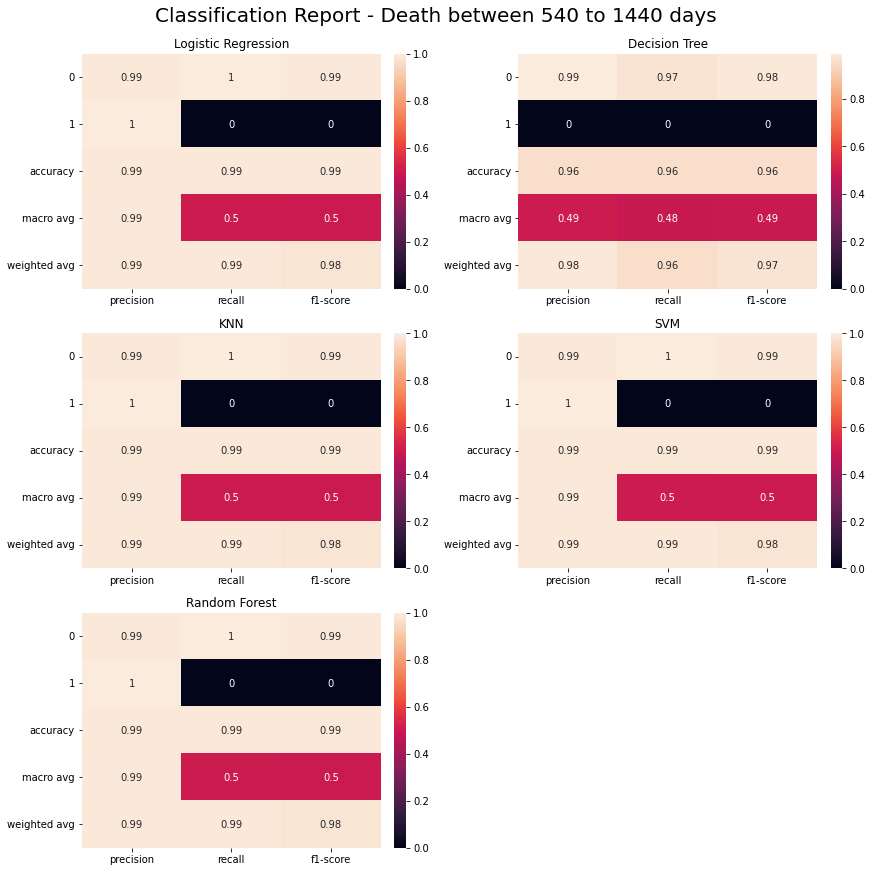

In [49]:
report_log_reg_540d_1440d = classification_report(y_test_540d_1440d, y_pred_log_reg_540d_1440d, zero_division=1, output_dict=True)
report_dec_tree_540d_1440d = classification_report(y_test_540d_1440d, y_pred_decision_tree_540d_1440d, zero_division=1, output_dict=True)
report_knn_540d_1440d = classification_report(y_test_540d_1440d, y_pred_knn_540d_1440d, zero_division=1, output_dict=True)
report_svm_540d_1440d = classification_report(y_test_540d_1440d, y_pred_svm_540d_1440d, zero_division=1, output_dict=True)
report_random_forest_540d_1440d = classification_report(y_test_540d_1440d, y_pred_random_forest_540d_1440d, zero_division=1, output_dict=True)

fig4, ax4 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig4.suptitle("Classification Report - Death between 540 to 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 0])
ax4[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 1])
ax4[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 0])
ax4[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 1])
ax4[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[2, 0])
ax4[2, 0].set_title("Random Forest")

ax4[2, 1].set_visible(False)

O `classification_report` para o intervalo acima de 1440 dias demonstra que:

* Os modelos tiveram acurácia acima de 96%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Considerando a precisão para casos de morte, os modelos obtiveram valores acima de 67%.
* Ao analisar a revocação para o caso de morte, vemos que os modelos não performaram bem, sendo o melhor resultado de 50% para a Árvore de Decisão;
* Avaliando o F1-score para casos de morte, temos que o melhor modelo foi a Árvore de Decisão, obtendo 57%.


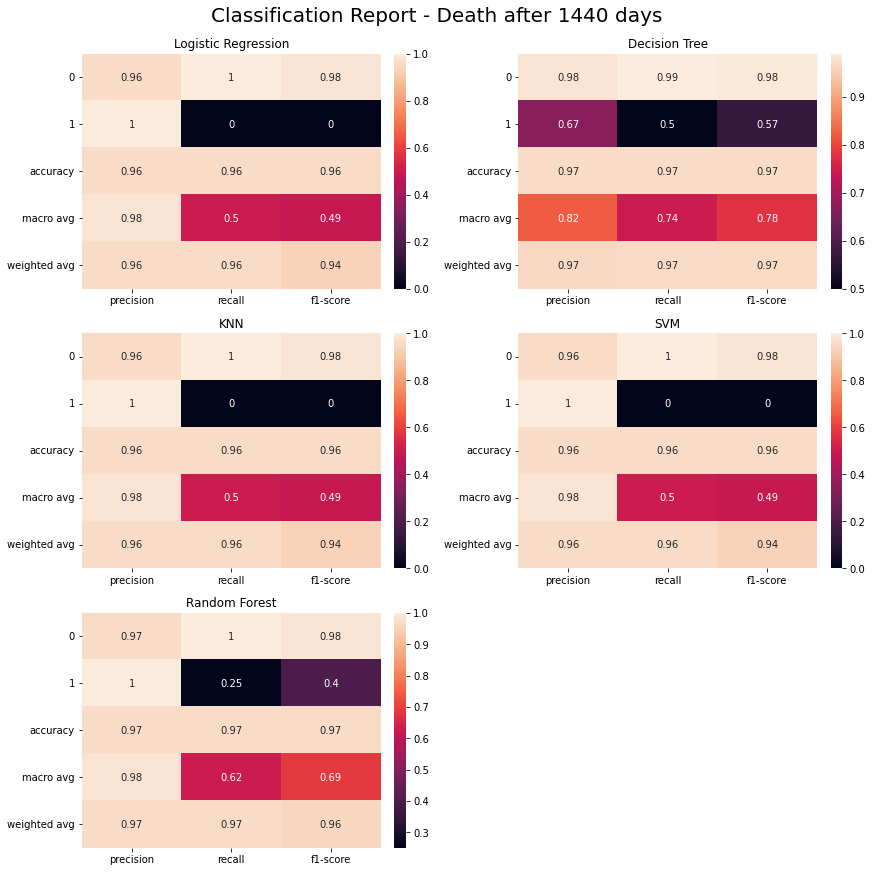

In [50]:
report_log_reg_after_1440d = classification_report(y_test_after_1440d, y_pred_log_reg_after_1440d, zero_division=1, output_dict=True)
report_dec_tree_after_1440d = classification_report(y_test_after_1440d, y_pred_decision_tree_after_1440d, zero_division=1, output_dict=True)
report_knn_after_1440d = classification_report(y_test_after_1440d, y_pred_knn_after_1440d, zero_division=1, output_dict=True)
report_svm_after_1440d = classification_report(y_test_after_1440d, y_pred_svm_after_1440d, zero_division=1, output_dict=True)
report_random_forest_after_1440d = classification_report(y_test_after_1440d, y_pred_random_forest_after_1440d, zero_division=1, output_dict=True)

fig5, ax5 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig5.suptitle("Classification Report - Death after 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 0])
ax5[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 1])
ax5[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 0])
ax5[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 1])
ax5[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[2, 0])
ax5[2, 0].set_title("Random Forest")

ax5[2, 1].set_visible(False)

##### Curva ROC e AUCROC

---



Outro método para avaliação dos modelos é a curva ROC, onde podemos avaliar o valor da AUROC (área abaixo da curva ROC). Para a comparação dos modelos analisamos a AUROC para todas as faixas de tempo testadas.

In [51]:
lr_prob_0d = logistic_regression_0d.predict_proba(x_test)
lr_prob_0d = lr_prob_0d[:, 1]
dt_prob_0d = decision_tree_0d.predict_proba(x_test)
dt_prob_0d = dt_prob_0d[:, 1]
knn_prob_0d = knn_prognosis_0d.predict_proba(x_test)
knn_prob_0d = knn_prob_0d[:, 1]
svm_prob_0d = svm_prognosis_0d.predict_proba(x_test)
svm_prob_0d = svm_prob_0d[:, 1]
rf_prob_0d = random_forest_prognosis_0d.predict_proba(x_test)
rf_prob_0d = rf_prob_0d[:, 1]

lr_prob_0d_30d = logistic_regression_0d_30d.predict_proba(x_test)
lr_prob_0d_30d = lr_prob_0d_30d[:, 1]
dt_prob_0d_30d = decision_tree_0d_30d.predict_proba(x_test)
dt_prob_0d_30d = dt_prob_0d_30d[:, 1]
knn_prob_0d_30d = knn_prognosis_0d_30d.predict_proba(x_test)
knn_prob_0d_30d = knn_prob_0d_30d[:, 1]
svm_prob_0d_30d = svm_prognosis_0d_30d.predict_proba(x_test)
svm_prob_0d_30d = svm_prob_0d_30d[:, 1]
rf_prob_0d_30d = random_forest_prognosis_0d_30d.predict_proba(x_test)
rf_prob_0d_30d = rf_prob_0d_30d[:, 1]

lr_prob_30d_360d = logistic_regression_30d_360d.predict_proba(x_test)
lr_prob_30d_360d = lr_prob_30d_360d[:, 1]
dt_prob_30d_360d = decision_tree_30d_360d.predict_proba(x_test)
dt_prob_30d_360d = dt_prob_30d_360d[:, 1]
knn_prob_30d_360d = knn_prognosis_30d_360d.predict_proba(x_test)
knn_prob_30d_360d = knn_prob_30d_360d[:, 1]
svm_prob_30d_360d = svm_prognosis_30d_360d.predict_proba(x_test)
svm_prob_30d_360d = svm_prob_30d_360d[:, 1]
rf_prob_30d_360d = random_forest_prognosis_30d_360d.predict_proba(x_test)
rf_prob_30d_360d = rf_prob_30d_360d[:, 1]

lr_prob_360d_540d = logistic_regression_360d_540d.predict_proba(x_test)
lr_prob_360d_540d = lr_prob_360d_540d[:, 1]
dt_prob_360d_540d = decision_tree_360d_540d.predict_proba(x_test)
dt_prob_360d_540d = dt_prob_360d_540d[:, 1]
knn_prob_360d_540d = knn_prognosis_360d_540d.predict_proba(x_test)
knn_prob_360d_540d = knn_prob_360d_540d[:, 1]
svm_prob_360d_540d = svm_prognosis_360d_540d.predict_proba(x_test)
svm_prob_360d_540d = svm_prob_360d_540d[:, 1]
rf_prob_360d_540d = random_forest_prognosis_360d_540d.predict_proba(x_test)
rf_prob_360d_540d = rf_prob_360d_540d[:, 1]

lr_prob_540d_1440d = logistic_regression_540d_1440d.predict_proba(x_test)
lr_prob_540d_1440d = lr_prob_540d_1440d[:, 1]
dt_prob_540d_1440d = decision_tree_540d_1440d.predict_proba(x_test)
dt_prob_540d_1440d = dt_prob_540d_1440d[:, 1]
knn_prob_540d_1440d = knn_prognosis_540d_1440d.predict_proba(x_test)
knn_prob_540d_1440d = knn_prob_540d_1440d[:, 1]
svm_prob_540d_1440d = svm_prognosis_540d_1440d.predict_proba(x_test)
svm_prob_540d_1440d = svm_prob_540d_1440d[:, 1]
rf_prob_540d_1440d = random_forest_prognosis_540d_1440d.predict_proba(x_test)
rf_prob_540d_1440d = rf_prob_540d_1440d[:, 1]

lr_prob_after_1440d = logistic_regression_after_1440d.predict_proba(x_test)
lr_prob_after_1440d = lr_prob_after_1440d[:, 1]
dt_prob_after_1440d = decision_tree_after_1440d.predict_proba(x_test)
dt_prob_after_1440d = dt_prob_after_1440d[:, 1]
knn_prob_after_1440d = knn_prognosis_after_1440d.predict_proba(x_test)
knn_prob_after_1440d = knn_prob_after_1440d[:, 1]
svm_prob_after_1440d = svm_prognosis_after_1440d.predict_proba(x_test)
svm_prob_after_1440d = svm_prob_after_1440d[:, 1]
rf_prob_after_1440d = random_forest_prognosis_after_1440d.predict_proba(x_test)

rf_prob_after_1440d = rf_prob_after_1440d[:, 1]

Devido aos problemas na separação do conjunto de teste, onde alguns apresentaram apenas resultados de uma classe, a curva ROC não é capaz de ser gerada. No bloco abaixo verificamos que para os intervalos de 0 a 30 dias, 30 a 360 dias e 360 a 540 dias não foi possível gerar a curva ROC.

In [52]:
try:
  lr_0d = roc_auc_score(y_test_0d, lr_prob_0d)
except ValueError as err:
  print("Error for Logistic Regression, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  dt_0d = roc_auc_score(y_test_0d, dt_prob_0d)
except ValueError as err:
  print("Error for Decision Tree, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  knn_0d = roc_auc_score(y_test_0d, knn_prob_0d)
except ValueError as err:
  print("Error for KNN, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  svm_0d = roc_auc_score(y_test_0d, svm_prob_0d)
except ValueError as err:
  print("Error for SVM, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  rf_0d = roc_auc_score(y_test_0d, rf_prob_0d)
except ValueError as err:
  print("Error for Random Forest, with death in the same day of the diagnosis: " + str(err))
  pass

try:
  lr_0d_30d = roc_auc_score(y_test_0d_30d, lr_prob_0d_30d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 0 to 30 days: " + str(err))
  pass
try:
  dt_0d_30d = roc_auc_score(y_test_0d_30d, dt_prob_0d_30d)
except ValueError as err:
  print("Error for Decision Tree, with death between 0 to 30 days: " + str(err))
  pass
try:  
  knn_0d_30d = roc_auc_score(y_test_0d_30d, knn_prob_0d_30d)
except ValueError as err:
  print("Error for KNN, with death between 0 to 30 days: " + str(err))
  pass
try:
  svm_0d_30d = roc_auc_score(y_test_0d_30d, svm_prob_0d_30d)
except ValueError as err:
  print("Error for SVM, with death between 0 to 30 days: " + str(err))
  pass
try: 
  rf_0d_30d = roc_auc_score(y_test_0d_30d, rf_prob_0d_30d)
except ValueError as err:
  print("Error for Random Forest, with death between 0 to 30 days: " + str(err))
  pass

try:
  lr_30d_360d = roc_auc_score(y_test_30d_360d, lr_prob_30d_360d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 30 to 360 days: " + str(err))
  pass
try:
  dt_30d_360d = roc_auc_score(y_test_30d_360d, dt_prob_30d_360d)
except ValueError as err:
  print("Error for Decision Tree, with death between 30 to 360 days: " + str(err))
  pass
try:
  knn_30d_360d = roc_auc_score(y_test_30d_360d, knn_prob_30d_360d)
except ValueError as err:
  print("Error for KNN, with death between 30 to 360 days: " + str(err))
  pass
try:
  svm_30d_360d = roc_auc_score(y_test_30d_360d, svm_prob_30d_360d)
except ValueError as err:
  print("Error for SVM, with death between 30 to 360 days: " + str(err))
  pass
try:
  rf_30d_360d = roc_auc_score(y_test_30d_360d, rf_prob_30d_360d)
except ValueError as err:
  print("Error for Random Forest, with death between 30 to 360 days: " + str(err))
  pass

try:
  lr_360d_540d = roc_auc_score(y_test_360d_540d, lr_prob_360d_540d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 360 to 540 days: " + str(err))
  pass
try:
  dt_360d_540d = roc_auc_score(y_test_360d_540d, dt_prob_360d_540d)
except ValueError as err:
  print("Error for Decision Tree, with death between 360 to 540 days: " + str(err))
  pass
try:
  knn_360d_540d = roc_auc_score(y_test_360d_540d, knn_prob_360d_540d)
except ValueError as err:
  print("Error for KNN, with death between 360 to 540 days: " + str(err))
  pass
try:
  svm_360d_540d = roc_auc_score(y_test_360d_540d, svm_prob_360d_540d)
except ValueError as err:
  print("Error for SVM, with death between 360 to 540 days: " + str(err))
  pass
try:
  rf_360d_540d = roc_auc_score(y_test_360d_540d, rf_prob_360d_540d)
except ValueError as err:
  print("Error for Random Forest, with death between 360 to 540 days: " + str(err))
  pass

try:
  lr_540d_1440d = roc_auc_score(y_test_540d_1440d, lr_prob_540d_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 540 to 1440 days: " + str(err))
  pass
try:
  dt_540d_1440d = roc_auc_score(y_test_540d_1440d, dt_prob_540d_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death between 540 to 1440 days: " + str(err))
  pass
try:  
  knn_540d_1440d = roc_auc_score(y_test_540d_1440d, knn_prob_540d_1440d)
except ValueError as err:
  print("Error for KNN, with death between 540 to 1440 days: " + str(err))
  pass
try:  
  svm_540d_1440d = roc_auc_score(y_test_540d_1440d, svm_prob_540d_1440d)
except ValueError as err:
  print("Error for SVM, with death between 540 to 1440 days: " + str(err))
  pass
try:  
  rf_540d_1440d = roc_auc_score(y_test_540d_1440d, rf_prob_540d_1440d)
except ValueError as err:
  print("Error for Random Forest, with death between 540 to 1440 days: " + str(err))
  pass

try:
  lr_after_1440d = roc_auc_score(y_test_after_1440d, lr_prob_after_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death after 1440 days: " + str(err))
  pass
try:
  dt_after_1440d = roc_auc_score(y_test_after_1440d, dt_prob_after_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death after 1440 days: " + str(err))
  pass
try:
  knn_after_1440d = roc_auc_score(y_test_after_1440d, knn_prob_after_1440d)
except ValueError as err:
  print("Error for KNN, with death after 1440 days: " + str(err))
  pass
try:
  svm_after_1440d = roc_auc_score(y_test_after_1440d, svm_prob_after_1440d)
except ValueError as err:
  print("Error for SVM, with death after 1440 days: " + str(err))
  pass
try:
  rf_after_1440d = roc_auc_score(y_test_after_1440d, rf_prob_after_1440d)
except ValueError as err:
  print("Error for Random Forest, with death after 1440 days: " + str(err))
  pass

Error for Logistic Regression, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Decision Tree, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for KNN, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for SVM, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Random Forest, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Logistic Regression, with death between 30 to 360 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Decision Tree, with death between 30 to 360 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for KNN, with death between 30 to 360 days: Only one 

No bloco abaixo são geradas as curvas ROC para os intervalos no qual o conjunto de teste teve valores de ambas as classes.

In [53]:
lr_fpr_0d, lr_tpr_0d, _ = roc_curve(y_test_0d, lr_prob_0d)
dt_fpr_0d, dt_tpr_0d, _ = roc_curve(y_test_0d, dt_prob_0d)
knn_fpr_0d, knn_tpr_0d, _ = roc_curve(y_test_0d, knn_prob_0d)
svm_fpr_0d, svm_tpr_0d, _ = roc_curve(y_test_0d, svm_prob_0d)
rf_fpr_0d, rf_tpr_0d, _ = roc_curve(y_test_0d, rf_prob_0d)

lr_fpr_540d_1440d, lr_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, lr_prob_540d_1440d)
dt_fpr_540d_1440d, dt_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, dt_prob_540d_1440d)
knn_fpr_540d_1440d, knn_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, knn_prob_540d_1440d)
svm_fpr_540d_1440d, svm_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, svm_prob_540d_1440d)
rf_fpr_540d_1440d, rf_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, rf_prob_540d_1440d)

lr_fpr_after_1440d, lr_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, lr_prob_after_1440d)
dt_fpr_after_1440d, dt_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, dt_prob_after_1440d)
knn_fpr_after_1440d, knn_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, knn_prob_after_1440d)
svm_fpr_after_1440d, svm_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, svm_prob_after_1440d)
rf_fpr_after_1440d, rf_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, rf_prob_after_1440d)

Analisando a AUROC para os intervalos possíveis verificamos que:

* Para a faixa de tempo de mesmo dia do diagnóstico, os melhores resultados foram obtidos pela Regressão Logística e pela SVM, ambas com 81% de AUROC;
* Para o intervalo de 540 a 1440 dias nenhum modelo atingiu um valor acima de 50%, o KNN teve o melhor resultado (49%);
* Para o intervalo após 1440 dias a Árvore de Decisão teve o melhor resultado (74%).



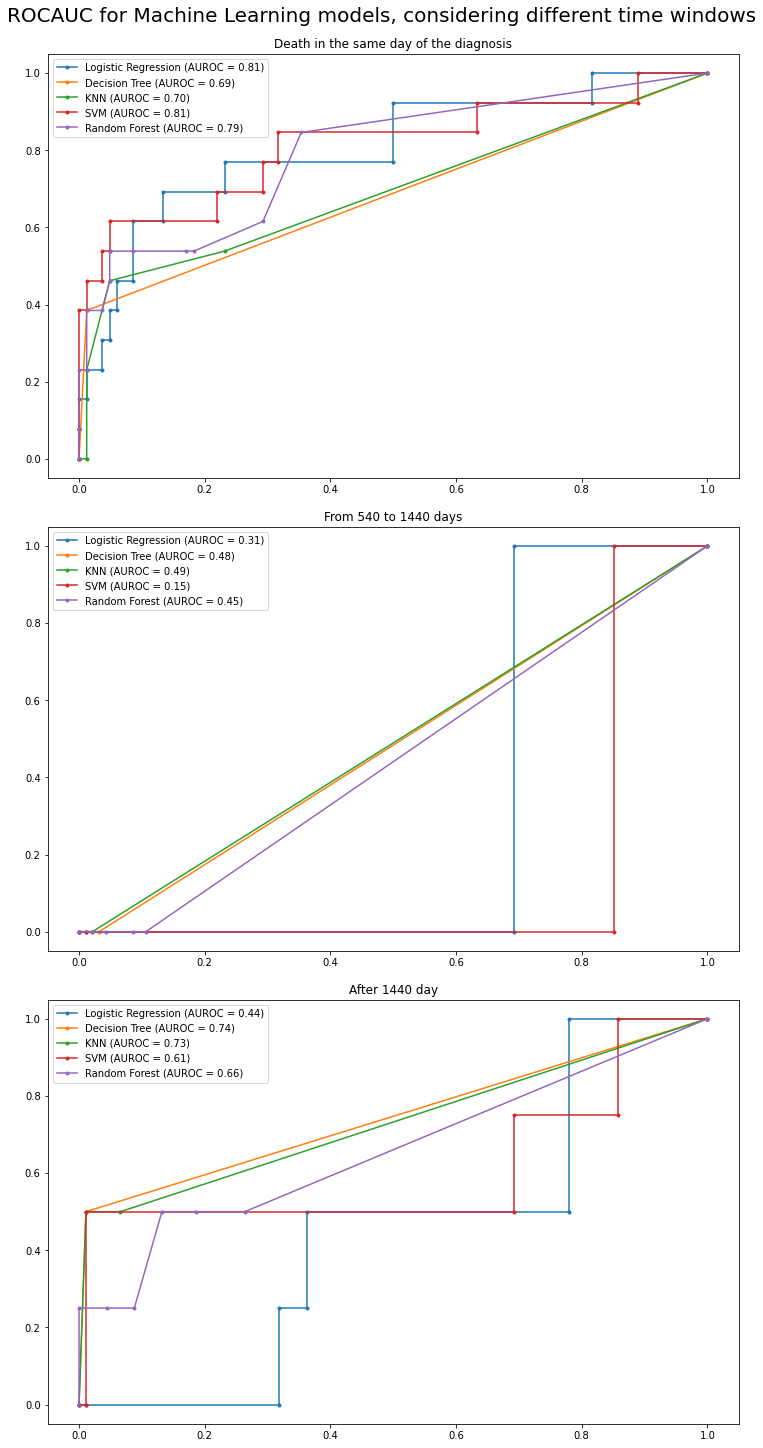

In [54]:
fig6, ax6 = plt.subplots(3, figsize=(10, 20), constrained_layout=True)
fig6.suptitle("ROCAUC for Machine Learning models, considering different time windows", fontsize=20)

ax6[0].plot(lr_fpr_0d, lr_tpr_0d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[0].plot(dt_fpr_0d, dt_tpr_0d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[0].plot(knn_fpr_0d, knn_tpr_0d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[0].plot(svm_fpr_0d, svm_tpr_0d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[0].plot(rf_fpr_0d, rf_tpr_0d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[0].legend()
ax6[0].set_title("Death in the same day of the diagnosis")

ax6[1].plot(lr_fpr_540d_1440d, lr_tpr_540d_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_540d_1440d)
ax6[1].plot(dt_fpr_540d_1440d, dt_tpr_540d_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_540d_1440d)
ax6[1].plot(knn_fpr_540d_1440d, knn_tpr_540d_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_540d_1440d)
ax6[1].plot(svm_fpr_540d_1440d, svm_tpr_540d_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_540d_1440d)
ax6[1].plot(rf_fpr_540d_1440d, rf_tpr_540d_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_540d_1440d)
ax6[1].legend()
ax6[1].set_title("From 540 to 1440 days")

ax6[2].plot(lr_fpr_after_1440d, lr_tpr_after_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_after_1440d)
ax6[2].plot(dt_fpr_after_1440d, dt_tpr_after_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_after_1440d)
ax6[2].plot(knn_fpr_after_1440d, knn_tpr_after_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_after_1440d)
ax6[2].plot(svm_fpr_after_1440d, svm_tpr_after_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_after_1440d)
ax6[2].plot(rf_fpr_after_1440d, rf_tpr_after_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_after_1440d)
ax6[2].legend()
ax6[2].set_title("After 1440 day");

##### Avaliação de modelo com cross-validation

---



A validação cruzada (*cross-validation*) é uma forma validação que consiste na divisão da base de dados em subconjuntos, onde cada um deles será utilizado para treinamento enquanto os outros serão utilizados para teste, tudo isso em um ciclo iterativo. Dessa forma, para cada iteração será gerada uma medida de acurácia, e a acurácia geral é calculada pela média de todas elas. 

Utilizaremos `cross_val_score` para calcular essa métrica, com o valor de iterações mantido o *default* de 5.

A validação cruzada para a Regressão Logística gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 90%, com 0% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 1% de desvio padrão;
* Intervalo de 30 a 360 dias: não foi calculado devido à falta de dados da classe 1;
* Intervalo de 360 a 540 dias: 99%, com 1% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 1% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 0% de desvio padrão.



In [55]:
print("LOGISTIC REGRESSION")

print("Time window - Death in the same day of the diagnosis")
try:
  acuracy_0d = cross_val_score(logistic_regression_0d, x_data, y_data_0d, error_score='raise')
  print("Acuracy:", acuracy_0d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_0d.mean(), acuracy_0d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 0 to 30 days")
try:
  acuracy_lr_0d_30d = cross_val_score(logistic_regression_0d_30d, x_data, y_data_0d_30d, error_score='raise')
  print("Acuracy:", acuracy_lr_0d_30d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_lr_0d_30d.mean(), acuracy_lr_0d_30d.std()))
except ValueError as err:
  print("Error: " + err)

print("\nTime window - 30 to 360 days")
try:
  acuracy_lr_30d_360d = cross_val_score(logistic_regression_30d_360d, x_data, y_data_30d_360d, error_score='raise')
  print("Acuracy:", acuracy_lr_30d_360d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_lr_30d_360d.mean(), acuracy_lr_30d_360d.std()))
except ValueError as err:
  print("Error:" + str(err))

print("\nTime window - 360 to 540 days")
try:
  acuracy_lr_360d_540d = cross_val_score(logistic_regression_360d_540d, x_data, y_data_360d_540d, error_score='raise')
  print("Acuracy:", acuracy_lr_360d_540d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_lr_360d_540d.mean(), acuracy_lr_360d_540d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 540 to 1440 days")
try:
  acuracy_lr_540d_1440d = cross_val_score(logistic_regression_540d_1440d, x_data, y_data_540d_1440d, error_score='raise')
  print("Acuracy:", acuracy_lr_540d_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_lr_540d_1440d.mean(), acuracy_lr_540d_1440d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - above 1440 days")
try:
  acuracy_lr_after_1440d = cross_val_score(logistic_regression_after_1440d, x_data, y_data_after_1440d, error_score='raise')
  print("Acuracy:", acuracy_lr_after_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_lr_after_1440d.mean(), acuracy_lr_after_1440d.std()))
except ValueError as err:
  print("Error:" + err)

LOGISTIC REGRESSION
Time window - Death in the same day of the diagnosis
Acuracy: [0.9047619  0.9047619  0.9047619  0.9047619  0.90322581]
0.90 accuracy with a standard deviation of 0.00

Time window - 0 to 30 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 30 to 360 days
Error:This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

Time window - 360 to 540 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 540 to 1440 days
Acuracy: [1.         0.98412698 0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - above 1440 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [0.96825397 0.96825397 0.96825397 0.96825397 0.96774194]
0.97 accuracy with a standard deviation of 0.00


A validação cruzada para a Árvore de Decisão gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 87%, com 3% de desvio padrão;
* Intervalo de 0 a 30 dias: 98%, com 2% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 1% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 1% de desvio padrão;
* Intervalo de 540 a 1440 dias: 98%, com 2% de desvio padrão;
* Intervalo acima de 1440 dias: 96%, com 3% de desvio padrão;

In [56]:
print("DECISION TREE")

print("Time window - Death in the same day of the diagnosis")
try:
  acuracy_dt_0d = cross_val_score(decision_tree_0d, x_data, y_data_0d, error_score='raise')
  print("Acuracy:", acuracy_dt_0d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_dt_0d.mean(), acuracy_dt_0d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 0 to 30 days")
try:
  acuracy_dt_0d_30d = cross_val_score(decision_tree_0d_30d, x_data, y_data_0d_30d, error_score='raise')
  print("Acuracy:", acuracy_dt_0d_30d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_dt_0d_30d.mean(), acuracy_dt_0d_30d.std()))
except ValueError as err:
  print("Error: " + err)

print("\nTime window - 30 to 360 days")
try:
  acuracy_dt_30d_360d = cross_val_score(decision_tree_30d_360d, x_data, y_data_30d_360d, error_score='raise')
  print("Acuracy:", acuracy_dt_30d_360d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_dt_30d_360d.mean(), acuracy_dt_30d_360d.std()))
except ValueError as err:
  print("Error:" + str(err))

print("\nTime window - 360 to 540 days")
try:
  acuracy_dt_360d_540d = cross_val_score(decision_tree_360d_540d, x_data, y_data_360d_540d, error_score='raise')
  print("Acuracy:", acuracy_dt_360d_540d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_dt_360d_540d.mean(), acuracy_dt_360d_540d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 540 to 1440 days")
try:
  acuracy_dt_540d_1440d = cross_val_score(decision_tree_540d_1440d, x_data, y_data_540d_1440d, error_score='raise')
  print("Acuracy:", acuracy_dt_540d_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_dt_540d_1440d.mean(), acuracy_dt_540d_1440d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - above 1440 days")
try:
  acuracy_dt_after_1440d = cross_val_score(decision_tree_after_1440d, x_data, y_data_after_1440d, error_score='raise')
  print("Acuracy:", acuracy_dt_after_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_dt_after_1440d.mean(), acuracy_dt_after_1440d.std()))
except ValueError as err:
  print("Error:" + err)

DECISION TREE
Time window - Death in the same day of the diagnosis
Acuracy: [0.84126984 0.85714286 0.92063492 0.87301587 0.83870968]
0.87 accuracy with a standard deviation of 0.03

Time window - 0 to 30 days
Acuracy: [0.93650794 1.         0.98412698 0.98412698 1.        ]
0.98 accuracy with a standard deviation of 0.02

Time window - 30 to 360 days
Acuracy: [1.         1.         1.         0.98412698 1.        ]
1.00 accuracy with a standard deviation of 0.01

Time window - 360 to 540 days
Acuracy: [1.         1.         0.98412698 0.96825397 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 540 to 1440 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [0.98412698 0.98412698 0.98412698 0.93650794 1.        ]
0.98 accuracy with a standard deviation of 0.02

Time window - above 1440 days
Acuracy: [0.98412698 0.96825397 0.9047619  0.96825397 0.9516129 ]
0.96 accuracy with a standard deviation of 0.03


A validação cruzada para o KNN gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 89%, com 3% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 1% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 1% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 1% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 1% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 1% de desvio padrão;

In [57]:
print("KNN")

print("Time window - Death in the same day of the diagnosis")
try:
  acuracy_knn_0d = cross_val_score(knn_prognosis_0d, x_data, y_data_0d, error_score='raise')
  print("Acuracy:", acuracy_knn_0d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_knn_0d.mean(), acuracy_knn_0d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 0 to 30 days")
try:
  acuracy_knn_0d_30d = cross_val_score(knn_prognosis_0d_30d, x_data, y_data_0d_30d, error_score='raise')
  print("Acuracy:", acuracy_knn_0d_30d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_knn_0d_30d.mean(), acuracy_knn_0d_30d.std()))
except ValueError as err:
  print("Error: " + err)

print("\nTime window - 30 to 360 days")
try:
  acuracy_knn_30d_360d = cross_val_score(knn_prognosis_30d_360d, x_data, y_data_30d_360d, error_score='raise')
  print("Acuracy:", acuracy_knn_30d_360d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_knn_30d_360d.mean(), acuracy_knn_30d_360d.std()))
except ValueError as err:
  print("Error:" + str(err))

print("\nTime window - 360 to 540 days")
try:
  acuracy_knn_360d_540d = cross_val_score(knn_prognosis_360d_540d, x_data, y_data_360d_540d, error_score='raise')
  print("Acuracy:", acuracy_knn_360d_540d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_knn_360d_540d.mean(), acuracy_knn_360d_540d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 540 to 1440 days")
try:
  acuracy_knn_540d_1440d = cross_val_score(knn_prognosis_540d_1440d, x_data, y_data_540d_1440d, error_score='raise')
  print("Acuracy:", acuracy_knn_540d_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_knn_540d_1440d.mean(), acuracy_knn_540d_1440d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - above 1440 days")
try:
  acuracy_knn_after_1440d = cross_val_score(knn_prognosis_after_1440d, x_data, y_data_after_1440d, error_score='raise')
  print("Acuracy:", acuracy_knn_after_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_knn_after_1440d.mean(), acuracy_knn_after_1440d.std()))
except ValueError as err:
  print("Error:" + err)

KNN
Time window - Death in the same day of the diagnosis
Acuracy: [0.92063492 0.92063492 0.88888889 0.85714286 0.85483871]
0.89 accuracy with a standard deviation of 0.03

Time window - 0 to 30 days
Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 30 to 360 days
Acuracy: [1.         1.         1.         0.98412698 1.        ]
1.00 accuracy with a standard deviation of 0.01

Time window - 360 to 540 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 540 to 1440 days
Acuracy: [1.         0.98412698 0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - above 1440 days
Acuracy: [0.98412698 0.96825397 0.96825397 0.96825397 0.96774194]
0.97 accuracy with a standard deviation of 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


A validação cruzada para a SVM gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 89%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 1% de desvio padrão;
* Intervalo de 30 a 360 dias: não foi calculado devido à falta de dados da classe 1;
* Intervalo de 360 a 540 dias: 99%, com 1% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 1% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 0% de desvio padrão;

In [58]:
print("SVM")

print("Time window - Death in the same day of the diagnosis")
try:
  acuracy_svm_0d = cross_val_score(svm_prognosis_0d, x_data, y_data_0d, error_score='raise')
  print("Acuracy:", acuracy_svm_0d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_svm_0d.mean(), acuracy_svm_0d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 0 to 30 days")
try:
  acuracy_svm_0d_30d = cross_val_score(svm_prognosis_0d_30d, x_data, y_data_0d_30d, error_score='raise')
  print("Acuracy:", acuracy_svm_0d_30d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_svm_0d_30d.mean(), acuracy_svm_0d_30d.std()))
except ValueError as err:
  print("Error: " + err)

print("\nTime window - 30 to 360 days")
try:
  acuracy_svm_30d_360d = cross_val_score(svm_prognosis_30d_360d, x_data, y_data_30d_360d, error_score='raise')
  print("Acuracy:", acuracy_svm_30d_360d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_svm_30d_360d.mean(), acuracy_svm_30d_360d.std()))
except ValueError as err:
  print("Error:" + str(err))

print("\nTime window - 360 to 540 days")
try:
  acuracy_svm_360d_540d = cross_val_score(svm_prognosis_360d_540d, x_data, y_data_360d_540d, error_score='raise')
  print("Acuracy:", acuracy_svm_360d_540d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_svm_360d_540d.mean(), acuracy_svm_360d_540d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 540 to 1440 days")
try:
  acuracy_svm_540d_1440d = cross_val_score(svm_prognosis_540d_1440d, x_data, y_data_540d_1440d, error_score='raise')
  print("Acuracy:", acuracy_svm_540d_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_svm_540d_1440d.mean(), acuracy_svm_540d_1440d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - above 1440 days")
try:
  acuracy_svm_after_1440d = cross_val_score(svm_prognosis_after_1440d, x_data, y_data_after_1440d, error_score='raise')
  print("Acuracy:", acuracy_svm_after_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_svm_after_1440d.mean(), acuracy_svm_after_1440d.std()))
except ValueError as err:
  print("Error:" + err)

SVM
Time window - Death in the same day of the diagnosis
Acuracy: [0.88888889 0.88888889 0.88888889 0.87301587 0.88709677]
0.89 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 30 to 360 days
Error:The number of classes has to be greater than one; got 1 class

Time window - 360 to 540 days
Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 540 to 1440 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         0.98412698 0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - above 1440 days
Acuracy: [0.96825397 0.96825397 0.96825397 0.96825397 0.96774194]
0.97 accuracy with a standard deviation of 0.00


A validação cruzada para o *Random Forest* gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 90%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 1% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 1% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 1% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 1% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 1% de desvio padrão;

In [59]:
print("Random Forest")

print("Time window - Death in the same day of the diagnosis")
try:
  acuracy_rf_0d = cross_val_score(random_forest_prognosis_0d, x_data, y_data_0d, error_score='raise')
  print("Acuracy:", acuracy_rf_0d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_rf_0d.mean(), acuracy_rf_0d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 0 to 30 days")
try:
  acuracy_rf_0d_30d = cross_val_score(random_forest_prognosis_0d_30d, x_data, y_data_0d_30d, error_score='raise')
  print("Acuracy:", acuracy_rf_0d_30d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_rf_0d_30d.mean(), acuracy_rf_0d_30d.std()))
except ValueError as err:
  print("Error: " + err)

print("\nTime window - 30 to 360 days")
try:
  acuracy_rf_30d_360d = cross_val_score(random_forest_prognosis_30d_360d, x_data, y_data_30d_360d, error_score='raise')
  print("Acuracy:", acuracy_rf_30d_360d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_rf_30d_360d.mean(), acuracy_rf_30d_360d.std()))
except ValueError as err:
  print("Error:" + str(err))

print("\nTime window - 360 to 540 days")
try:
  acuracy_rf_360d_540d = cross_val_score(random_forest_prognosis_360d_540d, x_data, y_data_360d_540d, error_score='raise')
  print("Acuracy:", acuracy_rf_360d_540d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_rf_360d_540d.mean(), acuracy_rf_360d_540d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - 540 to 1440 days")
try:
  acuracy_rf_540d_1440d = cross_val_score(random_forest_prognosis_540d_1440d, x_data, y_data_540d_1440d, error_score='raise')
  print("Acuracy:", acuracy_rf_540d_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_rf_540d_1440d.mean(), acuracy_rf_540d_1440d.std()))
except ValueError as err:
  print("Error:" + err)

print("\nTime window - above 1440 days")
try:
  acuracy_rf_after_1440d = cross_val_score(random_forest_prognosis_after_1440d, x_data, y_data_after_1440d, error_score='raise')
  print("Acuracy:", acuracy_rf_after_1440d)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_rf_after_1440d.mean(), acuracy_rf_after_1440d.std()))
except ValueError as err:
  print("Error:" + err)

Random Forest
Time window - Death in the same day of the diagnosis
Acuracy: [0.92063492 0.9047619  0.88888889 0.88888889 0.88709677]
0.90 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [0.96825397 1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 30 to 360 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         1.         1.         0.98412698 1.        ]
1.00 accuracy with a standard deviation of 0.01

Time window - 360 to 540 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         1.         0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - 540 to 1440 days


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


Acuracy: [1.         0.98412698 0.98412698 0.98412698 1.        ]
0.99 accuracy with a standard deviation of 0.01

Time window - above 1440 days
Acuracy: [0.98412698 0.96825397 0.96825397 0.95238095 0.96774194]
0.97 accuracy with a standard deviation of 0.01


### 2º caso: treino e teste no dataset dos cenários 1 e 2 concatenados, teste no cenário 3

---



No segundo caso, o treino dos modelos de aprendizado de máquina será feito nos cenários 1 e 2 concatenados e o teste será realizado no cenário 3.
Como os modelos serão testados e treinados em diferentes janelas de tempo, é necessário selecionar a feature correspondente a esta janela nas variáveis de saída do cenário 3 `y_data_03`, assim como foi feito com os cenários 1 e 2.

In [60]:
time_window_qty = 6
x_data_scenario03 = patients_leukemia_final_dataset_03.iloc[:,1:-time_window_qty]
y_data_03 = patients_leukemia_final_dataset_03.iloc[:,-time_window_qty:]

In [61]:
y_data_03_0d = y_data_03.DEATH_0D
y_data_03_0d_30d = y_data_03.DEATH_0D_30D
y_data_03_30d_360d = y_data_03.DEATH_30D_360D
y_data_03_360d_540d = y_data_03.DEATH_360D_540D
y_data_03_540d_1440d = y_data_03.DEATH_540D_1440D
y_data_03_after_1440d = y_data_03.DEATH_AFTER_1440D

Utilizando a mesma estratégia feita com os cenários 1 e 2 concatenados, usamos o `StandardScaler` para padronizar as features em uma unidade de variância (var = 1).

Nesse caso, como usaremos os modelos treinados nos cenários 1 e 2 concatenados, precisaremos tranformar os dados de entrada em relação a média e desvio padrão dos dados de treino.

In [62]:
x_data_03 = scaler.transform(x_data_scenario03)

#### Modelos de Machine Learning

---

Para os modelos de apendizado de máquina nesse caso, não será necessário realizar o treino novamente, visto que já foi feito no caso anterior. Nos blocos abaixo serão realizadas as predições (`predict`) para os dados do cenário 3.

##### Regressão Logística

---

In [63]:
y_pred_log_reg_scenario03_0d = logistic_regression_0d.predict(x_data_03)
y_pred_log_reg_scenario03_0d_30d = logistic_regression_0d_30d.predict(x_data_03)
y_pred_log_reg_scenario03_30d_360d = logistic_regression_30d_360d.predict(x_data_03)
y_pred_log_reg_scenario03_360d_540d = logistic_regression_360d_540d.predict(x_data_03)
y_pred_log_reg_scenario03_540d_1440d = logistic_regression_540d_1440d.predict(x_data_03)
y_pred_log_reg_scenario03_after_1440d = logistic_regression_after_1440d.predict(x_data_03)

##### Árvore de Decisão (Decision Tree)

---

In [64]:
y_pred_decision_tree_scenario03_0d = decision_tree_0d.predict(x_data_03)
y_pred_decision_tree_scenario03_0d_30d = decision_tree_0d_30d.predict(x_data_03)
y_pred_decision_tree_scenario03_30d_360d = decision_tree_30d_360d.predict(x_data_03)
y_pred_decision_tree_scenario03_360d_540d = decision_tree_360d_540d.predict(x_data_03)
y_pred_decision_tree_scenario03_540d_1440d = decision_tree_540d_1440d.predict(x_data_03)
y_pred_decision_tree_scenario03_after_1440d = decision_tree_after_1440d.predict(x_data_03)

##### Aprendizagem baseada em instâncias (k-Nearest Neighbors) - kNN

---

In [65]:
y_pred_knn_scenario03_0d = knn_prognosis_0d.predict(x_data_03)
y_pred_knn_scenario03_0d_30d = knn_prognosis_0d_30d.predict(x_data_03)
y_pred_knn_scenario03_30d_360d = knn_prognosis_30d_360d.predict(x_data_03)
y_pred_knn_scenario03_360d_540d = knn_prognosis_360d_540d.predict(x_data_03)
y_pred_knn_scenario03_540d_1440d = knn_prognosis_540d_1440d.predict(x_data_03)
y_pred_knn_scenario03_after_1440d = knn_prognosis_after_1440d.predict(x_data_03)

##### Máquina de Vetor de Suporte (Support Vector Machine) - SVM

---



In [66]:
y_pred_svm_scenario03_0d = svm_prognosis_0d.predict(x_data_03)
y_pred_svm_scenario03_0d_30d = svm_prognosis_0d_30d.predict(x_data_03)
y_pred_svm_scenario03_30d_360d = svm_prognosis_30d_360d.predict(x_data_03)
y_pred_svm_scenario03_360d_540d = svm_prognosis_360d_540d.predict(x_data_03)
y_pred_svm_scenario03_540d_1440d = svm_prognosis_540d_1440d.predict(x_data_03)
y_pred_svm_scenario03_after_1440d = svm_prognosis_after_1440d.predict(x_data_03)

##### Random Forest

---



In [67]:
y_pred_random_forest_scenario03_0d = random_forest_prognosis_0d.predict(x_data_03)
y_pred_random_forest_scenario03_0d_30d = random_forest_prognosis_0d_30d.predict(x_data_03)
y_pred_random_forest_scenario03_30d_360d = random_forest_prognosis_30d_360d.predict(x_data_03)
y_pred_random_forest_scenario03_360d_540d = random_forest_prognosis_360d_540d.predict(x_data_03)
y_pred_random_forest_scenario03_540d_1440d = random_forest_prognosis_540d_1440d.predict(x_data_03)
y_pred_random_forest_scenario03_after_1440d = random_forest_prognosis_after_1440d.predict(x_data_03)

#### Avaliação dos modelos

---



##### Matriz de confusão

---



A matriz de confusão para o caso de morte no mesmo dia do diagnóstico pode ser interpretada da seguinte forma:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente 1381 casos e incorretamente 8 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 15 casos e incorretamente 152 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 1293 casos e incorretamente 97 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 44 casos e incorretamente 123 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 1340 casos e incorretamente 49 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 37 casos e incorretamente 130 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente 1379 casos e incorretamente 10 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 13 casos e incorretamente 154 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 1348 casos e incorretamente 41 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 37 casos e incorretamente 130 casos.

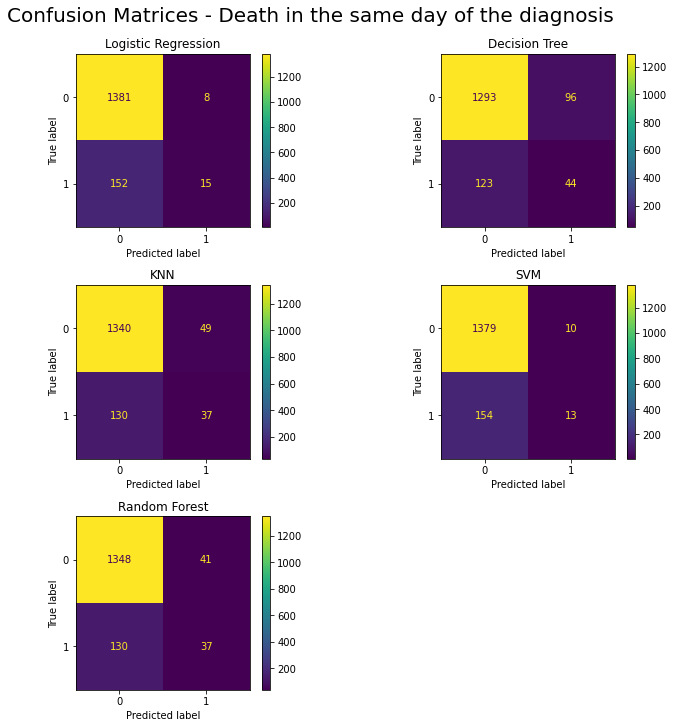

In [68]:
fig6, ax6 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig6.suptitle("Confusion Matrices - Death in the same day of the diagnosis", fontsize=20)

cm_logistic_regression_sc03_0d = confusion_matrix(y_data_03_0d, y_pred_log_reg_scenario03_0d)
ConfusionMatrixDisplay(cm_logistic_regression_sc03_0d).plot(ax=ax6[0, 0])
ax6[0, 0].set_title("Logistic Regression")
ax6[0, 0].grid(False)

cm_decision_tree_sc03_0d = confusion_matrix(y_data_03_0d, y_pred_decision_tree_scenario03_0d)
ConfusionMatrixDisplay(cm_decision_tree_sc03_0d).plot(ax=ax6[0, 1])
ax6[0, 1].set_title("Decision Tree")
ax6[0, 1].grid(False)

cm_knn_sc03_0d = confusion_matrix(y_data_03_0d, y_pred_knn_scenario03_0d)
ConfusionMatrixDisplay(cm_knn_sc03_0d).plot(ax=ax6[1, 0])
ax6[1, 0].set_title("KNN")
ax6[1, 0].grid(False)

cm_svm_sc03_0d = confusion_matrix(y_data_03_0d, y_pred_svm_scenario03_0d)
ConfusionMatrixDisplay(cm_svm_sc03_0d).plot(ax=ax6[1, 1])
ax6[1, 1].set_title("SVM")
ax6[1, 1].grid(False)

cm_random_forest_sc03_0d = confusion_matrix(y_data_03_0d, y_pred_random_forest_scenario03_0d)
ConfusionMatrixDisplay(cm_random_forest_sc03_0d).plot(ax=ax6[2, 0])
ax6[2, 0].set_title("Random Forest")
ax6[2, 0].grid(False)

ax6[2, 1].set_visible(False)

Para o intervalo de 0 a 30 dias, a matriz de confusão pode ser interpretada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente 1545 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 10 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 1544 casos e incorretamente 2 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 10 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1546 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 10 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1546 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 10 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 1545 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 10 casos.

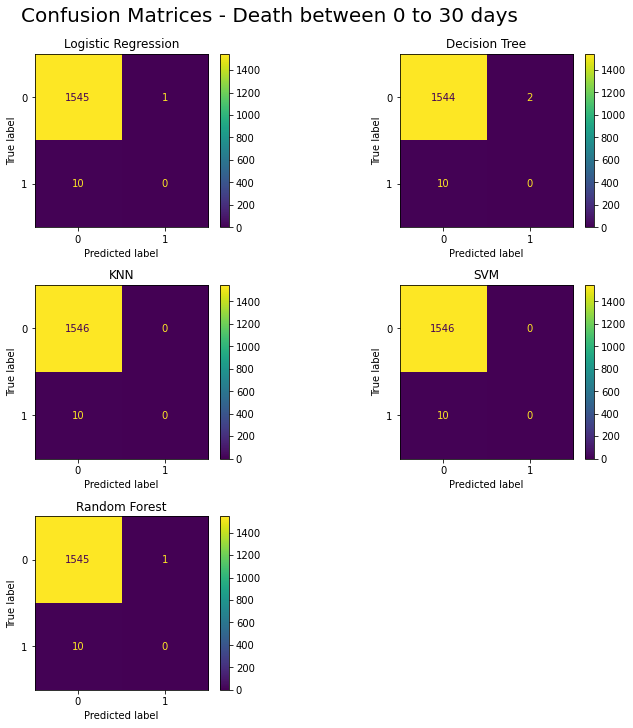

In [69]:
fig7, ax7 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig7.suptitle("Confusion Matrices - Death between 0 to 30 days", fontsize=20)

cm_logistic_regression_sc03_0d_30d = confusion_matrix(y_data_03_0d_30d, y_pred_log_reg_scenario03_0d_30d)
ConfusionMatrixDisplay(cm_logistic_regression_sc03_0d_30d).plot(ax=ax7[0, 0])
ax7[0, 0].set_title("Logistic Regression")
ax7[0, 0].grid(False)

cm_decision_tree_sc03_0d_30d = confusion_matrix(y_data_03_0d_30d, y_pred_decision_tree_scenario03_0d_30d)
ConfusionMatrixDisplay(cm_decision_tree_sc03_0d_30d).plot(ax=ax7[0, 1])
ax7[0, 1].set_title("Decision Tree")
ax7[0, 1].grid(False)

cm_knn_sc03_0d_30d = confusion_matrix(y_data_03_0d_30d, y_pred_knn_scenario03_0d_30d)
ConfusionMatrixDisplay(cm_knn_sc03_0d_30d).plot(ax=ax7[1, 0])
ax7[1, 0].set_title("KNN")
ax7[1, 0].grid(False)

cm_svm_sc03_0d_30d = confusion_matrix(y_data_03_0d_30d, y_pred_svm_scenario03_0d_30d)
ConfusionMatrixDisplay(cm_svm_sc03_0d_30d).plot(ax=ax7[1, 1])
ax7[1, 1].set_title("SVM")
ax7[1, 1].grid(False)

cm_random_forest_sc03_0d_30d = confusion_matrix(y_data_03_0d_30d, y_pred_random_forest_scenario03_0d_30d)
ConfusionMatrixDisplay(cm_random_forest_sc03_0d_30d).plot(ax=ax7[2, 0])
ax7[2, 0].set_title("Random Forest")
ax7[2, 0].grid(False)

ax7[2, 1].set_visible(False)

A matriz de confusão para o intervalo de 30 a 360 dias pode ser entendida da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1549 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 1546 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1549 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1549 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1549 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

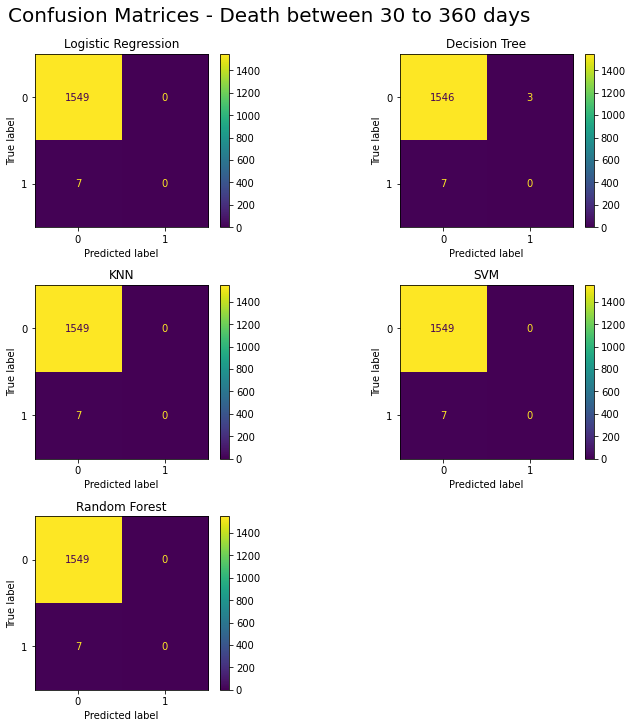

In [70]:
fig8, ax8 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig8.suptitle("Confusion Matrices - Death between 30 to 360 days", fontsize=20)

cm_logistic_regression_sc03_30d_360d = confusion_matrix(y_data_03_30d_360d, y_pred_log_reg_scenario03_30d_360d)
ConfusionMatrixDisplay(cm_logistic_regression_sc03_30d_360d).plot(ax=ax8[0, 0])
ax8[0, 0].set_title("Logistic Regression")
ax8[0, 0].grid(False)

cm_decision_tree_sc03_30d_360d = confusion_matrix(y_data_03_30d_360d, y_pred_decision_tree_scenario03_30d_360d)
ConfusionMatrixDisplay(cm_decision_tree_sc03_30d_360d).plot(ax=ax8[0, 1])
ax8[0, 1].set_title("Decision Tree")
ax8[0, 1].grid(False)

cm_knn_sc03_30d_360d = confusion_matrix(y_data_03_30d_360d, y_pred_knn_scenario03_30d_360d)
ConfusionMatrixDisplay(cm_knn_sc03_30d_360d).plot(ax=ax8[1, 0])
ax8[1, 0].set_title("KNN")
ax8[1, 0].grid(False)

cm_svm_sc03_30d_360d = confusion_matrix(y_data_03_30d_360d, y_pred_svm_scenario03_30d_360d)
ConfusionMatrixDisplay(cm_svm_sc03_30d_360d).plot(ax=ax8[1, 1])
ax8[1, 1].set_title("SVM")
ax8[1, 1].grid(False)

cm_random_forest_sc03_30d_360d = confusion_matrix(y_data_03_30d_360d, y_pred_random_forest_scenario03_30d_360d)
ConfusionMatrixDisplay(cm_random_forest_sc03_30d_360d).plot(ax=ax8[2, 0])
ax8[2, 0].set_title("Random Forest")
ax8[2, 0].grid(False)

ax8[2, 1].set_visible(False)

A matriz de confusão para o intervalo de 360 a 540 dias pode ser explicada da seguinte forma:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente 1547 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 8 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 1537 casos e incorretamente 11 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 8 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1548 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 8 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1548 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 8 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1548 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 8 casos.

In [71]:
fig9, ax9 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig9.suptitle("Confusion Matrices - Death between 360 to 540 days", fontsize=20)

cm_logistic_regression_sc03_360d_540d = confusion_matrix(y_data_03_360d_540d, y_pred_log_reg_scenario03_360d_540d)
ConfusionMatrixDisplay(cm_logistic_regression_sc03_360d_540d).plot(ax=ax9[0, 0])
ax9[0, 0].set_title("Logistic Regression")
ax9[0, 0].grid(False)

cm_decision_tree_sc03_360d_540d = confusion_matrix(y_data_03_360d_540d, y_pred_decision_tree_scenario03_360d_540d)
ConfusionMatrixDisplay(cm_decision_tree_sc03_360d_540d).plot(ax=ax9[0, 1])
ax9[0, 1].set_title("Decision Tree")
ax9[0, 1].grid(False)

cm_knn_sc03_360d_540d = confusion_matrix(y_data_03_360d_540d, y_pred_knn_scenario03_360d_540d)
ConfusionMatrixDisplay(cm_knn_sc03_360d_540d).plot(ax=ax9[1, 0])
ax9[1, 0].set_title("KNN")
ax9[1, 0].grid(False)

cm_svm_sc03_360d_540d = confusion_matrix(y_data_03_360d_540d, y_pred_svm_scenario03_360d_540d)
ConfusionMatrixDisplay(cm_svm_sc03_360d_540d).plot(ax=ax9[1, 1])
ax9[1, 1].set_title("SVM")
ax9[1, 1].grid(False)

cm_random_forest_sc03_360d_540d = confusion_matrix(y_data_03_360d_540d, y_pred_random_forest_scenario03_360d_540d)
ConfusionMatrixDisplay(cm_random_forest_sc03_360d_540d).plot(ax=ax9[2, 0])
ax9[2, 0].set_title("Random Forest")
ax9[2, 0].grid(False)

ax9[2, 1].set_visible(False)

A matriz de confusão para o intervalo de 540 a 1440 dias pode ser explicada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1537 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 1501 casos e incorretamente 36 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1537 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1537 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 1536 casos, e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

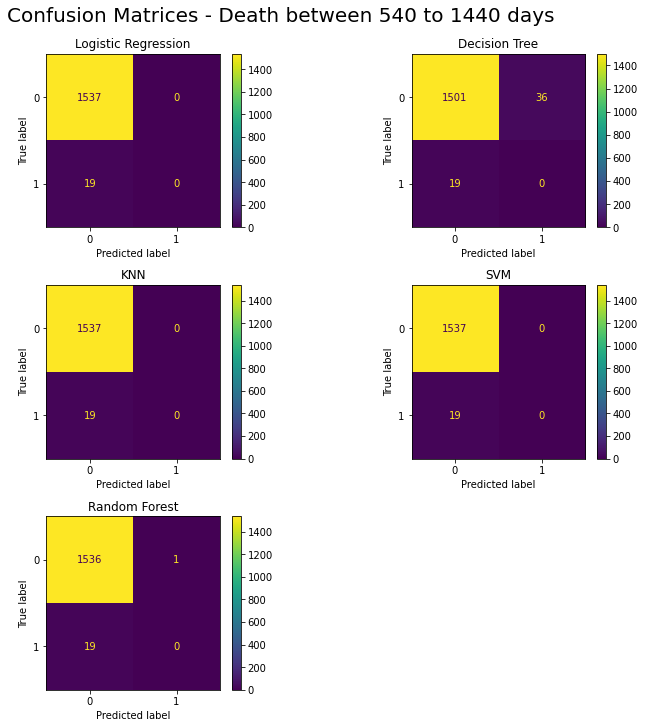

In [72]:
fig10, ax10 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig10.suptitle("Confusion Matrices - Death between 540 to 1440 days", fontsize=20)

cm_logistic_regression_sc03_540d_1440d = confusion_matrix(y_data_03_540d_1440d, y_pred_log_reg_scenario03_540d_1440d)
ConfusionMatrixDisplay(cm_logistic_regression_sc03_540d_1440d).plot(ax=ax10[0, 0])
ax10[0, 0].set_title("Logistic Regression")
ax10[0, 0].grid(False)

cm_decision_tree_sc03_540d_1440d = confusion_matrix(y_data_03_540d_1440d, y_pred_decision_tree_scenario03_540d_1440d)
ConfusionMatrixDisplay(cm_decision_tree_sc03_540d_1440d).plot(ax=ax10[0, 1])
ax10[0, 1].set_title("Decision Tree")
ax10[0, 1].grid(False)

cm_knn_sc03_540d_1440d = confusion_matrix(y_data_03_540d_1440d, y_pred_knn_scenario03_540d_1440d)
ConfusionMatrixDisplay(cm_knn_sc03_540d_1440d).plot(ax=ax10[1, 0])
ax10[1, 0].set_title("KNN")
ax10[1, 0].grid(False)

cm_svm_sc03_540d_1440d = confusion_matrix(y_data_03_540d_1440d, y_pred_svm_scenario03_540d_1440d)
ConfusionMatrixDisplay(cm_svm_sc03_540d_1440d).plot(ax=ax10[1, 1])
ax10[1, 1].set_title("SVM")
ax10[1, 1].grid(False)

cm_random_forest_sc03_540d_1440d = confusion_matrix(y_data_03_540d_1440d, y_pred_random_forest_scenario03_540d_1440d)
ConfusionMatrixDisplay(cm_random_forest_sc03_540d_1440d).plot(ax=ax10[2, 0])
ax10[2, 0].set_title("Random Forest")
ax10[2, 0].grid(False)

ax10[2, 1].set_visible(False)

Para o intervalo acima de 1440 dias, a matriz de confusão pode ser interpretada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1504 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 52 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 1474 casos e incorretamente 30 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 3 casos e incorretamente 49 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1504 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 52 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 1504 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 52 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 1503 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu corretamente 1 caso e incorretamente 51 casos.

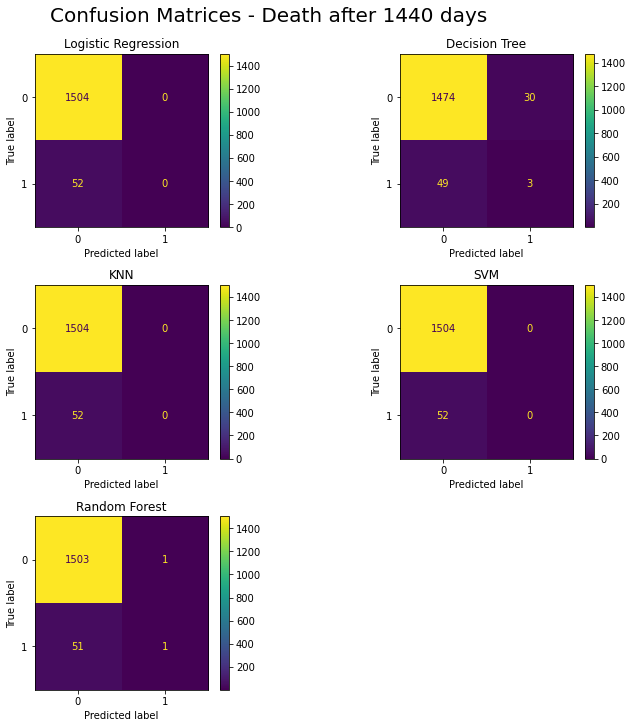

In [73]:
fig11, ax11 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig11.suptitle("Confusion Matrices - Death after 1440 days", fontsize=20)

cm_logistic_regression_sc03_after_1440d = confusion_matrix(y_data_03_after_1440d, y_pred_log_reg_scenario03_after_1440d)
ConfusionMatrixDisplay(cm_logistic_regression_sc03_after_1440d).plot(ax=ax11[0, 0])
ax11[0, 0].set_title("Logistic Regression")
ax11[0, 0].grid(False)

cm_decision_tree_sc03_after_1440d = confusion_matrix(y_data_03_after_1440d, y_pred_decision_tree_scenario03_after_1440d)
ConfusionMatrixDisplay(cm_decision_tree_sc03_after_1440d).plot(ax=ax11[0, 1])
ax11[0, 1].set_title("Decision Tree")
ax11[0, 1].grid(False)

cm_knn_sc03_after_1440d= confusion_matrix(y_data_03_after_1440d, y_pred_knn_scenario03_after_1440d)
ConfusionMatrixDisplay(cm_knn_sc03_after_1440d).plot(ax=ax11[1, 0])
ax11[1, 0].set_title("KNN")
ax11[1, 0].grid(False)

cm_svm_sc03_after_1440d = confusion_matrix(y_data_03_after_1440d, y_pred_svm_scenario03_after_1440d)
ConfusionMatrixDisplay(cm_svm_sc03_after_1440d).plot(ax=ax11[1, 1])
ax11[1, 1].set_title("SVM")
ax11[1, 1].grid(False)

cm_random_forest_sc03_after_1440d = confusion_matrix(y_data_03_after_1440d, y_pred_random_forest_scenario03_after_1440d)
ConfusionMatrixDisplay(cm_random_forest_sc03_after_1440d).plot(ax=ax11[2, 0])
ax11[2, 0].set_title("Random Forest")
ax11[2, 0].grid(False)

ax11[2, 1].set_visible(False)

##### Acurácia, Precisão, Revocação e F1-Score

---



Analisando os dados do `classification_report` para a faixa do mesmo dia do diagnóstico podemos concluir que:

* Os modelos tiveram acurácia acima de 86%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Considerando a precisão dos modelos no caso de morte, ou seja, quantas das predições positivas realmente eram positivas, todas obtiveram valores acima de 31%, sendo o melhor a Regressão Logística com 65%.
* Ao analisar a revocação para o caso de morte, vemos que os modelos não performaram bem, com o melhor resultado de 26% para a Árvore de Decisão;
* Avaliando o F1-score (média harmônica calculada com base na precisão e na revocação) para casos de morte, temos que o melhor modelo foi o *Random Forest*, obtendo 30%.


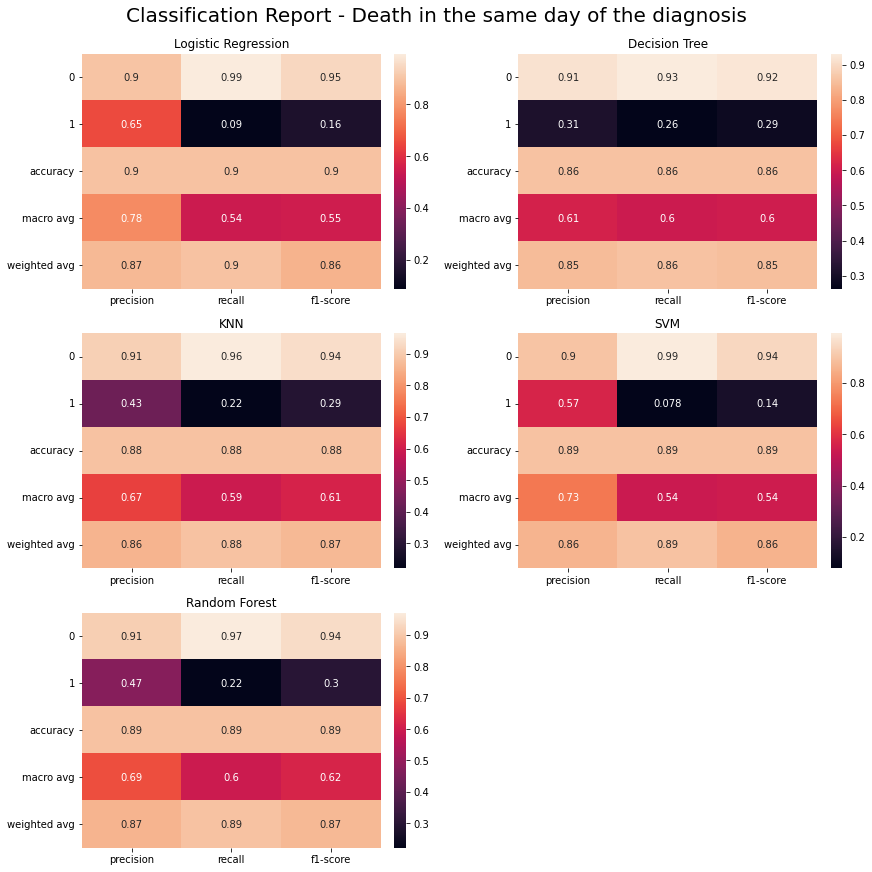

In [74]:
report_log_reg_sc03_0d = classification_report(y_data_03_0d, y_pred_log_reg_scenario03_0d, zero_division=1, output_dict=True)
report_dec_tree_sc03_0d = classification_report(y_data_03_0d, y_pred_decision_tree_scenario03_0d, zero_division=1, output_dict=True)
report_knn_sc03_0d = classification_report(y_data_03_0d, y_pred_knn_scenario03_0d, zero_division=1, output_dict=True)
report_svm_sc03_0d = classification_report(y_data_03_0d, y_pred_svm_scenario03_0d, zero_division=1, output_dict=True)
report_random_forest_sc03_0d = classification_report(y_data_03_0d, y_pred_random_forest_scenario03_0d, zero_division=1, output_dict=True)

fig0, ax0 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig0.suptitle("Classification Report - Death in the same day of the diagnosis", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_sc03_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 0])
ax0[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_sc03_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 1])
ax0[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_sc03_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 0])
ax0[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_sc03_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 1])
ax0[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_sc03_0d).iloc[:-1, :].T, annot=True, ax=ax0[2, 0])
ax0[2, 0].set_title("Random Forest")

ax0[2, 1].set_visible(False)

Analisando os dados do `classification_report` para a faixa de 0 a 30 dias podemos concluir que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

In [75]:
report_log_reg_sc03_0d_30d = classification_report(y_data_03_0d_30d, y_pred_log_reg_scenario03_0d_30d, zero_division=1, output_dict=True)
report_dec_tree_sc03_0d_30d = classification_report(y_data_03_0d_30d, y_pred_decision_tree_scenario03_0d_30d, zero_division=1, output_dict=True)
report_knn_sc03_0d_30d = classification_report(y_data_03_0d_30d, y_pred_knn_scenario03_0d_30d, zero_division=1, output_dict=True)
report_svm_sc03_0d_30d = classification_report(y_data_03_0d_30d, y_pred_svm_scenario03_0d_30d, zero_division=1, output_dict=True)
report_random_forest_sc03_0d_30d = classification_report(y_data_03_0d_30d, y_pred_random_forest_scenario03_0d_30d, zero_division=1, output_dict=True)

fig1, ax1 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig1.suptitle("Classification Report - Death between 0 to 30 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_sc03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 0])
ax1[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_sc03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 1])
ax1[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_sc03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 0])
ax1[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_sc03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 1])
ax1[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_sc03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[2, 0])
ax1[2, 0].set_title("Random Forest")

ax1[2, 1].set_visible(False)

Analisando os dados do `classification_report` para a faixa de 30 a 360 dias podemos concluir que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

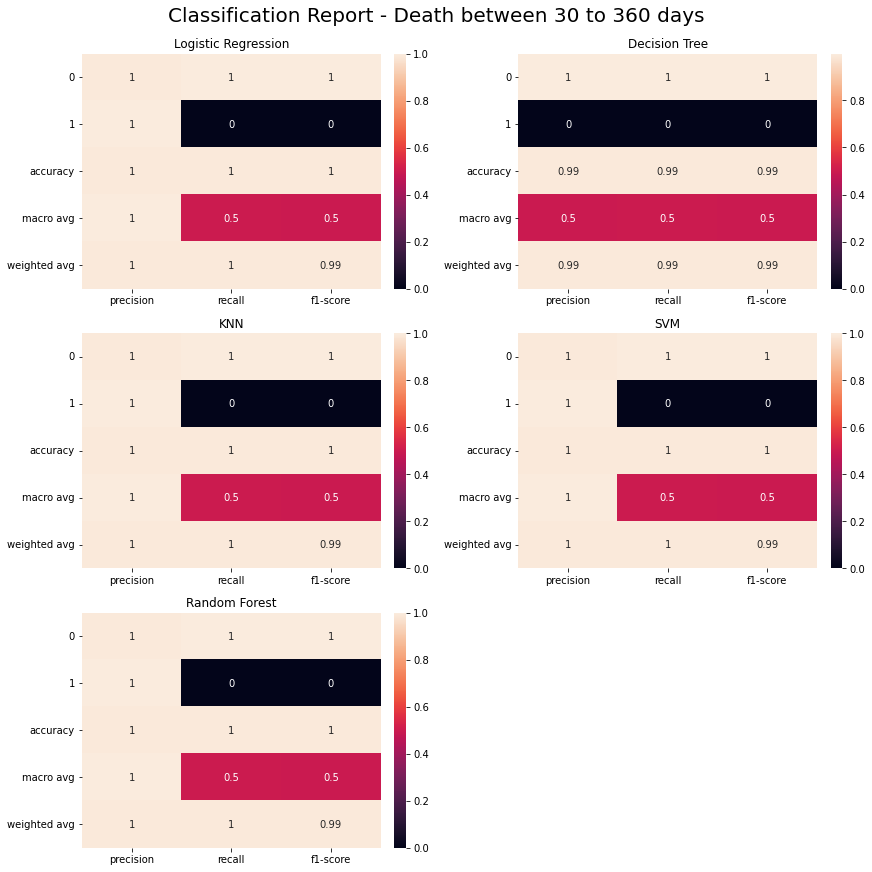

In [76]:
report_log_reg_sc03_30d_360d = classification_report(y_data_03_30d_360d, y_pred_log_reg_scenario03_30d_360d, zero_division=1, output_dict=True)
report_dec_tree_sc03_30d_360d = classification_report(y_data_03_30d_360d, y_pred_decision_tree_scenario03_30d_360d, zero_division=1, output_dict=True)
report_knn_sc03_30d_360d = classification_report(y_data_03_30d_360d, y_pred_knn_scenario03_30d_360d, zero_division=1, output_dict=True)
report_svm_sc03_30d_360d = classification_report(y_data_03_30d_360d, y_pred_svm_scenario03_30d_360d, zero_division=1, output_dict=True)
report_random_forest_sc03_30d_360d = classification_report(y_data_03_30d_360d, y_pred_random_forest_scenario03_30d_360d, zero_division=1, output_dict=True)

fig2, ax2 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig2.suptitle("Classification Report - Death between 30 to 360 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_sc03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 0])
ax2[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_sc03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 1])
ax2[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_sc03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 0])
ax2[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_sc03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 1])
ax2[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_sc03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[2, 0])
ax2[2, 0].set_title("Random Forest")

ax2[2, 1].set_visible(False)

Analisando os dados do `classification_report` para a faixa de 360 a 540 dias podemos concluir que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

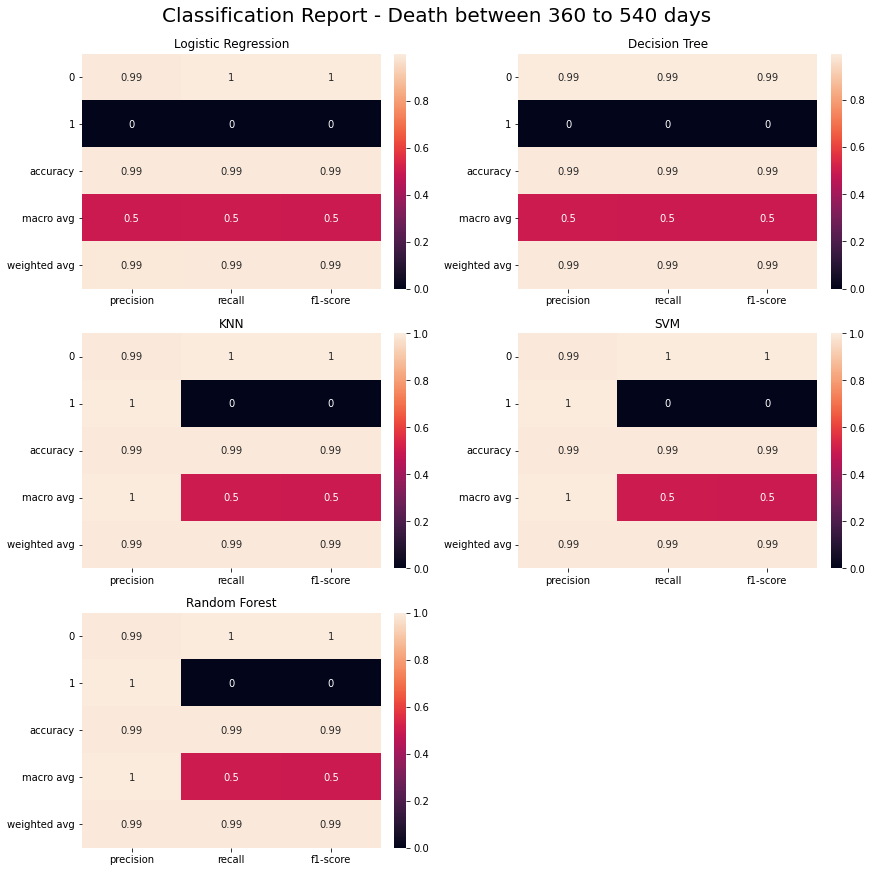

In [77]:
report_log_reg_sc03_360d_540d = classification_report(y_data_03_360d_540d, y_pred_log_reg_scenario03_360d_540d, zero_division=1, output_dict=True)
report_dec_tree_sc03_360d_540d = classification_report(y_data_03_360d_540d, y_pred_decision_tree_scenario03_360d_540d, zero_division=1, output_dict=True)
report_knn_sc03_360d_540d = classification_report(y_data_03_360d_540d, y_pred_knn_scenario03_360d_540d, zero_division=1, output_dict=True)
report_svm_sc03_360d_540d = classification_report(y_data_03_360d_540d, y_pred_svm_scenario03_360d_540d, zero_division=1, output_dict=True)
report_random_forest_sc03_360d_540d = classification_report(y_data_03_360d_540d, y_pred_random_forest_scenario03_360d_540d, zero_division=1, output_dict=True)

fig3, ax3 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig3.suptitle("Classification Report - Death between 360 to 540 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_sc03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 0])
ax3[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_sc03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 1])
ax3[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_sc03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 0])
ax3[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_sc03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 1])
ax3[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_sc03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[2, 0])
ax3[2, 0].set_title("Random Forest")

ax3[2, 1].set_visible(False)

Analisando os dados do `classification_report` para a faixa de 540 a 1440 dias podemos concluir que:

* Os modelos tiveram acurácia acima de 97%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

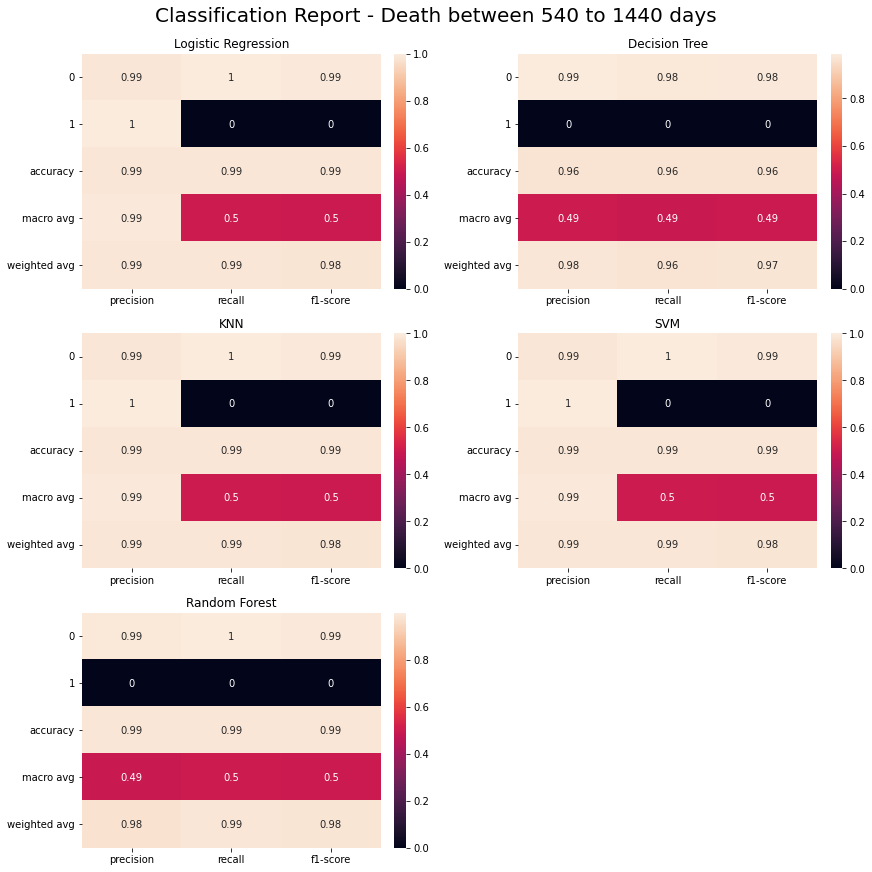

In [78]:
report_log_reg_sc03_540d_1440d = classification_report(y_data_03_540d_1440d, y_pred_log_reg_scenario03_540d_1440d, zero_division=1, output_dict=True)
report_dec_tree_sc03_540d_1440d = classification_report(y_data_03_540d_1440d, y_pred_decision_tree_scenario03_540d_1440d, zero_division=1, output_dict=True)
report_knn_sc03_540d_1440d = classification_report(y_data_03_540d_1440d, y_pred_knn_scenario03_540d_1440d, zero_division=1, output_dict=True)
report_svm_sc03_540d_1440d = classification_report(y_data_03_540d_1440d, y_pred_svm_scenario03_540d_1440d, zero_division=1, output_dict=True)
report_random_forest_sc03_540d_1440d = classification_report(y_data_03_540d_1440d, y_pred_random_forest_scenario03_540d_1440d, zero_division=1, output_dict=True)

fig4, ax4 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig4.suptitle("Classification Report - Death between 540 to 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_sc03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 0])
ax4[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_sc03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 1])
ax4[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_sc03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 0])
ax4[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_sc03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 1])
ax4[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_sc03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[2, 0])
ax4[2, 0].set_title("Random Forest")

ax4[2, 1].set_visible(False)

Analisando os dados do `classification_report` para a faixa acima de 1440 dias podemos concluir que:

* Os modelos tiveram acurácia acima de 95%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Apenas dois modelos conseguiram prever os casos de morte: Árvore de Decisão e Random Forest. Porém, nenhum deles teve um bom resultado, sendo a Árvore de Decisão com o melhor resultado (5,8% de revocação).

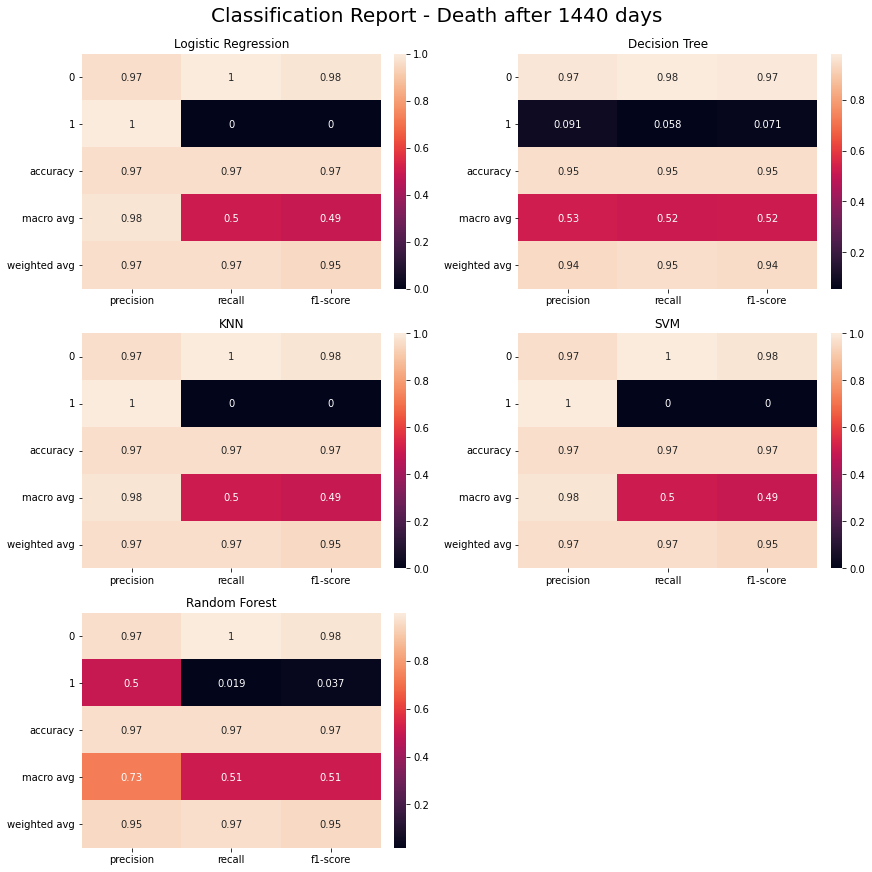

In [79]:
report_log_reg_sc03_after_1440d = classification_report(y_data_03_after_1440d, y_pred_log_reg_scenario03_after_1440d, zero_division=1, output_dict=True)
report_dec_tree_sc03_after_1440d = classification_report(y_data_03_after_1440d, y_pred_decision_tree_scenario03_after_1440d, zero_division=1, output_dict=True)
report_knn_sc03_after_1440d = classification_report(y_data_03_after_1440d, y_pred_knn_scenario03_after_1440d, zero_division=1, output_dict=True)
report_svm_sc03_after_1440d = classification_report(y_data_03_after_1440d, y_pred_svm_scenario03_after_1440d, zero_division=1, output_dict=True)
report_random_forest_sc03_after_1440d = classification_report(y_data_03_after_1440d, y_pred_random_forest_scenario03_after_1440d, zero_division=1, output_dict=True)

fig5, ax5 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig5.suptitle("Classification Report - Death after 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_sc03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 0])
ax5[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_sc03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 1])
ax5[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_sc03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 0])
ax5[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_sc03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 1])
ax5[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_sc03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[2, 0])
ax5[2, 0].set_title("Random Forest")

ax5[2, 1].set_visible(False)

##### Curva ROC e AUCROC

---



A fim de mensurar a área sob a curva ROC, fazemos a comparação dos modelos para cada faixa de tempo determinada.

In [80]:
lr_prob_0d = logistic_regression_0d.predict_proba(x_data_03)
lr_prob_0d = lr_prob_0d[:, 1]
dt_prob_0d = decision_tree_0d.predict_proba(x_data_03)
dt_prob_0d = dt_prob_0d[:, 1]
knn_prob_0d = knn_prognosis_0d.predict_proba(x_data_03)
knn_prob_0d = knn_prob_0d[:, 1]
svm_prob_0d = svm_prognosis_0d.predict_proba(x_data_03)
svm_prob_0d = svm_prob_0d[:, 1]
rf_prob_0d = random_forest_prognosis_0d.predict_proba(x_data_03)
rf_prob_0d = rf_prob_0d[:, 1]

lr_prob_0d_30d = logistic_regression_0d_30d.predict_proba(x_data_03)
lr_prob_0d_30d = lr_prob_0d_30d[:, 1]
dt_prob_0d_30d = decision_tree_0d_30d.predict_proba(x_data_03)
dt_prob_0d_30d = dt_prob_0d_30d[:, 1]
knn_prob_0d_30d = knn_prognosis_0d_30d.predict_proba(x_data_03)
knn_prob_0d_30d = knn_prob_0d_30d[:, 1]
svm_prob_0d_30d = svm_prognosis_0d_30d.predict_proba(x_data_03)
svm_prob_0d_30d = svm_prob_0d_30d[:, 1]
rf_prob_0d_30d = random_forest_prognosis_0d_30d.predict_proba(x_data_03)
rf_prob_0d_30d = rf_prob_0d_30d[:, 1]

lr_prob_30d_360d = logistic_regression_30d_360d.predict_proba(x_data_03)
lr_prob_30d_360d = lr_prob_30d_360d[:, 1]
dt_prob_30d_360d = decision_tree_30d_360d.predict_proba(x_data_03)
dt_prob_30d_360d = dt_prob_30d_360d[:, 1]
knn_prob_30d_360d = knn_prognosis_30d_360d.predict_proba(x_data_03)
knn_prob_30d_360d = knn_prob_30d_360d[:, 1]
svm_prob_30d_360d = svm_prognosis_30d_360d.predict_proba(x_data_03)
svm_prob_30d_360d = svm_prob_30d_360d[:, 1]
rf_prob_30d_360d = random_forest_prognosis_30d_360d.predict_proba(x_data_03)
rf_prob_30d_360d = rf_prob_30d_360d[:, 1]

lr_prob_360d_540d = logistic_regression_360d_540d.predict_proba(x_data_03)
lr_prob_360d_540d = lr_prob_360d_540d[:, 1]
dt_prob_360d_540d = decision_tree_360d_540d.predict_proba(x_data_03)
dt_prob_360d_540d = dt_prob_360d_540d[:, 1]
knn_prob_360d_540d = knn_prognosis_360d_540d.predict_proba(x_data_03)
knn_prob_360d_540d = knn_prob_360d_540d[:, 1]
svm_prob_360d_540d = svm_prognosis_360d_540d.predict_proba(x_data_03)
svm_prob_360d_540d = svm_prob_360d_540d[:, 1]
rf_prob_360d_540d = random_forest_prognosis_360d_540d.predict_proba(x_data_03)
rf_prob_360d_540d = rf_prob_360d_540d[:, 1]

lr_prob_540d_1440d = logistic_regression_540d_1440d.predict_proba(x_data_03)
lr_prob_540d_1440d = lr_prob_540d_1440d[:, 1]
dt_prob_540d_1440d = decision_tree_540d_1440d.predict_proba(x_data_03)
dt_prob_540d_1440d = dt_prob_540d_1440d[:, 1]
knn_prob_540d_1440d = knn_prognosis_540d_1440d.predict_proba(x_data_03)
knn_prob_540d_1440d = knn_prob_540d_1440d[:, 1]
svm_prob_540d_1440d = svm_prognosis_540d_1440d.predict_proba(x_data_03)
svm_prob_540d_1440d = svm_prob_540d_1440d[:, 1]
rf_prob_540d_1440d = random_forest_prognosis_540d_1440d.predict_proba(x_data_03)
rf_prob_540d_1440d = rf_prob_540d_1440d[:, 1]

lr_prob_after_1440d = logistic_regression_after_1440d.predict_proba(x_data_03)
lr_prob_after_1440d = lr_prob_after_1440d[:, 1]
dt_prob_after_1440d = decision_tree_after_1440d.predict_proba(x_data_03)
dt_prob_after_1440d = dt_prob_after_1440d[:, 1]
knn_prob_after_1440d = knn_prognosis_after_1440d.predict_proba(x_data_03)
knn_prob_after_1440d = knn_prob_after_1440d[:, 1]
svm_prob_after_1440d = svm_prognosis_after_1440d.predict_proba(x_data_03)
svm_prob_after_1440d = svm_prob_after_1440d[:, 1]
rf_prob_after_1440d = random_forest_prognosis_after_1440d.predict_proba(x_data_03)
rf_prob_after_1440d = rf_prob_after_1440d[:, 1]

Nesse segundo caso, todas os conjuntos de todos os intervalos de tempo possuem as duas classes, permitindo a criação das curvas ROC para todos os modelos.

In [81]:
try:
  lr_0d = roc_auc_score(y_data_03_0d, lr_prob_0d)
except ValueError as err:
  print("Error for Logistic Regression, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  dt_0d = roc_auc_score(y_data_03_0d, dt_prob_0d)
except ValueError as err:
  print("Error for Decision Tree, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  knn_0d = roc_auc_score(y_data_03_0d, knn_prob_0d)
except ValueError as err:
  print("Error for KNN, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  svm_0d = roc_auc_score(y_data_03_0d, svm_prob_0d)
except ValueError as err:
  print("Error for SVM, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  rf_0d = roc_auc_score(y_data_03_0d, rf_prob_0d)
except ValueError as err:
  print("Error for Random Forest, with death in the same day of the diagnosis: " + str(err))
  pass

try:
  lr_0d_30d = roc_auc_score(y_data_03_0d_30d, lr_prob_0d_30d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 0 to 30 days: " + str(err))
  pass
try:
  dt_0d_30d = roc_auc_score(y_data_03_0d_30d, dt_prob_0d_30d)
except ValueError as err:
  print("Error for Decision Tree, with death between 0 to 30 days: " + str(err))
  pass
try:
  knn_0d_30d = roc_auc_score(y_data_03_0d_30d, knn_prob_0d_30d)
except ValueError as err:
  print("Error for KNN, with death between 0 to 30 days: " + str(err))
  pass
try:
  svm_0d_30d = roc_auc_score(y_data_03_0d_30d, svm_prob_0d_30d)
except ValueError as err:
  print("Error for SVM, with death between 0 to 30 days: " + str(err))
  pass
try:
  rf_0d_30d = roc_auc_score(y_data_03_0d_30d, rf_prob_0d_30d)
except ValueError as err:
  print("Error for Random Forest, with death between 0 to 30 days: " + str(err))
  pass

try:
  lr_30d_360d = roc_auc_score(y_data_03_30d_360d, lr_prob_30d_360d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 30 to 360 days: " + str(err))
  pass
try:
  dt_30d_360d = roc_auc_score(y_data_03_30d_360d, dt_prob_30d_360d)
except ValueError as err:
  print("Error for Decision Tree, with death between 30 to 360 days: " + str(err))
  pass
try:
  knn_30d_360d = roc_auc_score(y_data_03_30d_360d, knn_prob_30d_360d)
except ValueError as err:
  print("Error for KNN, with death between 30 to 360 days: " + str(err))
  pass
try:
  svm_30d_360d = roc_auc_score(y_data_03_30d_360d, svm_prob_30d_360d)
except ValueError as err:
  print("Error for SVM, with death between 30 to 360 days: " + str(err))
  pass
try:
  rf_30d_360d = roc_auc_score(y_data_03_30d_360d, rf_prob_30d_360d)
except ValueError as err:
  print("Error for Random Forest, with death between 30 to 360 days: " + str(err))
  pass

try:
  lr_360d_540d = roc_auc_score(y_data_03_360d_540d, lr_prob_360d_540d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 360 to 540 days: " + str(err))
  pass
try:
  dt_360d_540d = roc_auc_score(y_data_03_360d_540d, dt_prob_360d_540d)
except ValueError as err:
  print("Error for Decision Tree, with death between 360 to 540 days: " + str(err))
  pass
try:
  knn_360d_540d = roc_auc_score(y_data_03_360d_540d, knn_prob_360d_540d)
except ValueError as err:
  print("Error for KNN, with death between 360 to 540 days: " + str(err))
  pass
try:
  svm_360d_540d = roc_auc_score(y_data_03_360d_540d, svm_prob_360d_540d)
except ValueError as err:
  print("Error for SVM, with death between 360 to 540 days: " + str(err))
  pass
try:
  rf_360d_540d = roc_auc_score(y_data_03_360d_540d, rf_prob_360d_540d)
except ValueError as err:
  print("Error for Random Forest, with death between 360 to 540 days: " + str(err))
  pass

try:
  lr_540d_1440d = roc_auc_score(y_data_03_540d_1440d, lr_prob_540d_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 540 to 1440 days: " + str(err))
  pass
try:
  dt_540d_1440d = roc_auc_score(y_data_03_540d_1440d, dt_prob_540d_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death between 540 to 1440 days: " + str(err))
  pass
try:
  knn_540d_1440d = roc_auc_score(y_data_03_540d_1440d, knn_prob_540d_1440d)
except ValueError as err:
  print("Error for KNN, with death between 540 to 1440 days: " + str(err))
  pass
try:
  svm_540d_1440d = roc_auc_score(y_data_03_540d_1440d, svm_prob_540d_1440d)
except ValueError as err:
  print("Error for SVM, with death between 540 to 1440 days: " + str(err))
  pass
try:
  rf_540d_1440d = roc_auc_score(y_data_03_540d_1440d, rf_prob_540d_1440d)
except ValueError as err:
  print("Error for Random Forest, with death between 540 to 1440 days: " + str(err))
  pass

try:
  lr_after_1440d = roc_auc_score(y_data_03_after_1440d, lr_prob_after_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death after 1440 days: " + str(err))
  pass
try:
  dt_after_1440d = roc_auc_score(y_data_03_after_1440d, dt_prob_after_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death after 1440 days: " + str(err))
  pass
try:
  knn_after_1440d = roc_auc_score(y_data_03_after_1440d, knn_prob_after_1440d)
except ValueError as err:
  print("Error for KNN, with death after 1440 days: " + str(err))
  pass
try:
  svm_after_1440d = roc_auc_score(y_data_03_after_1440d, svm_prob_after_1440d)
except ValueError as err:
  print("Error for SVM, with death after 1440 days: " + str(err))
  pass
try:
  rf_after_1440d = roc_auc_score(y_data_03_after_1440d, rf_prob_after_1440d)
except ValueError as err:
  print("Error for Random Forest, with death after 1440 days: " + str(err))
  pass

In [82]:
lr_fpr_0d, lr_tpr_0d, _ = roc_curve(y_data_03_0d, lr_prob_0d)
dt_fpr_0d, dt_tpr_0d, _ = roc_curve(y_data_03_0d, dt_prob_0d)
knn_fpr_0d, knn_tpr_0d, _ = roc_curve(y_data_03_0d, knn_prob_0d)
svm_fpr_0d, svm_tpr_0d, _ = roc_curve(y_data_03_0d, svm_prob_0d)
rf_fpr_0d, rf_tpr_0d, _ = roc_curve(y_data_03_0d, rf_prob_0d)

lr_fpr_0d_30d, lr_tpr_0d_30d, _ = roc_curve(y_data_03_0d_30d, lr_prob_0d_30d)
dt_fpr_0d_30d, dt_tpr_0d_30d, _ = roc_curve(y_data_03_0d_30d, dt_prob_0d_30d)
knn_fpr_0d_30d, knn_tpr_0d_30d, _ = roc_curve(y_data_03_0d_30d, knn_prob_0d_30d)
svm_fpr_0d_30d, svm_tpr_0d_30d, _ = roc_curve(y_data_03_0d_30d, svm_prob_0d_30d)
rf_fpr_0d_30d, rf_tpr_0d_30d, _ = roc_curve(y_data_03_0d_30d, rf_prob_0d_30d)

lr_fpr_30d_360d, lr_tpr_30d_360d, _ = roc_curve(y_data_03_30d_360d, lr_prob_30d_360d)
dt_fpr_30d_360d, dt_tpr_30d_360d, _ = roc_curve(y_data_03_30d_360d, dt_prob_30d_360d)
knn_fpr_30d_360d, knn_tpr_30d_360d, _ = roc_curve(y_data_03_30d_360d, knn_prob_30d_360d)
svm_fpr_30d_360d, svm_tpr_30d_360d, _ = roc_curve(y_data_03_30d_360d, svm_prob_30d_360d)
rf_fpr_30d_360d, rf_tpr_30d_360d, _ = roc_curve(y_data_03_30d_360d, rf_prob_30d_360d)

lr_fpr_360d_540d, lr_tpr_360d_540d, _ = roc_curve(y_data_03_360d_540d, lr_prob_360d_540d)
dt_fpr_360d_540d, dt_tpr_360d_540d, _ = roc_curve(y_data_03_360d_540d, dt_prob_360d_540d)
knn_fpr_360d_540d, knn_tpr_360d_540d, _ = roc_curve(y_data_03_360d_540d, knn_prob_360d_540d)
svm_fpr_360d_540d, svm_tpr_360d_540d, _ = roc_curve(y_data_03_360d_540d, svm_prob_360d_540d)
rf_fpr_360d_540d, rf_tpr_360d_540d, _ = roc_curve(y_data_03_360d_540d, rf_prob_360d_540d)

lr_fpr_540d_1440d, lr_tpr_540d_1440d, _ = roc_curve(y_data_03_540d_1440d, lr_prob_540d_1440d)
dt_fpr_540d_1440d, dt_tpr_540d_1440d, _ = roc_curve(y_data_03_540d_1440d, dt_prob_540d_1440d)
knn_fpr_540d_1440d, knn_tpr_540d_1440d, _ = roc_curve(y_data_03_540d_1440d, knn_prob_540d_1440d)
svm_fpr_540d_1440d, svm_tpr_540d_1440d, _ = roc_curve(y_data_03_540d_1440d, svm_prob_540d_1440d)
rf_fpr_540d_1440d, rf_tpr_540d_1440d, _ = roc_curve(y_data_03_540d_1440d, rf_prob_540d_1440d)

lr_fpr_after_1440d, lr_tpr_after_1440d, _ = roc_curve(y_data_03_after_1440d, lr_prob_after_1440d)
dt_fpr_after_1440d, dt_tpr_after_1440d, _ = roc_curve(y_data_03_after_1440d, dt_prob_after_1440d)
knn_fpr_after_1440d, knn_tpr_after_1440d, _ = roc_curve(y_data_03_after_1440d, knn_prob_after_1440d)
svm_fpr_after_1440d, svm_tpr_after_1440d, _ = roc_curve(y_data_03_after_1440d, svm_prob_after_1440d)
rf_fpr_after_1440d, rf_tpr_after_1440d, _ = roc_curve(y_data_03_after_1440d, rf_prob_after_1440d)

Analisando a AUROC (área sob a curva) para os intervalos, verificamos que:

* Para a faixa de tempo de mesmo dia do diagnóstico os melhores resultados foram obtidos pela Regressão Logística e pela SVM, ambas com 74% de AUROC;
* Para o intervalo de 0 a 30 dias o melhor resultado foi da Regressão Logística, com 65% de AUROC;
* Na faixa de 30 a 360 dias o melhor resultado foi da SVM, com 71% de AUROC;
* No intervalo de 360 a 540 dias o Random Forest teve o melhor resultado, com 68% de AUROC; 
* Para o intervalo de 540 a 1440 dias a SVM teve a maior AUROC, com 63%.
* No intervalo após 1440 dias o Random Forest teve o melhor resultado, com 62%.


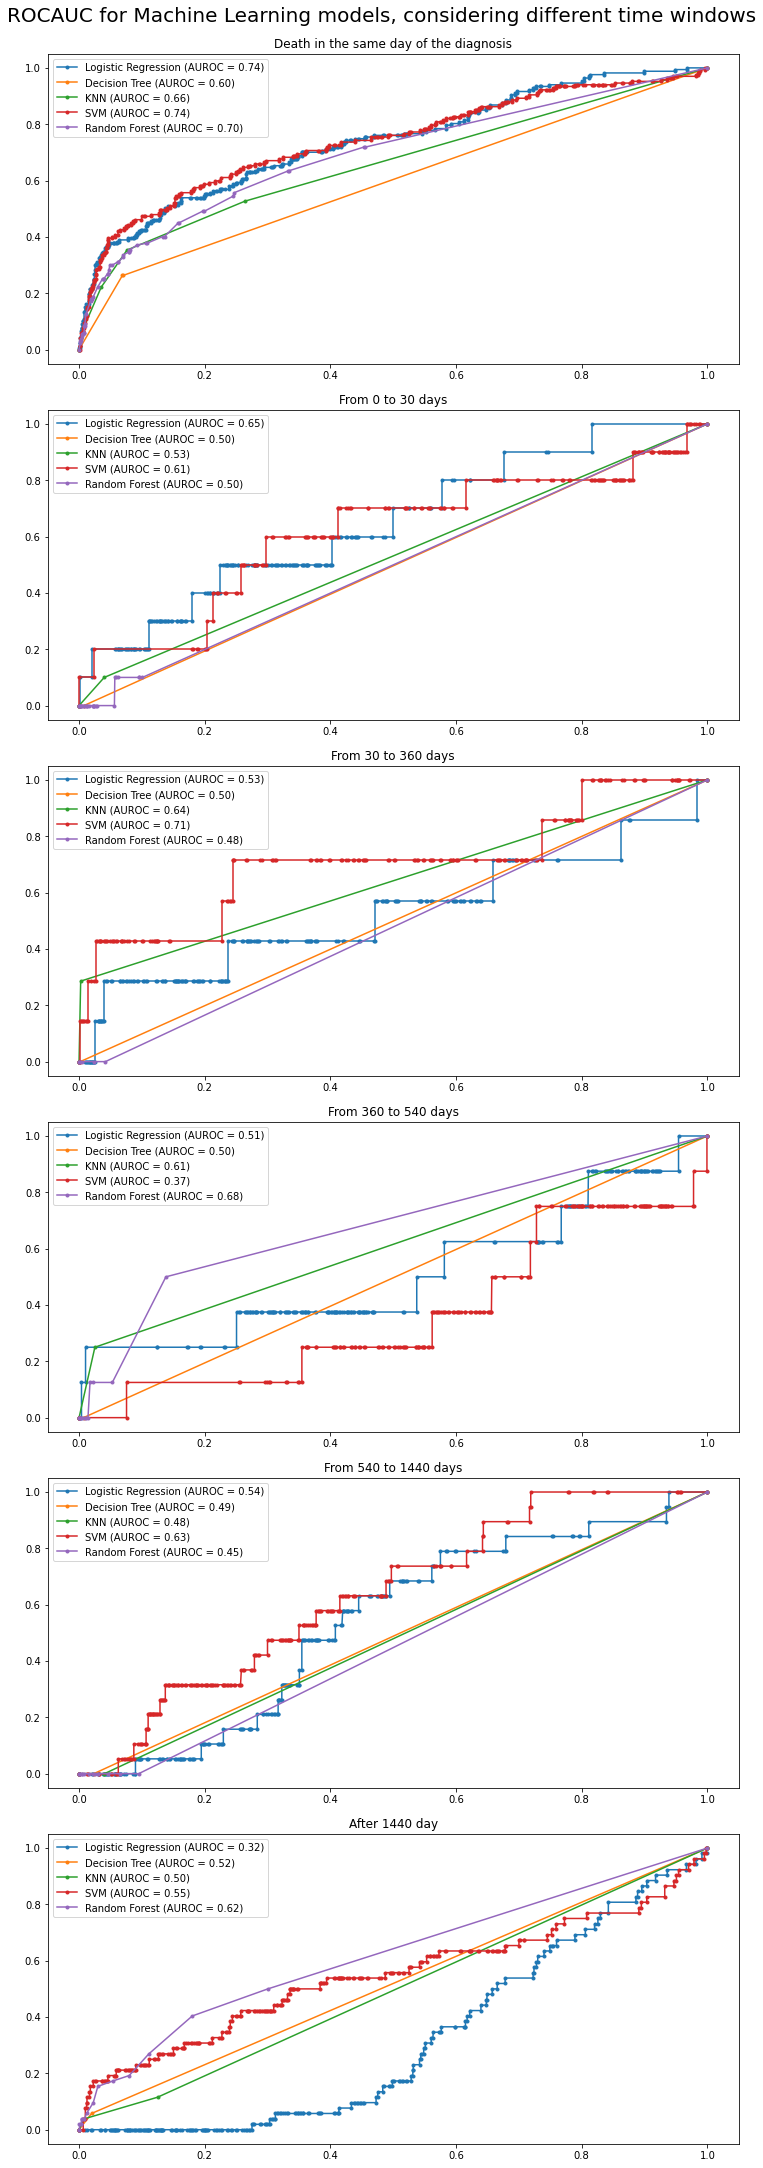

In [83]:
fig6, ax6 = plt.subplots(6, figsize=(10, 30), constrained_layout=True)
fig6.suptitle("ROCAUC for Machine Learning models, considering different time windows", fontsize=20)

ax6[0].plot(lr_fpr_0d, lr_tpr_0d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[0].plot(dt_fpr_0d, dt_tpr_0d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[0].plot(knn_fpr_0d, knn_tpr_0d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[0].plot(svm_fpr_0d, svm_tpr_0d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[0].plot(rf_fpr_0d, rf_tpr_0d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[0].legend()
ax6[0].set_title("Death in the same day of the diagnosis")

ax6[1].plot(lr_fpr_0d_30d, lr_tpr_0d_30d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d_30d)
ax6[1].plot(dt_fpr_0d_30d, dt_tpr_0d_30d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d_30d)
ax6[1].plot(knn_fpr_0d_30d, knn_tpr_0d_30d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d_30d)
ax6[1].plot(svm_fpr_0d_30d, svm_tpr_0d_30d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d_30d)
ax6[1].plot(rf_fpr_0d_30d, rf_tpr_0d_30d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d_30d)
ax6[1].legend()
ax6[1].set_title("From 0 to 30 days")

ax6[2].plot(lr_fpr_30d_360d, lr_tpr_30d_360d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_30d_360d)
ax6[2].plot(dt_fpr_30d_360d, dt_tpr_30d_360d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_30d_360d)
ax6[2].plot(knn_fpr_30d_360d, knn_tpr_30d_360d, marker=".", label="KNN (AUROC = %0.2f)" % knn_30d_360d)
ax6[2].plot(svm_fpr_30d_360d, svm_tpr_30d_360d, marker=".", label="SVM (AUROC = %0.2f)" % svm_30d_360d)
ax6[2].plot(rf_fpr_30d_360d, rf_tpr_30d_360d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_30d_360d)
ax6[2].legend()
ax6[2].set_title("From 30 to 360 days")

ax6[3].plot(lr_fpr_360d_540d, lr_tpr_360d_540d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_360d_540d)
ax6[3].plot(dt_fpr_360d_540d, dt_tpr_360d_540d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_360d_540d)
ax6[3].plot(knn_fpr_360d_540d, knn_tpr_360d_540d, marker=".", label="KNN (AUROC = %0.2f)" % knn_360d_540d)
ax6[3].plot(svm_fpr_360d_540d, svm_tpr_360d_540d, marker=".", label="SVM (AUROC = %0.2f)" % svm_360d_540d)
ax6[3].plot(rf_fpr_360d_540d, rf_tpr_360d_540d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_360d_540d)
ax6[3].legend()
ax6[3].set_title("From 360 to 540 days")

ax6[4].plot(lr_fpr_540d_1440d, lr_tpr_540d_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_540d_1440d)
ax6[4].plot(dt_fpr_540d_1440d, dt_tpr_540d_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_540d_1440d)
ax6[4].plot(knn_fpr_540d_1440d, knn_tpr_540d_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_540d_1440d)
ax6[4].plot(svm_fpr_540d_1440d, svm_tpr_540d_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_540d_1440d)
ax6[4].plot(rf_fpr_540d_1440d, rf_tpr_540d_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_540d_1440d)
ax6[4].legend()
ax6[4].set_title("From 540 to 1440 days")

ax6[5].plot(lr_fpr_after_1440d, lr_tpr_after_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_after_1440d)
ax6[5].plot(dt_fpr_after_1440d, dt_tpr_after_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_after_1440d)
ax6[5].plot(knn_fpr_after_1440d, knn_tpr_after_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_after_1440d)
ax6[5].plot(svm_fpr_after_1440d, svm_tpr_after_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_after_1440d)
ax6[5].plot(rf_fpr_after_1440d, rf_tpr_after_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_after_1440d)
ax6[5].legend()
ax6[5].set_title("After 1440 day");

### 3º caso: treino e teste com o cenário 3

---



#### Separando os dataset em conjunto de treinamento e teste

---



Assim como o 1º caso, as features do cenário 3 foram separadas em variáveis de entrada (``x_data_03``) e variáveis de saída (``y_data_03``) e, em seguida, foi destinado 70% do dataset para treino (``x_train`` e ``y_train``) e 30% para teste (``x_test`` e ``y_test``).


Novamente, foi utilizada a função ``train_test_split``, da biblioteca scikit-learn. A fim de obtermos resultados reprodutíveis, o valor do parâmetro ``random_state`` será fixado.

In [84]:
x_data_scenario03 = patients_leukemia_final_dataset_03.iloc[:,1:-time_window_qty]
y_data_scenario03 = patients_leukemia_final_dataset_03.iloc[:,-time_window_qty:]
X_train_03, X_test_03, y_train_03, y_test_03 = train_test_split(x_data_scenario03, y_data_scenario03, test_size=0.3, random_state=0)

In [85]:
display(X_train_03)
display(y_train_03)

GENDER  RACE  AGE  PROCEDURES_QTY  ICU_QTY  COND_QTY
8          0     0    4               9        0        12
829        1     0    7              14        0        10
1423       1     0    5               8        0         8
443        0     0    9               9        0         7
549        0     0   20             545        0        12
...      ...   ...  ...             ...      ...       ...
763        1     0    8              14        0         5
835        1     0   18              40        0        14
1216       0     0   13              16        0        13
559        0     0    7              12        0         8
684        1     0    2               7        0         2

[1089 rows x 6 columns]

DEATH_0D  DEATH_0D_30D  DEATH_30D_360D  DEATH_360D_540D  \
8            0             0               0                0   
829          0             0               0                0   
1423         0             0               0                0   
443          0             0               0                0   
549          0             0               0                0   
...        ...           ...             ...              ...   
763          0             0               0                0   
835          0             0               0                0   
1216         0             0               0                0   
559          0             0               0                0   
684          1             0               0                0   

      DEATH_540D_1440D  DEATH_AFTER_1440D  
8                    0                  0  
829                  0                  0  
1423                 1                  0  
443                  0                  0  
549                  0                  0  
...                ...                ...  
763                  0                  0  
835                  0                  0  
1216                 0                  0  
559                  0                  0  
684                  0                  0  

[1089 rows x 6 columns]

Usaremos ``StandardScaler`` para padronizar as features para uma unidade de variância (var = 1), visto que as variáveis de entrada do cenário 3 também estão em escalas diferentes.

In [86]:
scaler_03 = StandardScaler()
scaler_03.fit(X_train_03)
x_train_03 = scaler_03.transform(X_train_03)
x_test_03 = scaler_03.transform(X_test_03)

Como os modelos serão testados e treinados em diferentes janelas de tempo, é necessário selecionar a feature correspondente a esta janela nas variáveis de saída ``y_data_03``, dataset de treino ``y_train_03`` e de teste ``y_test_03``.


In [87]:
y_data03_0d = y_data_03.DEATH_0D
y_data03_0d_30d = y_data_03.DEATH_0D_30D
y_data03_30d_360d = y_data_03.DEATH_30D_360D
y_data03_360d_540d = y_data_03.DEATH_360D_540D
y_data03_540d_1440d = y_data_03.DEATH_540D_1440D
y_data03_after_1440d = y_data_03.DEATH_AFTER_1440D

y_train03_0d = y_train_03.DEATH_0D
y_train03_0d_30d = y_train_03.DEATH_0D_30D
y_train03_30d_360d = y_train_03.DEATH_30D_360D
y_train03_360d_540d = y_train_03.DEATH_360D_540D
y_train03_540d_1440d = y_train_03.DEATH_540D_1440D
y_train03_after_1440d = y_train_03.DEATH_AFTER_1440D

y_test03_0d = y_test_03.DEATH_0D
y_test03_0d_30d = y_test_03.DEATH_0D_30D
y_test03_30d_360d = y_test_03.DEATH_30D_360D
y_test03_360d_540d = y_test_03.DEATH_360D_540D
y_test03_540d_1440d = y_test_03.DEATH_540D_1440D
y_test03_after_1440d = y_test_03.DEATH_AFTER_1440D

Verificaremos o número de ocorrências de cada instância (vivo 0, morto 1) para cada intervalo de tempo no dataset de treino.

Percebe-se que os intervalos de 0 - 30 dias, 360 - 540 dias, 540 - 1440 dias possuem apenas **7 registros de morte**, enquanto entre 30 - 360 dias possui **apenas 4**. 

Assim como o dataset concatenado do cenário 1 e 2, espera-se que o desempenho de qualquer modelo treinado nesses intervalos de tempo **não tenha um bom desempenho**, devido à pouca quantidade de registros de óbitos no conjunto de dados de treinamento.

In [88]:
print("Number of occurrences (alive 0, dead 1) in each time window in the train dataset\n")
print(y_train03_0d.value_counts(), "\n")
print(y_train03_0d_30d.value_counts(), "\n")
print(y_train03_30d_360d.value_counts(), "\n")
print(y_train03_360d_540d.value_counts(), "\n")
print(y_train03_540d_1440d.value_counts(), "\n")
print(y_train03_after_1440d.value_counts(), "\n")

Number of occurrences (alive 0, dead 1) in each time window in the train dataset

0    965
1    124
Name: DEATH_0D, dtype: int64 

0    1082
1       7
Name: DEATH_0D_30D, dtype: int64 

0    1085
1       4
Name: DEATH_30D_360D, dtype: int64 

0    1082
1       7
Name: DEATH_360D_540D, dtype: int64 

0    1077
1      12
Name: DEATH_540D_1440D, dtype: int64 

0    1056
1      33
Name: DEATH_AFTER_1440D, dtype: int64 



#### Modelos de Machine Learning

---

Nesta etapa, faremos o treino e teste dos modelos de regressão logística, árvore de decisão, aprendizado baseado em instâncias, máquina de vetor de suporte e *random forest*, utilizando o dataset do cenário 3.


##### Regressão Logística

---



Instanciaremos o classificador de regressão logística com a função `LogisticRegression` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [89]:
logistic_regression03_0d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression03_0d.fit(x_train_03, y_train03_0d)
y_pred_log_reg03_0d = logistic_regression03_0d.predict(x_test_03)

logistic_regression03_0d_30d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression03_0d_30d.fit(x_train_03, y_train03_0d_30d)
y_pred_log_reg03_0d_30d = logistic_regression03_0d_30d.predict(x_test_03)

logistic_regression03_30d_360d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression03_30d_360d.fit(x_train_03, y_train03_30d_360d)
y_pred_log_reg03_30d_360d = logistic_regression03_30d_360d.predict(x_test_03)

logistic_regression03_360d_540d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression03_360d_540d.fit(x_train_03, y_train03_360d_540d)
y_pred_log_reg03_360d_540d = logistic_regression03_360d_540d.predict(x_test_03)

logistic_regression03_540d_1440d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression03_540d_1440d.fit(x_train_03, y_train03_540d_1440d)
y_pred_log_reg03_540d_1440d = logistic_regression03_540d_1440d.predict(x_test_03)

logistic_regression03_after_1440d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression03_after_1440d.fit(x_train_03, y_train03_after_1440d)
y_pred_log_reg03_after_1440d = logistic_regression03_after_1440d.predict(x_test_03)

##### Árvore de Decisão (Decision Tree)

---



Instanciaremos o classificador de árvore de decisão com a função `DecisionTreeClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [90]:
decision_tree03_0d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree03_0d.fit(x_train_03, y_train03_0d)
y_pred_decision_tree03_0d = decision_tree03_0d.predict(x_test_03)

decision_tree03_0d_30d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree03_0d_30d.fit(x_train_03, y_train03_0d_30d)
y_pred_decision_tree03_0d_30d = decision_tree03_0d_30d.predict(x_test_03)

decision_tree03_30d_360d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree03_30d_360d.fit(x_train_03, y_train03_30d_360d)
y_pred_decision_tree03_30d_360d = decision_tree03_30d_360d.predict(x_test_03)

decision_tree03_360d_540d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree03_360d_540d.fit(x_train_03, y_train03_360d_540d)
y_pred_decision_tree03_360d_540d = decision_tree03_360d_540d.predict(x_test_03)

decision_tree03_540d_1440d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree03_540d_1440d.fit(x_train_03, y_train03_540d_1440d)
y_pred_decision_tree03_540d_1440d = decision_tree03_540d_1440d.predict(x_test_03)

decision_tree03_after_1440d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree03_after_1440d.fit(x_train_03, y_train03_after_1440d)
y_pred_decision_tree03_after_1440d = decision_tree03_after_1440d.predict(x_test_03)


##### Aprendizagem baseada em instâncias (k-Nearest Neighbors) - kNN

---



Instanciaremos o classificador de kNN com a função `KNeighborsClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [91]:
knn_prognosis03_0d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis03_0d.fit(x_train_03, y_train03_0d)
y_pred_knn03_0d = knn_prognosis03_0d.predict(x_test_03)

knn_prognosis03_0d_30d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis03_0d_30d.fit(x_train_03, y_train03_0d_30d)
y_pred_knn03_0d_30d = knn_prognosis03_0d_30d.predict(x_test_03)

knn_prognosis03_30d_360d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis03_30d_360d.fit(x_train_03, y_train03_30d_360d)
y_pred_knn03_30d_360d = knn_prognosis03_30d_360d.predict(x_test_03)

knn_prognosis03_360d_540d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis03_360d_540d.fit(x_train_03, y_train03_360d_540d)
y_pred_knn03_360d_540d = knn_prognosis03_360d_540d.predict(x_test_03)

knn_prognosis03_540d_1440d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis03_540d_1440d.fit(x_train_03, y_train03_540d_1440d)
y_pred_knn03_540d_1440d = knn_prognosis03_540d_1440d.predict(x_test_03)

knn_prognosis03_after_1440d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis03_after_1440d.fit(x_train_03, y_train03_after_1440d)
y_pred_knn03_after_1440d = knn_prognosis03_after_1440d.predict(x_test_03)


##### Máquina de Vetor de Suporte (Support Vector Machine) - SVM

---



Instanciaremos o classificador de SVM com a função `SVC` (*C-Support Vector Classification*) e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente. A flag booleana `probability` foi setada `True` para habilitar habilitar estimativas de probabilidade, algo que será necessário para a avaliação do modelo.

In [92]:
svm_prognosis03_0d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis03_0d.fit(x_train_03, y_train03_0d)
y_pred_svm03_0d = svm_prognosis03_0d.predict(x_test_03)

svm_prognosis03_0d_30d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis03_0d_30d.fit(x_train_03, y_train03_0d_30d)
y_pred_svm03_0d_30d = svm_prognosis03_0d_30d.predict(x_test_03)

svm_prognosis03_30d_360d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis03_30d_360d.fit(x_train_03, y_train03_30d_360d)
y_pred_svm03_30d_360d = svm_prognosis03_30d_360d.predict(x_test_03)

svm_prognosis03_360d_540d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis03_360d_540d.fit(x_train_03, y_train03_360d_540d)
y_pred_svm03_360d_540d = svm_prognosis03_360d_540d.predict(x_test_03)

svm_prognosis03_540d_1440d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis03_540d_1440d.fit(x_train_03, y_train03_540d_1440d)
y_pred_svm03_540d_1440d = svm_prognosis03_540d_1440d.predict(x_test_03)

svm_prognosis03_after_1440d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis03_after_1440d.fit(x_train_03, y_train03_after_1440d)
y_pred_svm03_after_1440d = svm_prognosis03_after_1440d.predict(x_test_03)


##### Random Forest

---



Instanciaremos o classificador de *random forest* com a função `RandomForestClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [93]:
random_forest_prognosis03_0d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis03_0d.fit(x_train_03, y_train03_0d)
y_pred_random_forest03_0d = random_forest_prognosis03_0d.predict(x_test_03)

random_forest_prognosis03_0d_30d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis03_0d_30d.fit(x_train_03, y_train03_0d_30d)
y_pred_random_forest03_0d_30d = random_forest_prognosis03_0d_30d.predict(x_test_03)

random_forest_prognosis03_30d_360d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis03_30d_360d.fit(x_train_03, y_train03_30d_360d)
y_pred_random_forest03_30d_360d = random_forest_prognosis03_30d_360d.predict(x_test_03)

random_forest_prognosis03_360d_540d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis03_360d_540d.fit(x_train_03, y_train03_360d_540d)
y_pred_random_forest03_360d_540d = random_forest_prognosis03_360d_540d.predict(x_test_03)

random_forest_prognosis03_540d_1440d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis03_540d_1440d.fit(x_train_03, y_train03_540d_1440d)
y_pred_random_forest03_540d_1440d = random_forest_prognosis03_540d_1440d.predict(x_test_03)

random_forest_prognosis03_after_1440d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis03_after_1440d.fit(x_train_03, y_train03_after_1440d)
y_pred_random_forest03_after_1440d = random_forest_prognosis03_after_1440d.predict(x_test_03)

#### Avaliação dos modelos

---



##### Matriz de confusão

---



A matriz de confusão para o caso de morte no mesmo dia do diagnóstico pode ser interpretada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente 407 casos e incorretamente 17 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 5 casos e incorretamente 38 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 387 casos e incorretamente 37 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 15 casos e incorretamente 28 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 405 casos e incorretamente 19 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 15 casos e incorretamente 28 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente 412 casos e incorretamente 12 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 6 casos e incorretamente 37 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 409 casos e incorretamente 15 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 12 casos e incorretamente 31 casos.

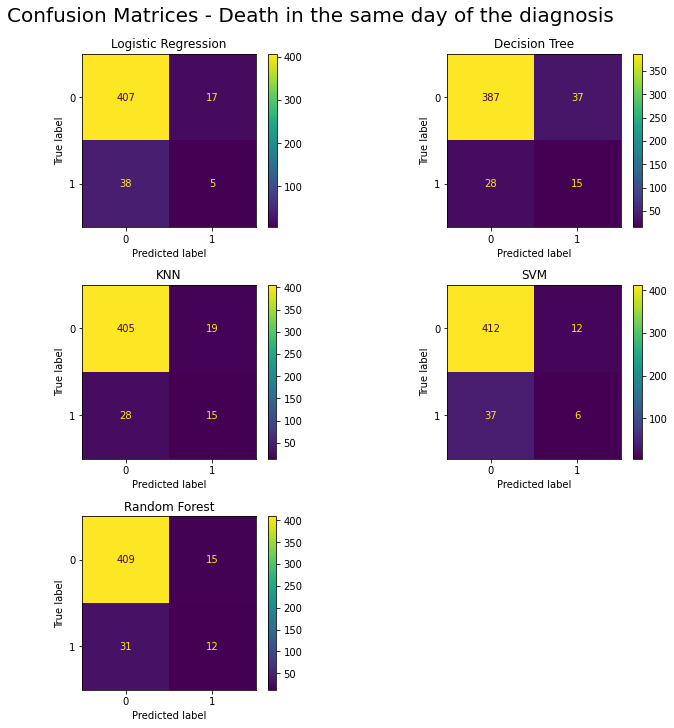

In [94]:
fig6, ax6 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig6.suptitle("Confusion Matrices - Death in the same day of the diagnosis", fontsize=20)

cm_logistic_regression03_0d = confusion_matrix(y_test03_0d, y_pred_log_reg03_0d)
ConfusionMatrixDisplay(cm_logistic_regression03_0d).plot(ax=ax6[0, 0])
ax6[0, 0].set_title("Logistic Regression")
ax6[0, 0].grid(False)

cm_decision_tree03_0d = confusion_matrix(y_test03_0d, y_pred_decision_tree03_0d)
ConfusionMatrixDisplay(cm_decision_tree03_0d).plot(ax=ax6[0, 1])
ax6[0, 1].set_title("Decision Tree")
ax6[0, 1].grid(False)

cm_knn03_0d = confusion_matrix(y_test03_0d, y_pred_knn03_0d)
ConfusionMatrixDisplay(cm_knn03_0d).plot(ax=ax6[1, 0])
ax6[1, 0].set_title("KNN")
ax6[1, 0].grid(False)

cm_svm03_0d = confusion_matrix(y_test03_0d, y_pred_svm03_0d)
ConfusionMatrixDisplay(cm_svm03_0d).plot(ax=ax6[1, 1])
ax6[1, 1].set_title("SVM")
ax6[1, 1].grid(False)

cm_random_forest03_0d = confusion_matrix(y_test03_0d, y_pred_random_forest03_0d)
ConfusionMatrixDisplay(cm_random_forest03_0d).plot(ax=ax6[2, 0])
ax6[2, 0].set_title("Random Forest")
ax6[2, 0].grid(False)

ax6[2, 1].set_visible(False)

A matriz de confusão para o intervalo de 0 a 30 dias pode ser entendida da seguinte forma:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 461 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

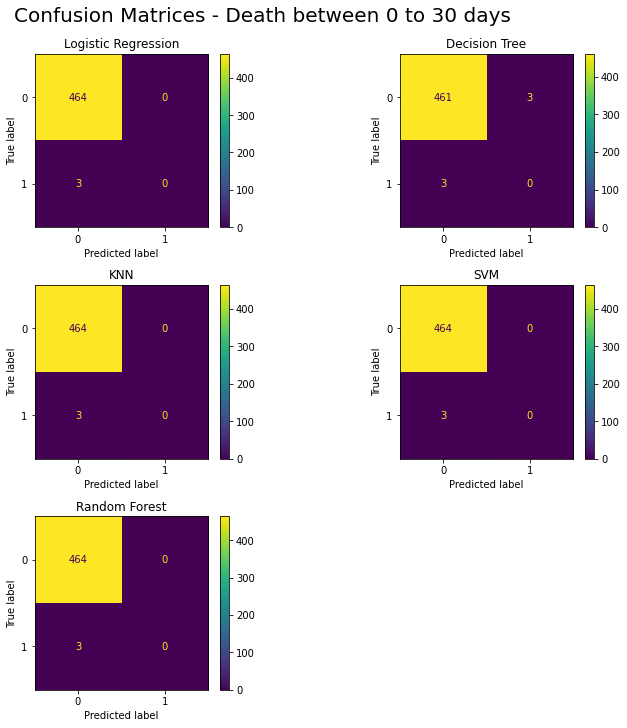

In [95]:
fig7, ax7 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig7.suptitle("Confusion Matrices - Death between 0 to 30 days", fontsize=20)

cm_logistic_regression03_0d_30d = confusion_matrix(y_test03_0d_30d, y_pred_log_reg03_0d_30d)
ConfusionMatrixDisplay(cm_logistic_regression03_0d_30d).plot(ax=ax7[0, 0])
ax7[0, 0].set_title("Logistic Regression")
ax7[0, 0].grid(False)

cm_decision_tree03_0d_30d = confusion_matrix(y_test03_0d_30d, y_pred_decision_tree03_0d_30d)
ConfusionMatrixDisplay(cm_decision_tree03_0d_30d).plot(ax=ax7[0, 1])
ax7[0, 1].set_title("Decision Tree")
ax7[0, 1].grid(False)

cm_knn03_0d_30d = confusion_matrix(y_test03_0d_30d, y_pred_knn03_0d_30d)
ConfusionMatrixDisplay(cm_knn03_0d_30d).plot(ax=ax7[1, 0])
ax7[1, 0].set_title("KNN")
ax7[1, 0].grid(False)

cm_svm03_0d_30d = confusion_matrix(y_test03_0d_30d, y_pred_svm03_0d_30d)
ConfusionMatrixDisplay(cm_svm03_0d_30d).plot(ax=ax7[1, 1])
ax7[1, 1].set_title("SVM")
ax7[1, 1].grid(False)

cm_random_forest03_0d_30d = confusion_matrix(y_test03_0d_30d, y_pred_random_forest03_0d_30d)
ConfusionMatrixDisplay(cm_random_forest03_0d_30d).plot(ax=ax7[2, 0])
ax7[2, 0].set_title("Random Forest")
ax7[2, 0].grid(False)

ax7[2, 1].set_visible(False)

Na faixa de 30 a 360 dias, a matriz de confusão pode ser interpretada dessa maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 461 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

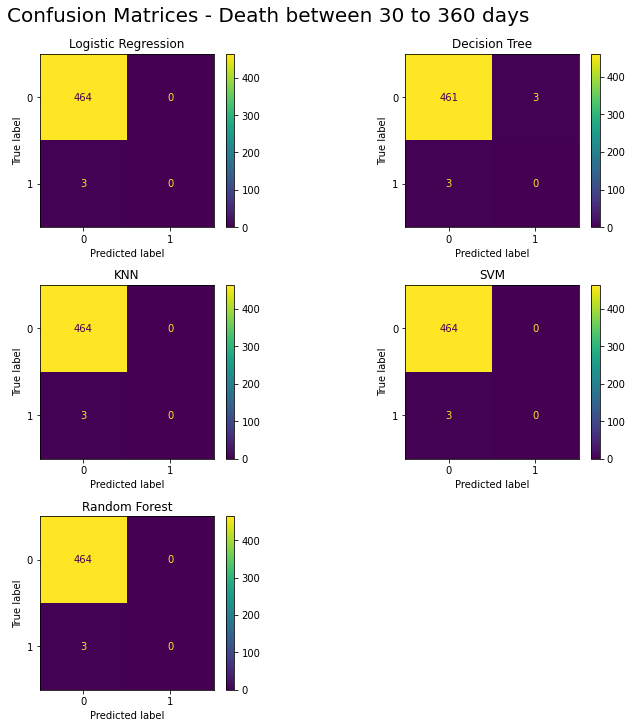

In [96]:
fig8, ax8 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig8.suptitle("Confusion Matrices - Death between 30 to 360 days", fontsize=20)

cm_logistic_regression03_30d_360d = confusion_matrix(y_test03_30d_360d, y_pred_log_reg03_30d_360d)
ConfusionMatrixDisplay(cm_logistic_regression03_30d_360d).plot(ax=ax8[0, 0])
ax8[0, 0].set_title("Logistic Regression")
ax8[0, 0].grid(False)

cm_decision_tree03_30d_360d = confusion_matrix(y_test03_30d_360d, y_pred_decision_tree03_30d_360d)
ConfusionMatrixDisplay(cm_decision_tree03_30d_360d).plot(ax=ax8[0, 1])
ax8[0, 1].set_title("Decision Tree")
ax8[0, 1].grid(False)

cm_knn03_30d_360d = confusion_matrix(y_test03_30d_360d, y_pred_knn03_30d_360d)
ConfusionMatrixDisplay(cm_knn03_30d_360d).plot(ax=ax8[1, 0])
ax8[1, 0].set_title("KNN")
ax8[1, 0].grid(False)

cm_svm03_30d_360d = confusion_matrix(y_test03_30d_360d, y_pred_svm03_30d_360d)
ConfusionMatrixDisplay(cm_svm03_30d_360d).plot(ax=ax8[1, 1])
ax8[1, 1].set_title("SVM")
ax8[1, 1].grid(False)

cm_random_forest03_30d_360d = confusion_matrix(y_test03_30d_360d, y_pred_random_forest03_30d_360d)
ConfusionMatrixDisplay(cm_random_forest03_30d_360d).plot(ax=ax8[2, 0])
ax8[2, 0].set_title("Random Forest")
ax8[2, 0].grid(False)

ax8[2, 1].set_visible(False)

A matriz de confusão para a faixa de 360 a 540 dias demonstra:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente 465 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 462 casos e incorretamente 4 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

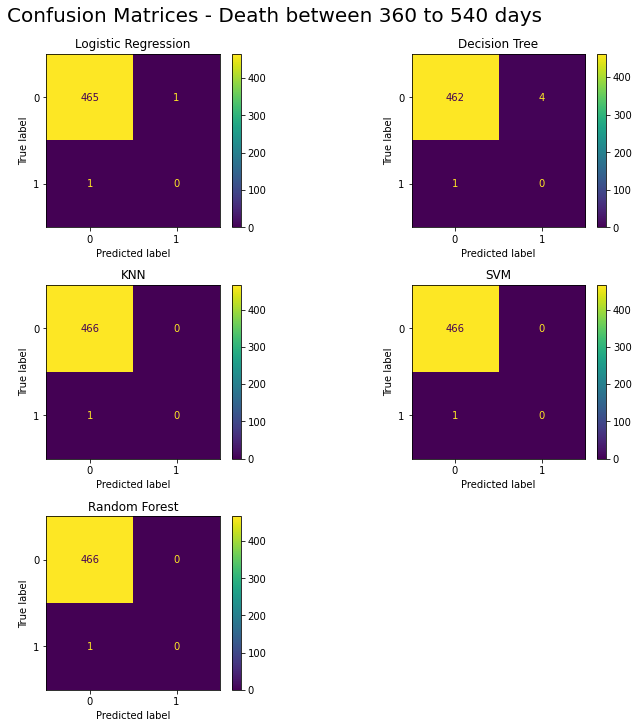

In [97]:
fig9, ax9 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig9.suptitle("Confusion Matrices - Death between 360 to 540 days", fontsize=20)

cm_logistic_regression03_360d_540d = confusion_matrix(y_test03_360d_540d, y_pred_log_reg03_360d_540d)
ConfusionMatrixDisplay(cm_logistic_regression03_360d_540d).plot(ax=ax9[0, 0])
ax9[0, 0].set_title("Logistic Regression")
ax9[0, 0].grid(False)

cm_decision_tree03_360d_540d = confusion_matrix(y_test03_360d_540d, y_pred_decision_tree03_360d_540d)
ConfusionMatrixDisplay(cm_decision_tree03_360d_540d).plot(ax=ax9[0, 1])
ax9[0, 1].set_title("Decision Tree")
ax9[0, 1].grid(False)

cm_knn03_360d_540d = confusion_matrix(y_test03_360d_540d, y_pred_knn03_360d_540d)
ConfusionMatrixDisplay(cm_knn03_360d_540d).plot(ax=ax9[1, 0])
ax9[1, 0].set_title("KNN")
ax9[1, 0].grid(False)

cm_svm03_360d_540d = confusion_matrix(y_test03_360d_540d, y_pred_svm03_360d_540d)
ConfusionMatrixDisplay(cm_svm03_360d_540d).plot(ax=ax9[1, 1])
ax9[1, 1].set_title("SVM")
ax9[1, 1].grid(False)

cm_random_forest03_360d_540d = confusion_matrix(y_test03_360d_540d, y_pred_random_forest03_360d_540d)
ConfusionMatrixDisplay(cm_random_forest03_360d_540d).plot(ax=ax9[2, 0])
ax9[2, 0].set_title("Random Forest")
ax9[2, 0].grid(False)

ax9[2, 1].set_visible(False)

A matriz de confusão para o intervalo de 540 a 1440 dias demonstra:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 450 casos e incorretamente 10 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

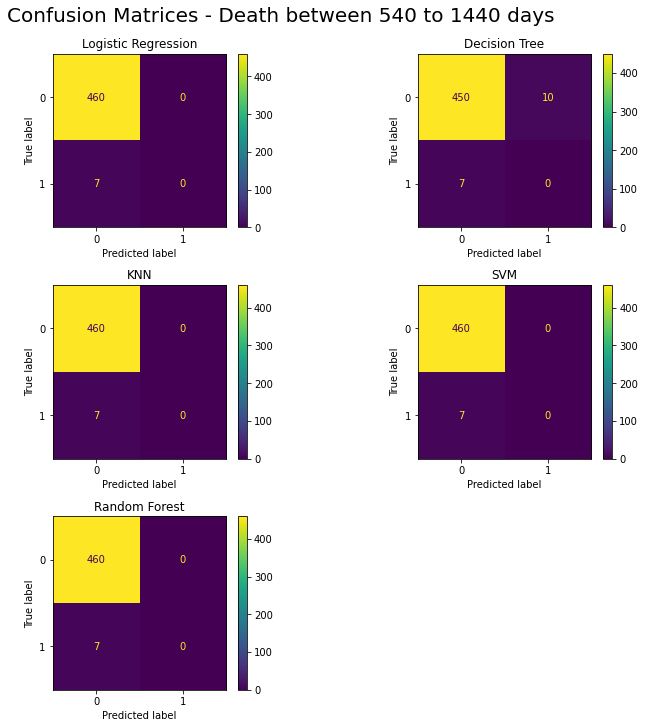

In [98]:
fig10, ax10 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig10.suptitle("Confusion Matrices - Death between 540 to 1440 days", fontsize=20)

cm_logistic_regression03_540d_1440d = confusion_matrix(y_test03_540d_1440d, y_pred_log_reg03_540d_1440d)
ConfusionMatrixDisplay(cm_logistic_regression03_540d_1440d).plot(ax=ax10[0, 0])
ax10[0, 0].set_title("Logistic Regression")
ax10[0, 0].grid(False)

cm_decision_tree03_540d_1440d = confusion_matrix(y_test03_540d_1440d, y_pred_decision_tree03_540d_1440d)
ConfusionMatrixDisplay(cm_decision_tree03_540d_1440d).plot(ax=ax10[0, 1])
ax10[0, 1].set_title("Decision Tree")
ax10[0, 1].grid(False)

cm_knn03_540d_1440d = confusion_matrix(y_test03_540d_1440d, y_pred_knn03_540d_1440d)
ConfusionMatrixDisplay(cm_knn03_540d_1440d).plot(ax=ax10[1, 0])
ax10[1, 0].set_title("KNN")
ax10[1, 0].grid(False)

cm_svm03_540d_1440d = confusion_matrix(y_test03_540d_1440d, y_pred_svm03_540d_1440d)
ConfusionMatrixDisplay(cm_svm03_540d_1440d).plot(ax=ax10[1, 1])
ax10[1, 1].set_title("SVM")
ax10[1, 1].grid(False)

cm_random_forest03_540d_1440d = confusion_matrix(y_test03_540d_1440d, y_pred_random_forest03_540d_1440d)
ConfusionMatrixDisplay(cm_random_forest03_540d_1440d).plot(ax=ax10[2, 0])
ax10[2, 0].set_title("Random Forest")
ax10[2, 0].grid(False)

ax10[2, 1].set_visible(False)

Para a faixa acima de 1440 dias, a matriz de confusão demonstra que:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 448 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 439 casos e incorretamente 9 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 2 casos e incorretamente 17 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 448 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 448 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 447 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

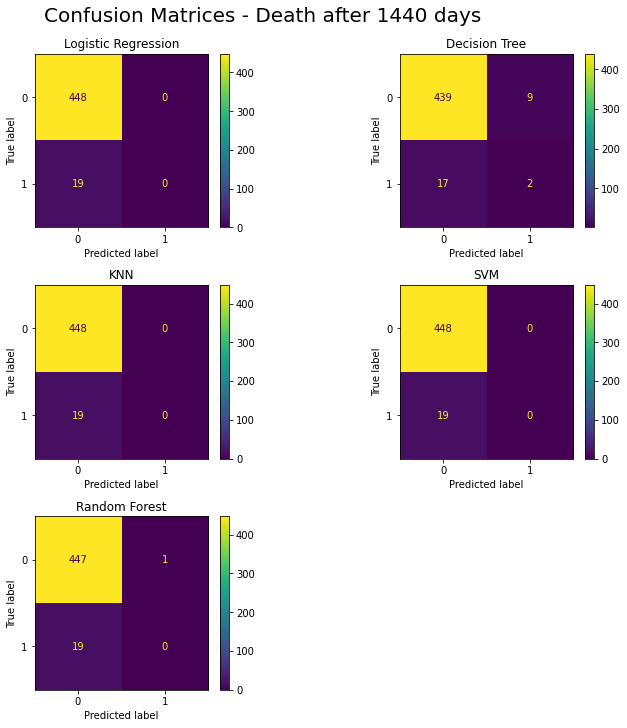

In [99]:
fig11, ax11 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig11.suptitle("Confusion Matrices - Death after 1440 days", fontsize=20)

cm_logistic_regression03_after_1440d = confusion_matrix(y_test03_after_1440d, y_pred_log_reg03_after_1440d)
ConfusionMatrixDisplay(cm_logistic_regression03_after_1440d).plot(ax=ax11[0, 0])
ax11[0, 0].set_title("Logistic Regression")
ax11[0, 0].grid(False)

cm_decision_tree03_after_1440d = confusion_matrix(y_test03_after_1440d, y_pred_decision_tree03_after_1440d)
ConfusionMatrixDisplay(cm_decision_tree03_after_1440d).plot(ax=ax11[0, 1])
ax11[0, 1].set_title("Decision Tree")
ax11[0, 1].grid(False)

cm_knn03_after_1440d = confusion_matrix(y_test03_after_1440d, y_pred_knn03_after_1440d)
ConfusionMatrixDisplay(cm_knn03_after_1440d).plot(ax=ax11[1, 0])
ax11[1, 0].set_title("KNN")
ax11[1, 0].grid(False)

cm_svm03_after_1440d = confusion_matrix(y_test03_after_1440d, y_pred_svm03_after_1440d)
ConfusionMatrixDisplay(cm_svm03_after_1440d).plot(ax=ax11[1, 1])
ax11[1, 1].set_title("SVM")
ax11[1, 1].grid(False)

cm_random_forest03_after_1440d = confusion_matrix(y_test03_after_1440d, y_pred_random_forest03_after_1440d)
ConfusionMatrixDisplay(cm_random_forest03_after_1440d).plot(ax=ax11[2, 0])
ax11[2, 0].set_title("Random Forest")
ax11[2, 0].grid(False)

ax11[2, 1].set_visible(False)

##### Acurácia, Precisão, Revocação e F1-Score

---



Os dados do `classification_report` para a faixa do mesmo dia do diagnóstico conclui que:

* Os modelos tiveram acurácia acima de 86%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Considerando a precisão dos modelos no caso de morte, ou seja, quantas das predições positivas realmente eram positivas, todas obtiveram valores acima de 23%, sendo os melhores o Random Forest e o KNN com 44%.
* Ao analisar a revocação para o caso de morte, vemos que os modelos não performaram bem, tendo como maior valor na Árvore de Decisão e KNN, com 35%;
* Avaliando o F1-score para casos de morte, temos que o melhor modelo foi KNN, obtendo 39%.

In [100]:
report_log_reg_03_0d = classification_report(y_test03_0d, y_pred_log_reg03_0d, zero_division=1, output_dict=True)
report_dec_tree_03_0d = classification_report(y_test03_0d, y_pred_decision_tree03_0d, zero_division=1, output_dict=True)
report_knn_03_0d = classification_report(y_test03_0d, y_pred_knn03_0d, zero_division=1, output_dict=True)
report_svm_03_0d = classification_report(y_test03_0d, y_pred_svm03_0d, zero_division=1, output_dict=True)
report_random_forest_03_0d = classification_report(y_test03_0d, y_pred_random_forest03_0d, zero_division=1, output_dict=True)

fig0, ax0 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig0.suptitle("Classification Report - Death in the same day of the diagnosis", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 0])
ax0[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 1])
ax0[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 0])
ax0[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 1])
ax0[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_0d).iloc[:-1, :].T, annot=True, ax=ax0[2, 0])
ax0[2, 0].set_title("Random Forest")

ax0[2, 1].set_visible(False)

Analisando o `classification_report` para a faixa de 0 a 30 dias, concluímos que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo conseguir prever os casos de morte.

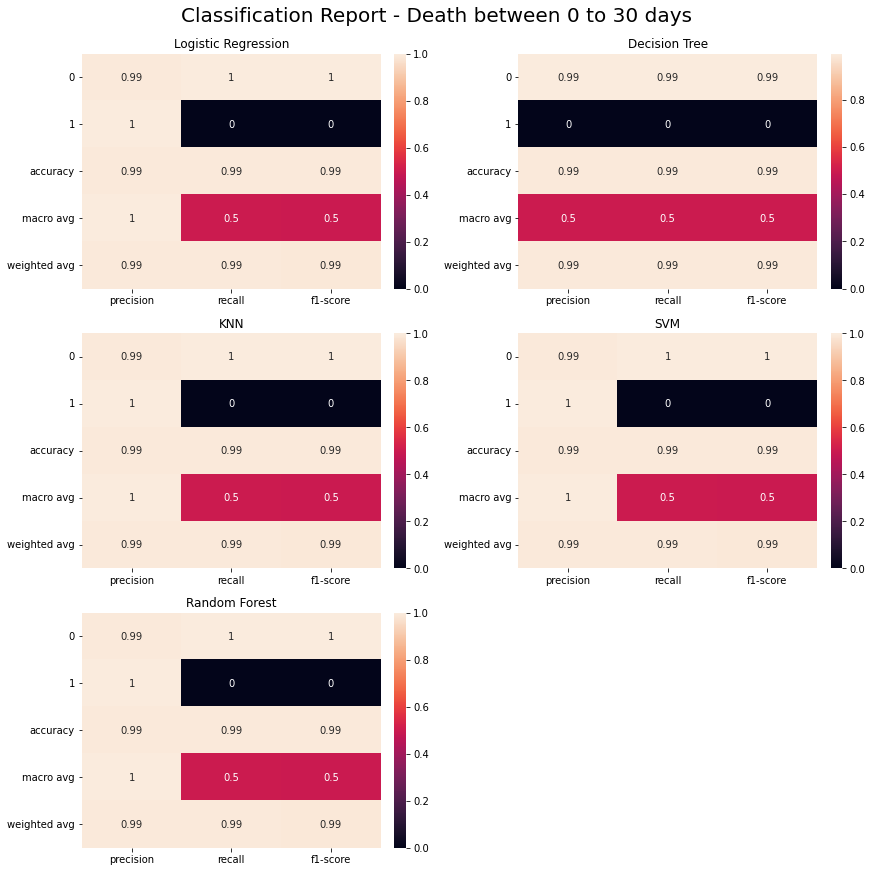

In [101]:
report_log_reg_03_0d_30d = classification_report(y_test03_0d_30d, y_pred_log_reg03_0d_30d, zero_division=1, output_dict=True)
report_dec_tree_03_0d_30d = classification_report(y_test03_0d_30d, y_pred_decision_tree03_0d_30d, zero_division=1, output_dict=True)
report_knn_03_0d_30d = classification_report(y_test03_0d_30d, y_pred_knn03_0d_30d, zero_division=1, output_dict=True)
report_svm_03_0d_30d = classification_report(y_test03_0d_30d, y_pred_svm03_0d_30d, zero_division=1, output_dict=True)
report_random_forest_03_0d_30d = classification_report(y_test03_0d_30d, y_pred_random_forest03_0d_30d, zero_division=1, output_dict=True)

fig1, ax1 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig1.suptitle("Classification Report - Death between 0 to 30 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 0])
ax1[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 1])
ax1[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 0])
ax1[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 1])
ax1[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[2, 0])
ax1[2, 0].set_title("Random Forest")

ax1[2, 1].set_visible(False)

O `classification_report` para o intervalo de 30 a 360 dias demonstra que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Assim como na faixa de tempo anterior, nenhum modelo conseguiu prever os casos de morte.

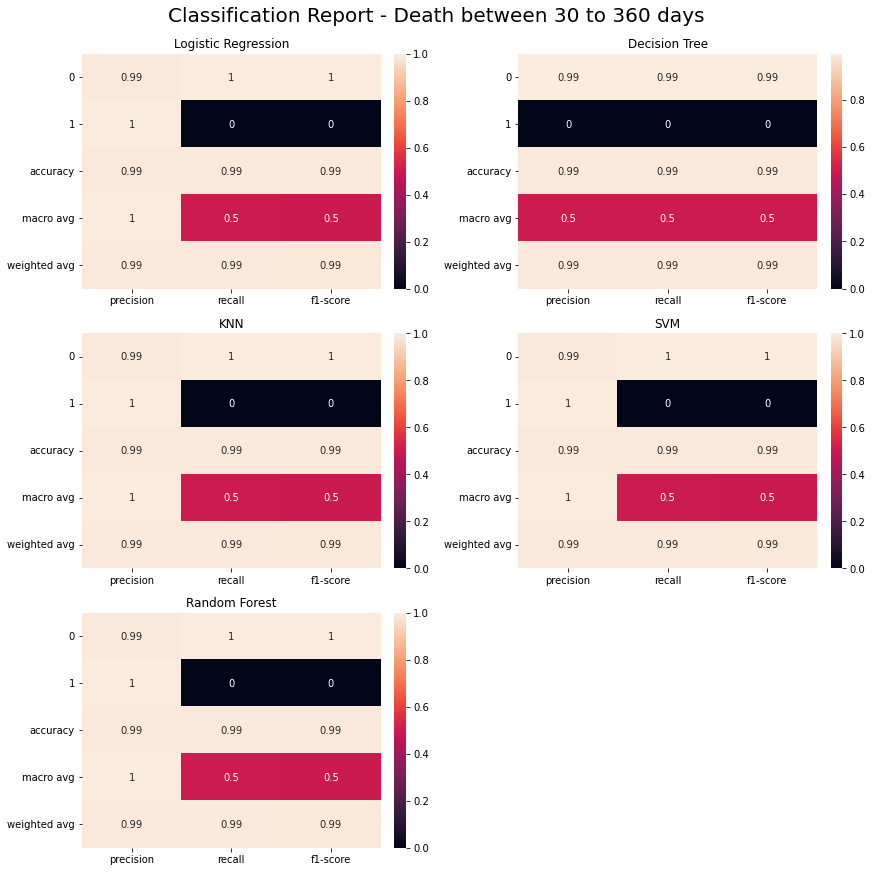

In [102]:
report_log_reg_03_30d_360d = classification_report(y_test03_30d_360d, y_pred_log_reg03_30d_360d, zero_division=1, output_dict=True)
report_dec_tree_03_30d_360d = classification_report(y_test03_30d_360d, y_pred_decision_tree03_30d_360d, zero_division=1, output_dict=True)
report_knn_03_30d_360d = classification_report(y_test03_30d_360d, y_pred_knn03_30d_360d, zero_division=1, output_dict=True)
report_svm_03_30d_360d = classification_report(y_test03_30d_360d, y_pred_svm03_30d_360d, zero_division=1, output_dict=True)
report_random_forest_03_30d_360d = classification_report(y_test03_30d_360d, y_pred_random_forest03_30d_360d, zero_division=1, output_dict=True)

fig2, ax2 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig2.suptitle("Classification Report - Death between 30 to 360 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 0])
ax2[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 1])
ax2[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 0])
ax2[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 1])
ax2[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[2, 0])
ax2[2, 0].set_title("Random Forest")

ax2[2, 1].set_visible(False)

Com os dados do `classification_report` para a faixa 360 a 540 dias concluímos que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Bem como os intervalos anteriores, os modelos não conseguiram prever os casos de morte para essa faixa de tempo.

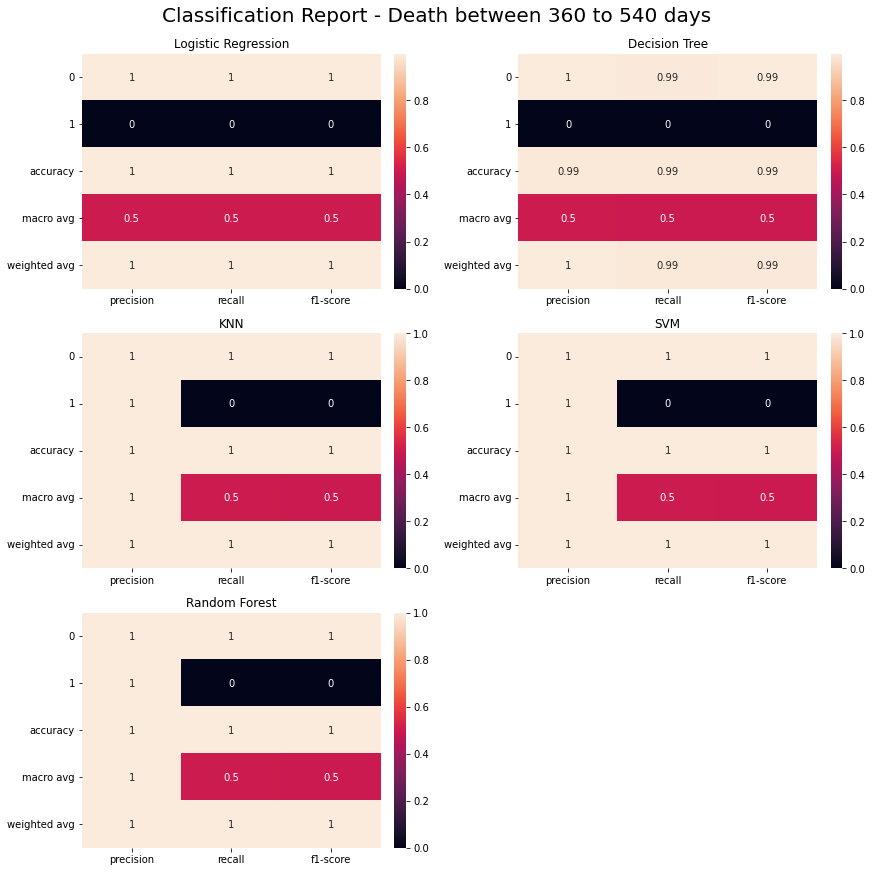

In [103]:
report_log_reg_03_360d_540d = classification_report(y_test03_360d_540d, y_pred_log_reg03_360d_540d, zero_division=1, output_dict=True)
report_dec_tree_03_360d_540d = classification_report(y_test03_360d_540d, y_pred_decision_tree03_360d_540d, zero_division=1, output_dict=True)
report_knn_03_360d_540d = classification_report(y_test03_360d_540d, y_pred_knn03_360d_540d, zero_division=1, output_dict=True)
report_svm_03_360d_540d = classification_report(y_test03_360d_540d, y_pred_svm03_360d_540d, zero_division=1, output_dict=True)
report_random_forest_03_360d_540d = classification_report(y_test03_360d_540d, y_pred_random_forest03_360d_540d, zero_division=1, output_dict=True)

fig3, ax3 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig3.suptitle("Classification Report - Death between 360 to 540 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 0])
ax3[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 1])
ax3[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 0])
ax3[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 1])
ax3[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[2, 0])
ax3[2, 0].set_title("Random Forest")

ax3[2, 1].set_visible(False)

Os dados do `classification_report` para a faixa de 540 a 1440 dias conclui que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

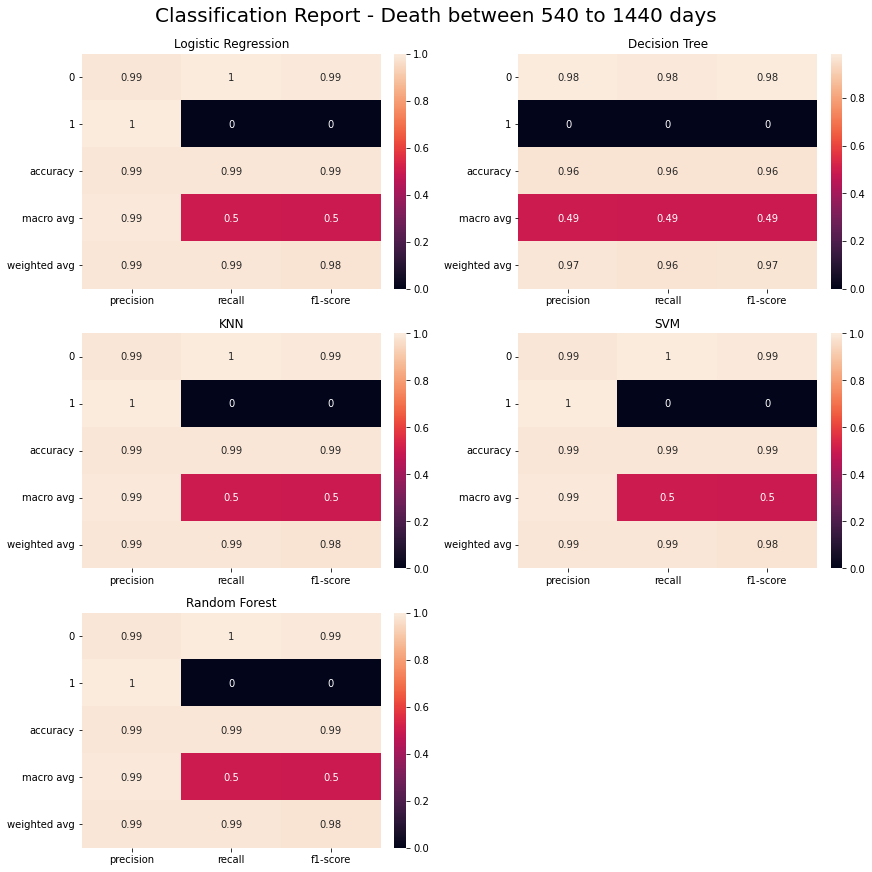

In [104]:
report_log_reg_03_540d_1440d = classification_report(y_test03_540d_1440d, y_pred_log_reg03_540d_1440d, zero_division=1, output_dict=True)
report_dec_tree_03_540d_1440d = classification_report(y_test03_540d_1440d, y_pred_decision_tree03_540d_1440d, zero_division=1, output_dict=True)
report_knn_03_540d_1440d = classification_report(y_test03_540d_1440d, y_pred_knn03_540d_1440d, zero_division=1, output_dict=True)
report_svm_03_540d_1440d = classification_report(y_test03_540d_1440d, y_pred_svm03_540d_1440d, zero_division=1, output_dict=True)
report_random_forest_03_540d_1440d = classification_report(y_test03_540d_1440d, y_pred_random_forest03_540d_1440d, zero_division=1, output_dict=True)

fig4, ax4 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig4.suptitle("Classification Report - Death between 540 to 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 0])
ax4[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 1])
ax4[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 0])
ax4[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 1])
ax4[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[2, 0])
ax4[2, 0].set_title("Random Forest")

ax4[2, 1].set_visible(False)

O `classification_report` para o intervalo acima de 1440 dias demonstra que:

* Os modelos tiveram acurácia acima de 94%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* O único modelo que conseguiu prever pelo menos 1 caso de morte foi a Árvore de Decisão, com 18% de precisão, 11% de revocação e 13% de F1-score.


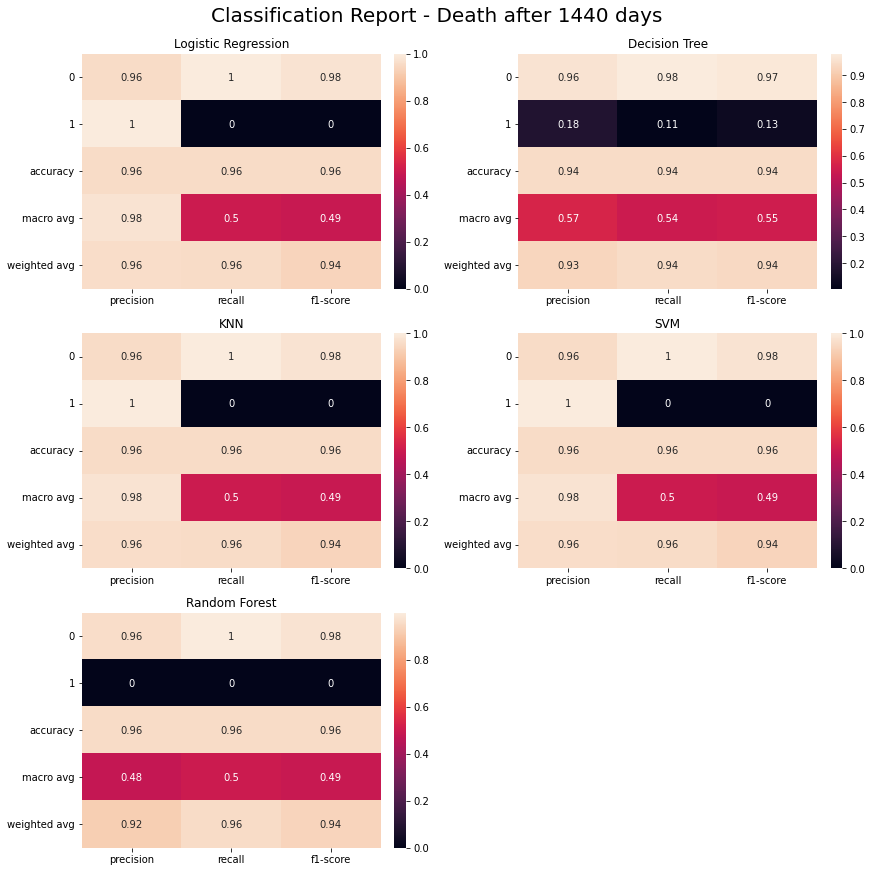

In [105]:
report_log_reg_03_after_1440d = classification_report(y_test03_after_1440d, y_pred_log_reg03_after_1440d, zero_division=1, output_dict=True)
report_dec_tree_03_after_1440d = classification_report(y_test03_after_1440d, y_pred_decision_tree03_after_1440d, zero_division=1, output_dict=True)
report_knn_03_after_1440d = classification_report(y_test03_after_1440d, y_pred_knn03_after_1440d, zero_division=1, output_dict=True)
report_svm_03_after_1440d = classification_report(y_test03_after_1440d, y_pred_svm03_after_1440d, zero_division=1, output_dict=True)
report_random_forest_03_after_1440d = classification_report(y_test03_after_1440d, y_pred_random_forest03_after_1440d, zero_division=1, output_dict=True)

fig5, ax5 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig5.suptitle("Classification Report - Death after 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 0])
ax5[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 1])
ax5[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 0])
ax5[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 1])
ax5[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[2, 0])
ax5[2, 0].set_title("Random Forest")

ax5[2, 1].set_visible(False)

##### Curva ROC e AUCROC

---



Os dados da curva ROC foram calculados para todas as faixas de tempo definidas e para todos os modelos testados.

In [106]:
lr_prob_0d = logistic_regression03_0d.predict_proba(x_test_03)
lr_prob_0d = lr_prob_0d[:, 1]
dt_prob_0d = decision_tree03_0d.predict_proba(x_test_03)
dt_prob_0d = dt_prob_0d[:, 1]
knn_prob_0d = knn_prognosis03_0d.predict_proba(x_test_03)
knn_prob_0d = knn_prob_0d[:, 1]
svm_prob_0d = svm_prognosis03_0d.predict_proba(x_test_03)
svm_prob_0d = svm_prob_0d[:, 1]
rf_prob_0d = random_forest_prognosis03_0d.predict_proba(x_test_03)
rf_prob_0d = rf_prob_0d[:, 1]

lr_prob_0d_30d = logistic_regression03_0d_30d.predict_proba(x_test_03)
lr_prob_0d_30d = lr_prob_0d_30d[:, 1]
dt_prob_0d_30d = decision_tree03_0d_30d.predict_proba(x_test_03)
dt_prob_0d_30d = dt_prob_0d_30d[:, 1]
knn_prob_0d_30d = knn_prognosis03_0d_30d.predict_proba(x_test_03)
knn_prob_0d_30d = knn_prob_0d_30d[:, 1]
svm_prob_0d_30d = svm_prognosis03_0d_30d.predict_proba(x_test_03)
svm_prob_0d_30d = svm_prob_0d_30d[:, 1]
rf_prob_0d_30d = random_forest_prognosis03_0d_30d.predict_proba(x_test_03)
rf_prob_0d_30d = rf_prob_0d_30d[:, 1]

lr_prob_30d_360d = logistic_regression03_30d_360d.predict_proba(x_test_03)
lr_prob_30d_360d = lr_prob_30d_360d[:, 1]
dt_prob_30d_360d = decision_tree03_30d_360d.predict_proba(x_test_03)
dt_prob_30d_360d = dt_prob_30d_360d[:, 1]
knn_prob_30d_360d = knn_prognosis03_30d_360d.predict_proba(x_test_03)
knn_prob_30d_360d = knn_prob_30d_360d[:, 1]
svm_prob_30d_360d = svm_prognosis03_30d_360d.predict_proba(x_test_03)
svm_prob_30d_360d = svm_prob_30d_360d[:, 1]
rf_prob_30d_360d = random_forest_prognosis03_30d_360d.predict_proba(x_test_03)
rf_prob_30d_360d = rf_prob_30d_360d[:, 1]

lr_prob_360d_540d = logistic_regression03_360d_540d.predict_proba(x_test_03)
lr_prob_360d_540d = lr_prob_360d_540d[:, 1]
dt_prob_360d_540d = decision_tree03_360d_540d.predict_proba(x_test_03)
dt_prob_360d_540d = dt_prob_360d_540d[:, 1]
knn_prob_360d_540d = knn_prognosis03_360d_540d.predict_proba(x_test_03)
knn_prob_360d_540d = knn_prob_360d_540d[:, 1]
svm_prob_360d_540d = svm_prognosis03_360d_540d.predict_proba(x_test_03)
svm_prob_360d_540d = svm_prob_360d_540d[:, 1]
rf_prob_360d_540d = random_forest_prognosis03_360d_540d.predict_proba(x_test_03)
rf_prob_360d_540d = rf_prob_360d_540d[:, 1]

lr_prob_540d_1440d = logistic_regression03_540d_1440d.predict_proba(x_test_03)
lr_prob_540d_1440d = lr_prob_540d_1440d[:, 1]
dt_prob_540d_1440d = decision_tree03_540d_1440d.predict_proba(x_test_03)
dt_prob_540d_1440d = dt_prob_540d_1440d[:, 1]
knn_prob_540d_1440d = knn_prognosis03_540d_1440d.predict_proba(x_test_03)
knn_prob_540d_1440d = knn_prob_540d_1440d[:, 1]
svm_prob_540d_1440d = svm_prognosis03_540d_1440d.predict_proba(x_test_03)
svm_prob_540d_1440d = svm_prob_540d_1440d[:, 1]
rf_prob_540d_1440d = random_forest_prognosis03_540d_1440d.predict_proba(x_test_03)
rf_prob_540d_1440d = rf_prob_540d_1440d[:, 1]

lr_prob_after_1440d = logistic_regression03_after_1440d.predict_proba(x_test_03)
lr_prob_after_1440d = lr_prob_after_1440d[:, 1]
dt_prob_after_1440d = decision_tree03_after_1440d.predict_proba(x_test_03)
dt_prob_after_1440d = dt_prob_after_1440d[:, 1]
knn_prob_after_1440d = knn_prognosis03_after_1440d.predict_proba(x_test_03)
knn_prob_after_1440d = knn_prob_after_1440d[:, 1]
svm_prob_after_1440d = svm_prognosis03_after_1440d.predict_proba(x_test_03)
svm_prob_after_1440d = svm_prob_after_1440d[:, 1]
rf_prob_after_1440d = random_forest_prognosis03_after_1440d.predict_proba(x_test_03)
rf_prob_after_1440d = rf_prob_after_1440d[:, 1]

Diferente dos casos anteriores, nesse caso não tivemos problemas ao gerar as curvas ROC.

In [107]:
try:
  lr_0d = roc_auc_score(y_test03_0d, lr_prob_0d)
except ValueError as err:
  print("Error for Logistic Regression, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  dt_0d = roc_auc_score(y_test03_0d, dt_prob_0d)
except ValueError as err:
  print("Error for Decision Tree, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  knn_0d = roc_auc_score(y_test03_0d, knn_prob_0d)
except ValueError as err:
  print("Error for KNN, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  svm_0d = roc_auc_score(y_test03_0d, svm_prob_0d)
except ValueError as err:
  print("Error for SVM, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  rf_0d = roc_auc_score(y_test03_0d, rf_prob_0d)
except ValueError as err:
  print("Error for Random Forest, with death in the same day of the diagnosis: " + str(err))
  pass

try:
  lr_0d_30d = roc_auc_score(y_test03_0d_30d, lr_prob_0d_30d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 0 to 30 days: " + str(err))
  pass
try:
  dt_0d_30d = roc_auc_score(y_test03_0d_30d, dt_prob_0d_30d)
except ValueError as err:
  print("Error for Decision Tree, with death between 0 to 30 days: " + str(err))
  pass
try:
  knn_0d_30d = roc_auc_score(y_test03_0d_30d, knn_prob_0d_30d)
except ValueError as err:
  print("Error for KNN, with death between 0 to 30 days: " + str(err))
  pass
try:
  svm_0d_30d = roc_auc_score(y_test03_0d_30d, svm_prob_0d_30d)
except ValueError as err:
  print("Error for SVM, with death between 0 to 30 days: " + str(err))
  pass
try:
  rf_0d_30d = roc_auc_score(y_test03_0d_30d, rf_prob_0d_30d)
except ValueError as err:
  print("Error for Random Forest, with death between 0 to 30 days: " + str(err))
  pass

try:
  lr_30d_360d = roc_auc_score(y_test03_30d_360d, lr_prob_30d_360d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 30 to 360 days: " + str(err))
  pass
try:
  dt_30d_360d = roc_auc_score(y_test03_30d_360d, dt_prob_30d_360d)
except ValueError as err:
  print("Error for Decision Tree, with death between 30 to 360 days: " + str(err))
  pass
try:
  knn_30d_360d = roc_auc_score(y_test03_30d_360d, knn_prob_30d_360d)
except ValueError as err:
  print("Error for KNN, with death between 30 to 360 days: " + str(err))
  pass
try:
  svm_30d_360d = roc_auc_score(y_test03_30d_360d, svm_prob_30d_360d)
except ValueError as err:
  print("Error for SVM, with death between 30 to 360 days: " + str(err))
  pass
try:
  rf_30d_360d = roc_auc_score(y_test03_30d_360d, rf_prob_30d_360d)
except ValueError as err:
  print("Error for Random Forest, with death between 30 to 360 days: " + str(err))
  pass

try:
  lr_360d_540d = roc_auc_score(y_test03_360d_540d, lr_prob_360d_540d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 360 to 540 days: " + str(err))
  pass
try:
  dt_360d_540d = roc_auc_score(y_test03_360d_540d, dt_prob_360d_540d)
except ValueError as err:
  print("Error for Decision Tree, with death between 360 to 540 days: " + str(err))
  pass
try:
  knn_360d_540d = roc_auc_score(y_test03_360d_540d, knn_prob_360d_540d)
except ValueError as err:
  print("Error for KNN, with death between 360 to 540 days: " + str(err))
  pass
try:
  svm_360d_540d = roc_auc_score(y_test03_360d_540d, svm_prob_360d_540d)
except ValueError as err:
  print("Error for SVM, with death between 360 to 540 days: " + str(err))
  pass
try:
  rf_360d_540d = roc_auc_score(y_test03_360d_540d, rf_prob_360d_540d)
except ValueError as err:
  print("Error for Random Forest, with death between 360 to 540 days: " + str(err))
  pass

try:
  lr_540d_1440d = roc_auc_score(y_test03_540d_1440d, lr_prob_540d_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 540 to 1440 days: " + str(err))
  pass
try:
  dt_540d_1440d = roc_auc_score(y_test03_540d_1440d, dt_prob_540d_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death between 540 to 1440 days: " + str(err))
  pass
try:
  knn_540d_1440d = roc_auc_score(y_test03_540d_1440d, knn_prob_540d_1440d)
except ValueError as err:
  print("Error for KNN, with death between 540 to 1440 days: " + str(err))
  pass
try:
  svm_540d_1440d = roc_auc_score(y_test03_540d_1440d, svm_prob_540d_1440d)
except ValueError as err:
  print("Error for SVM, with death between 540 to 1440 days: " + str(err))
  pass
try:
  rf_540d_1440d = roc_auc_score(y_test03_540d_1440d, rf_prob_540d_1440d)
except ValueError as err:
  print("Error for Random Forest, with death between 540 to 1440 days: " + str(err))
  pass

try:
  lr_after_1440d = roc_auc_score(y_test03_after_1440d, lr_prob_after_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death after 1440 days: " + str(err))
  pass
try:
  dt_after_1440d = roc_auc_score(y_test03_after_1440d, dt_prob_after_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death after 1440 days: " + str(err))
  pass
try:
  knn_after_1440d = roc_auc_score(y_test03_after_1440d, knn_prob_after_1440d)
except ValueError as err:
  print("Error for KNN, with death after 1440 days: " + str(err))
  pass
try:
  svm_after_1440d = roc_auc_score(y_test03_after_1440d, svm_prob_after_1440d)
except ValueError as err:
  print("Error for SVM, with death after 1440 days: " + str(err))
  pass
try:
  rf_after_1440d = roc_auc_score(y_test03_after_1440d, rf_prob_after_1440d)
except ValueError as err:
  print("Error for Random Forest, with death after 1440 days: " + str(err))
  pass

In [108]:
lr_fpr_0d, lr_tpr_0d, _ = roc_curve(y_test03_0d, lr_prob_0d)
dt_fpr_0d, dt_tpr_0d, _ = roc_curve(y_test03_0d, dt_prob_0d)
knn_fpr_0d, knn_tpr_0d, _ = roc_curve(y_test03_0d, knn_prob_0d)
svm_fpr_0d, svm_tpr_0d, _ = roc_curve(y_test03_0d, svm_prob_0d)
rf_fpr_0d, rf_tpr_0d, _ = roc_curve(y_test03_0d, rf_prob_0d)

lr_fpr_0d_30d, lr_tpr_0d_30d, _ = roc_curve(y_test03_0d_30d, lr_prob_0d_30d)
dt_fpr_0d_30d, dt_tpr_0d_30d, _ = roc_curve(y_test03_0d_30d, dt_prob_0d_30d)
knn_fpr_0d_30d, knn_tpr_0d_30d, _ = roc_curve(y_test03_0d_30d, knn_prob_0d_30d)
svm_fpr_0d_30d, svm_tpr_0d_30d, _ = roc_curve(y_test03_0d_30d, svm_prob_0d_30d)
rf_fpr_0d_30d, rf_tpr_0d_30d, _ = roc_curve(y_test03_0d_30d, rf_prob_0d_30d)

lr_fpr_30d_360d, lr_tpr_30d_360d, _ = roc_curve(y_test03_30d_360d, lr_prob_30d_360d)
dt_fpr_30d_360d, dt_tpr_30d_360d, _ = roc_curve(y_test03_30d_360d, dt_prob_30d_360d)
knn_fpr_30d_360d, knn_tpr_30d_360d, _ = roc_curve(y_test03_30d_360d, knn_prob_30d_360d)
svm_fpr_30d_360d, svm_tpr_30d_360d, _ = roc_curve(y_test03_30d_360d, svm_prob_30d_360d)
rf_fpr_30d_360d, rf_tpr_30d_360d, _ = roc_curve(y_test03_30d_360d, rf_prob_30d_360d)

lr_fpr_360d_540d, lr_tpr_360d_540d, _ = roc_curve(y_test03_360d_540d, lr_prob_360d_540d)
dt_fpr_360d_540d, dt_tpr_360d_540d, _ = roc_curve(y_test03_360d_540d, dt_prob_360d_540d)
knn_fpr_360d_540d, knn_tpr_360d_540d, _ = roc_curve(y_test03_360d_540d, knn_prob_360d_540d)
svm_fpr_360d_540d, svm_tpr_360d_540d, _ = roc_curve(y_test03_360d_540d, svm_prob_360d_540d)
rf_fpr_360d_540d, rf_tpr_360d_540d, _ = roc_curve(y_test03_360d_540d, rf_prob_360d_540d)

lr_fpr_540d_1440d, lr_tpr_540d_1440d, _ = roc_curve(y_test03_540d_1440d, lr_prob_540d_1440d)
dt_fpr_540d_1440d, dt_tpr_540d_1440d, _ = roc_curve(y_test03_540d_1440d, dt_prob_540d_1440d)
knn_fpr_540d_1440d, knn_tpr_540d_1440d, _ = roc_curve(y_test03_540d_1440d, knn_prob_540d_1440d)
svm_fpr_540d_1440d, svm_tpr_540d_1440d, _ = roc_curve(y_test03_540d_1440d, svm_prob_540d_1440d)
rf_fpr_540d_1440d, rf_tpr_540d_1440d, _ = roc_curve(y_test03_540d_1440d, rf_prob_540d_1440d)

lr_fpr_after_1440d, lr_tpr_after_1440d, _ = roc_curve(y_test03_after_1440d, lr_prob_after_1440d)
dt_fpr_after_1440d, dt_tpr_after_1440d, _ = roc_curve(y_test03_after_1440d, dt_prob_after_1440d)
knn_fpr_after_1440d, knn_tpr_after_1440d, _ = roc_curve(y_test03_after_1440d, knn_prob_after_1440d)
svm_fpr_after_1440d, svm_tpr_after_1440d, _ = roc_curve(y_test03_after_1440d, svm_prob_after_1440d)
rf_fpr_after_1440d, rf_tpr_after_1440d, _ = roc_curve(y_test03_after_1440d, rf_prob_after_1440d)

Analisando a AUROC (área sob a curva) para os intervalos, verificamos que:

* Para a faixa de tempo de mesmo dia do diagnóstico o melhor resultado foi obtido pelo KNN, com 77% de AUROC;
* Para o intervalo de 0 a 30 dias o melhor resultado também foi do KNN, com 77% de AUROC;
* Na faixa de 30 a 360 dias o melhor resultado foi do KNN, com 77% de AUROC;
* No intervalo de 360 a 540 dias o KNN também teve o melhor resultado, novamente com 77% de AUROC; 
* Para o intervalo de 540 a 1440 dias a Regressão Logística teve a maior AUROC, com 68%.
* No intervalo após 1440 dias a Regressão Logística tive o maior valor de AUROC, com 77%.


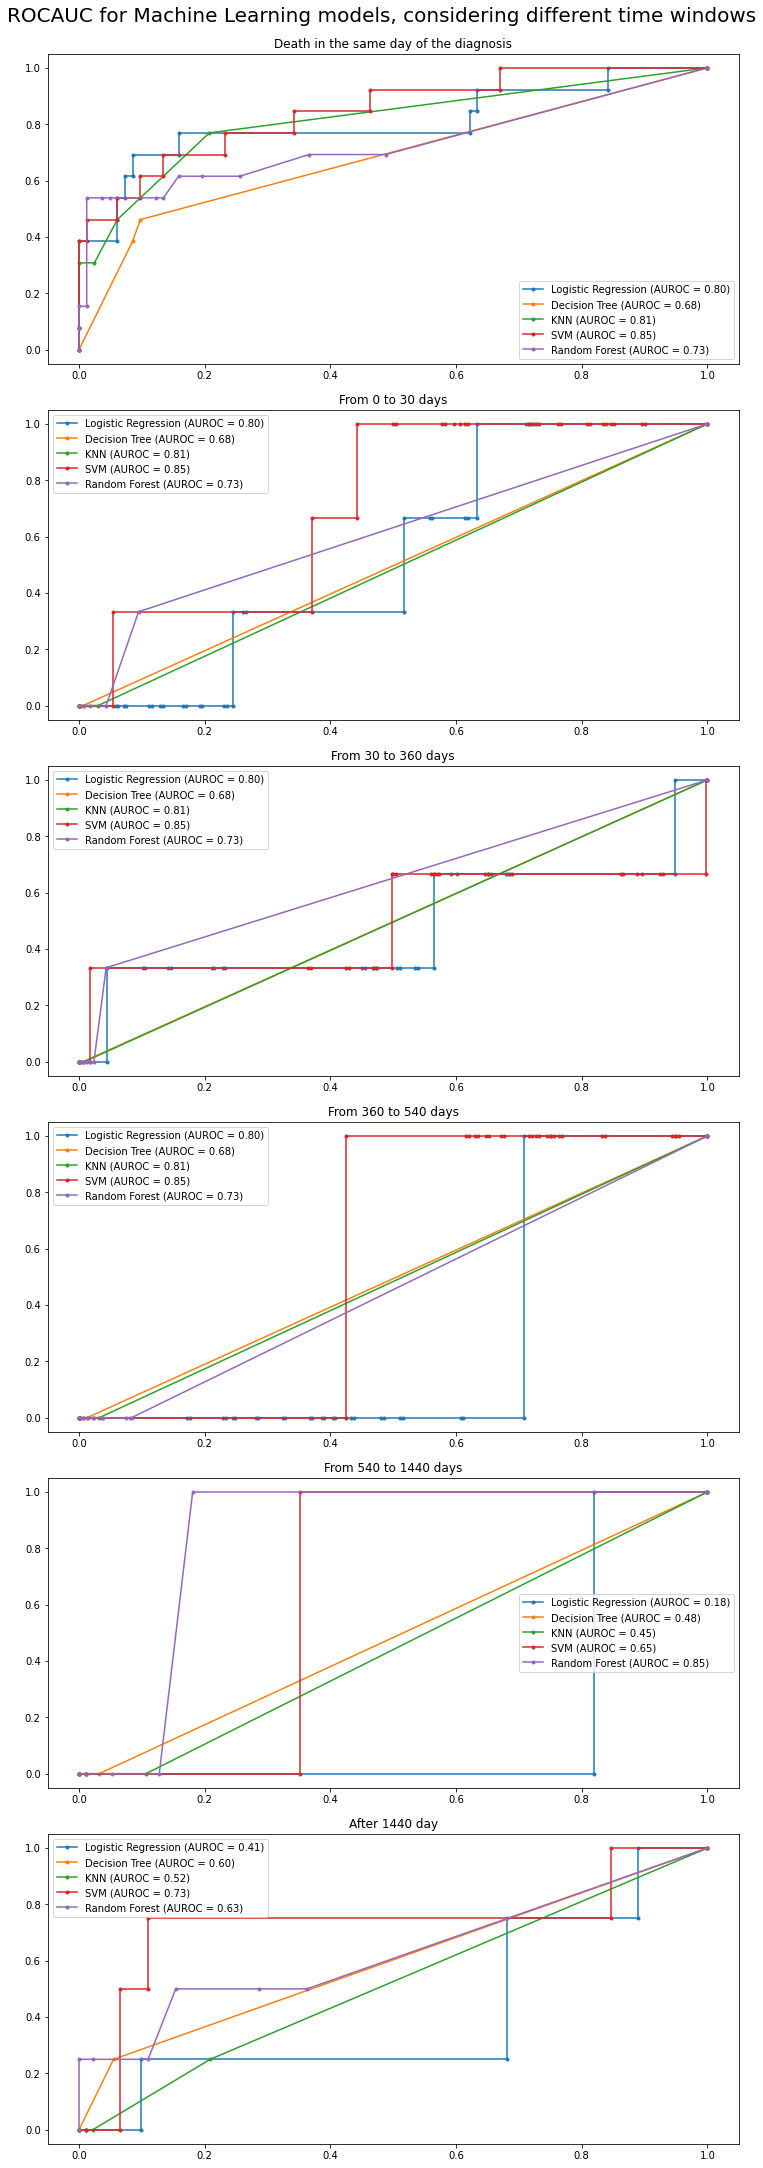

In [168]:
fig6, ax6 = plt.subplots(6, figsize=(10, 30), constrained_layout=True)
fig6.suptitle("ROCAUC for Machine Learning models, considering different time windows", fontsize=20)

ax6[0].plot(lr_fpr_0d, lr_tpr_0d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[0].plot(dt_fpr_0d, dt_tpr_0d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[0].plot(knn_fpr_0d, knn_tpr_0d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[0].plot(svm_fpr_0d, svm_tpr_0d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[0].plot(rf_fpr_0d, rf_tpr_0d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[0].legend()
ax6[0].set_title("Death in the same day of the diagnosis")

ax6[1].plot(lr_fpr_0d_30d, lr_tpr_0d_30d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[1].plot(dt_fpr_0d_30d, dt_tpr_0d_30d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[1].plot(knn_fpr_0d_30d, knn_tpr_0d_30d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[1].plot(svm_fpr_0d_30d, svm_tpr_0d_30d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[1].plot(rf_fpr_0d_30d, rf_tpr_0d_30d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[1].legend()
ax6[1].set_title("From 0 to 30 days")

ax6[2].plot(lr_fpr_30d_360d, lr_tpr_30d_360d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[2].plot(dt_fpr_30d_360d, dt_tpr_30d_360d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[2].plot(knn_fpr_30d_360d, knn_tpr_30d_360d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[2].plot(svm_fpr_30d_360d, svm_tpr_30d_360d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[2].plot(rf_fpr_30d_360d, rf_tpr_30d_360d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[2].legend()
ax6[2].set_title("From 30 to 360 days")

ax6[3].plot(lr_fpr_360d_540d, lr_tpr_360d_540d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[3].plot(dt_fpr_360d_540d, dt_tpr_360d_540d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[3].plot(knn_fpr_360d_540d, knn_tpr_360d_540d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[3].plot(svm_fpr_360d_540d, svm_tpr_360d_540d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[3].plot(rf_fpr_360d_540d, rf_tpr_360d_540d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[3].legend()
ax6[3].set_title("From 360 to 540 days")

ax6[4].plot(lr_fpr_540d_1440d, lr_tpr_540d_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_540d_1440d)
ax6[4].plot(dt_fpr_540d_1440d, dt_tpr_540d_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_540d_1440d)
ax6[4].plot(knn_fpr_540d_1440d, knn_tpr_540d_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_540d_1440d)
ax6[4].plot(svm_fpr_540d_1440d, svm_tpr_540d_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_540d_1440d)
ax6[4].plot(rf_fpr_540d_1440d, rf_tpr_540d_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_540d_1440d)
ax6[4].legend()
ax6[4].set_title("From 540 to 1440 days")

ax6[5].plot(lr_fpr_after_1440d, lr_tpr_after_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_after_1440d)
ax6[5].plot(dt_fpr_after_1440d, dt_tpr_after_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_after_1440d)
ax6[5].plot(knn_fpr_after_1440d, knn_tpr_after_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_after_1440d)
ax6[5].plot(svm_fpr_after_1440d, svm_tpr_after_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_after_1440d)
ax6[5].plot(rf_fpr_after_1440d, rf_tpr_after_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_after_1440d)
ax6[5].legend()
ax6[5].set_title("After 1440 day");

##### Avaliação de modelo com cross-validation

---



A validação cruzada para a Regressão Logística gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 90%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 0% de desvio padrão;

In [110]:
print("LOGISTIC REGRESSION")
print("Time window - Death in the same day of the diagnosis")
acuracy03_0d = cross_val_score(logistic_regression03_0d, x_data_03, y_data03_0d)
print("Acuracy:", acuracy03_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d.mean(), acuracy03_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy03_0d_30d = cross_val_score(logistic_regression03_0d_30d, x_data_03, y_data03_0d_30d)
print("Acuracy:", acuracy03_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d_30d.mean(), acuracy03_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy03_30d_360d = cross_val_score(logistic_regression03_30d_360d, x_data_03, y_data03_30d_360d)
print("Acuracy:", acuracy03_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_30d_360d.mean(), acuracy03_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy03_360d_540d = cross_val_score(logistic_regression03_360d_540d, x_data_03, y_data03_360d_540d)
print("Acuracy:", acuracy03_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_360d_540d.mean(), acuracy03_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy03_540d_1440d = cross_val_score(logistic_regression03_540d_1440d, x_data_03, y_data03_540d_1440d)
print("Acuracy:", acuracy03_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_540d_1440d.mean(), acuracy03_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy03_after_1440d = cross_val_score(logistic_regression03_after_1440d, x_data_03, y_data03_after_1440d)
print("Acuracy:", acuracy03_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_after_1440d.mean(), acuracy03_after_1440d.std()))

LOGISTIC REGRESSION
Time window - Death in the same day of the diagnosis
Acuracy: [0.90384615 0.90675241 0.88102894 0.89067524 0.90353698]
0.90 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.99358974 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.99356913]
1.00 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98392283 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96474359 0.96784566 0.96784566 0.96784566 0.96463023]
0.97 accuracy with a standard deviation of 0.00


A validação cruzada para a Árvore de Decisão gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 86%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 99%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 98%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 98%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 95%, com 1% de desvio padrão;

In [111]:
print("DECISION TREE")
print("Time window - Death in the same day of the diagnosis")
acuracy03_0d = cross_val_score(decision_tree03_0d, x_data_03, y_data03_0d)
print("Acuracy:", acuracy03_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d.mean(), acuracy03_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy03_0d_30d = cross_val_score(decision_tree03_0d_30d, x_data_03, y_data03_0d_30d)
print("Acuracy:", acuracy03_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d_30d.mean(), acuracy03_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy03_30d_360d = cross_val_score(decision_tree03_30d_360d, x_data_03, y_data03_30d_360d)
print("Acuracy:", acuracy03_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_30d_360d.mean(), acuracy03_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy03_360d_540d = cross_val_score(decision_tree03_360d_540d, x_data_03, y_data03_360d_540d)
print("Acuracy:", acuracy03_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_360d_540d.mean(), acuracy03_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy03_540d_1440d = cross_val_score(decision_tree03_540d_1440d, x_data_03, y_data03_540d_1440d)
print("Acuracy:", acuracy03_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_540d_1440d.mean(), acuracy03_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy03_after_1440d = cross_val_score(decision_tree03_after_1440d, x_data_03, y_data03_after_1440d)
print("Acuracy:", acuracy03_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_after_1440d.mean(), acuracy03_after_1440d.std()))

DECISION TREE
Time window - Death in the same day of the diagnosis
Acuracy: [0.86538462 0.8488746  0.86495177 0.84244373 0.86495177]
0.86 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.98076923 0.98392283 0.99356913 0.9903537  0.9903537 ]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99038462 0.99356913 0.9903537  0.99678457 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.98076923 0.98392283 0.97749196 0.98713826 0.9807074 ]
0.98 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98397436 0.9807074  0.97106109 0.97749196 0.97749196]
0.98 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.93910256 0.95819936 0.93890675 0.96784566 0.94855305]
0.95 accuracy with a standard deviation of 0.01


Para o KNN, a validação cruzada para as faixas de tempo geraram as seguintes acurácias:

* Intervalo de mesmo dia do diagnóstico: 89%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 96%, com 0% de desvio padrão;

In [112]:
print("k-Nearest Neighbors - kNN")
print("Time window - Death in the same day of the diagnosis")
acuracy03_0d = cross_val_score(knn_prognosis03_0d, x_data_03, y_data03_0d)
print("Acuracy:", acuracy03_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d.mean(), acuracy03_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy03_0d_30d = cross_val_score(knn_prognosis03_0d_30d, x_data_03, y_data03_0d_30d)
print("Acuracy:", acuracy03_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d_30d.mean(), acuracy03_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy03_30d_360d = cross_val_score(knn_prognosis03_30d_360d, x_data_03, y_data03_30d_360d)
print("Acuracy:", acuracy03_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_30d_360d.mean(), acuracy03_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy03_360d_540d = cross_val_score(knn_prognosis03_360d_540d, x_data_03, y_data03_360d_540d)
print("Acuracy:", acuracy03_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_360d_540d.mean(), acuracy03_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy03_540d_1440d = cross_val_score(knn_prognosis03_540d_1440d, x_data_03, y_data03_540d_1440d)
print("Acuracy:", acuracy03_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_540d_1440d.mean(), acuracy03_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy03_after_1440d = cross_val_score(knn_prognosis03_after_1440d, x_data_03, y_data03_after_1440d)
print("Acuracy:", acuracy03_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_after_1440d.mean(), acuracy03_after_1440d.std()))

k-Nearest Neighbors - kNN
Time window - Death in the same day of the diagnosis
Acuracy: [0.91346154 0.88102894 0.87138264 0.88745981 0.88424437]
0.89 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.99358974 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.99356913]
1.00 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98713826 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96153846 0.97106109 0.96141479 0.96784566 0.96141479]
0.96 accuracy with a standard deviation of 0.00


A validação cruzada para a SVM gerou os seguintes valores de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 90%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 0% de desvio padrão;

In [113]:
print("Support Vector Machine - SVM")
print("Time window - Death in the same day of the diagnosis")
acuracy03_0d = cross_val_score(svm_prognosis03_0d, x_data_03, y_data03_0d)
print("Acuracy:", acuracy03_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d.mean(), acuracy03_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy03_0d_30d = cross_val_score(svm_prognosis03_0d_30d, x_data_03, y_data03_0d_30d)
print("Acuracy:", acuracy03_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d_30d.mean(), acuracy03_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy03_30d_360d = cross_val_score(svm_prognosis03_30d_360d, x_data_03, y_data03_30d_360d)
print("Acuracy:", acuracy03_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_30d_360d.mean(), acuracy03_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy03_360d_540d = cross_val_score(svm_prognosis03_360d_540d, x_data_03, y_data03_360d_540d)
print("Acuracy:", acuracy03_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_360d_540d.mean(), acuracy03_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy03_540d_1440d = cross_val_score(svm_prognosis03_540d_1440d, x_data_03, y_data03_540d_1440d)
print("Acuracy:", acuracy03_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_540d_1440d.mean(), acuracy03_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy03_after_1440d = cross_val_score(svm_prognosis03_after_1440d, x_data_03, y_data03_after_1440d)
print("Acuracy:", acuracy03_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_after_1440d.mean(), acuracy03_after_1440d.std()))

Support Vector Machine - SVM
Time window - Death in the same day of the diagnosis
Acuracy: [0.90705128 0.90353698 0.88424437 0.88745981 0.90675241]
0.90 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.99358974 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.99356913]
1.00 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98392283 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96474359 0.96784566 0.96784566 0.96784566 0.96463023]
0.97 accuracy with a standard deviation of 0.00


A validação cruzada para o Random Forest gerou os seguintes resultados de acurácias para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 89%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 99%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 96%, com 0% de desvio padrão;

In [114]:
print("RANDOM FOREST")
print("Time window - Death in the same day of the diagnosis")
acuracy03_0d = cross_val_score(random_forest_prognosis03_0d, x_data_03, y_data03_0d)
print("Acuracy:", acuracy03_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d.mean(), acuracy03_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy03_0d_30d = cross_val_score(random_forest_prognosis03_0d_30d, x_data_03, y_data03_0d_30d)
print("Acuracy:", acuracy03_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_0d_30d.mean(), acuracy03_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy03_30d_360d = cross_val_score(random_forest_prognosis03_30d_360d, x_data_03, y_data03_30d_360d)
print("Acuracy:", acuracy03_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_30d_360d.mean(), acuracy03_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy03_360d_540d = cross_val_score(random_forest_prognosis03_360d_540d, x_data_03, y_data03_360d_540d)
print("Acuracy:", acuracy03_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_360d_540d.mean(), acuracy03_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy03_540d_1440d = cross_val_score(random_forest_prognosis03_540d_1440d, x_data_03, y_data03_540d_1440d)
print("Acuracy:", acuracy03_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_540d_1440d.mean(), acuracy03_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy03_after_1440d = cross_val_score(random_forest_prognosis03_after_1440d, x_data_03, y_data03_after_1440d)
print("Acuracy:", acuracy03_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy03_after_1440d.mean(), acuracy03_after_1440d.std()))

RANDOM FOREST
Time window - Death in the same day of the diagnosis
Acuracy: [0.88782051 0.88424437 0.90675241 0.89067524 0.88424437]
0.89 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.99038462 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.9903537 ]
0.99 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98713826 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96474359 0.96784566 0.96141479 0.96463023 0.96463023]
0.96 accuracy with a standard deviation of 0.00


### 4º caso: treino e teste com o cenário 3, teste com os cenários 1 e 2 concatenados

---



No 4º caso, o treino dos modelos de aprendizado de máquina será feito no cenários 3 concatenados e o teste será realizado no dataset dos cenários 1 e 2 concatenados.


Usaremos ``StandardScaler`` para padronizar as features para uma unidade de variância (var = 1), visto que as variáveis de entrada do cenário 3 também estão em escalas diferentes.

Nesse caso, como usaremos os modelos treinados no cenário 3 precisaremos tranformar os dados de entrada em relação a média e desvio padrão dos dados de treino.

In [115]:
x_test = scaler_03.transform(X_test)

#### Modelos de Machine Learning

---



Assim como o 2º caso, não será necessário realizar o treino dos modelos novamente, visto que já foi feito no caso anterior. Nos blocos abaixo serão realizadas as predições (`predict`) para os dados dos cenários 1 e 2 concatenados.

##### Regressão Logística

---



In [116]:
y_pred_log_reg03_12_0d = logistic_regression03_0d.predict(x_test)
y_pred_log_reg03_12_0d_30d = logistic_regression03_0d_30d.predict(x_test)
y_pred_log_reg03_12_30d_360d = logistic_regression03_30d_360d.predict(x_test)
y_pred_log_reg03_12_360d_540d = logistic_regression03_360d_540d.predict(x_test)
y_pred_log_reg03_12_540d_1440d = logistic_regression03_540d_1440d.predict(x_test)
y_pred_log_reg03_12_after_1440d = logistic_regression03_after_1440d.predict(x_test)

##### Árvore de Decisão (Decision Tree)

---



In [117]:
y_pred_decision_tree03_12_0d = decision_tree03_0d.predict(x_test)
y_pred_decision_tree03_12_0d_30d = decision_tree03_0d_30d.predict(x_test)
y_pred_decision_tree03_12_30d_360d = decision_tree03_30d_360d.predict(x_test)
y_pred_decision_tree03_12_360d_540d = decision_tree03_360d_540d.predict(x_test)
y_pred_decision_tree03_12_540d_1440d = decision_tree03_540d_1440d.predict(x_test)
y_pred_decision_tree03_12_after_1440d = decision_tree03_after_1440d.predict(x_test)

##### Aprendizagem baseada em instâncias (k-Nearest Neighbors) - kNN

---



In [118]:
y_pred_knn03_12_0d = knn_prognosis03_0d.predict(x_test)
y_pred_knn03_12_0d_30d = knn_prognosis03_0d_30d.predict(x_test)
y_pred_knn03_12_30d_360d = knn_prognosis03_30d_360d.predict(x_test)
y_pred_knn03_12_360d_540d = knn_prognosis03_360d_540d.predict(x_test)
y_pred_knn03_12_540d_1440d = knn_prognosis03_540d_1440d.predict(x_test)
y_pred_knn03_12_after_1440d = knn_prognosis03_after_1440d.predict(x_test)


##### Máquina de Vetor de Suporte (Support Vector Machine) - SVM

---



In [119]:
y_pred_svm03_12_0d = svm_prognosis03_0d.predict(x_test)
y_pred_svm03_12_0d_30d = svm_prognosis03_0d_30d.predict(x_test)
y_pred_svm03_12_30d_360d = svm_prognosis03_30d_360d.predict(x_test)
y_pred_svm03_12_360d_540d = svm_prognosis03_360d_540d.predict(x_test)
y_pred_svm03_12_540d_1440d = svm_prognosis03_540d_1440d.predict(x_test)
y_pred_svm03_12_after_1440d = svm_prognosis03_after_1440d.predict(x_test)


##### Random Forest

---



In [120]:
y_pred_random_forest03_12_0d = random_forest_prognosis03_0d.predict(x_test)
y_pred_random_forest03_12_0d_30d = random_forest_prognosis03_0d_30d.predict(x_test)
y_pred_random_forest03_12_30d_360d = random_forest_prognosis03_30d_360d.predict(x_test)
y_pred_random_forest03_12_360d_540d = random_forest_prognosis03_360d_540d.predict(x_test)
y_pred_random_forest03_12_540d_1440d = random_forest_prognosis03_540d_1440d.predict(x_test)
y_pred_random_forest03_12_after_1440d = random_forest_prognosis03_after_1440d.predict(x_test)

#### Avaliação dos modelos

---



##### Matriz de confusão

---



A matriz de confusão para o caso de morte no mesmo dia do diagnóstico pode ser interpretada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 82 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 4 casos e incorretamente 9 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 75 casos e incorretamente 7 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 5 casos e incorretamente 8 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 80 casos e incorretamente 2 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 4 casos e incorretamente 9 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 82 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 4 casos e incorretamente 9 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 81 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu corretamente 6 casos e incorretamente 7 casos.

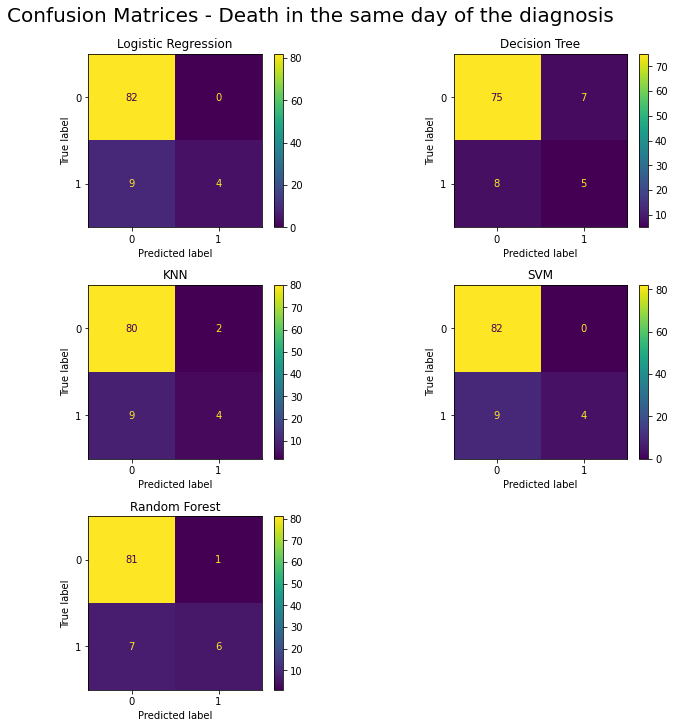

In [121]:
fig6, ax6 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig6.suptitle("Confusion Matrices - Death in the same day of the diagnosis", fontsize=20)

cm_logistic_regression03_12_0d = confusion_matrix(y_test_0d, y_pred_log_reg03_12_0d)
ConfusionMatrixDisplay(cm_logistic_regression03_12_0d).plot(ax=ax6[0, 0])
ax6[0, 0].set_title("Logistic Regression")
ax6[0, 0].grid(False)

cm_decision_tree03_12_0d = confusion_matrix(y_test_0d, y_pred_decision_tree03_12_0d)
ConfusionMatrixDisplay(cm_decision_tree03_12_0d).plot(ax=ax6[0, 1])
ax6[0, 1].set_title("Decision Tree")
ax6[0, 1].grid(False)

cm_knn03_12_0d = confusion_matrix(y_test_0d, y_pred_knn03_12_0d)
ConfusionMatrixDisplay(cm_knn03_12_0d).plot(ax=ax6[1, 0])
ax6[1, 0].set_title("KNN")
ax6[1, 0].grid(False)

cm_svm03_12_0d = confusion_matrix(y_test_0d, y_pred_svm03_12_0d)
ConfusionMatrixDisplay(cm_svm03_12_0d).plot(ax=ax6[1, 1])
ax6[1, 1].set_title("SVM")
ax6[1, 1].grid(False)

cm_random_forest03_12_0d = confusion_matrix(y_test_0d, y_pred_random_forest03_12_0d)
ConfusionMatrixDisplay(cm_random_forest03_12_0d).plot(ax=ax6[2, 0])
ax6[2, 0].set_title("Random Forest")
ax6[2, 0].grid(False)

ax6[2, 1].set_visible(False)

Na faixa de 0 a 30 dias o conjunto de teste não nos permite analisar o desempenho dos modelos por conter dados de apenas uma classe. Portanto, a matriz de confusão desse intervalo de tempo demonstra que:

 * Todos os modelos preveram corretamente os 95 casos da classe 0.

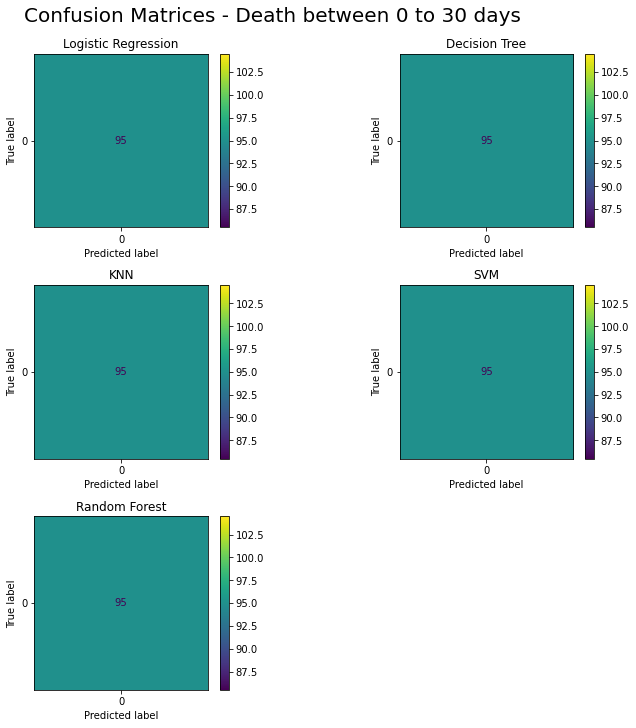

In [122]:
fig7, ax7 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig7.suptitle("Confusion Matrices - Death between 0 to 30 days", fontsize=20)

cm_logistic_regression03_12_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_log_reg03_12_0d_30d)
ConfusionMatrixDisplay(cm_logistic_regression03_12_0d_30d).plot(ax=ax7[0, 0])
ax7[0, 0].set_title("Logistic Regression")
ax7[0, 0].grid(False)

cm_decision_tree03_12_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_decision_tree03_12_0d_30d)
ConfusionMatrixDisplay(cm_decision_tree03_12_0d_30d).plot(ax=ax7[0, 1])
ax7[0, 1].set_title("Decision Tree")
ax7[0, 1].grid(False)

cm_knn03_12_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_knn03_12_0d_30d)
ConfusionMatrixDisplay(cm_knn03_12_0d_30d).plot(ax=ax7[1, 0])
ax7[1, 0].set_title("KNN")
ax7[1, 0].grid(False)

cm_svm03_12_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_svm03_12_0d_30d)
ConfusionMatrixDisplay(cm_svm03_12_0d_30d).plot(ax=ax7[1, 1])
ax7[1, 1].set_title("SVM")
ax7[1, 1].grid(False)

cm_random_forest03_12_0d_30d = confusion_matrix(y_test_0d_30d, y_pred_random_forest03_12_0d_30d)
ConfusionMatrixDisplay(cm_random_forest03_12_0d_30d).plot(ax=ax7[2, 0])
ax7[2, 0].set_title("Random Forest")
ax7[2, 0].grid(False)

ax7[2, 1].set_visible(False)

Na faixa de 30 a 360 dias o conjunto de teste também não nos permite analisar o desempenho dos modelos por conter dados de apenas uma classe. Portanto, a matriz de confusão desse intervalo de tempo demonstra que:

 * Todos os modelos preveram corretamente os 95 casos da classe 0.

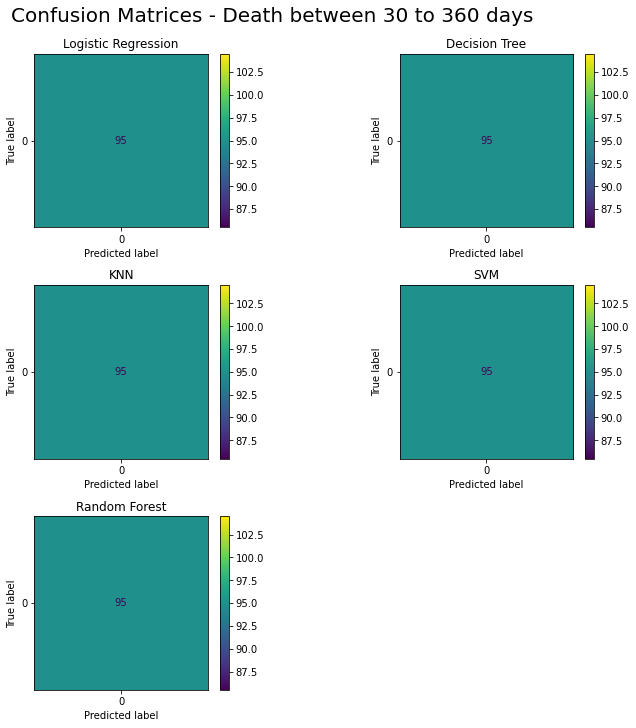

In [167]:
fig8, ax8 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig8.suptitle("Confusion Matrices - Death between 30 to 360 days", fontsize=20)

cm_logistic_regression03_12_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_log_reg03_12_30d_360d)
ConfusionMatrixDisplay(cm_logistic_regression03_12_30d_360d).plot(ax=ax8[0, 0])
ax8[0, 0].set_title("Logistic Regression")
ax8[0, 0].grid(False)

cm_decision_tree03_12_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_decision_tree03_12_30d_360d)
ConfusionMatrixDisplay(cm_decision_tree03_12_30d_360d).plot(ax=ax8[0, 1])
ax8[0, 1].set_title("Decision Tree")
ax8[0, 1].grid(False)

cm_knn03_12_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_knn03_12_30d_360d)
ConfusionMatrixDisplay(cm_knn03_12_30d_360d).plot(ax=ax8[1, 0])
ax8[1, 0].set_title("KNN")
ax8[1, 0].grid(False)

cm_svm03_12_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_svm03_12_30d_360d)
ConfusionMatrixDisplay(cm_svm03_12_30d_360d).plot(ax=ax8[1, 1])
ax8[1, 1].set_title("SVM")
ax8[1, 1].grid(False)

cm_random_forest03_12_30d_360d = confusion_matrix(y_test_30d_360d, y_pred_random_forest03_12_30d_360d)
ConfusionMatrixDisplay(cm_random_forest03_12_30d_360d).plot(ax=ax8[2, 0])
ax8[2, 0].set_title("Random Forest")
ax8[2, 0].grid(False)

ax8[2, 1].set_visible(False)

Na faixa de 360 a 540 dias, assim como nos intervalos anteriores o conjunto de teste também não nos permite analisar o desempenho dos modelos por conter dados de apenas uma classe. Logo, a matriz de confusão desse intervalo de tempo demonstra que:

 * Todos os modelos preveram corretamente os 95 casos da classe 0.

In [124]:
fig9, ax9 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig9.suptitle("Confusion Matrices - Death between 360 to 540 days", fontsize=20)

cm_logistic_regression03_12_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_log_reg03_12_360d_540d)
ConfusionMatrixDisplay(cm_logistic_regression03_12_360d_540d).plot(ax=ax9[0, 0])
ax9[0, 0].set_title("Logistic Regression")
ax9[0, 0].grid(False)

cm_decision_tree03_12_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_decision_tree03_12_360d_540d)
ConfusionMatrixDisplay(cm_decision_tree03_12_360d_540d).plot(ax=ax9[0, 1])
ax9[0, 1].set_title("Decision Tree")
ax9[0, 1].grid(False)

cm_knn03_12_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_knn03_12_360d_540d)
ConfusionMatrixDisplay(cm_knn03_12_360d_540d).plot(ax=ax9[1, 0])
ax9[1, 0].set_title("KNN")
ax9[1, 0].grid(False)

cm_svm03_12_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_svm03_12_360d_540d)
ConfusionMatrixDisplay(cm_svm03_12_360d_540d).plot(ax=ax9[1, 1])
ax9[1, 1].set_title("SVM")
ax9[1, 1].grid(False)

cm_random_forest03_12_360d_540d = confusion_matrix(y_test_360d_540d, y_pred_random_forest03_12_360d_540d)
ConfusionMatrixDisplay(cm_random_forest03_12_360d_540d).plot(ax=ax9[2, 0])
ax9[2, 0].set_title("Random Forest")
ax9[2, 0].grid(False)

ax9[2, 1].set_visible(False)

A matriz de confusão para a faixa de 540 a 1440 dias pode ser interpretada da seguinte forma:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 91 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 94 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

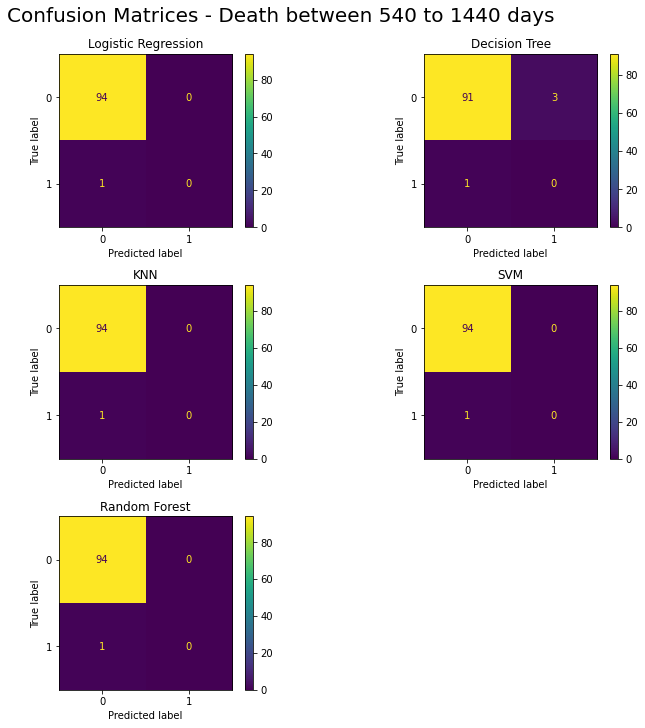

In [125]:
fig10, ax10 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig10.suptitle("Confusion Matrices - Death between 540 to 1440 days", fontsize=20)

cm_logistic_regression03_12_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_log_reg03_12_540d_1440d)
ConfusionMatrixDisplay(cm_logistic_regression03_12_540d_1440d).plot(ax=ax10[0, 0])
ax10[0, 0].set_title("Logistic Regression")
ax10[0, 0].grid(False)

cm_decision_tree03_12_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_decision_tree03_12_540d_1440d)
ConfusionMatrixDisplay(cm_decision_tree03_12_540d_1440d).plot(ax=ax10[0, 1])
ax10[0, 1].set_title("Decision Tree")
ax10[0, 1].grid(False)

cm_knn03_12_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_knn03_12_540d_1440d)
ConfusionMatrixDisplay(cm_knn03_12_540d_1440d).plot(ax=ax10[1, 0])
ax10[1, 0].set_title("KNN")
ax10[1, 0].grid(False)

cm_svm03_12_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_svm03_12_540d_1440d)
ConfusionMatrixDisplay(cm_svm03_12_540d_1440d).plot(ax=ax10[1, 1])
ax10[1, 1].set_title("SVM")
ax10[1, 1].grid(False)

cm_random_forest03_12_540d_1440d = confusion_matrix(y_test_540d_1440d, y_pred_random_forest03_12_540d_1440d)
ConfusionMatrixDisplay(cm_random_forest03_12_540d_1440d).plot(ax=ax10[2, 0])
ax10[2, 0].set_title("Random Forest")
ax10[2, 0].grid(False)

ax10[2, 1].set_visible(False)

Para o intervalo acima de 1440 dias, a matriz de confusão pode ser interpretada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 4 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 86 casos e incorretamente 5 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 1 caso e incorretamente 3 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 90 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 4 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 4 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 91 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 1 caso e incorretamente 3 casos.

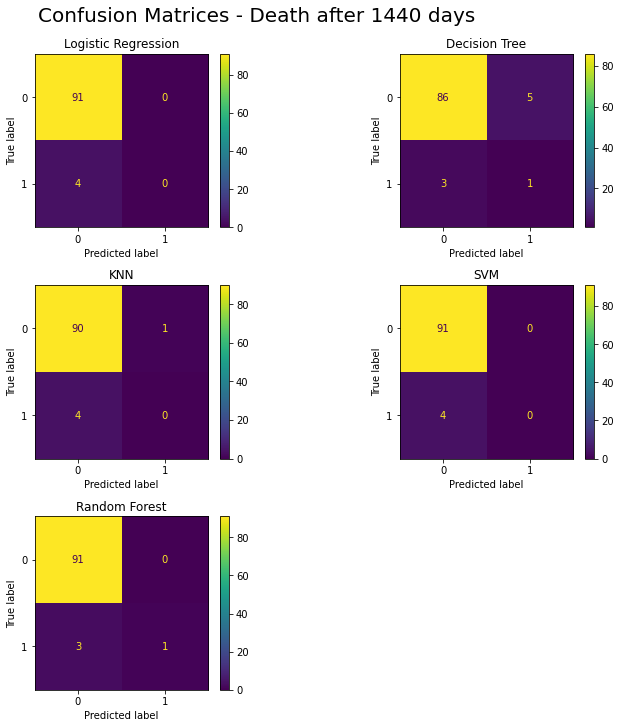

In [126]:
fig11, ax11 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig11.suptitle("Confusion Matrices - Death after 1440 days", fontsize=20)

cm_logistic_regression03_12_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_log_reg03_12_after_1440d)
ConfusionMatrixDisplay(cm_logistic_regression03_12_after_1440d).plot(ax=ax11[0, 0])
ax11[0, 0].set_title("Logistic Regression")
ax11[0, 0].grid(False)

cm_decision_tree03_12_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_decision_tree03_12_after_1440d)
ConfusionMatrixDisplay(cm_decision_tree03_12_after_1440d).plot(ax=ax11[0, 1])
ax11[0, 1].set_title("Decision Tree")
ax11[0, 1].grid(False)

cm_knn03_12_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_knn03_12_after_1440d)
ConfusionMatrixDisplay(cm_knn03_12_after_1440d).plot(ax=ax11[1, 0])
ax11[1, 0].set_title("KNN")
ax11[1, 0].grid(False)

cm_svm03_12_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_svm03_12_after_1440d)
ConfusionMatrixDisplay(cm_svm03_12_after_1440d).plot(ax=ax11[1, 1])
ax11[1, 1].set_title("SVM")
ax11[1, 1].grid(False)

cm_random_forest03_12_after_1440d = confusion_matrix(y_test_after_1440d, y_pred_random_forest03_12_after_1440d)
ConfusionMatrixDisplay(cm_random_forest03_12_after_1440d).plot(ax=ax11[2, 0])
ax11[2, 0].set_title("Random Forest")
ax11[2, 0].grid(False)

ax11[2, 1].set_visible(False)

##### Acurácia, Precisão, Revocação e F1-Score

---



Os dados do `classification_report` para a faixa do mesmo dia do diagnóstico conclui que:

* Os modelos tiveram acurácia acima de 84%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Considerando a precisão dos modelos no caso de morte, os modelos obtiveram valores acima de 42%, com os melhores resultados para a Regressão Logística e a SVM, com 100%;
* Ao analisar a revocação para o caso de morte, vemos que os modelos não performaram bem, tendo seu maior valor no *Random Forest*, com 46%;
* Avaliando o F1-score para casos de morte, temos que o melhor modelo foi o *Random Forest*, obtendo 60%.

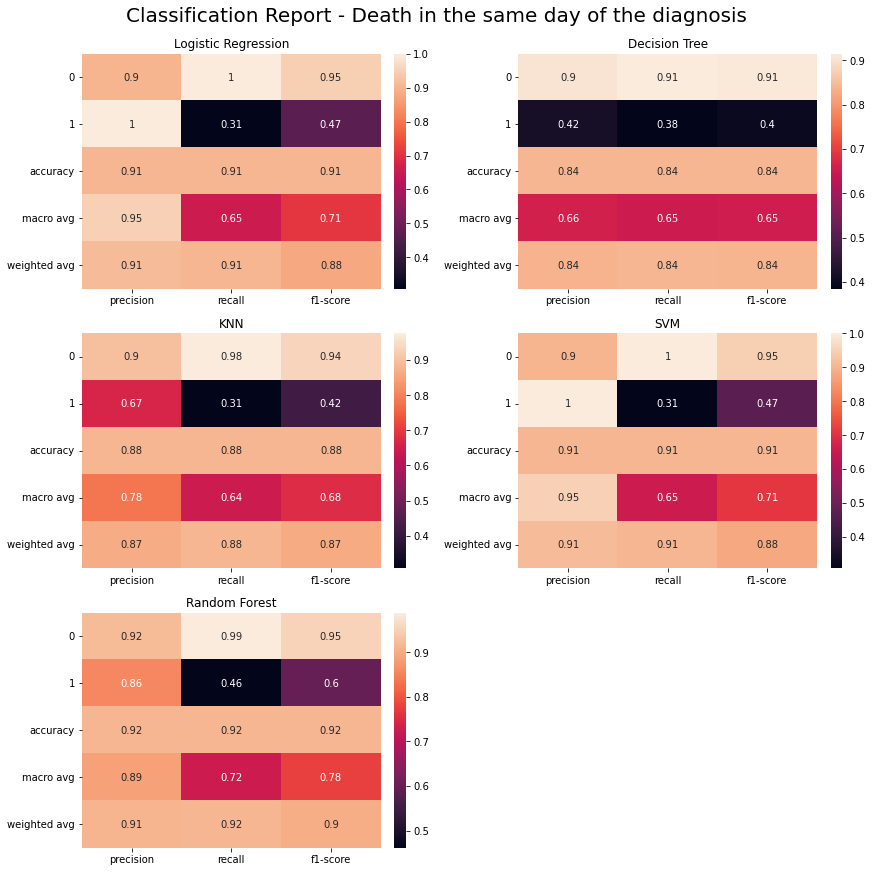

In [127]:
report_log_reg_03_12_0d = classification_report(y_test_0d, y_pred_log_reg03_12_0d, zero_division=1, output_dict=True)
report_dec_tree_03_12_0d = classification_report(y_test_0d, y_pred_decision_tree03_12_0d, zero_division=1, output_dict=True)
report_knn_03_12_0d = classification_report(y_test_0d, y_pred_knn03_12_0d, zero_division=1, output_dict=True)
report_svm_03_12_0d = classification_report(y_test_0d, y_pred_svm03_12_0d, zero_division=1, output_dict=True)
report_random_forest_03_12_0d = classification_report(y_test_0d, y_pred_random_forest03_12_0d, zero_division=1, output_dict=True)

fig0, ax0 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig0.suptitle("Classification Report - Death in the same day of the diagnosis", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_12_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 0])
ax0[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_12_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 1])
ax0[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_12_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 0])
ax0[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_12_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 1])
ax0[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_12_0d).iloc[:-1, :].T, annot=True, ax=ax0[2, 0])
ax0[2, 0].set_title("Random Forest")

ax0[2, 1].set_visible(False)

As métricas do `classification_report` para a faixa de tempo de 0 a 30 dias do registro do diagnóstico demonstram que:

* O desbalanceamento da base de dados gerou um conjunto de teste que possui apenas uma classe (0) para essa faixa de tempo, portanto não foi possível avaliar a eficácia dos modelos.

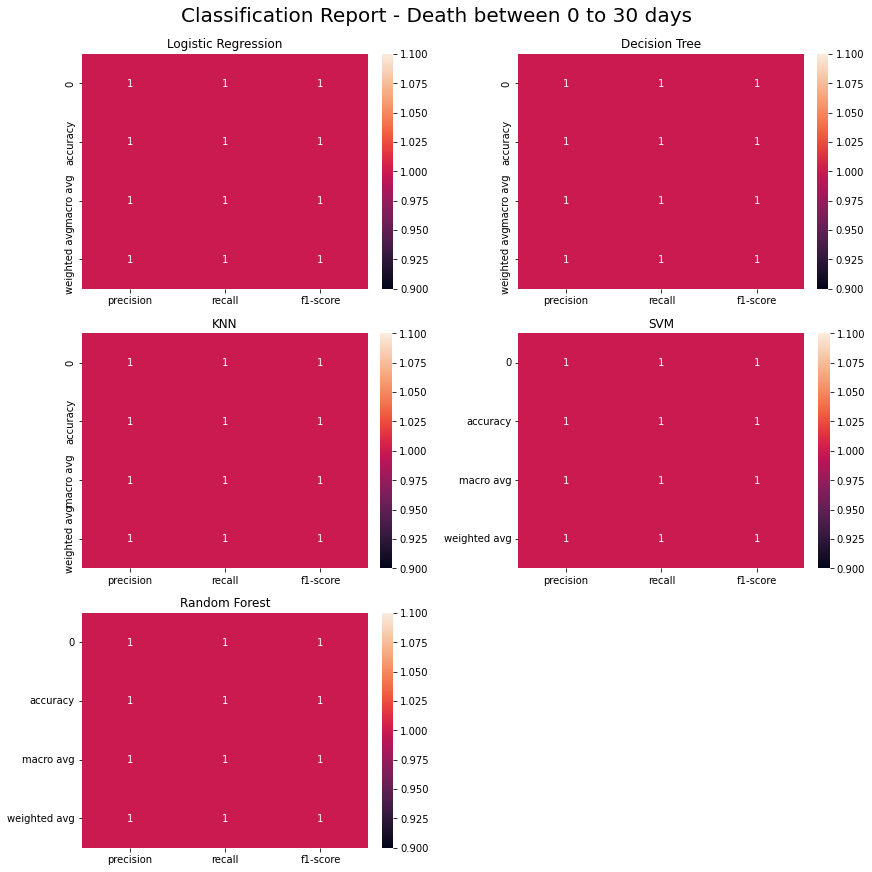

In [128]:
report_log_reg_03_12_0d_30d = classification_report(y_test_0d_30d, y_pred_log_reg03_12_0d_30d, zero_division=1, output_dict=True)
report_dec_tree_03_12_0d_30d = classification_report(y_test_0d_30d, y_pred_decision_tree03_12_0d_30d, zero_division=1, output_dict=True)
report_knn_03_12_0d_30d = classification_report(y_test_0d_30d, y_pred_knn03_12_0d_30d, zero_division=1, output_dict=True)
report_svm_03_12_0d_30d = classification_report(y_test_0d_30d, y_pred_svm03_12_0d_30d, zero_division=1, output_dict=True)
report_random_forest_03_12_0d_30d = classification_report(y_test_0d_30d, y_pred_random_forest03_12_0d_30d, zero_division=1, output_dict=True)

fig1, ax1 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig1.suptitle("Classification Report - Death between 0 to 30 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_12_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 0])
ax1[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_12_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 1])
ax1[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_12_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 0])
ax1[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_12_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 1])
ax1[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_12_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[2, 0])
ax1[2, 0].set_title("Random Forest")

ax1[2, 1].set_visible(False)

Para a faixa de 30 a 360 dias, os dados do `classification_report` demonstram que:

* O desbalanceamento da base de dados gerou um conjunto de teste que possui apenas uma classe (0) para essa faixa de tempo, portanto não foi possível avaliar a eficácia dos modelos.

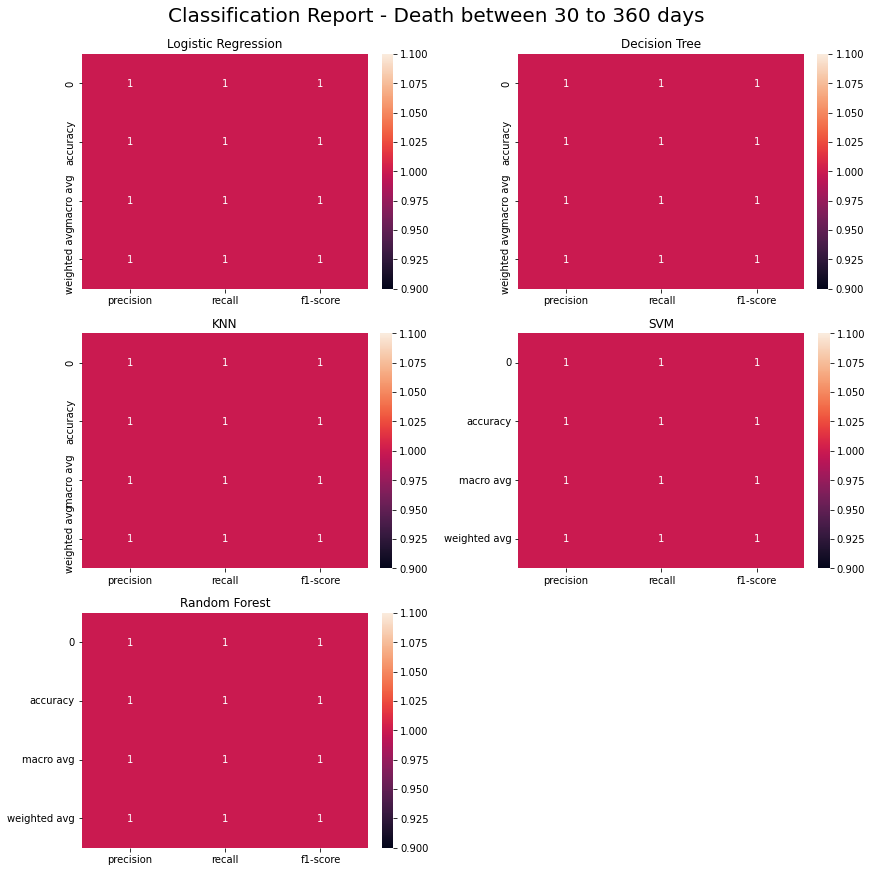

In [129]:
report_log_reg_03_12_30d_360d = classification_report(y_test_30d_360d, y_pred_log_reg03_12_30d_360d, zero_division=1, output_dict=True)
report_dec_tree_03_12_30d_360d = classification_report(y_test_30d_360d, y_pred_decision_tree03_12_30d_360d, zero_division=1, output_dict=True)
report_knn_03_12_30d_360d = classification_report(y_test_30d_360d, y_pred_knn03_12_30d_360d, zero_division=1, output_dict=True)
report_svm_03_12_30d_360d = classification_report(y_test_30d_360d, y_pred_svm03_12_30d_360d, zero_division=1, output_dict=True)
report_random_forest_03_12_30d_360d = classification_report(y_test_30d_360d, y_pred_random_forest03_12_30d_360d, zero_division=1, output_dict=True)

fig2, ax2 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig2.suptitle("Classification Report - Death between 30 to 360 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_12_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 0])
ax2[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_12_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 1])
ax2[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_12_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 0])
ax2[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_12_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 1])
ax2[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_12_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[2, 0])
ax2[2, 0].set_title("Random Forest")

ax2[2, 1].set_visible(False)

Assim como os intervalos anteriores, o `classification_report` da faixa de 360 a 540 dias demonstra que:

* O desbalanceamento da base de dados gerou um conjunto de teste que possui apenas uma classe (0) para essa faixa de tempo, portanto não foi possível avaliar a eficácia dos modelos.

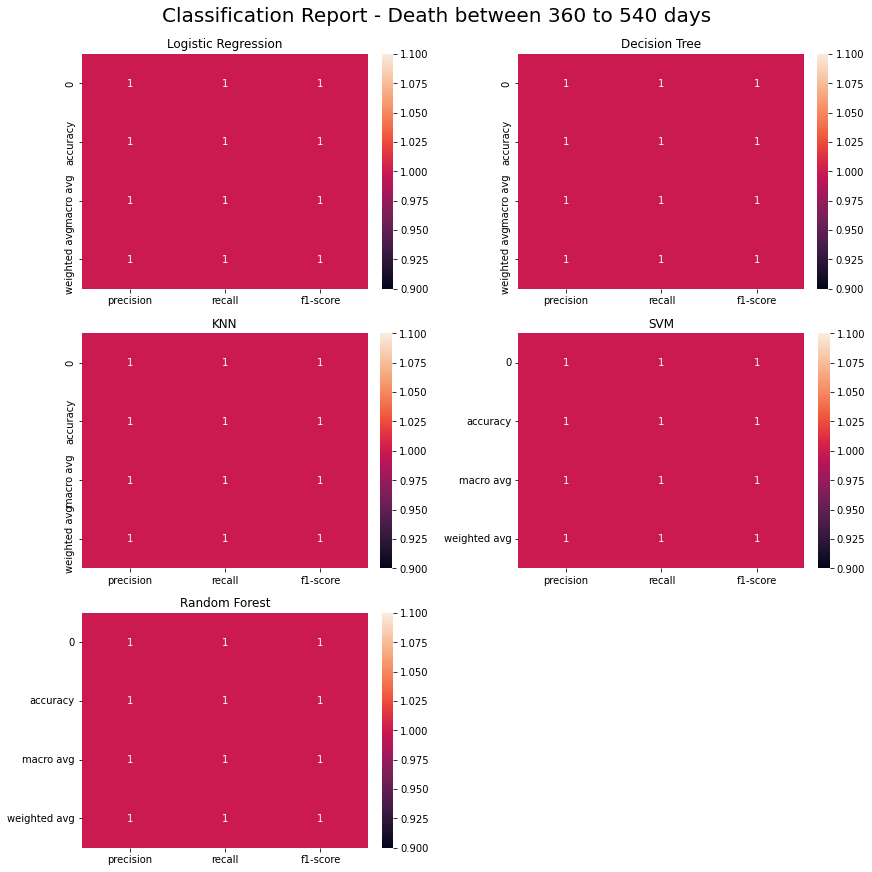

In [130]:
report_log_reg_03_12_360d_540d = classification_report(y_test_360d_540d, y_pred_log_reg03_12_360d_540d, zero_division=1, output_dict=True)
report_dec_tree_03_12_360d_540d = classification_report(y_test_360d_540d, y_pred_decision_tree03_12_360d_540d, zero_division=1, output_dict=True)
report_knn_03_12_360d_540d = classification_report(y_test_360d_540d, y_pred_knn03_12_360d_540d, zero_division=1, output_dict=True)
report_svm_03_12_360d_540d = classification_report(y_test_360d_540d, y_pred_svm03_12_360d_540d, zero_division=1, output_dict=True)
report_random_forest_03_12_360d_540d = classification_report(y_test_360d_540d, y_pred_random_forest03_12_360d_540d, zero_division=1, output_dict=True)

fig3, ax3 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig3.suptitle("Classification Report - Death between 360 to 540 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_12_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 0])
ax3[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_12_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 1])
ax3[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_12_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 0])
ax3[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_12_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 1])
ax3[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_12_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[2, 0])
ax3[2, 0].set_title("Random Forest")

ax3[2, 1].set_visible(False)

Os dados do `classification_report` para a faixa de 540 a 1440 dias concluem que:

* Todos os modelos tiveram acurácia de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

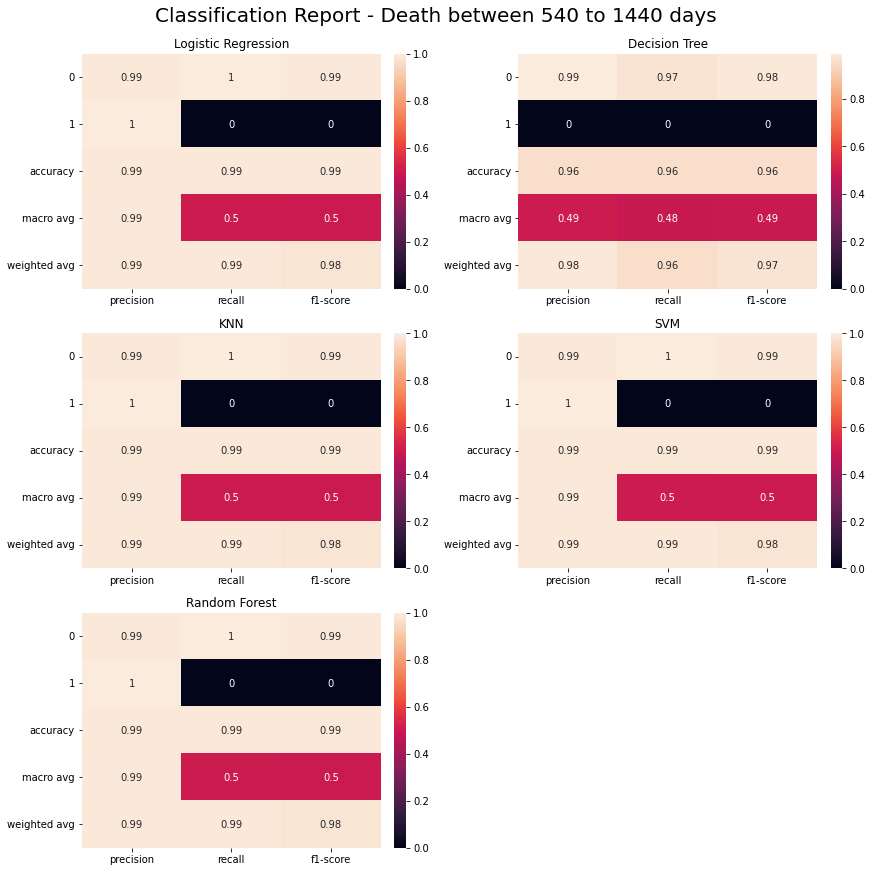

In [131]:
report_log_reg_03_12_540d_1440d = classification_report(y_test_540d_1440d, y_pred_log_reg03_12_540d_1440d, zero_division=1, output_dict=True)
report_dec_tree_03_12_540d_1440d = classification_report(y_test_540d_1440d, y_pred_decision_tree03_12_540d_1440d, zero_division=1, output_dict=True)
report_knn_03_12_540d_1440d = classification_report(y_test_540d_1440d, y_pred_knn03_12_540d_1440d, zero_division=1, output_dict=True)
report_svm_03_12_540d_1440d = classification_report(y_test_540d_1440d, y_pred_svm03_12_540d_1440d, zero_division=1, output_dict=True)
report_random_forest_03_12_540d_1440d = classification_report(y_test_540d_1440d, y_pred_random_forest03_12_540d_1440d, zero_division=1, output_dict=True)

fig4, ax4 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig4.suptitle("Classification Report - Death between 540 to 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_12_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 0])
ax4[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_12_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 1])
ax4[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_12_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 0])
ax4[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_12_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 1])
ax4[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_12_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[2, 0])
ax4[2, 0].set_title("Random Forest")

ax4[2, 1].set_visible(False)

O `classification_report` para a faixa acima de 1440 dias conclui que:

* Os modelos tiveram acurácia acima de 92%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Considerando a precisão dos modelos no caso de morte, os modelos obtiveram valores acima de 17%, com os melhores resultados para *Random Forest*, com 100%;
* Ao analisar a revocação para o caso de morte, vemos que os modelos não performaram bem, tendo seu maior valor na Árvore de Decisão e *Random Forest*, com 25%.

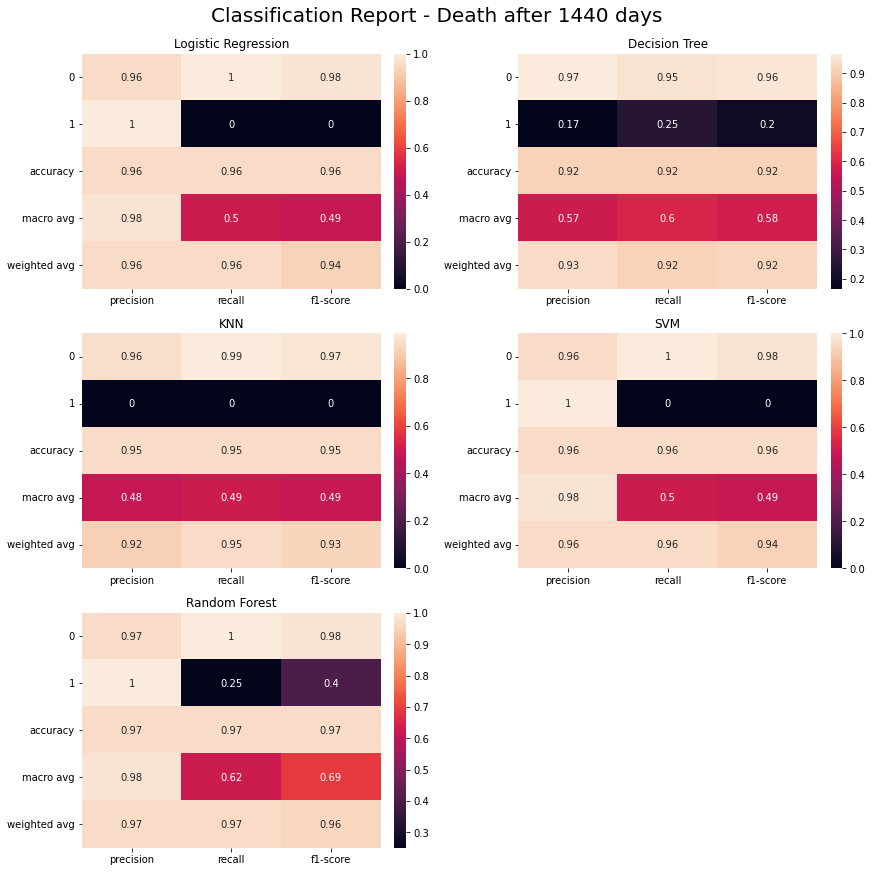

In [132]:
report_log_reg_03_12_after_1440d = classification_report(y_test_after_1440d, y_pred_log_reg03_12_after_1440d, zero_division=1, output_dict=True)
report_dec_tree_03_12_after_1440d = classification_report(y_test_after_1440d, y_pred_decision_tree03_12_after_1440d, zero_division=1, output_dict=True)
report_knn_03_12_after_1440d = classification_report(y_test_after_1440d, y_pred_knn03_12_after_1440d, zero_division=1, output_dict=True)
report_svm_03_12_after_1440d = classification_report(y_test_after_1440d, y_pred_svm03_12_after_1440d, zero_division=1, output_dict=True)
report_random_forest_03_12_after_1440d = classification_report(y_test_after_1440d, y_pred_random_forest03_12_after_1440d, zero_division=1, output_dict=True)

fig5, ax5 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig5.suptitle("Classification Report - Death after 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_03_12_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 0])
ax5[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_03_12_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 1])
ax5[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_03_12_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 0])
ax5[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_03_12_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 1])
ax5[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_03_12_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[2, 0])
ax5[2, 0].set_title("Random Forest")

ax5[2, 1].set_visible(False)

##### Curva ROC e AUCROC

---



Com o intuito de mensurar a área sob a curva ROC, fazemos a comparação dos modelos para cada faixa de tempo determinada.

In [133]:
lr_prob03_0d = logistic_regression03_0d.predict_proba(x_test)
lr_prob03_0d = lr_prob03_0d[:, 1]
dt_prob03_0d = decision_tree03_0d.predict_proba(x_test)
dt_prob03_0d = dt_prob03_0d[:, 1]
knn_prob03_0d = knn_prognosis03_0d.predict_proba(x_test)
knn_prob03_0d = knn_prob03_0d[:, 1]
svm_prob03_0d = svm_prognosis03_0d.predict_proba(x_test)
svm_prob03_0d = svm_prob03_0d[:, 1]
rf_prob03_0d = random_forest_prognosis03_0d.predict_proba(x_test)
rf_prob03_0d = rf_prob03_0d[:, 1]

lr_prob03_0d_30d = logistic_regression03_0d_30d.predict_proba(x_test)
lr_prob03_0d_30d = lr_prob03_0d_30d[:, 1]
dt_prob03_0d_30d = decision_tree03_0d_30d.predict_proba(x_test)
dt_prob03_0d_30d = dt_prob03_0d_30d[:, 1]
knn_prob03_0d_30d = knn_prognosis03_0d_30d.predict_proba(x_test)
knn_prob03_0d_30d = knn_prob03_0d_30d[:, 1]
svm_prob03_0d_30d = svm_prognosis03_0d_30d.predict_proba(x_test)
svm_prob03_0d_30d = svm_prob03_0d_30d[:, 1]
rf_prob03_0d_30d = random_forest_prognosis03_0d_30d.predict_proba(x_test)
rf_prob03_0d_30d = rf_prob03_0d_30d[:, 1]

lr_prob03_30d_360d = logistic_regression03_30d_360d.predict_proba(x_test)
lr_prob03_30d_360d = lr_prob03_30d_360d[:, 1]
dt_prob03_30d_360d = decision_tree03_30d_360d.predict_proba(x_test)
dt_prob03_30d_360d = dt_prob03_30d_360d[:, 1]
knn_prob03_30d_360d = knn_prognosis03_30d_360d.predict_proba(x_test)
knn_prob03_30d_360d = knn_prob03_30d_360d[:, 1]
svm_prob03_30d_360d = svm_prognosis03_30d_360d.predict_proba(x_test)
svm_prob03_30d_360d = svm_prob03_30d_360d[:, 1]
rf_prob03_30d_360d = random_forest_prognosis03_30d_360d.predict_proba(x_test)
rf_prob03_30d_360d = rf_prob03_30d_360d[:, 1]

lr_prob03_360d_540d = logistic_regression03_360d_540d.predict_proba(x_test)
lr_prob03_360d_540d = lr_prob03_360d_540d[:, 1]
dt_prob03_360d_540d = decision_tree03_360d_540d.predict_proba(x_test)
dt_prob03_360d_540d = dt_prob03_360d_540d[:, 1]
knn_prob03_360d_540d = knn_prognosis03_360d_540d.predict_proba(x_test)
knn_prob03_360d_540d = knn_prob03_360d_540d[:, 1]
svm_prob03_360d_540d = svm_prognosis03_360d_540d.predict_proba(x_test)
svm_prob03_360d_540d = svm_prob03_360d_540d[:, 1]
rf_prob03_360d_540d = random_forest_prognosis03_360d_540d.predict_proba(x_test)
rf_prob03_360d_540d = rf_prob03_360d_540d[:, 1]

lr_prob03_540d_1440d = logistic_regression03_540d_1440d.predict_proba(x_test)
lr_prob03_540d_1440d = lr_prob03_540d_1440d[:, 1]
dt_prob03_540d_1440d = decision_tree03_540d_1440d.predict_proba(x_test)
dt_prob03_540d_1440d = dt_prob03_540d_1440d[:, 1]
knn_prob03_540d_1440d = knn_prognosis03_540d_1440d.predict_proba(x_test)
knn_prob03_540d_1440d = knn_prob03_540d_1440d[:, 1]
svm_prob03_540d_1440d = svm_prognosis03_540d_1440d.predict_proba(x_test)
svm_prob03_540d_1440d = svm_prob03_540d_1440d[:, 1]
rf_prob03_540d_1440d = random_forest_prognosis03_540d_1440d.predict_proba(x_test)
rf_prob03_540d_1440d = rf_prob03_540d_1440d[:, 1]

lr_prob03_after_1440d = logistic_regression03_after_1440d.predict_proba(x_test)
lr_prob03_after_1440d = lr_prob03_after_1440d[:, 1]
dt_prob03_after_1440d = decision_tree03_after_1440d.predict_proba(x_test)
dt_prob03_after_1440d = dt_prob03_after_1440d[:, 1]
knn_prob03_after_1440d = knn_prognosis03_after_1440d.predict_proba(x_test)
knn_prob03_after_1440d = knn_prob03_after_1440d[:, 1]
svm_prob03_after_1440d = svm_prognosis03_after_1440d.predict_proba(x_test)
svm_prob03_after_1440d = svm_prob03_after_1440d[:, 1]
rf_prob03_after_1440d = random_forest_prognosis03_after_1440d.predict_proba(x_test)
rf_prob03_after_1440d = rf_prob03_after_1440d[:, 1]

Devido aos problemas na separação do conjunto de teste, onde alguns apresentaram resultados de apenas uma classe, a curva ROC não é capaz de ser gerada. No bloco abaixo verificamos que para os intervalos de 0 a 30 dias, 30 a 360 dias e 360 a 540 dias não foi possível gerar a curva ROC.

In [134]:
try:
  lr_0d = roc_auc_score(y_test_0d, lr_prob03_0d)
except ValueError as err:
  print("Error for Logistic Regression, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  dt_0d = roc_auc_score(y_test_0d, dt_prob03_0d)
except ValueError as err:
  print("Error for Decision Tree, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  knn_0d = roc_auc_score(y_test_0d, knn_prob03_0d)
except ValueError as err:
  print("Error for KNN, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  svm_0d = roc_auc_score(y_test_0d, svm_prob03_0d)
except ValueError as err:
  print("Error for SVM, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  rf_0d = roc_auc_score(y_test_0d, rf_prob03_0d)
except ValueError as err:
  print("Error for Random Forest, with death in the same day of the diagnosis: " + str(err))
  pass

try:
  lr_0d_30d = roc_auc_score(y_test_0d_30d, lr_prob03_0d_30d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 0 to 30 days: " + str(err))
  pass
try:
  dt_0d_30d = roc_auc_score(y_test_0d_30d, dt_prob03_0d_30d)
except ValueError as err:
  print("Error for Decision Tree, with death between 0 to 30 days: " + str(err))
  pass
try:
  knn_0d_30d = roc_auc_score(y_test_0d_30d, knn_prob03_0d_30d)
except ValueError as err:
  print("Error for KNN, with death between 0 to 30 days: " + str(err))
  pass
try:
  svm_0d_30d = roc_auc_score(y_test_0d_30d, svm_prob03_0d_30d)
except ValueError as err:
  print("Error for SVM, with death between 0 to 30 days: " + str(err))
  pass
try:
  rf_0d_30d = roc_auc_score(y_test_0d_30d, rf_prob03_0d_30d)
except ValueError as err:
  print("Error for Random Forest, with death between 0 to 30 days: " + str(err))
  pass

try:
  lr_30d_360d = roc_auc_score(y_test_0d_30d, lr_prob03_30d_360d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 30 to 360 days: " + str(err))
  pass
try:
  dt_30d_360d = roc_auc_score(y_test_0d_30d, dt_prob03_30d_360d)
except ValueError as err:
  print("Error for Decision Tree, with death between 30 to 360 days: " + str(err))
  pass
try:
  knn_30d_360d = roc_auc_score(y_test_0d_30d, knn_prob03_30d_360d)
except ValueError as err:
  print("Error for KNN, with death between 30 to 360 days: " + str(err))
  pass
try:
  svm_30d_360d = roc_auc_score(y_test_0d_30d, svm_prob03_30d_360d)
except ValueError as err:
  print("Error for SVM, with death between 30 to 360 days: " + str(err))
  pass
try:
  rf_30d_360d = roc_auc_score(y_test_0d_30d, rf_prob03_30d_360d)
except ValueError as err:
  print("Error for Random Forest, with death between 30 to 360 days: " + str(err))
  pass

try:
  lr_360d_540d = roc_auc_score(y_test_360d_540d, lr_prob03_360d_540d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 360 to 540 days: " + str(err))
  pass
try:
  dt_360d_540d = roc_auc_score(y_test_360d_540d, dt_prob03_360d_540d)
except ValueError as err:
  print("Error for Decision Tree, with death between 360 to 540 days: " + str(err))
  pass
try:
  knn_360d_540d = roc_auc_score(y_test_360d_540d, knn_prob03_360d_540d)
except ValueError as err:
  print("Error for KNN, with death between 360 to 540 days: " + str(err))
  pass
try:
  svm_360d_540d = roc_auc_score(y_test_360d_540d, svm_prob03_360d_540d)
except ValueError as err:
  print("Error for SVM, with death between 360 to 540 days: " + str(err))
  pass
try:
  rf_360d_540d = roc_auc_score(y_test_360d_540d, rf_prob03_360d_540d)
except ValueError as err:
  print("Error for Random Forest, with death between 360 to 540 days: " + str(err))
  pass

try:
  lr_540d_1440d = roc_auc_score(y_test_540d_1440d, lr_prob03_540d_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 540 to 1440 days: " + str(err))
  pass
try:
  dt_540d_1440d = roc_auc_score(y_test_540d_1440d, dt_prob03_540d_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death between 540 to 1440 days: " + str(err))
  pass
try:
  knn_540d_1440d = roc_auc_score(y_test_540d_1440d, knn_prob03_540d_1440d)
except ValueError as err:
  print("Error for KNN, with death between 540 to 1440 days: " + str(err))
  pass
try:
  svm_540d_1440d = roc_auc_score(y_test_540d_1440d, svm_prob03_540d_1440d)
except ValueError as err:
  print("Error for SVM, with death between 540 to 1440 days: " + str(err))
  pass
try:
  rf_540d_1440d = roc_auc_score(y_test_540d_1440d, rf_prob03_540d_1440d)
except ValueError as err:
  print("Error for Random Forest, with death between 540 to 1440 days: " + str(err))
  pass

try:
  lr_after_1440d = roc_auc_score(y_test_after_1440d, lr_prob03_after_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death after 1440 days: " + str(err))
  pass
try:
  dt_after_1440d = roc_auc_score(y_test_after_1440d, dt_prob03_after_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death after 1440 days: " + str(err))
  pass
try:
  knn_after_1440d = roc_auc_score(y_test_after_1440d, knn_prob03_after_1440d)
except ValueError as err:
  print("Error for KNN, with death after 1440 days: " + str(err))
  pass
try:
  svm_after_1440d = roc_auc_score(y_test_after_1440d, svm_prob03_after_1440d)
except ValueError as err:
  print("Error for SVM, with death after 1440 days: " + str(err))
  pass
try:
  rf_after_1440d = roc_auc_score(y_test_after_1440d, rf_prob03_after_1440d)
except ValueError as err:
  print("Error for Random Forest, with death after 1440 days: " + str(err))
  pass

Error for Logistic Regression, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Decision Tree, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for KNN, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for SVM, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Random Forest, with death between 0 to 30 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Logistic Regression, with death between 30 to 360 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for Decision Tree, with death between 30 to 360 days: Only one class present in y_true. ROC AUC score is not defined in that case.
Error for KNN, with death between 30 to 360 days: Only one 

No bloco abaixo são geradas as curvas ROC para os intervalos nas quais os conjuntos de teste tiveram valores de ambas as classes.

In [135]:
lr_fpr_0d, lr_tpr_0d, _ = roc_curve(y_test_0d, lr_prob03_0d)
dt_fpr_0d, dt_tpr_0d, _ = roc_curve(y_test_0d, dt_prob03_0d)
knn_fpr_0d, knn_tpr_0d, _ = roc_curve(y_test_0d, knn_prob03_0d)
svm_fpr_0d, svm_tpr_0d, _ = roc_curve(y_test_0d, svm_prob03_0d)
rf_fpr_0d, rf_tpr_0d, _ = roc_curve(y_test_0d, rf_prob03_0d)

lr_fpr_540d_1440d, lr_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, lr_prob03_540d_1440d)
dt_fpr_540d_1440d, dt_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, dt_prob03_540d_1440d)
knn_fpr_540d_1440d, knn_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, knn_prob03_540d_1440d)
svm_fpr_540d_1440d, svm_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, svm_prob03_540d_1440d)
rf_fpr_540d_1440d, rf_tpr_540d_1440d, _ = roc_curve(y_test_540d_1440d, rf_prob03_540d_1440d)

lr_fpr_after_1440d, lr_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, lr_prob03_after_1440d)
dt_fpr_after_1440d, dt_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, dt_prob03_after_1440d)
knn_fpr_after_1440d, knn_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, knn_prob03_after_1440d)
svm_fpr_after_1440d, svm_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, svm_prob03_after_1440d)
rf_fpr_after_1440d, rf_tpr_after_1440d, _ = roc_curve(y_test_after_1440d, rf_prob03_after_1440d)

Analisando a AUROC (área sob a curva) para os intervalos possíveis verificamos que:

* Para a faixa de tempo de mesmo dia do diagnóstico o melhor resultado foi obtido pela SVM, com 85% de AUROC.
* Para o intervalo de 540 a 1440 dias o KNN, o *Random Forest* obteve o melhor resultado, com 85% de AUROC.
* Para o intervalo após 1440 dias a SVM teve o melhor resultado, com 73% de AUROC.


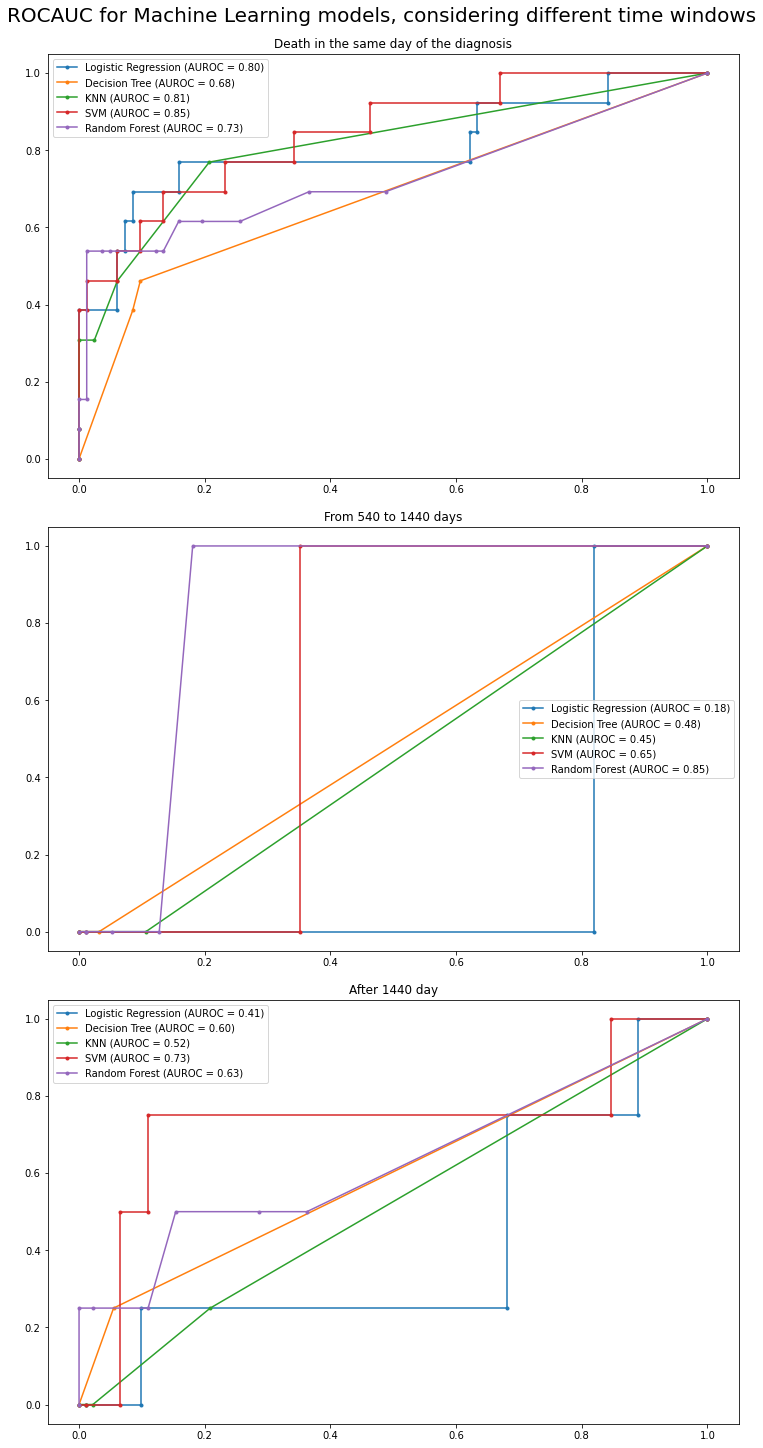

In [136]:
fig6, ax6 = plt.subplots(3, figsize=(10, 20), constrained_layout=True)
fig6.suptitle("ROCAUC for Machine Learning models, considering different time windows", fontsize=20)

ax6[0].plot(lr_fpr_0d, lr_tpr_0d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_0d)
ax6[0].plot(dt_fpr_0d, dt_tpr_0d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_0d)
ax6[0].plot(knn_fpr_0d, knn_tpr_0d, marker=".", label="KNN (AUROC = %0.2f)" % knn_0d)
ax6[0].plot(svm_fpr_0d, svm_tpr_0d, marker=".", label="SVM (AUROC = %0.2f)" % svm_0d)
ax6[0].plot(rf_fpr_0d, rf_tpr_0d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_0d)
ax6[0].legend()
ax6[0].set_title("Death in the same day of the diagnosis")

ax6[1].plot(lr_fpr_540d_1440d, lr_tpr_540d_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_540d_1440d)
ax6[1].plot(dt_fpr_540d_1440d, dt_tpr_540d_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_540d_1440d)
ax6[1].plot(knn_fpr_540d_1440d, knn_tpr_540d_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_540d_1440d)
ax6[1].plot(svm_fpr_540d_1440d, svm_tpr_540d_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_540d_1440d)
ax6[1].plot(rf_fpr_540d_1440d, rf_tpr_540d_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_540d_1440d)
ax6[1].legend()
ax6[1].set_title("From 540 to 1440 days")

ax6[2].plot(lr_fpr_after_1440d, lr_tpr_after_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_after_1440d)
ax6[2].plot(dt_fpr_after_1440d, dt_tpr_after_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_after_1440d)
ax6[2].plot(knn_fpr_after_1440d, knn_tpr_after_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_after_1440d)
ax6[2].plot(svm_fpr_after_1440d, svm_tpr_after_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_after_1440d)
ax6[2].plot(rf_fpr_after_1440d, rf_tpr_after_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_after_1440d)
ax6[2].legend()
ax6[2].set_title("After 1440 day");

### 5º caso: treino e teste com o cenário 3, alterando variáveis de entrada dos modelos

---

Nesse caso, usaremos os modelos de treino e teste com o dataset do cenário 3, a fim de verificar a influência das variáveis de entrada em cada modelo.

#### Escolha das variáveis a serem alteradas a partir da correlação entre features

---


A partir da análise de correlação das features que foi feita na etapa de pré-processamento, vimos que a feature relacionada a quantidade de condições do paciente (`COND_QTY`) possui correlação com a idade (`AGE`), desta forma, decidimos remover a coluna `COND_QTY` do dataset, a fim de verificar a sua influência nas predições de morte.




#### Separando os dataset em conjunto de treinamento e teste

---





No bloco abaixo, removemos a coluna que representa a quantidade de condições do paciente (`COND_QTY`).

In [137]:
x_data_scenario03 = x_data_scenario03.drop(columns=["COND_QTY"])
display(x_data_scenario03)

GENDER  RACE  AGE  PROCEDURES_QTY  ICU_QTY
0          0     0   18              40        0
1          1     0    6               8        0
2          0     3    6               7        0
3          0     0   12              14        0
4          1     0   20              59        0
...      ...   ...  ...             ...      ...
1551       0     0   16              61        0
1552       1     2    3               7        0
1553       0     0   14              28        1
1554       0     0    7              13        0
1555       1     0   13              10        0

[1556 rows x 5 columns]

Após a remoção, assim como nos casos anteriores, as features foram separadas em variáveis de entrada (``x_data_scenario03``) e variáveis de saída (``y_data_03``) e, em seguida, foi destinado 70% do dataset para treino (``x_train_scenario03`` e ``y_train_scenario03``) e 30% para teste (``x_test_scenario03`` e ``y_test_scenario03``).


Novamente, foi utilizada a função ``train_test_split``, da biblioteca scikit-learn. A fim de obtermos resultados reprodutíveis, o valor do parâmetro ``random_state`` será fixado.

In [138]:
x_train_scenario03, x_test_scenario03, y_train_scenario03, y_test_scenario03 = train_test_split(x_data_scenario03, y_data_03, test_size=0.3, random_state=0)

Usaremos novamente o ``StandardScaler`` para padronizar as features para uma unidade de variância (var = 1), visto que as variáveis de entrada estão em escalas diferentes.

In [139]:
scaler_scenario03 = StandardScaler()
scaler_scenario03.fit(x_train_scenario03)
x_train_scenario03 = scaler_scenario03.transform(x_train_scenario03)
x_test_scenario03 = scaler_scenario03.transform(x_test_scenario03)

Como os modelos serão testados e treinados em diferentes janelas de tempo, é necessário selecionar a feature correspondente a esta janela nas variáveis de saída ``y_data_03``, dataset de treino ``y_train_03`` e de teste ``y_test_03``.


In [140]:
y_train_case5_0d = y_train_scenario03.DEATH_0D
y_train_case5_0d_30d = y_train_scenario03.DEATH_0D_30D
y_train_case5_30d_360d = y_train_scenario03.DEATH_30D_360D
y_train_case5_360d_540d = y_train_scenario03.DEATH_360D_540D
y_train_case5_540d_1440d = y_train_scenario03.DEATH_540D_1440D
y_train_case5_after_1440d = y_train_scenario03.DEATH_AFTER_1440D

y_test_case5_0d = y_test_scenario03.DEATH_0D
y_test_case5_0d_30d = y_test_scenario03.DEATH_0D_30D
y_test_case5_30d_360d = y_test_scenario03.DEATH_30D_360D
y_test_case5_360d_540d = y_test_scenario03.DEATH_360D_540D
y_test_case5_540d_1440d = y_test_scenario03.DEATH_540D_1440D
y_test_case5_after_1440d = y_test_scenario03.DEATH_AFTER_1440D

#### Modelos de Machine Learning

---



Nesta etapa, faremos o treino e teste dos modelos de regressão logística, árvore de decisão, aprendizado baseado em instâncias, máquina de vetor de suporte e *Random Forest*, utilizando o dataset que não possui a feature `COND_QTY`.


##### Regressão Logística

---



Instanciaremos o classificador de regressão logística com a função `LogisticRegression` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [141]:
logistic_regression_case5_0d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_case5_0d.fit(x_train_scenario03, y_train_case5_0d)
y_pred_log_reg_case5_0d = logistic_regression_case5_0d.predict(x_test_scenario03)

logistic_regression_case5_0d_30d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_case5_0d_30d.fit(x_train_scenario03, y_train_case5_0d_30d)
y_pred_log_reg_case5_0d_30d = logistic_regression_case5_0d_30d.predict(x_test_scenario03)

logistic_regression_case5_30d_360d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_case5_30d_360d.fit(x_train_scenario03, y_train_case5_30d_360d)
y_pred_log_reg_case5_30d_360d = logistic_regression_case5_30d_360d.predict(x_test_scenario03)

logistic_regression_case5_360d_540d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_case5_360d_540d.fit(x_train_scenario03, y_train_case5_360d_540d)
y_pred_log_reg_case5_360d_540d = logistic_regression_case5_360d_540d.predict(x_test_scenario03)

logistic_regression_case5_540d_1440d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_case5_540d_1440d.fit(x_train_scenario03, y_train_case5_540d_1440d)
y_pred_log_reg_case5_540d_1440d = logistic_regression_case5_540d_1440d.predict(x_test_scenario03)

logistic_regression_case5_after_1440d = LogisticRegression(random_state=0, max_iter=500)
logistic_regression_case5_after_1440d.fit(x_train_scenario03, y_train_case5_after_1440d)
y_pred_log_reg_case5_after_1440d = logistic_regression_case5_after_1440d.predict(x_test_scenario03)

##### Árvore de Decisão (Decision Tree)

---



Instanciaremos o classificador de árvore de decisão com a função `DecisionTreeClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [142]:
decision_tree_case5_0d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_case5_0d.fit(x_train_scenario03, y_train_case5_0d)
y_pred_decision_tree_case5_0d = decision_tree_case5_0d.predict(x_test_scenario03)

decision_tree_case5_0d_30d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_case5_0d_30d.fit(x_train_scenario03, y_train_case5_0d_30d)
y_pred_decision_tree_case5_0d_30d = decision_tree_case5_0d_30d.predict(x_test_scenario03)

decision_tree_case5_30d_360d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_case5_30d_360d.fit(x_train_scenario03, y_train_case5_30d_360d)
y_pred_decision_tree_case5_30d_360d = decision_tree_case5_30d_360d.predict(x_test_scenario03)

decision_tree_case5_360d_540d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_case5_360d_540d.fit(x_train_scenario03, y_train_case5_360d_540d)
y_pred_decision_tree_case5_360d_540d = decision_tree_case5_360d_540d.predict(x_test_scenario03)

decision_tree_case5_540d_1440d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_case5_540d_1440d.fit(x_train_scenario03, y_train_case5_540d_1440d)
y_pred_decision_tree_case5_540d_1440d = decision_tree_case5_540d_1440d.predict(x_test_scenario03)

decision_tree_case5_after_1440d = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_case5_after_1440d.fit(x_train_scenario03, y_train_case5_after_1440d)
y_pred_decision_tree_case5_after_1440d = decision_tree_case5_after_1440d.predict(x_test_scenario03)


##### Aprendizagem baseada em instâncias (k-Nearest Neighbors) - kNN

---



Instanciaremos o classificador de árvore de decisão com a função `KNeighborsClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [143]:
knn_prognosis_case5_0d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_case5_0d.fit(x_train_scenario03, y_train_case5_0d)
y_pred_knn_case5_0d = knn_prognosis_case5_0d.predict(x_test_scenario03)

knn_prognosis_case5_0d_30d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_case5_0d_30d.fit(x_train_scenario03, y_train_case5_0d_30d)
y_pred_knn_case5_0d_30d = knn_prognosis_case5_0d_30d.predict(x_test_scenario03)

knn_prognosis_case5_30d_360d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_case5_30d_360d.fit(x_train_scenario03, y_train_case5_30d_360d)
y_pred_knn_case5_30d_360d = knn_prognosis_case5_30d_360d.predict(x_test_scenario03)

knn_prognosis_case5_360d_540d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_case5_360d_540d.fit(x_train_scenario03, y_train_case5_360d_540d)
y_pred_knn_case5_360d_540d = knn_prognosis_case5_360d_540d.predict(x_test_scenario03)

knn_prognosis_case5_540d_1440d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_case5_540d_1440d.fit(x_train_scenario03, y_train_case5_540d_1440d)
y_pred_knn_case5_540d_1440d = knn_prognosis_case5_540d_1440d.predict(x_test_scenario03)

knn_prognosis_case5_after_1440d = KNeighborsClassifier(n_neighbors=5, p=2)
knn_prognosis_case5_after_1440d.fit(x_train_scenario03, y_train_case5_after_1440d)
y_pred_knn_case5_after_1440d = knn_prognosis_case5_after_1440d.predict(x_test_scenario03)


##### Máquina de Vetor de Suporte (Support Vector Machine) - SVM

---



Instanciaremos o classificador de árvore de decisão com a função `SVC` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [144]:
svm_prognosis_case5_0d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_case5_0d.fit(x_train_scenario03, y_train_case5_0d)
y_pred_svm_case5_0d = svm_prognosis_case5_0d.predict(x_test_scenario03)

svm_prognosis_case5_0d_30d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_case5_0d_30d.fit(x_train_scenario03, y_train_case5_0d_30d)
y_pred_svm_case5_0d_30d = svm_prognosis_case5_0d_30d.predict(x_test_scenario03)

svm_prognosis_case5_30d_360d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_case5_30d_360d.fit(x_train_scenario03, y_train_case5_30d_360d)
y_pred_svm_case5_30d_360d = svm_prognosis_case5_30d_360d.predict(x_test_scenario03)

svm_prognosis_case5_360d_540d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_case5_360d_540d.fit(x_train_scenario03, y_train_case5_360d_540d)
y_pred_svm_case5_360d_540d = svm_prognosis_case5_360d_540d.predict(x_test_scenario03)

svm_prognosis_case5_540d_1440d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_case5_540d_1440d.fit(x_train_scenario03, y_train_case5_540d_1440d)
y_pred_svm_case5_540d_1440d = svm_prognosis_case5_540d_1440d.predict(x_test_scenario03)

svm_prognosis_case5_after_1440d = SVC(random_state=0, C = 2.0, probability = True)
svm_prognosis_case5_after_1440d.fit(x_train_scenario03, y_train_case5_after_1440d)
y_pred_svm_case5_after_1440d = svm_prognosis_case5_after_1440d.predict(x_test_scenario03)


##### Random Forest

---



Instanciaremos o classificador de árvore de decisão com a função `RandomForestClassifier` e, em seguida, treinaremos e testaremos o modelo com o `fit` e `predict`, respectivamente.

In [145]:
random_forest_prognosis_case5_0d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_case5_0d.fit(x_train_scenario03, y_train_case5_0d)
y_pred_random_forest_case5_0d = random_forest_prognosis_case5_0d.predict(x_test_scenario03)

random_forest_prognosis_case5_0d_30d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_case5_0d_30d.fit(x_train_scenario03, y_train_case5_0d_30d)
y_pred_random_forest_case5_0d_30d = random_forest_prognosis_case5_0d_30d.predict(x_test_scenario03)

random_forest_prognosis_case5_30d_360d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_case5_30d_360d.fit(x_train_scenario03, y_train_case5_30d_360d)
y_pred_random_forest_case5_30d_360d = random_forest_prognosis_case5_30d_360d.predict(x_test_scenario03)

random_forest_prognosis_case5_360d_540d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_case5_360d_540d.fit(x_train_scenario03, y_train_case5_360d_540d)
y_pred_random_forest_case5_360d_540d = random_forest_prognosis_case5_360d_540d.predict(x_test_scenario03)

random_forest_prognosis_case5_540d_1440d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_case5_540d_1440d.fit(x_train_scenario03, y_train_case5_540d_1440d)
y_pred_random_forest_case5_540d_1440d = random_forest_prognosis_case5_540d_1440d.predict(x_test_scenario03)

random_forest_prognosis_case5_after_1440d = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
random_forest_prognosis_case5_after_1440d.fit(x_train_scenario03, y_train_case5_after_1440d)
y_pred_random_forest_case5_after_1440d = random_forest_prognosis_case5_after_1440d.predict(x_test_scenario03)

#### Avaliação dos modelos

---



##### Matriz de confusão

---



A matriz de confusão para o caso de morte no mesmo dia do diagnóstico pode ser interpretada da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente 408 casos e incorretamente 16 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 5 casos e incorretamente 38 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 392 casos e incorretamente 32 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 7 casos e incorretamente 36 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 414 casos e incorretamente 10 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 9 casos e incorretamente 34 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente 412 casos e incorretamente 12 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 5 casos e incorretamente 38 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 404 casos e incorretamente 20 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 9 casos e incorretamente 34 casos.

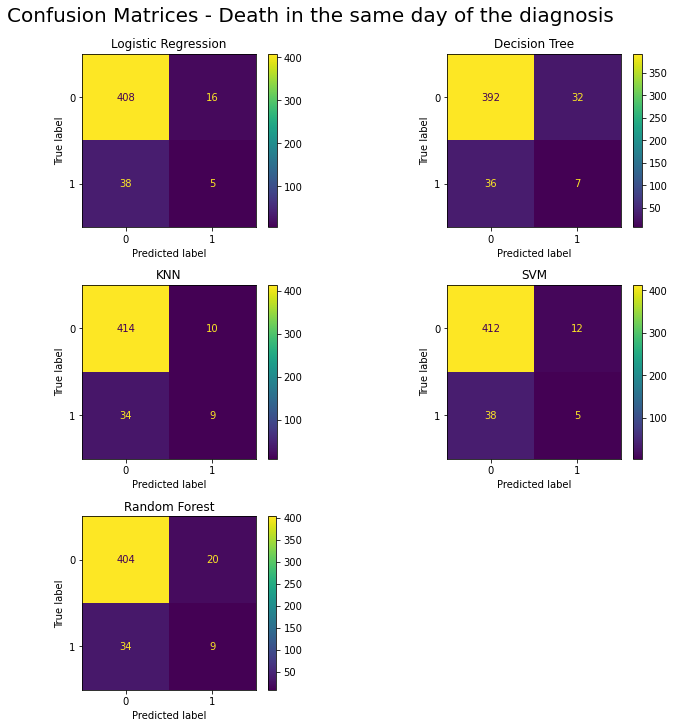

In [146]:
fig6, ax6 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig6.suptitle("Confusion Matrices - Death in the same day of the diagnosis", fontsize=20)

cm_logistic_regression_case5_0d = confusion_matrix(y_test_case5_0d, y_pred_log_reg_case5_0d)
ConfusionMatrixDisplay(cm_logistic_regression_case5_0d).plot(ax=ax6[0, 0])
ax6[0, 0].set_title("Logistic Regression")
ax6[0, 0].grid(False)

cm_decision_tree_case5_0d = confusion_matrix(y_test_case5_0d, y_pred_decision_tree_case5_0d)
ConfusionMatrixDisplay(cm_decision_tree_case5_0d).plot(ax=ax6[0, 1])
ax6[0, 1].set_title("Decision Tree")
ax6[0, 1].grid(False)

cm_knn_case5_0d = confusion_matrix(y_test_case5_0d, y_pred_knn_case5_0d)
ConfusionMatrixDisplay(cm_knn_case5_0d).plot(ax=ax6[1, 0])
ax6[1, 0].set_title("KNN")
ax6[1, 0].grid(False)

cm_svm_case5_0d = confusion_matrix(y_test_case5_0d, y_pred_svm_case5_0d)
ConfusionMatrixDisplay(cm_svm_case5_0d).plot(ax=ax6[1, 1])
ax6[1, 1].set_title("SVM")
ax6[1, 1].grid(False)

cm_random_forest_case5_0d = confusion_matrix(y_test_case5_0d, y_pred_random_forest_case5_0d)
ConfusionMatrixDisplay(cm_random_forest_case5_0d).plot(ax=ax6[2, 0])
ax6[2, 0].set_title("Random Forest")
ax6[2, 0].grid(False)

ax6[2, 1].set_visible(False)

Para o intervalo de 0 a 30 dias, a matriz de confusão pode ser interpretada da seguinte forma:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 461 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 463 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

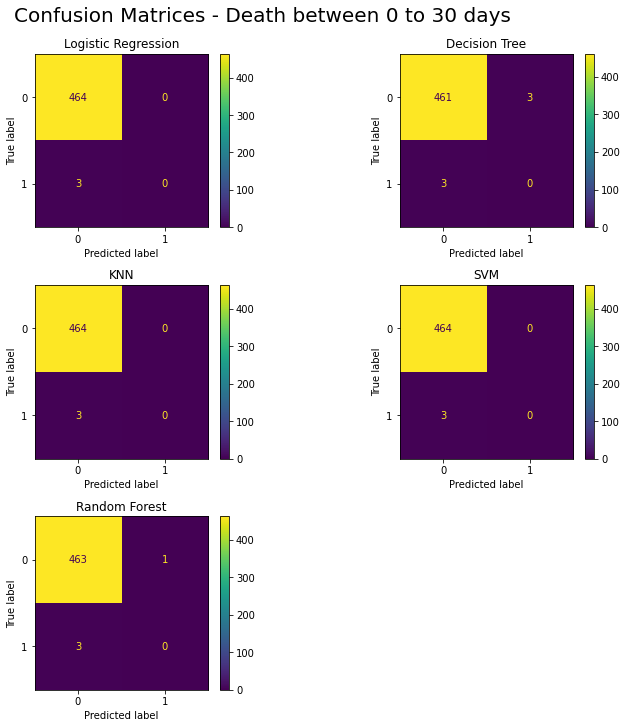

In [147]:
fig7, ax7 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig7.suptitle("Confusion Matrices - Death between 0 to 30 days", fontsize=20)

cm_logistic_regression_case5_0d_30d = confusion_matrix(y_test_case5_0d_30d, y_pred_log_reg_case5_0d_30d)
ConfusionMatrixDisplay(cm_logistic_regression_case5_0d_30d).plot(ax=ax7[0, 0])
ax7[0, 0].set_title("Logistic Regression")
ax7[0, 0].grid(False)

cm_decision_tree_case5_0d_30d = confusion_matrix(y_test_case5_0d_30d, y_pred_decision_tree_case5_0d_30d)
ConfusionMatrixDisplay(cm_decision_tree_case5_0d_30d).plot(ax=ax7[0, 1])
ax7[0, 1].set_title("Decision Tree")
ax7[0, 1].grid(False)

cm_knn_case5_0d_30d = confusion_matrix(y_test_case5_0d_30d, y_pred_knn_case5_0d_30d)
ConfusionMatrixDisplay(cm_knn_case5_0d_30d).plot(ax=ax7[1, 0])
ax7[1, 0].set_title("KNN")
ax7[1, 0].grid(False)

cm_svm_case5_0d_30d = confusion_matrix(y_test_case5_0d_30d, y_pred_svm_case5_0d_30d)
ConfusionMatrixDisplay(cm_svm_case5_0d_30d).plot(ax=ax7[1, 1])
ax7[1, 1].set_title("SVM")
ax7[1, 1].grid(False)

cm_random_forest_case5_0d_30d = confusion_matrix(y_test_case5_0d_30d, y_pred_random_forest_case5_0d_30d)
ConfusionMatrixDisplay(cm_random_forest_case5_0d_30d).plot(ax=ax7[2, 0])
ax7[2, 0].set_title("Random Forest")
ax7[2, 0].grid(False)

ax7[2, 1].set_visible(False)

No intervalo de 30 a 360 dias, a matriz de confusão pode ser entendida da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 461 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 464 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 3 casos.

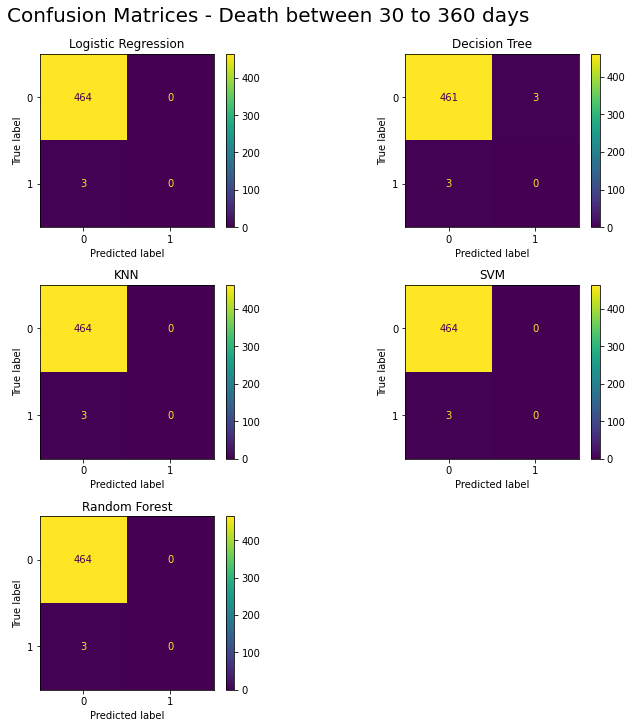

In [148]:
fig8, ax8 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig8.suptitle("Confusion Matrices - Death between 30 to 360 days", fontsize=20)

cm_logistic_regression_case5_30d_360d = confusion_matrix(y_test_case5_30d_360d, y_pred_log_reg_case5_30d_360d)
ConfusionMatrixDisplay(cm_logistic_regression_case5_30d_360d).plot(ax=ax8[0, 0])
ax8[0, 0].set_title("Logistic Regression")
ax8[0, 0].grid(False)

cm_decision_tree_case5_30d_360d = confusion_matrix(y_test_case5_30d_360d, y_pred_decision_tree_case5_30d_360d)
ConfusionMatrixDisplay(cm_decision_tree_case5_30d_360d).plot(ax=ax8[0, 1])
ax8[0, 1].set_title("Decision Tree")
ax8[0, 1].grid(False)

cm_knn_case5_30d_360d = confusion_matrix(y_test_case5_30d_360d, y_pred_knn_case5_30d_360d)
ConfusionMatrixDisplay(cm_knn_case5_30d_360d).plot(ax=ax8[1, 0])
ax8[1, 0].set_title("KNN")
ax8[1, 0].grid(False)

cm_svm_case5_30d_360d = confusion_matrix(y_test_case5_30d_360d, y_pred_svm_case5_30d_360d)
ConfusionMatrixDisplay(cm_svm_case5_30d_360d).plot(ax=ax8[1, 1])
ax8[1, 1].set_title("SVM")
ax8[1, 1].grid(False)

cm_random_forest_case5_30d_360d = confusion_matrix(y_test_case5_30d_360d, y_pred_random_forest_case5_30d_360d)
ConfusionMatrixDisplay(cm_random_forest_case5_30d_360d).plot(ax=ax8[2, 0])
ax8[2, 0].set_title("Random Forest")
ax8[2, 0].grid(False)

ax8[2, 1].set_visible(False)

A matriz de confusão para a faixa de 360 a 540 dias pode ser interpretada da seguinte forma:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 463 casos e incorretamente 3 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente todos os 466 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente o único caso.

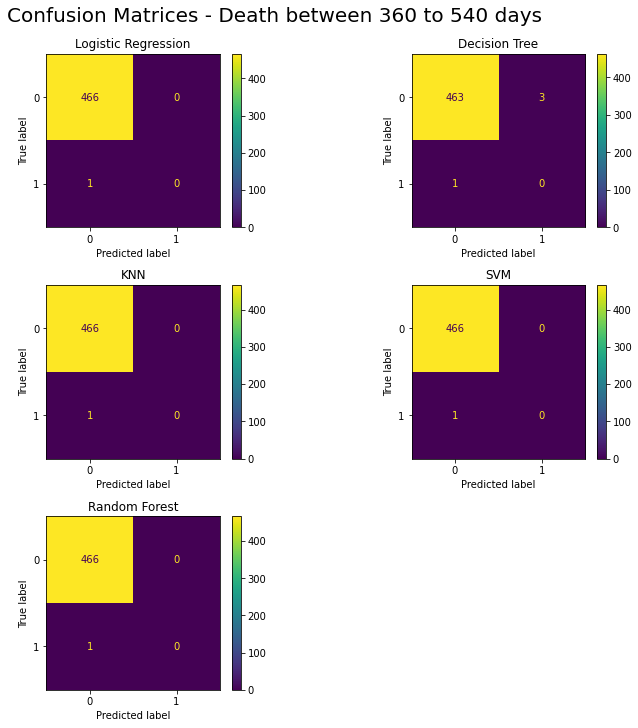

In [149]:
fig9, ax9 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig9.suptitle("Confusion Matrices - Death between 360 to 540 days", fontsize=20)

cm_logistic_regression_case5_360d_540d = confusion_matrix(y_test_case5_360d_540d, y_pred_log_reg_case5_360d_540d)
ConfusionMatrixDisplay(cm_logistic_regression_case5_360d_540d).plot(ax=ax9[0, 0])
ax9[0, 0].set_title("Logistic Regression")
ax9[0, 0].grid(False)

cm_decision_tree_case5_360d_540d = confusion_matrix(y_test_case5_360d_540d, y_pred_decision_tree_case5_360d_540d)
ConfusionMatrixDisplay(cm_decision_tree_case5_360d_540d).plot(ax=ax9[0, 1])
ax9[0, 1].set_title("Decision Tree")
ax9[0, 1].grid(False)

cm_knn_case5_360d_540d = confusion_matrix(y_test_case5_360d_540d, y_pred_knn_case5_360d_540d)
ConfusionMatrixDisplay(cm_knn_case5_360d_540d).plot(ax=ax9[1, 0])
ax9[1, 0].set_title("KNN")
ax9[1, 0].grid(False)

cm_svm_case5_360d_540d = confusion_matrix(y_test_case5_360d_540d, y_pred_svm_case5_360d_540d)
ConfusionMatrixDisplay(cm_svm_case5_360d_540d).plot(ax=ax9[1, 1])
ax9[1, 1].set_title("SVM")
ax9[1, 1].grid(False)

cm_random_forest_case5_360d_540d = confusion_matrix(y_test_case5_360d_540d, y_pred_random_forest_case5_360d_540d)
ConfusionMatrixDisplay(cm_random_forest_case5_360d_540d).plot(ax=ax9[2, 0])
ax9[2, 0].set_title("Random Forest")
ax9[2, 0].grid(False)

ax9[2, 1].set_visible(False)

A matriz de confusão para a faixa de 540 a 1440 dias pode ser entendida da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 452 casos e incorretamente 8 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 460 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 456 casos e incorretamente 4 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 7 casos.

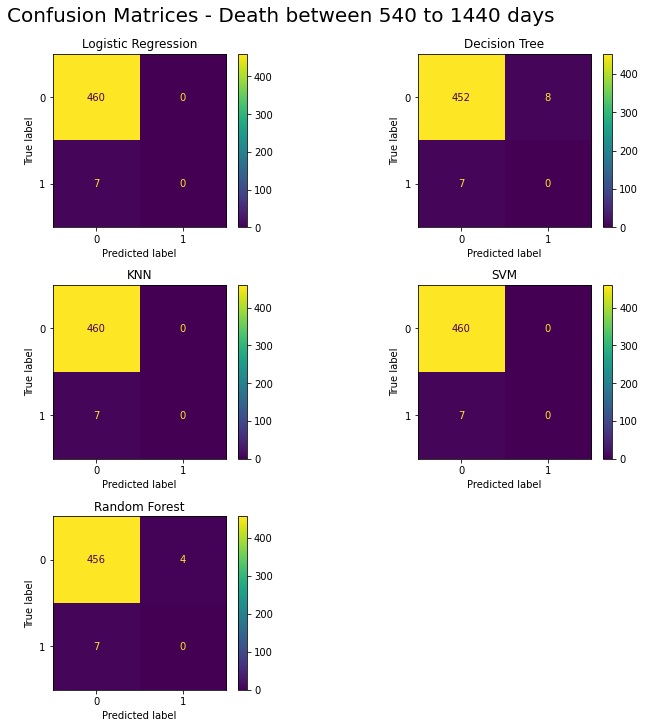

In [150]:
fig10, ax10 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig10.suptitle("Confusion Matrices - Death between 540 to 1440 days", fontsize=20)

cm_logistic_regression_case5_540d_1440d = confusion_matrix(y_test_case5_540d_1440d, y_pred_log_reg_case5_540d_1440d)
ConfusionMatrixDisplay(cm_logistic_regression_case5_540d_1440d).plot(ax=ax10[0, 0])
ax10[0, 0].set_title("Logistic Regression")
ax10[0, 0].grid(False)

cm_decision_tree_case5_540d_1440d = confusion_matrix(y_test_case5_540d_1440d, y_pred_decision_tree_case5_540d_1440d)
ConfusionMatrixDisplay(cm_decision_tree_case5_540d_1440d).plot(ax=ax10[0, 1])
ax10[0, 1].set_title("Decision Tree")
ax10[0, 1].grid(False)

cm_knn_case5_540d_1440d = confusion_matrix(y_test_case5_540d_1440d, y_pred_knn_case5_540d_1440d)
ConfusionMatrixDisplay(cm_knn_case5_540d_1440d).plot(ax=ax10[1, 0])
ax10[1, 0].set_title("KNN")
ax10[1, 0].grid(False)

cm_svm_case5_540d_1440d = confusion_matrix(y_test_case5_540d_1440d, y_pred_svm_case5_540d_1440d)
ConfusionMatrixDisplay(cm_svm_case5_540d_1440d).plot(ax=ax10[1, 1])
ax10[1, 1].set_title("SVM")
ax10[1, 1].grid(False)

cm_random_forest_case5_540d_1440d = confusion_matrix(y_test_case5_540d_1440d, y_pred_random_forest_case5_540d_1440d)
ConfusionMatrixDisplay(cm_random_forest_case5_540d_1440d).plot(ax=ax10[2, 0])
ax10[2, 0].set_title("Random Forest")
ax10[2, 0].grid(False)

ax10[2, 1].set_visible(False)

A matriz de confusão para a faixa acima de 1440 dias pode ser entendida da seguinte maneira:

* Regressão Logística
 * Para os casos da classe 0, o modelo preveu corretamente todos os 448 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* Árvore de Decisão
 * Para os casos da classe 0, o modelo preveu corretamente 437 casos e incorretamente 11 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 2 casos e incorretamente 17 casos.

* KNN
 * Para os casos da classe 0, o modelo preveu corretamente 447 casos e incorretamente 1 caso;
 * Para os casos da classe 1, o modelo preveu corretamente 2 casos e incorretamente 17 casos.

* SVM
 * Para os casos da classe 0, o modelo preveu corretamente todos os 448 casos;
 * Para os casos da classe 1, o modelo preveu incorretamente todos os 19 casos.

* Random Forest
 * Para os casos da classe 0, o modelo preveu corretamente 444 casos e incorretamente 4 casos;
 * Para os casos da classe 1, o modelo preveu corretamente 2 casos e incorretamente 17 casos.

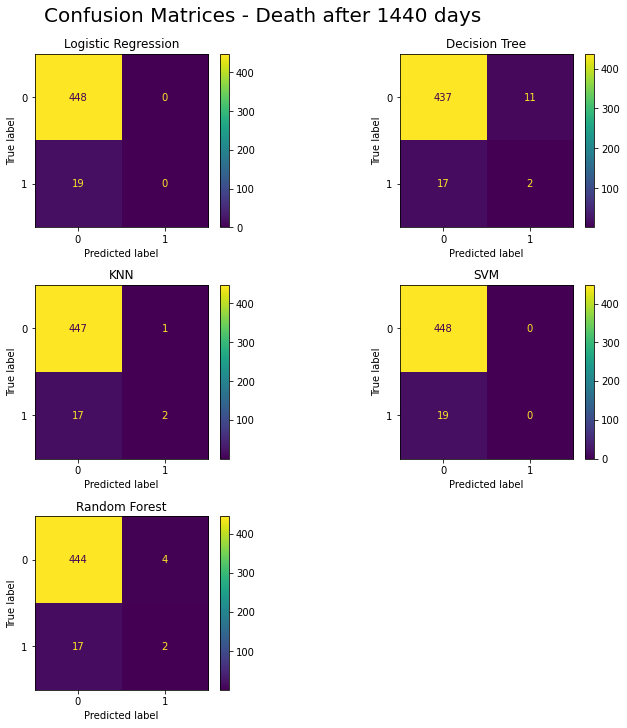

In [151]:
fig11, ax11 = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
fig11.suptitle("Confusion Matrices - Death after 1440 days", fontsize=20)

cm_logistic_regression_case5_after_1440d = confusion_matrix(y_test_case5_after_1440d, y_pred_log_reg_case5_after_1440d)
ConfusionMatrixDisplay(cm_logistic_regression_case5_after_1440d).plot(ax=ax11[0, 0])
ax11[0, 0].set_title("Logistic Regression")
ax11[0, 0].grid(False)

cm_decision_tree_case5_after_1440d = confusion_matrix(y_test_case5_after_1440d, y_pred_decision_tree_case5_after_1440d)
ConfusionMatrixDisplay(cm_decision_tree_case5_after_1440d).plot(ax=ax11[0, 1])
ax11[0, 1].set_title("Decision Tree")
ax11[0, 1].grid(False)

cm_knn_case5_after_1440d = confusion_matrix(y_test_case5_after_1440d, y_pred_knn_case5_after_1440d)
ConfusionMatrixDisplay(cm_knn_case5_after_1440d).plot(ax=ax11[1, 0])
ax11[1, 0].set_title("KNN")
ax11[1, 0].grid(False)

cm_svm_case5_after_1440d = confusion_matrix(y_test_case5_after_1440d, y_pred_svm_case5_after_1440d)
ConfusionMatrixDisplay(cm_svm_case5_after_1440d).plot(ax=ax11[1, 1])
ax11[1, 1].set_title("SVM")
ax11[1, 1].grid(False)

cm_random_forest_case5_after_1440d = confusion_matrix(y_test_case5_after_1440d, y_pred_random_forest_case5_after_1440d)
ConfusionMatrixDisplay(cm_random_forest_case5_after_1440d).plot(ax=ax11[2, 0])
ax11[2, 0].set_title("Random Forest")
ax11[2, 0].grid(False)

ax11[2, 1].set_visible(False)

##### Acurácia, Precisão, Revocação e F1-Score

---



Os dados do `classification_report` para o intervalo do mesmo dia do diagnóstico conclui que:

* Os modelos tiveram acurácia acima de 85%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* A precisão dos modelos no caso de morte, ou seja, quantas das predições positivas realmente eram positivas, obtiveram valores acima de 18%, sendo o KNN com o maior valor (47%);
* Analisando a revocação para o caso de morte, vemos que os modelos não performaram bem, tendo o maior valor no *Random Forest* e no KNN, ambos com 21%;
* Avaliando o F1-score para casos de morte, temos que o melhor modelo foi o KNN, obtendo 29%.

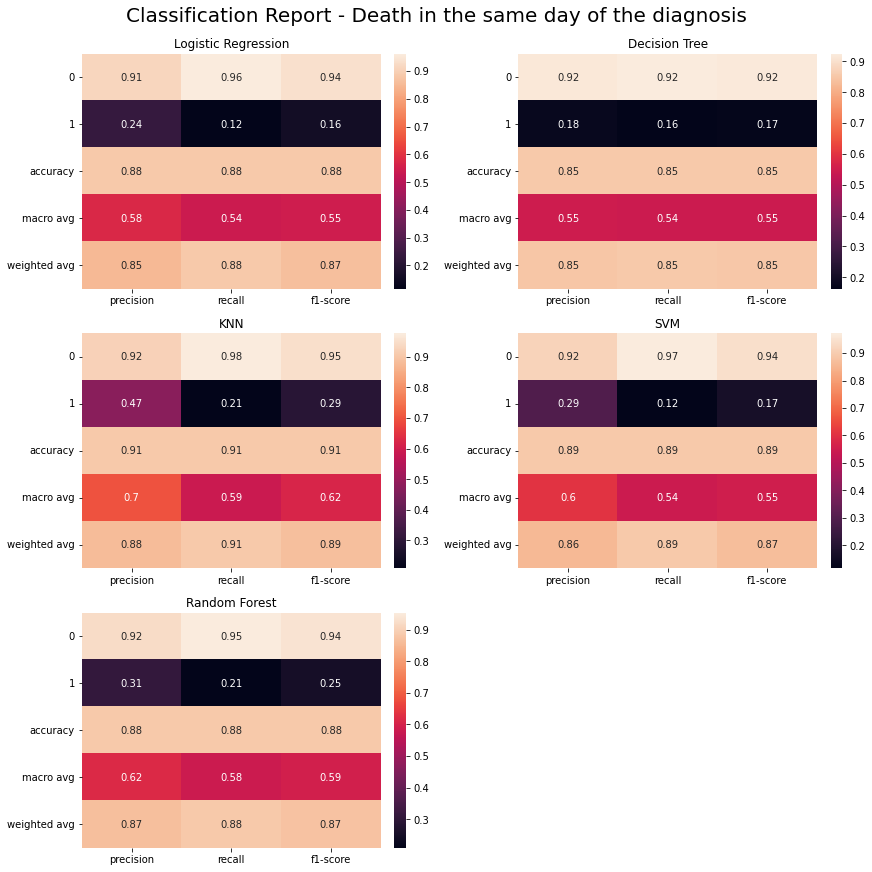

In [152]:
report_log_reg_case5_0d = classification_report(y_test_case5_0d, y_pred_log_reg_case5_0d, zero_division=1, output_dict=True)
report_dec_tree_case5_0d = classification_report(y_test_case5_0d, y_pred_decision_tree_case5_0d, zero_division=1, output_dict=True)
report_knn_case5_0d = classification_report(y_test_case5_0d, y_pred_knn_case5_0d, zero_division=1, output_dict=True)
report_svm_case5_0d = classification_report(y_test_case5_0d, y_pred_svm_case5_0d, zero_division=1, output_dict=True)
report_random_forest_case5_0d = classification_report(y_test_case5_0d, y_pred_random_forest_case5_0d, zero_division=1, output_dict=True)

fig0, ax0 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig0.suptitle("Classification Report - Death in the same day of the diagnosis", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_case5_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 0])
ax0[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_case5_0d).iloc[:-1, :].T, annot=True, ax=ax0[0, 1])
ax0[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_case5_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 0])
ax0[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_case5_0d).iloc[:-1, :].T, annot=True, ax=ax0[1, 1])
ax0[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_case5_0d).iloc[:-1, :].T, annot=True, ax=ax0[2, 0])
ax0[2, 0].set_title("Random Forest")

ax0[2, 1].set_visible(False)

O `classification_report` para o intervalo de 0 a 30 dias conclui que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

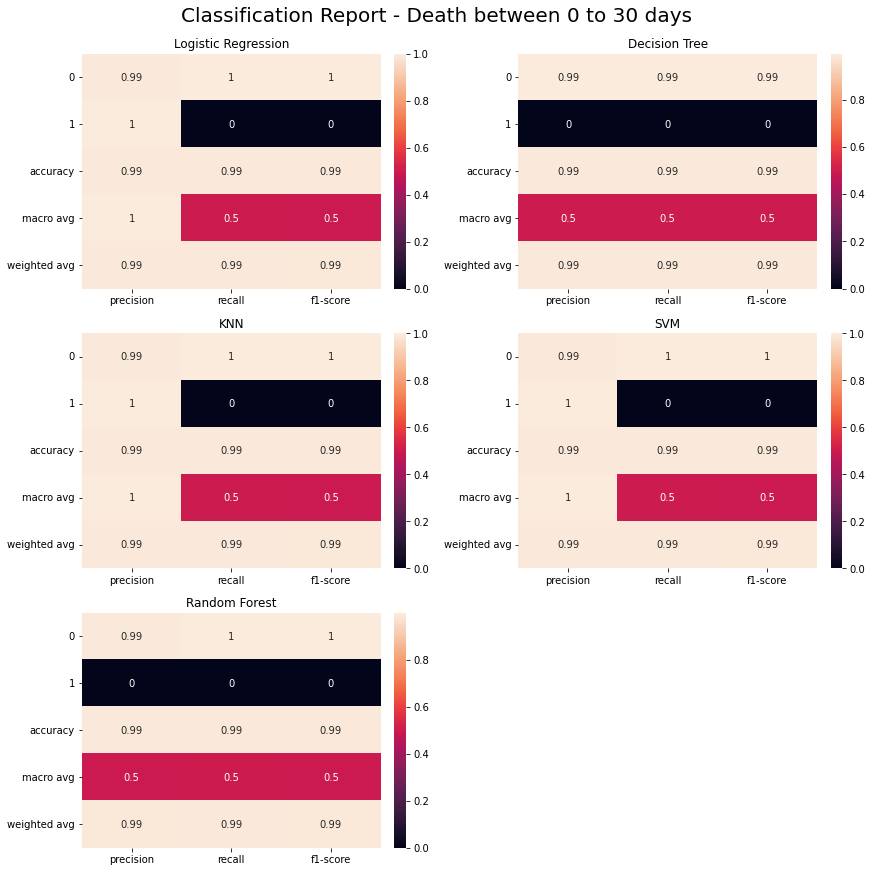

In [153]:
report_log_reg_case5_0d_30d = classification_report(y_test_case5_0d_30d, y_pred_log_reg_case5_0d_30d, zero_division=1, output_dict=True)
report_dec_tree_case5_0d_30d = classification_report(y_test_case5_0d_30d, y_pred_decision_tree_case5_0d_30d, zero_division=1, output_dict=True)
report_knn_case5_0d_30d = classification_report(y_test_case5_0d_30d, y_pred_knn_case5_0d_30d, zero_division=1, output_dict=True)
report_svm_case5_0d_30d = classification_report(y_test_case5_0d_30d, y_pred_svm_case5_0d_30d, zero_division=1, output_dict=True)
report_random_forest_case5_0d_30d = classification_report(y_test_case5_0d_30d, y_pred_random_forest_case5_0d_30d, zero_division=1, output_dict=True)

fig1, ax1 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig1.suptitle("Classification Report - Death between 0 to 30 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_case5_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 0])
ax1[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_case5_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[0, 1])
ax1[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_case5_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 0])
ax1[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_case5_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[1, 1])
ax1[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_case5_0d_30d).iloc[:-1, :].T, annot=True, ax=ax1[2, 0])
ax1[2, 0].set_title("Random Forest")

ax1[2, 1].set_visible(False)

Os dados do `classification_report` para o intervalo de 30 a 360 dias demonstram que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

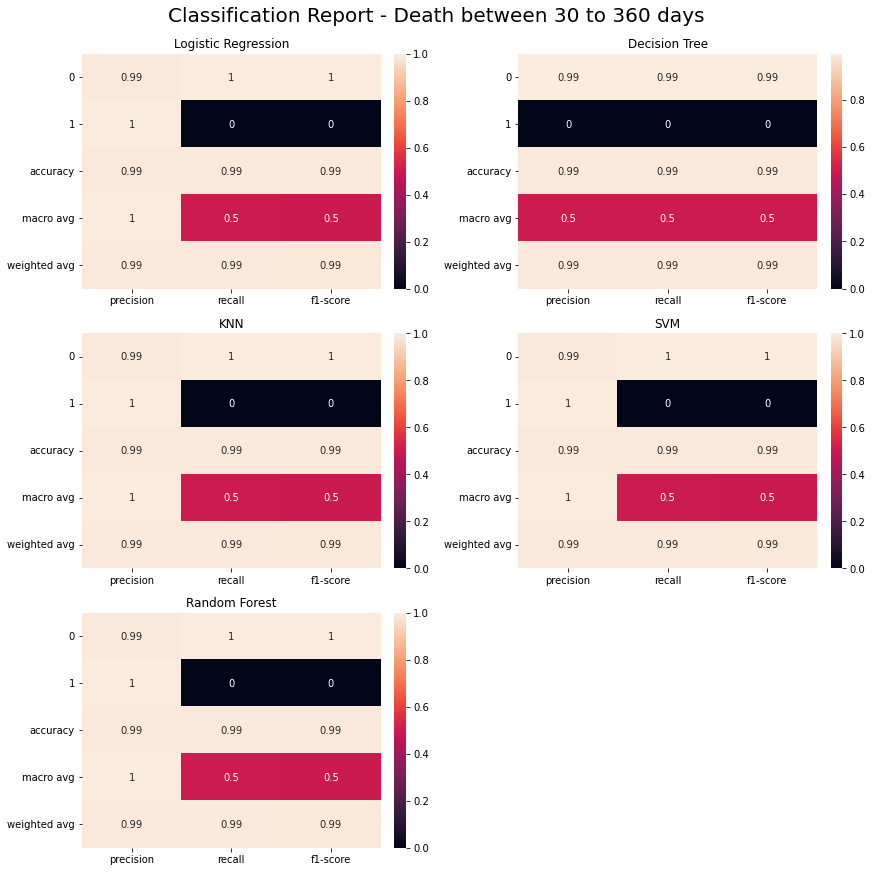

In [154]:
report_log_reg_case5_30d_360d = classification_report(y_test_case5_30d_360d, y_pred_log_reg_case5_30d_360d, zero_division=1, output_dict=True)
report_dec_tree_case5_30d_360d = classification_report(y_test_case5_30d_360d, y_pred_decision_tree_case5_30d_360d, zero_division=1, output_dict=True)
report_knn_case5_30d_360d = classification_report(y_test_case5_30d_360d, y_pred_knn_case5_30d_360d, zero_division=1, output_dict=True)
report_svm_case5_30d_360d = classification_report(y_test_case5_30d_360d, y_pred_svm_case5_30d_360d, zero_division=1, output_dict=True)
report_random_forest_case5_30d_360d = classification_report(y_test_case5_30d_360d, y_pred_random_forest_case5_30d_360d, zero_division=1, output_dict=True)

fig2, ax2 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig2.suptitle("Classification Report - Death between 30 to 360 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_case5_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 0])
ax2[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_case5_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[0, 1])
ax2[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_case5_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 0])
ax2[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_case5_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[1, 1])
ax2[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_case5_30d_360d).iloc[:-1, :].T, annot=True, ax=ax2[2, 0])
ax2[2, 0].set_title("Random Forest")

ax2[2, 1].set_visible(False)

O `classification_report` para a faixa de 360 a 540 dias demonstra que:

* Os modelos tiveram acurácia acima de 99%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

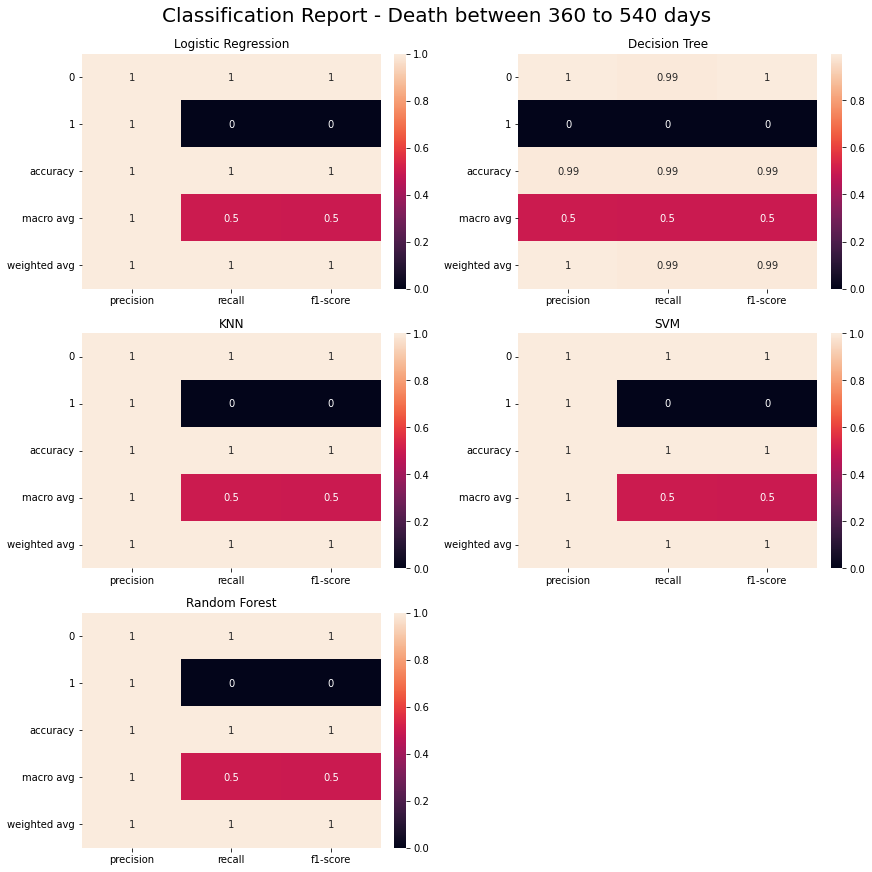

In [155]:
report_log_reg_case5_360d_540d = classification_report(y_test_case5_360d_540d, y_pred_log_reg_case5_360d_540d, zero_division=1, output_dict=True)
report_dec_tree_case5_360d_540d = classification_report(y_test_case5_360d_540d, y_pred_decision_tree_case5_360d_540d, zero_division=1, output_dict=True)
report_knn_case5_360d_540d = classification_report(y_test_case5_360d_540d, y_pred_knn_case5_360d_540d, zero_division=1, output_dict=True)
report_svm_case5_360d_540d = classification_report(y_test_case5_360d_540d, y_pred_svm_case5_360d_540d, zero_division=1, output_dict=True)
report_random_forest_case5_360d_540d = classification_report(y_test_case5_360d_540d, y_pred_random_forest_case5_360d_540d, zero_division=1, output_dict=True)

fig3, ax3 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig3.suptitle("Classification Report - Death between 360 to 540 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_case5_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 0])
ax3[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_case5_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[0, 1])
ax3[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_case5_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 0])
ax3[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_case5_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[1, 1])
ax3[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_case5_360d_540d).iloc[:-1, :].T, annot=True, ax=ax3[2, 0])
ax3[2, 0].set_title("Random Forest")

ax3[2, 1].set_visible(False)

Os dados do `classification_report` para o intervalo de 540 a 1440 dias conclui que:

* Os modelos tiveram acurácia acima de 97%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* Nenhum modelo foi capaz de prever os casos de morte.

In [156]:
report_log_reg_case5_540d_1440d = classification_report(y_test_case5_540d_1440d, y_pred_log_reg_case5_540d_1440d, zero_division=1, output_dict=True)
report_dec_tree_case5_540d_1440d = classification_report(y_test_case5_540d_1440d, y_pred_decision_tree_case5_540d_1440d, zero_division=1, output_dict=True)
report_knn_case5_540d_1440d = classification_report(y_test_case5_540d_1440d, y_pred_knn_case5_540d_1440d, zero_division=1, output_dict=True)
report_svm_case5_540d_1440d = classification_report(y_test_case5_540d_1440d, y_pred_svm_case5_540d_1440d, zero_division=1, output_dict=True)
report_random_forest_case5_540d_1440d = classification_report(y_test_case5_540d_1440d, y_pred_random_forest_case5_540d_1440d, zero_division=1, output_dict=True)

fig4, ax4 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig4.suptitle("Classification Report - Death between 540 to 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_case5_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 0])
ax4[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_case5_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[0, 1])
ax4[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_case5_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 0])
ax4[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_case5_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[1, 1])
ax4[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_case5_540d_1440d).iloc[:-1, :].T, annot=True, ax=ax4[2, 0])
ax4[2, 0].set_title("Random Forest")

ax4[2, 1].set_visible(False)

O `classification_report` para a faixa acima de 1440 dias demonstram que:

* Os modelos tiveram acurácia acima de 94%;
* Todos os modelos foram eficazes na previsão de casos onde o paciente se manteve vivo, considerando acurácia, precisão, revocação e F1-Score;
* A precisão dos modelos no caso de morte obtiveram valores acima de 15%, sendo o KNN com o maior valor (67%);
* Analisando a revocação para os casos de morte, vemos que os modelos não performaram bem, tendo o maior valor no *Random Forest*, no KNN e na Árvore de Decisão, com 11%;
* Avaliando o F1-score para casos de morte, temos que o melhor modelo foi o KNN, obtendo 18%.

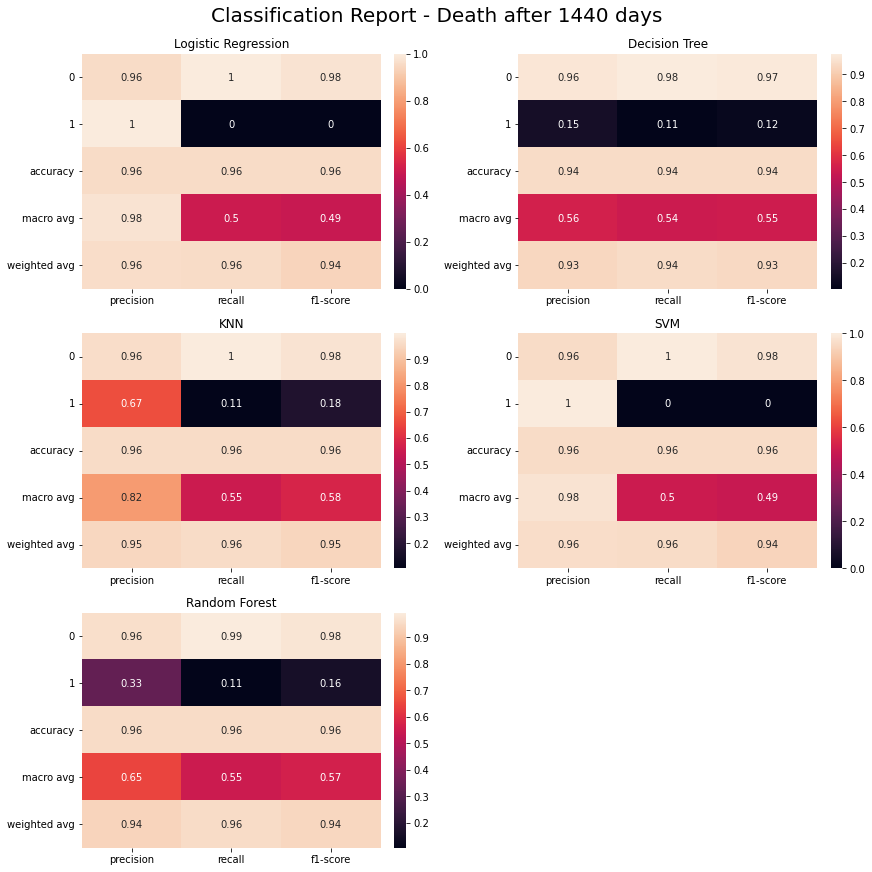

In [157]:
report_log_reg_case5_after_1440d = classification_report(y_test_case5_after_1440d, y_pred_log_reg_case5_after_1440d, zero_division=1, output_dict=True)
report_dec_tree_case5_after_1440d = classification_report(y_test_case5_after_1440d, y_pred_decision_tree_case5_after_1440d, zero_division=1, output_dict=True)
report_knn_case5_after_1440d = classification_report(y_test_case5_after_1440d, y_pred_knn_case5_after_1440d, zero_division=1, output_dict=True)
report_svm_case5_after_1440d = classification_report(y_test_case5_after_1440d, y_pred_svm_case5_after_1440d, zero_division=1, output_dict=True)
report_random_forest_case5_after_1440d = classification_report(y_test_case5_after_1440d, y_pred_random_forest_case5_after_1440d, zero_division=1, output_dict=True)

fig5, ax5 = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
fig5.suptitle("Classification Report - Death after 1440 days", fontsize=20)

sns.heatmap(pd.DataFrame(report_log_reg_case5_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 0])
ax5[0, 0].set_title("Logistic Regression")

sns.heatmap(pd.DataFrame(report_dec_tree_case5_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[0, 1])
ax5[0, 1].set_title("Decision Tree")

sns.heatmap(pd.DataFrame(report_knn_case5_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 0])
ax5[1, 0].set_title("KNN")

sns.heatmap(pd.DataFrame(report_svm_case5_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[1, 1])
ax5[1, 1].set_title("SVM")

sns.heatmap(pd.DataFrame(report_random_forest_case5_after_1440d).iloc[:-1, :].T, annot=True, ax=ax5[2, 0])
ax5[2, 0].set_title("Random Forest")

ax5[2, 1].set_visible(False)

##### Curva ROC e AUCROC

---



Com o intuito de mensurar a área sob a curva ROC, fazemos a comparação dos modelos para cada faixa de tempo determinada.

In [158]:
lr_prob_case5_0d = logistic_regression_case5_0d.predict_proba(x_test_scenario03)
lr_prob_case5_0d = lr_prob_case5_0d[:, 1]
dt_prob_case5_0d = decision_tree_case5_0d.predict_proba(x_test_scenario03)
dt_prob_case5_0d = dt_prob_case5_0d[:, 1]
knn_prob_case5_0d = knn_prognosis_case5_0d.predict_proba(x_test_scenario03)
knn_prob_case5_0d = knn_prob_case5_0d[:, 1]
svm_prob_case5_0d = svm_prognosis_case5_0d.predict_proba(x_test_scenario03)
svm_prob_case5_0d = svm_prob_case5_0d[:, 1]
rf_prob_case5_0d = random_forest_prognosis_case5_0d.predict_proba(x_test_scenario03)
rf_prob_case5_0d = rf_prob_case5_0d[:, 1]

lr_prob_case5_0d_30d = logistic_regression_case5_0d_30d.predict_proba(x_test_scenario03)
lr_prob_case5_0d_30d = lr_prob_case5_0d_30d[:, 1]
dt_prob_case5_0d_30d = decision_tree_case5_0d_30d.predict_proba(x_test_scenario03)
dt_prob_case5_0d_30d = dt_prob_case5_0d_30d[:, 1]
knn_prob_case5_0d_30d = knn_prognosis_case5_0d_30d.predict_proba(x_test_scenario03)
knn_prob_case5_0d_30d = knn_prob_case5_0d_30d[:, 1]
svm_prob_case5_0d_30d = svm_prognosis_case5_0d_30d.predict_proba(x_test_scenario03)
svm_prob_case5_0d_30d = svm_prob_case5_0d_30d[:, 1]
rf_prob_case5_0d_30d = random_forest_prognosis_case5_0d_30d.predict_proba(x_test_scenario03)
rf_prob_case5_0d_30d = rf_prob_case5_0d_30d[:, 1]

lr_prob_case5_30d_360d = logistic_regression_case5_30d_360d.predict_proba(x_test_scenario03)
lr_prob_case5_30d_360d = lr_prob_case5_30d_360d[:, 1]
dt_prob_case5_30d_360d = decision_tree_case5_30d_360d.predict_proba(x_test_scenario03)
dt_prob_case5_30d_360d = dt_prob_case5_30d_360d[:, 1]
knn_prob_case5_30d_360d = knn_prognosis_case5_30d_360d.predict_proba(x_test_scenario03)
knn_prob_case5_30d_360d = knn_prob_case5_30d_360d[:, 1]
svm_prob_case5_30d_360d = svm_prognosis_case5_30d_360d.predict_proba(x_test_scenario03)
svm_prob_case5_30d_360d = svm_prob_case5_30d_360d[:, 1]
rf_prob_case5_30d_360d = random_forest_prognosis_case5_30d_360d.predict_proba(x_test_scenario03)
rf_prob_case5_30d_360d = rf_prob_case5_30d_360d[:, 1]

lr_prob_case5_360d_540d = logistic_regression_case5_360d_540d.predict_proba(x_test_scenario03)
lr_prob_case5_360d_540d = lr_prob_case5_360d_540d[:, 1]
dt_prob_case5_360d_540d = decision_tree_case5_360d_540d.predict_proba(x_test_scenario03)
dt_prob_case5_360d_540d = dt_prob_case5_360d_540d[:, 1]
knn_prob_case5_360d_540d = knn_prognosis_case5_360d_540d.predict_proba(x_test_scenario03)
knn_prob_case5_360d_540d = knn_prob_case5_360d_540d[:, 1]
svm_prob_case5_360d_540d = svm_prognosis_case5_360d_540d.predict_proba(x_test_scenario03)
svm_prob_case5_360d_540d = svm_prob_case5_360d_540d[:, 1]
rf_prob_case5_360d_540d = random_forest_prognosis_case5_360d_540d.predict_proba(x_test_scenario03)
rf_prob_case5_360d_540d = rf_prob_case5_360d_540d[:, 1]

lr_prob_case5_540d_1440d = logistic_regression_case5_540d_1440d.predict_proba(x_test_scenario03)
lr_prob_case5_540d_1440d = lr_prob_case5_540d_1440d[:, 1]
dt_prob_case5_540d_1440d = decision_tree_case5_540d_1440d.predict_proba(x_test_scenario03)
dt_prob_case5_540d_1440d = dt_prob_case5_540d_1440d[:, 1]
knn_prob_case5_540d_1440d = knn_prognosis_case5_540d_1440d.predict_proba(x_test_scenario03)
knn_prob_case5_540d_1440d = knn_prob_case5_540d_1440d[:, 1]
svm_prob_case5_540d_1440d = svm_prognosis_case5_540d_1440d.predict_proba(x_test_scenario03)
svm_prob_case5_540d_1440d = svm_prob_case5_540d_1440d[:, 1]
rf_prob_case5_540d_1440d = random_forest_prognosis_case5_540d_1440d.predict_proba(x_test_scenario03)
rf_prob_case5_540d_1440d = rf_prob_case5_540d_1440d[:, 1]

lr_prob_case5_after_1440d = logistic_regression_case5_after_1440d.predict_proba(x_test_scenario03)
lr_prob_case5_after_1440d = lr_prob_case5_after_1440d[:, 1]
dt_prob_case5_after_1440d = decision_tree_case5_after_1440d.predict_proba(x_test_scenario03)
dt_prob_case5_after_1440d = dt_prob_case5_after_1440d[:, 1]
knn_prob_case5_after_1440d = knn_prognosis_case5_after_1440d.predict_proba(x_test_scenario03)
knn_prob_case5_after_1440d = knn_prob_case5_after_1440d[:, 1]
svm_prob_case5_after_1440d = svm_prognosis_case5_after_1440d.predict_proba(x_test_scenario03)
svm_prob_case5_after_1440d = svm_prob_case5_after_1440d[:, 1]
rf_prob_case5_after_1440d = random_forest_prognosis_case5_after_1440d.predict_proba(x_test_scenario03)
rf_prob_case5_after_1440d = rf_prob_case5_after_1440d[:, 1]

Nesse caso não houve problema na divisão dos conjuntos de teste, todos eles tiveram registros das duas classes em todos os intervalos.

In [159]:
try:
  lr_case5_0d = roc_auc_score(y_test_case5_0d, lr_prob_case5_0d)
except ValueError as err:
  print("Error for Logistic Regression, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  dt_case5_0d = roc_auc_score(y_test_case5_0d, dt_prob_case5_0d)
except ValueError as err:
  print("Error for Decision Tree, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  knn_case5_0d = roc_auc_score(y_test_case5_0d, knn_prob_case5_0d)
except ValueError as err:
  print("Error for KNN, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  svm_case5_0d = roc_auc_score(y_test_case5_0d, svm_prob_case5_0d)
except ValueError as err:
  print("Error for SVM, with death in the same day of the diagnosis: " + str(err))
  pass
try:
  rf_case5_0d = roc_auc_score(y_test_case5_0d, rf_prob_case5_0d)
except ValueError as err:
  print("Error for Random Forest, with death in the same day of the diagnosis: " + str(err))
  pass

try:
  lr_case5_0d_30d = roc_auc_score(y_test_case5_0d_30d, lr_prob_case5_0d_30d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 0 to 30 days: " + str(err))
  pass
try:
  dt_case5_0d_30d = roc_auc_score(y_test_case5_0d_30d, dt_prob_case5_0d_30d)
except ValueError as err:
  print("Error for Decision Tree, with death between 0 to 30 days: " + str(err))
  pass
try:
  knn_case5_0d_30d = roc_auc_score(y_test_case5_0d_30d, knn_prob_case5_0d_30d)
except ValueError as err:
  print("Error for KNN, with death between 0 to 30 days: " + str(err))
  pass
try:
  svm_case5_0d_30d = roc_auc_score(y_test_case5_0d_30d, svm_prob_case5_0d_30d)
except ValueError as err:
  print("Error for SVM, with death between 0 to 30 days: " + str(err))
  pass
try:
  rf_case5_0d_30d = roc_auc_score(y_test_case5_0d_30d, rf_prob_case5_0d_30d)
except ValueError as err:
  print("Error for Random Forest, with death between 0 to 30 days: " + str(err))
  pass

try:
  lr_case5_30d_360d = roc_auc_score(y_test_case5_0d_30d, lr_prob_case5_30d_360d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 30 to 360 days: " + str(err))
  pass
try:
  dt_case5_30d_360d = roc_auc_score(y_test_case5_0d_30d, dt_prob_case5_30d_360d)
except ValueError as err:
  print("Error for Decision Tree, with death between 30 to 360 days: " + str(err))
  pass
try:
  knn_case5_30d_360d = roc_auc_score(y_test_case5_0d_30d, knn_prob_case5_30d_360d)
except ValueError as err:
  print("Error for KNN, with death between 30 to 360 days: " + str(err))
  pass
try:
  svm_case5_30d_360d = roc_auc_score(y_test_case5_0d_30d, svm_prob_case5_30d_360d)
except ValueError as err:
  print("Error for SVM, with death between 30 to 360 days: " + str(err))
  pass
try:
  rf_case5_30d_360d = roc_auc_score(y_test_case5_0d_30d, rf_prob_case5_30d_360d)
except ValueError as err:
  print("Error for Random Forest, with death between 30 to 360 days: " + str(err))
  pass

try:
  lr_case5_360d_540d = roc_auc_score(y_test_case5_360d_540d, lr_prob_case5_360d_540d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 360 to 540 days: " + str(err))
  pass
try:
  dt_case5_360d_540d = roc_auc_score(y_test_case5_360d_540d, dt_prob_case5_360d_540d)
except ValueError as err:
  print("Error for Decision Tree, with death between 360 to 540 days: " + str(err))
  pass
try:
  knn_case5_360d_540d = roc_auc_score(y_test_case5_360d_540d, knn_prob_case5_360d_540d)
except ValueError as err:
  print("Error for KNN, with death between 360 to 540 days: " + str(err))
  pass
try:
  svm_case5_360d_540d = roc_auc_score(y_test_case5_360d_540d, svm_prob_case5_360d_540d)
except ValueError as err:
  print("Error for SVM, with death between 360 to 540 days: " + str(err))
  pass
try:
  rf_case5_360d_540d = roc_auc_score(y_test_case5_360d_540d, rf_prob_case5_360d_540d)
except ValueError as err:
  print("Error for Random Forest, with death between 360 to 540 days: " + str(err))
  pass

try:
  lr_case5_540d_1440d = roc_auc_score(y_test_case5_540d_1440d, lr_prob_case5_540d_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death between 540 to 1440 days: " + str(err))
  pass
try:
  dt_case5_540d_1440d = roc_auc_score(y_test_case5_540d_1440d, dt_prob_case5_540d_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death between 540 to 1440 days: " + str(err))
  pass
try:
  knn_case5_540d_1440d = roc_auc_score(y_test_case5_540d_1440d, knn_prob_case5_540d_1440d)
except ValueError as err:
  print("Error for KNN, with death between 540 to 1440 days: " + str(err))
  pass
try:
  svm_case5_540d_1440d = roc_auc_score(y_test_case5_540d_1440d, svm_prob_case5_540d_1440d)
except ValueError as err:
  print("Error for SVM, with death between 540 to 1440 days: " + str(err))
  pass
try:
  rf_case5_540d_1440d = roc_auc_score(y_test_case5_540d_1440d, rf_prob_case5_540d_1440d)
except ValueError as err:
  print("Error for Random Forest, with death between 540 to 1440 days: " + str(err))
  pass

try:
  lr_case5_after_1440d = roc_auc_score(y_test_case5_after_1440d, lr_prob_case5_after_1440d)
except ValueError as err:
  print("Error for Logistic Regression, with death after 1440 days: " + str(err))
  pass
try:
  dt_case5_after_1440d = roc_auc_score(y_test_case5_after_1440d, dt_prob_case5_after_1440d)
except ValueError as err:
  print("Error for Decision Tree, with death after 1440 days: " + str(err))
  pass
try:
  knn_case5_after_1440d = roc_auc_score(y_test_case5_after_1440d, knn_prob_case5_after_1440d)
except ValueError as err:
  print("Error for KNN, with death after 1440 days: " + str(err))
  pass
try:
  svm_case5_after_1440d = roc_auc_score(y_test_case5_after_1440d, svm_prob_case5_after_1440d)
except ValueError as err:
  print("Error for SVM, with death after 1440 days: " + str(err))
  pass
try:
  rf_case5_after_1440d = roc_auc_score(y_test_case5_after_1440d, rf_prob_case5_after_1440d)
except ValueError as err:
  print("Error for Random Forest, with death after 1440 days: " + str(err))
  pass

No bloco abaixo são geradas as curvas ROC para todos os intervalos.

In [160]:
lr_fpr_case5_0d, lr_tpr_case5_0d, _ = roc_curve(y_test_case5_0d, lr_prob_case5_0d)
dt_fpr_case5_0d, dt_tpr_case5_0d, _ = roc_curve(y_test_case5_0d, dt_prob_case5_0d)
knn_fpr_case5_0d, knn_tpr_case5_0d, _ = roc_curve(y_test_case5_0d, knn_prob_case5_0d)
svm_fpr_case5_0d, svm_tpr_case5_0d, _ = roc_curve(y_test_case5_0d, svm_prob_case5_0d)
rf_fpr_case5_0d, rf_tpr_case5_0d, _ = roc_curve(y_test_case5_0d, rf_prob_case5_0d)

lr_fpr_case5_0d_30d, lr_tpr_case5_0d_30d, _ = roc_curve(y_test_case5_0d_30d, lr_prob_case5_0d_30d)
dt_fpr_case5_0d_30d, dt_tpr_case5_0d_30d, _ = roc_curve(y_test_case5_0d_30d, dt_prob_case5_0d_30d)
knn_fpr_case5_0d_30d, knn_tpr_case5_0d_30d, _ = roc_curve(y_test_case5_0d_30d, knn_prob_case5_0d_30d)
svm_fpr_case5_0d_30d, svm_tpr_case5_0d_30d, _ = roc_curve(y_test_case5_0d_30d, svm_prob_case5_0d_30d)
rf_fpr_case5_0d_30d, rf_tpr_case5_0d_30d, _ = roc_curve(y_test_case5_0d_30d, rf_prob_case5_0d_30d)

lr_fpr_case5_30d_360d, lr_tpr_case5_30d_360d, _ = roc_curve(y_test_case5_30d_360d, lr_prob_case5_30d_360d)
dt_fpr_case5_30d_360d, dt_tpr_case5_30d_360d, _ = roc_curve(y_test_case5_30d_360d, dt_prob_case5_30d_360d)
knn_fpr_case5_30d_360d, knn_tpr_case5_30d_360d, _ = roc_curve(y_test_case5_30d_360d, knn_prob_case5_30d_360d)
svm_fpr_case5_30d_360d, svm_tpr_case5_30d_360d, _ = roc_curve(y_test_case5_30d_360d, svm_prob_case5_30d_360d)
rf_fpr_case5_30d_360d, rf_tpr_case5_30d_360d, _ = roc_curve(y_test_case5_30d_360d, rf_prob_case5_30d_360d)

lr_fpr_case5_360d_540d, lr_tpr_case5_360d_540d, _ = roc_curve(y_test_case5_360d_540d, lr_prob_case5_360d_540d)
dt_fpr_case5_360d_540d, dt_tpr_case5_360d_540d, _ = roc_curve(y_test_case5_360d_540d, dt_prob_case5_360d_540d)
knn_fpr_case5_360d_540d, knn_tpr_case5_360d_540d, _ = roc_curve(y_test_case5_360d_540d, knn_prob_case5_360d_540d)
svm_fpr_case5_360d_540d, svm_tpr_case5_360d_540d, _ = roc_curve(y_test_case5_360d_540d, svm_prob_case5_360d_540d)
rf_fpr_case5_360d_540d, rf_tpr_case5_360d_540d, _ = roc_curve(y_test_case5_360d_540d, rf_prob_case5_360d_540d)

lr_fpr_case5_540d_1440d, lr_tpr_case5_540d_1440d, _ = roc_curve(y_test_case5_540d_1440d, lr_prob_case5_540d_1440d)
dt_fpr_case5_540d_1440d, dt_tpr_case5_540d_1440d, _ = roc_curve(y_test_case5_540d_1440d, dt_prob_case5_540d_1440d)
knn_fpr_case5_540d_1440d, knn_tpr_case5_540d_1440d, _ = roc_curve(y_test_case5_540d_1440d, knn_prob_case5_540d_1440d)
svm_fpr_case5_540d_1440d, svm_tpr_case5_540d_1440d, _ = roc_curve(y_test_case5_540d_1440d, svm_prob_case5_540d_1440d)
rf_fpr_case5_540d_1440d, rf_tpr_case5_540d_1440d, _ = roc_curve(y_test_case5_540d_1440d, rf_prob_case5_540d_1440d)

lr_fpr_case5_after_1440d, lr_tpr_case5_after_1440d, _ = roc_curve(y_test_case5_after_1440d, lr_prob_case5_after_1440d)
dt_fpr_case5_after_1440d, dt_tpr_case5_after_1440d, _ = roc_curve(y_test_case5_after_1440d, dt_prob_case5_after_1440d)
knn_fpr_case5_after_1440d, knn_tpr_case5_after_1440d, _ = roc_curve(y_test_case5_after_1440d, knn_prob_case5_after_1440d)
svm_fpr_case5_after_1440d, svm_tpr_case5_after_1440d, _ = roc_curve(y_test_case5_after_1440d, svm_prob_case5_after_1440d)
rf_fpr_case5_after_1440d, rf_tpr_case5_after_1440d, _ = roc_curve(y_test_case5_after_1440d, rf_prob_case5_after_1440d)

Analisando a AUROC (área sob a curva) para os intervalos, verificamos que:

* Para a faixa de tempo de mesmo dia do diagnóstico o melhor resultado foi obtido pela Regressão Logística, com 70% de AUROC
* Para o intervalo de 0 a 30 dias a SVM obteve o melhor resultado (61%).
* Para o intervalo de 30 a 360 dias a Regressão Logística obteve o melhor resultado, com 92%.
* No intervalo de 360 a 540 dias o *Random Forest* obteve o melhor resultado, com 95%.
* Para o intervalo de 540 a 1440 dias a Regressão Logística obteve o melhor resultado, com 69%.
* Para o intervalo após 1440 dias a Regressão Logística teve o melhor resultado, com 75% de AUROC.

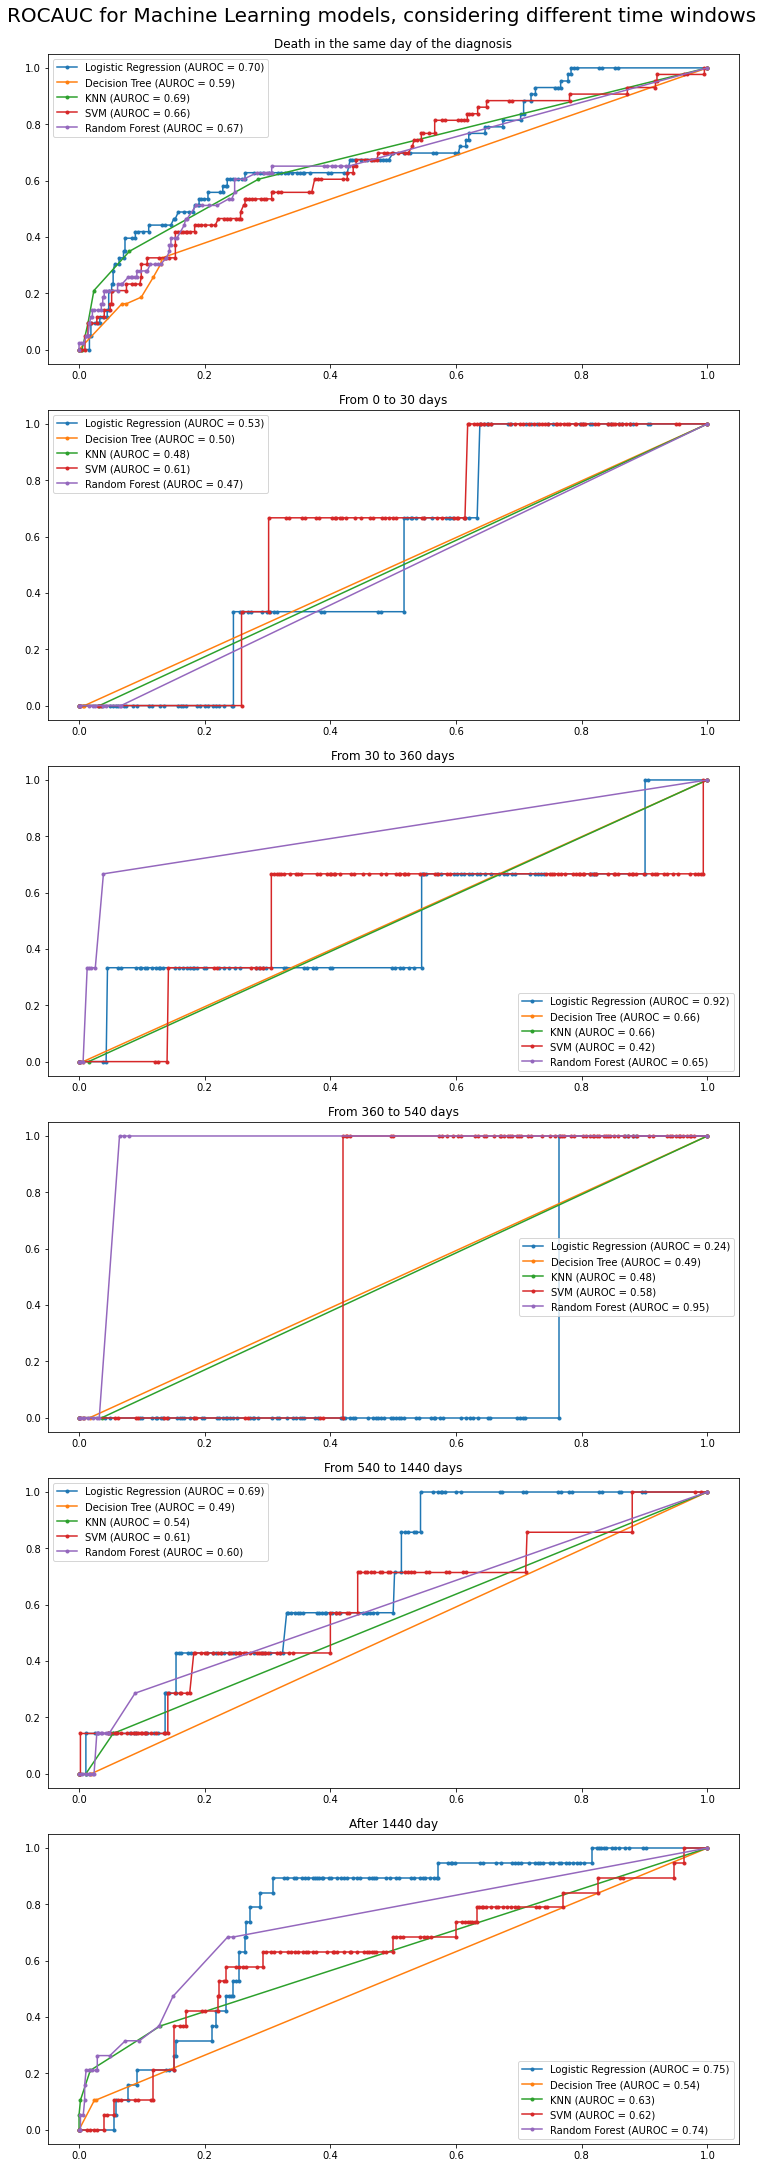

In [161]:
fig6, ax6 = plt.subplots(6, figsize=(10, 30), constrained_layout=True)
fig6.suptitle("ROCAUC for Machine Learning models, considering different time windows", fontsize=20)

ax6[0].plot(lr_fpr_case5_0d, lr_tpr_case5_0d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_case5_0d)
ax6[0].plot(dt_fpr_case5_0d, dt_tpr_case5_0d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_case5_0d)
ax6[0].plot(knn_fpr_case5_0d, knn_tpr_case5_0d, marker=".", label="KNN (AUROC = %0.2f)" % knn_case5_0d)
ax6[0].plot(svm_fpr_case5_0d, svm_tpr_case5_0d, marker=".", label="SVM (AUROC = %0.2f)" % svm_case5_0d)
ax6[0].plot(rf_fpr_case5_0d, rf_tpr_case5_0d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_case5_0d)
ax6[0].legend()
ax6[0].set_title("Death in the same day of the diagnosis")

ax6[1].plot(lr_fpr_case5_0d_30d, lr_tpr_case5_0d_30d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_case5_0d_30d)
ax6[1].plot(dt_fpr_case5_0d_30d, dt_tpr_case5_0d_30d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_case5_0d_30d)
ax6[1].plot(knn_fpr_case5_0d_30d, knn_tpr_case5_0d_30d, marker=".", label="KNN (AUROC = %0.2f)" % knn_case5_0d_30d)
ax6[1].plot(svm_fpr_case5_0d_30d, svm_tpr_case5_0d_30d, marker=".", label="SVM (AUROC = %0.2f)" % svm_case5_0d_30d)
ax6[1].plot(rf_fpr_case5_0d_30d, rf_tpr_case5_0d_30d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_case5_0d_30d)
ax6[1].legend()
ax6[1].set_title("From 0 to 30 days")

ax6[2].plot(lr_fpr_case5_30d_360d, lr_tpr_case5_30d_360d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_case5_30d_360d)
ax6[2].plot(dt_fpr_case5_30d_360d, dt_tpr_case5_30d_360d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_case5_30d_360d)
ax6[2].plot(knn_fpr_case5_30d_360d, knn_tpr_case5_30d_360d, marker=".", label="KNN (AUROC = %0.2f)" % knn_case5_30d_360d)
ax6[2].plot(svm_fpr_case5_30d_360d, svm_tpr_case5_30d_360d, marker=".", label="SVM (AUROC = %0.2f)" % svm_case5_30d_360d)
ax6[2].plot(rf_fpr_case5_30d_360d, rf_tpr_case5_30d_360d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_case5_30d_360d)
ax6[2].legend()
ax6[2].set_title("From 30 to 360 days")

ax6[3].plot(lr_fpr_case5_360d_540d, lr_tpr_case5_360d_540d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_case5_360d_540d)
ax6[3].plot(dt_fpr_case5_360d_540d, dt_tpr_case5_360d_540d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_case5_360d_540d)
ax6[3].plot(knn_fpr_case5_360d_540d, knn_tpr_case5_360d_540d, marker=".", label="KNN (AUROC = %0.2f)" % knn_case5_360d_540d)
ax6[3].plot(svm_fpr_case5_360d_540d, svm_tpr_case5_360d_540d, marker=".", label="SVM (AUROC = %0.2f)" % svm_case5_360d_540d)
ax6[3].plot(rf_fpr_case5_360d_540d, rf_tpr_case5_360d_540d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_case5_360d_540d)
ax6[3].legend()
ax6[3].set_title("From 360 to 540 days")

ax6[4].plot(lr_fpr_case5_540d_1440d, lr_tpr_case5_540d_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_case5_540d_1440d)
ax6[4].plot(dt_fpr_case5_540d_1440d, dt_tpr_case5_540d_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_case5_540d_1440d)
ax6[4].plot(knn_fpr_case5_540d_1440d, knn_tpr_case5_540d_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_case5_540d_1440d)
ax6[4].plot(svm_fpr_case5_540d_1440d, svm_tpr_case5_540d_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_case5_540d_1440d)
ax6[4].plot(rf_fpr_case5_540d_1440d, rf_tpr_case5_540d_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_case5_540d_1440d)
ax6[4].legend()
ax6[4].set_title("From 540 to 1440 days")

ax6[5].plot(lr_fpr_case5_after_1440d, lr_tpr_case5_after_1440d, marker=".", label="Logistic Regression (AUROC = %0.2f)" % lr_case5_after_1440d)
ax6[5].plot(dt_fpr_case5_after_1440d, dt_tpr_case5_after_1440d, marker=".", label="Decision Tree (AUROC = %0.2f)" % dt_case5_after_1440d)
ax6[5].plot(knn_fpr_case5_after_1440d, knn_tpr_case5_after_1440d, marker=".", label="KNN (AUROC = %0.2f)" % knn_case5_after_1440d)
ax6[5].plot(svm_fpr_case5_after_1440d, svm_tpr_case5_after_1440d, marker=".", label="SVM (AUROC = %0.2f)" % svm_case5_after_1440d)
ax6[5].plot(rf_fpr_case5_after_1440d, rf_tpr_case5_after_1440d, marker=".", label="Random Forest (AUROC = %0.2f)" % rf_case5_after_1440d)
ax6[5].legend()
ax6[5].set_title("After 1440 day");

##### Avaliação de modelo com cross-validation

---



A validação cruzada para a Regressão Logística gerou o seguinte resultado de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 90%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 0% de desvio padrão;

In [162]:
print("LOGISTIC REGRESSION")
print("Time window - Death in the same day of the diagnosis")
acuracy_case5_0d = cross_val_score(logistic_regression_case5_0d, x_data_scenario03, y_data_03_0d)
print("Acuracy:", acuracy_case5_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d.mean(), acuracy_case5_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy_case5_0d_30d = cross_val_score(logistic_regression_case5_0d_30d, x_data_scenario03, y_data_03_0d_30d)
print("Acuracy:", acuracy_case5_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d_30d.mean(), acuracy_case5_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy_case5_30d_360d = cross_val_score(logistic_regression_case5_30d_360d, x_data_scenario03, y_data_03_30d_360d)
print("Acuracy:", acuracy_case5_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_30d_360d.mean(), acuracy_case5_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy_case5_360d_540d = cross_val_score(logistic_regression_case5_360d_540d, x_data_scenario03, y_data_03_360d_540d)
print("Acuracy:", acuracy_case5_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_360d_540d.mean(), acuracy_case5_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy_case5_540d_1440d = cross_val_score(logistic_regression_case5_540d_1440d, x_data_scenario03, y_data_03_540d_1440d)
print("Acuracy:", acuracy_case5_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_540d_1440d.mean(), acuracy_case5_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy_case5_after_1440d = cross_val_score(logistic_regression_case5_after_1440d, x_data_scenario03, y_data_03_after_1440d)
print("Acuracy:", acuracy_case5_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_after_1440d.mean(), acuracy_case5_after_1440d.std()))

LOGISTIC REGRESSION
Time window - Death in the same day of the diagnosis
Acuracy: [0.90384615 0.90675241 0.89389068 0.88745981 0.90032154]
0.90 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.99358974 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.99356913]
1.00 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98392283 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96474359 0.96784566 0.96463023 0.96784566 0.96463023]
0.97 accuracy with a standard deviation of 0.00


A validação cruzada para a Árvore de Decisão gerou os seguintes resultados de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 86%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 99%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 98%, com 1% de desvio padrão;
* Intervalo acima de 1440 dias: 95%, com 1% de desvio padrão;

In [163]:
print("DECISION TREE")
print("Time window - Death in the same day of the diagnosis")
acuracy_case5_0d = cross_val_score(decision_tree_case5_0d, x_data_scenario03, y_data_03_0d)
print("Acuracy:", acuracy_case5_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d.mean(), acuracy_case5_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy_case5_0d_30d = cross_val_score(decision_tree_case5_0d_30d, x_data_scenario03, y_data_03_0d_30d)
print("Acuracy:", acuracy_case5_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d_30d.mean(), acuracy_case5_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy_case5_30d_360d = cross_val_score(decision_tree_case5_30d_360d, x_data_scenario03, y_data_03_30d_360d)
print("Acuracy:", acuracy_case5_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_30d_360d.mean(), acuracy_case5_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy_case5_360d_540d = cross_val_score(decision_tree_case5_360d_540d, x_data_scenario03, y_data_03_360d_540d)
print("Acuracy:", acuracy_case5_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_360d_540d.mean(), acuracy_case5_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy_case5_540d_1440d = cross_val_score(decision_tree_case5_540d_1440d, x_data_scenario03, y_data_03_540d_1440d)
print("Acuracy:", acuracy_case5_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_540d_1440d.mean(), acuracy_case5_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy_case5_after_1440d = cross_val_score(decision_tree_case5_after_1440d, x_data_scenario03, y_data_03_after_1440d)
print("Acuracy:", acuracy_case5_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_after_1440d.mean(), acuracy_case5_after_1440d.std()))

DECISION TREE
Time window - Death in the same day of the diagnosis
Acuracy: [0.86538462 0.84244373 0.86173633 0.87459807 0.86173633]
0.86 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.98397436 0.98713826 0.98392283 0.9903537  0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.9903537  0.99678457 0.9903537 ]
0.99 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99038462 0.9903537  0.98713826 0.98713826 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.96153846 0.98392283 0.9807074  0.9807074  0.97427653]
0.98 accuracy with a standard deviation of 0.01

Time window - above 1440 days
Acuracy: [0.93910256 0.96141479 0.95819936 0.96784566 0.94212219]
0.95 accuracy with a standard deviation of 0.01


A validação cruzada para o KNN gerou os seguintes resultados de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 88%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 1% de desvio padrão;

In [164]:
print("k-Nearest Neighbors - kNN")
print("Time window - Death in the same day of the diagnosis")
acuracy_case5_0d = cross_val_score(knn_prognosis_case5_0d, x_data_scenario03, y_data_03_0d)
print("Acuracy:", acuracy_case5_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d.mean(), acuracy_case5_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy_case5_0d_30d = cross_val_score(knn_prognosis_case5_0d_30d, x_data_scenario03, y_data_03_0d_30d)
print("Acuracy:", acuracy_case5_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d_30d.mean(), acuracy_case5_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy_case5_30d_360d = cross_val_score(knn_prognosis_case5_30d_360d, x_data_scenario03, y_data_03_30d_360d)
print("Acuracy:", acuracy_case5_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_30d_360d.mean(), acuracy_case5_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy_case5_360d_540d = cross_val_score(knn_prognosis_case5_360d_540d, x_data_scenario03, y_data_03_360d_540d)
print("Acuracy:", acuracy_case5_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_360d_540d.mean(), acuracy_case5_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy_case5_540d_1440d = cross_val_score(knn_prognosis_case5_540d_1440d, x_data_scenario03, y_data_03_540d_1440d)
print("Acuracy:", acuracy_case5_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_540d_1440d.mean(), acuracy_case5_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy_case5_after_1440d = cross_val_score(knn_prognosis_case5_after_1440d, x_data_scenario03, y_data_03_after_1440d)
print("Acuracy:", acuracy_case5_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_after_1440d.mean(), acuracy_case5_after_1440d.std()))

k-Nearest Neighbors - kNN
Time window - Death in the same day of the diagnosis
Acuracy: [0.88461538 0.87459807 0.89067524 0.88424437 0.89067524]
0.88 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.99358974 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.99356913]
1.00 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98713826 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96153846 0.97106109 0.96141479 0.97749196 0.95498392]
0.97 accuracy with a standard deviation of 0.01


A validação cruzada para a SVM gerou os seguintes resultados de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 89%, com 0% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 100%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 99%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 97%, com 0% de desvio padrão;

In [165]:
print("Support Vector Machine - SVM")
print("Time window - Death in the same day of the diagnosis")
acuracy_case5_0d = cross_val_score(svm_prognosis_case5_0d, x_data_scenario03, y_data_03_0d)
print("Acuracy:", acuracy_case5_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d.mean(), acuracy_case5_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy_case5_0d_30d = cross_val_score(svm_prognosis_case5_0d_30d, x_data_scenario03, y_data_03_0d_30d)
print("Acuracy:", acuracy_case5_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d_30d.mean(), acuracy_case5_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy_case5_30d_360d = cross_val_score(svm_prognosis_case5_30d_360d, x_data_scenario03, y_data_03_30d_360d)
print("Acuracy:", acuracy_case5_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_30d_360d.mean(), acuracy_case5_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy_case5_360d_540d = cross_val_score(svm_prognosis_case5_360d_540d, x_data_scenario03, y_data_03_360d_540d)
print("Acuracy:", acuracy_case5_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_360d_540d.mean(), acuracy_case5_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy_case5_540d_1440d = cross_val_score(svm_prognosis_case5_540d_1440d, x_data_scenario03, y_data_03_540d_1440d)
print("Acuracy:", acuracy_case5_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_540d_1440d.mean(), acuracy_case5_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy_case5_after_1440d = cross_val_score(svm_prognosis_case5_after_1440d, x_data_scenario03, y_data_03_after_1440d)
print("Acuracy:", acuracy_case5_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_after_1440d.mean(), acuracy_case5_after_1440d.std()))

Support Vector Machine - SVM
Time window - Death in the same day of the diagnosis
Acuracy: [0.89102564 0.89389068 0.89389068 0.89389068 0.89067524]
0.89 accuracy with a standard deviation of 0.00

Time window - 0 to 30 days
Acuracy: [0.99358974 0.99356913 0.99356913 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99678457 0.99356913]
1.00 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99678457 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98717949 0.9903537  0.98713826 0.98713826 0.98713826]
0.99 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.96474359 0.96784566 0.96784566 0.96784566 0.96463023]
0.97 accuracy with a standard deviation of 0.00


A validação cruzada para o *Random Forest* gerou os seguintes resultados de acurácia para as faixas de tempo:

* Intervalo de mesmo dia do diagnóstico: 88%, com 1% de desvio padrão;
* Intervalo de 0 a 30 dias: 99%, com 0% de desvio padrão;
* Intervalo de 30 a 360 dias: 99%, com 0% de desvio padrão;
* Intervalo de 360 a 540 dias: 99%, com 0% de desvio padrão;
* Intervalo de 540 a 1440 dias: 98%, com 0% de desvio padrão;
* Intervalo acima de 1440 dias: 96%, com 1% de desvio padrão;

In [166]:
print("RANDOM FOREST")
print("Time window - Death in the same day of the diagnosis")
acuracy_case5_0d = cross_val_score(random_forest_prognosis_case5_0d, x_data_scenario03, y_data_03_0d)
print("Acuracy:", acuracy_case5_0d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d.mean(), acuracy_case5_0d.std()))

print("\nTime window - 0 to 30 days")
acuracy_case5_0d_30d = cross_val_score(random_forest_prognosis_case5_0d_30d, x_data_scenario03, y_data_03_0d_30d)
print("Acuracy:", acuracy_case5_0d_30d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_0d_30d.mean(), acuracy_case5_0d_30d.std()))

print("\nTime window - 30 to 360 days")
acuracy_case5_30d_360d = cross_val_score(random_forest_prognosis_case5_30d_360d, x_data_scenario03, y_data_03_30d_360d)
print("Acuracy:", acuracy_case5_30d_360d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_30d_360d.mean(), acuracy_case5_30d_360d.std()))

print("\nTime window - 360 to 540 days")
acuracy_case5_360d_540d = cross_val_score(random_forest_prognosis_case5_360d_540d, x_data_scenario03, y_data_03_360d_540d)
print("Acuracy:", acuracy_case5_360d_540d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_360d_540d.mean(), acuracy_case5_360d_540d.std()))

print("\nTime window - 540 to 1440 days")
acuracy_case5_540d_1440d = cross_val_score(random_forest_prognosis_case5_540d_1440d, x_data_scenario03, y_data_03_540d_1440d)
print("Acuracy:", acuracy_case5_540d_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_540d_1440d.mean(), acuracy_case5_540d_1440d.std()))

print("\nTime window - above 1440 days")
acuracy_case5_after_1440d = cross_val_score(random_forest_prognosis_case5_after_1440d, x_data_scenario03, y_data_03_after_1440d)
print("Acuracy:", acuracy_case5_after_1440d)
print("%0.2f accuracy with a standard deviation of %0.2f" % (acuracy_case5_after_1440d.mean(), acuracy_case5_after_1440d.std()))

RANDOM FOREST
Time window - Death in the same day of the diagnosis
Acuracy: [0.88782051 0.89389068 0.89067524 0.87138264 0.88102894]
0.88 accuracy with a standard deviation of 0.01

Time window - 0 to 30 days
Acuracy: [0.98717949 0.99356913 0.9903537  0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 30 to 360 days
Acuracy: [0.99358974 0.99678457 0.99356913 0.99678457 0.9903537 ]
0.99 accuracy with a standard deviation of 0.00

Time window - 360 to 540 days
Acuracy: [0.99358974 0.99356913 0.99678457 0.99356913 0.99356913]
0.99 accuracy with a standard deviation of 0.00

Time window - 540 to 1440 days
Acuracy: [0.98076923 0.98713826 0.98392283 0.98392283 0.98713826]
0.98 accuracy with a standard deviation of 0.00

Time window - above 1440 days
Acuracy: [0.95833333 0.97427653 0.96463023 0.96784566 0.95498392]
0.96 accuracy with a standard deviation of 0.01


## Evolução do Projeto

---



Na primeira etapa do projeto, onde definimos a pergunta de pesquisa, foram analisadas diversas janelas de tempo, visto que, analisando a literatura, a faixa de tempo do diagnóstico a morte pode ser bem variada, de dias a anos. Todavia, algumas janelas que escolhemos no início não eram adequadas para todos os datasets, tendo 0 registros de morte em alguns casos, o que impossibilitava o treino dos modelos. Desta forma, tornou-se necessário analisar os 3 datasets com outra perspectiva, de forma que conseguíssemos encontrar um padrão nas janelas de tempo até a morte dos pacientes.


Em relação as ferramentas, o projeto foi inicialmente modelado usando o Orange, a fim de que pudessemos ter uma base dos resultados esperados, e em seguida, utilizamos a linguagem de programação Python. Como não estávamos tão familiarizados com a aplicação de algoritmos de *machine learning* e suas métricas, nem com a biblioteca ``scikit-learn`` e suas funções dos algoritmos de classificação operam foi a principal e mais longa etapa do trabalho.

A maior dificuldade encontrada ao longo do projeto foi a escassez de dados de falecimento de pacientes com leucemia mieloide aguda, visto que isso tornou os modelos enviezados e melhores para predizer os dados de maior quantidade, ou seja, pacientes vivos. Outro obstáculo enfrentado foi a seleção das features, visto que existiam diversas possibilidades. Decidimos focar em variáveis que, de alguma forma, se correlacionam com os fatores de risco da LMA, como idade, quantidade de condições e internações em UTI, dado que tais dados podem representar maior risco aos pacientes.

Motivado pela falta de dados de morte, decidimos concatenar os datasets dos cenários 1 e 2. Inicialmente, pretendiamos treinar e testar no cenário 1 e testar no 2, e vice-e-versa, entretanto, tivemos dificuldades em treinar os modelos apenas com um desses cenários, pois existiam janelas de tempo com apenas 1 registro de morte.

## Discussão

---



Dado que apenas as janelas de 0 dias e após 1440 dias possuíam dados suficientes para predição de morte em todos os modelos, desconsideraremos as janelas 0 - 30 dias, 30 - 360 dias, 360 - 540 dias e 540 - 1440 dias, visto que tiveram poucos dados de morte de pacientes diagnosticados com LMA, o que inviabilizou a avaliação de eficácia dos modelos.

Por isso, decidimos analisar as avaliações dos modelos nas duas janelas de tempo restantes. Como o foco é a predição de morte, um resultado falso negativo é considerado mais prejudicial do que um falso positivo, ou seja, é mais importante mapear todos pacientes com risco de morte, ainda que classifique alguns saudáveis de forma errônea. Por essa razão, iremos considerar a faixa de tempo e modelo que tiveram um maior valor de revocação em caso de morte, mesmo que a acurácia seja menor, visto que classificar pacientes com alta chance de falecer como saudável pode ser extremamente problemático, dificultando o acesso do paciente ao tratamento adequado para o estágio da doença. 
As métricas de acurácia, precisão, curva AUCROC e validação cruzada podem levar a conclusões equivocadas sobre as predições e eficácia dos modelos, devido ao desbalanceamento dos dados nas classes. Isto é, existem mais dados de uma classe (pacientes com LMA que não faleceram) do que da outra, o que torna o modelo enviezado e justifica a alta acurácia, mesmo sendo falho em detectar mortes.


Desta forma, observamos que o melhor modelo de classificação foi a árvore de decisão, considerando a faixa de tempo de 0 dias (morte no dia do diagnóstico), pois foi o modelo que obteve o maior revocação de morte no 1º (treino e teste com o dataset do cenário 1 e 2 concatenado) e 2º (treino e teste com o dataset do cenário 1 e 2 concatenado, treino no cenário 3) e 3º caso (treino e teste com o dataset do cenário 3), ficando entre 25% a 38%. No 4º caso, o melhor modelo em relação a revocação em caso de morte foi o *Random Forest*, com a árvore de decisão em segundo, porém o resultado para a árvore de decisão ficou dentro do esperado, obtendo 38%.


No 5º caso, com a remoção da feature `COND_QTY`, podemos concluir que houve uma piora nos resultados de revocação em caso de morte em todos os modelos, visto que o melhor resultado foi de 21% para kNN e 16% para árvore de decisão. Logo, podemos verificar que essa feature é, de fato, importante para os modelos. Isso se deve ao fato de que as features `COND_QTY` e `AGE` possuem uma correlação, mas não é forte o suficiente para que a remoção de uma não afete a variável de saída (predição).

## Conclusão

---



Levando em consideração o estudo dos casos previamente discutidos, temos que todos os modelos e escolhas de janelas de tempo entre diagnósticos e morte não tiveram um bom desempenho em predizer casos de morte em pacientes com Leucemia Mieloide Aguda. Entretanto, o que obteve melhor resultado de revocação em casos de morte foi a árvore de decisão, com resultados variando na faixa de 28% a 38%, para pacientes que faleceram no mesmo dia do diagnóstico.

O fato da melhor janela de tempo para a predição de morte ser no mesmo dia do diagnóstico pode estar relacionada com a agressividade e evolução acelerada da doença, onde as células doentes se multiplicam de forma rápida e descontrolada, e um diagnóstico tardio pode influenciar diretamente na morte precoce do paciente. Neste caso, ele pode ter sintomas e não perceber a gravidade da doença, de forma que quando buscasse auxílio médico, ela já estaria em estágio avançado.

Portanto, considerando as perguntas de pesquisa feitas inicialmente, o modelo de classificação que teve o melhor desempenho em predizer mortes para pacientes diagnosticados com Leucemia Mieloide Aguda foi a árvore de decisão, com a janela de tempo após diagnóstico de 0 dias (mesmo dia do diagnóstico) e essa janela apresentou o melhor resultado em todos os modelos treinados (regressão logística, árvore de decisão, aprendizagem baseada em instâncias, máquina de vetores de suporte e *random forest*). Por fim, dos datasets utilizados para treinar os modelos, o scenario03 forneceu os melhores resultados, já que possui mais dados de ambas as classes.


### Lições aprendidas


---



Uma das principais lições aprendidas foi a definição das métricas a serem utilizadas para avaliação dos modelos de *Machine Learning*, visto que a aplicação de cada uma delas depende do objetivo do modelo que se deseja criar.

Para a escolha das features e análise da importância de cada uma delas, aprendemos a utilizar a matriz de correlação entre as variáveis, que retorna os coeficientes de correlação.


Também aprendemos sobre o *feature scaling*, uma etapa de preparação dos dados que tem a finalidade de colocá-los em um intervalo de valores comuns. Para esse projeto utilizamos a padronização.


### Trabalhos Futuros

---



Como podemos analisar, tanto no dataset do cenário 1 e 2 concatenados, quanto no cenário 3, as janelas de tempo de 0 - 30 dias,  30 - 360 dias, 360 - 540 dias e 540 - 1440 dias possuiam pouquíssimos registros de morte, o que resulta em um modelo *overfitted*. Logo, como uma primeira etapa, seria necessário selecionar um dataset em que houvesse mais registros de morte.

Outro ponto que pode auxiliar a melhorar os modelos é a escolha e quantidade de features. Podemos adicionar novas features como a quantidade de medicamentos que os pacientes tomam, se são fumantes (fator de risco para a LMA) e se tem plano de saúde (pacientes com plano de saúde podem fazer mais exames de rotina). Antes de adicioná-los, é válido verificar a correlação dessas novas variáveis de entrada com a variável de saída correspondente as janelas de tempo.


## Referências

---




[1] [Scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/index.html), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[2] Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.), O’Reilly, 2019.

[3] Emadi, A.; York Law, J. Leucemia mieloide aguda (LMA). MANUAL MSD, 2020. Disponível em: <https://www.msdmanuals.com/pt-br/casa/dist%C3%BArbios-do-sangue/leucemias/leucemia-mieloide-aguda-lma>.

[4] Sant'Anna, L. P. Leucemia mieloide aguda: tempo entre diagnóstico e tratamento influencia o prognóstico?. Portal PEBMED, 2020. Disponível em: <https://pebmed.com.br/leucemia-mieloide-aguda-tempo-entre-diagnostico-e-tratamento-influencia-o-prognostico/>